# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
# Increase notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.3
    Uninstalling pip-22.0.3:
      Successfully uninstalled pip-22.0.3


In [3]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 4.6 MB/s eta 0:00:00a 0:00:01


In [4]:
!pip install pillow==9.5 # Any version above 9.5 for pillow results in exception during model visualization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1


In [5]:
!pip install tensorflow

In [6]:
!pip install Openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.6 MB/s eta 0:00:0000:0100:01


In [7]:
!pip install texttable

In [8]:
!pip install matplotlib

In [9]:
!pip install pydot

In [10]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 696.0 kB/s eta 0:00:00 0:00:01


In [1]:
import numpy as np
import os
import datetime
import os
import random as rn
import matplotlib.pyplot as plt
import imageio
from skimage.transform import resize, rescale
import visualkeras
from visualkeras import Layer
from PIL import Image, ImageFont

import tensorflow as tf
from tensorflow.keras import layers
from keras import callbacks
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, GRU, LSTM, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D, GlobalAveragePooling3D, GlobalAveragePooling2D
from keras.layers import ConvLSTM2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.regularizers import l2
from keras import optimizers
from keras.applications import mobilenet
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import backend as K
import warnings
warnings.filterwarnings('ignore')


import openpyxl
from openpyxl.styles import Font

from texttable import Texttable

We set the random seed so that the results don't vary drastically.

In [2]:
np.random.seed(30)
rn.seed(30)
tf.random.set_seed(30)

### Check if GPU is available

In [3]:
# tf.test.is_gpu_available()
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
else:
    print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2024-01-07 21:06:30.077426: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-01-07 21:06:30.077487: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1c:00.0, compute capability: 7.5


### Check TensorFlow version

In [4]:
tf.version.VERSION

'2.7.0'

In [5]:
font = ImageFont.truetype("Arial.ttf", 70, encoding="unic")

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [6]:
# Number of output classes (Number of hand gestures considered)
num_classes = 5

# Default height of the image for the experiment
default_image_height = 120

# Default width of the image for the experiment
default_image_width = 120

# Default frame count for the experiment (Video has 30 frames)
default_frames_count = 30

# Default image count to be considered for the each model
default_num_images = 20

# Default value to indicate if augmentation is necessary for the model
default_perform_augment = False

# Default number of epoch
default_num_epochs = 30

# Default kernel size
default_kernel_size = (3,3,3)

# Default kernel size - CONV2D
default_kernel_size_conv2d = (3,3)

# Default pooling size
default_pool_size = (2,2,2)

# Default pooling size - CONV2D
default_pool_size_conv2d = (2,2)

# Default padding type
default_padding_type = "same"

# Default non-output layer activation function
default_layer_activation_func = "relu"

# Default output layer activation function
default_output_layer_activation_func = "softmax"

# Default model stride
default_stride = (1,1,1)

# Default model stride - CONV2D
default_stride_conv2d = (1,1)

# Default dropout value
default_dropout_value = 0.0

# Default hidden layer count
default_hidden_layer_count = 3

# Default hidden layer count - CONV2D
default_hidden_layer_count_conv2d = 4

# Default conv3d filters
default_conv3d_filters = (16, 32, 64, 128)

# Default conv2d filters
default_conv2d_filters = (16, 32, 64, 128, 256)

# Default dense layer count
default_dense_layer_count = 2

# Default dense layer filters
default_dense_filters = (256,128)

# Default channel value
default_channel_value = 3

# Default batch size for the experiment
default_batch_size = 10

# Default learning rate for the experiment
default_learning_rate = 0.002

# Default RNN cell count
default_rnn_cell_count = 64

# Default dense neuron count - RNN
default_dense_neuron_count = 64

# Default workbook filename
default_workbook_file_name = r"gesture_recognition_model_stats.xlsx"

# Default workbook worksheet name
default_worksheet_name = "model_details"

In [7]:
train_doc = np.random.permutation(open('/datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('/datasets/Project_data/val.csv').readlines())
batch_size = default_batch_size

In [8]:
curr_dt_time = datetime.datetime.now()
train_path = '/datasets/Project_data/train'
val_path = '/datasets/Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = default_num_epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


## Utility methods for the experiment

#### Method to plot model accuracy

In [9]:
def plot_model_accuracy(model_name, model_history):
#     print(history.history.keys())
    plt.plot(model_history.history['categorical_accuracy'])
    plt.plot(model_history.history['val_categorical_accuracy'])
    plt.title("MODEL ACCURACY for '{}'".format(model_name))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

#### Method to plot model loss

In [10]:
def plot_model_loss(model_name, model_history):
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title("MODEL LOSS for '{}'".format(model_name))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

#### Method to configure callbacks

In [11]:
def initialise_model_callbacks(folder_name):
    model_name = str(folder_name) + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
   
    if not os.path.exists(model_name):
        os.mkdir(model_name)

    filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

    checkpoint = ModelCheckpoint(filepath,
                                 monitor='val_loss',
                                 verbose=1,
                                 save_best_only=False,
#                                  save_best_only=True,
                                 save_weights_only=False,
                                 mode='auto',
                                 period=1)

    LR = ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=7,
                           verbose=1)

    earlyStopping = callbacks.EarlyStopping(monitor="val_loss",
                                            min_delta=0,
                                            patience=7,
                                            verbose=1)
    
    return [checkpoint, LR, earlyStopping]

In [12]:
# The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls
# it need to make.
def calculate_steps(batch_size):
    num_train_sequences = len(train_doc)
    if (num_train_sequences%batch_size) == 0:
        steps_per_epoch = num_train_sequences//batch_size
    else:
        steps_per_epoch = (num_train_sequences//batch_size) + 1

    num_val_sequences = len(val_doc)
    if (num_val_sequences%batch_size) == 0:
        validation_steps = num_val_sequences//batch_size
    else:
        validation_steps = (num_val_sequences//batch_size) + 1

    return steps_per_epoch, validation_steps

In [13]:
# Create workbook to document model details
from openpyxl.styles import colors
def create_workbook():
    workbook = openpyxl.Workbook()
    workbook.save(default_workbook_file_name)
    
    workbook = openpyxl.load_workbook(default_workbook_file_name)
    workbook["Sheet"].title = default_worksheet_name
    workbook.save(default_workbook_file_name)
    
    worksheet = workbook[default_worksheet_name]
    header = ("Model Name", "Model Details", "Total Parameters", "Trainable Parameters", "Non-Trainable Parameters", "Best Accuracy",
             "Best Val Accuracy", "Best Loss", "Best Val Loss", "Kernel Size", "Frames Per Video", "Image Height",
             "Image Width", "Epoch", "Batch Size", "Optimizer", "Is Augmented", "Learning Rate")
    worksheet.append(header)
    
    for header in worksheet["1:1"]: 
        header.font = Font(color = "2ECC71", bold=True, size=12)
        
    workbook.save(default_workbook_file_name)

In [14]:
def write_model_details_worksheet(model_name, model_details, total_params, train_params, non_train_params, best_acc,
                                  best_val_acc, best_loss, best_val_loss, kernel_size, frames_per_video,
                                  image_height, image_width, epoch, batch_size, optimizer, is_augment, learning_rate):
    workbook = openpyxl.load_workbook(default_workbook_file_name)
    worksheet = workbook[default_worksheet_name]
    
    new_row = (model_name, model_details, total_params, train_params, non_train_params, best_acc,
               best_val_acc, best_loss, best_val_loss, kernel_size, frames_per_video,
               image_height, image_width, epoch, batch_size, optimizer, is_augment, learning_rate)
    worksheet.append(new_row)
    
    workbook.save(default_workbook_file_name)

In [15]:
def read_model_worksheet_full():
    workbook = workbook = openpyxl.load_workbook(default_workbook_file_name)
    worksheet = workbook[default_worksheet_name]
    
    full_sheet_as_list = list(worksheet.values)
    
    workbook.close()
    return full_sheet_as_list

In [16]:
def print_worksheet_full():
    table = Texttable(max_width=180)
    table.add_rows(read_model_worksheet_full())
    print(table.draw())

In [19]:
create_workbook()

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [17]:
# Utility for image transformation
image_data_generator = ImageDataGenerator(
    zoom_range=0.1,
    zca_whitening=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [18]:
# ## Test code start
# #360 by 360
# image1 = imageio.imread("/datasets/Project_data/val/WIN_20180907_15_30_06_Pro_Right Swipe_new/WIN_20180907_15_30_06_Pro_00029.png")
# #160 by 120
# image2 = imageio.imread("/datasets/Project_data/val/WIN_20180926_17_56_52_Pro_Right_Swipe_new/WIN_20180926_17_56_52_Pro_00029.png")
# #crop the images and resize them. Note that the images are of 2 different shape 
# #and the conv3D will throw error if the inputs in a batch have different shapes                    
# #print(image1.shape, image2.shape)
# image1 = resize(image1, (120, 120), anti_aliasing=True)
# image1 = datagen.random_transform(image1)                   
# plt.imshow(image1)
# plt.show()
# image2 = resize(image2, (120, 120), anti_aliasing=True)
# image2 = datagen.random_transform(image2)                 
# plt.imshow(image2)
# plt.show()
# ## Test code endim

def generate(batch_size = batch_size, num_images_per_video=default_num_images, image_height=default_image_height,
             image_width=default_image_width, augment=default_perform_augment, is_validation=False):
    source_path = train_path
    folder_list = train_doc
    
    if is_validation:
        source_path = val_path
        folder_list = val_doc

    while True:
        folder_shuffle = np.random.permutation(folder_list)
        num_batches = len(folder_shuffle)//batch_size # calculate the number of batches
        #img_idx = sorted(rn.sample(range(0, default_frames_count), num_images_per_video)) #create a list of image numbers you want to use for a particular video
        img_idx = np.round(np.linspace(0,default_frames_count-1,num_images_per_video)).astype(int) #create a list of image numbers you want to use for a particular video

        for batch in range(num_batches): # we iterate over the number of batches
            batch_data   = np.zeros((batch_size, num_images_per_video, image_height, image_width, default_channel_value)) # 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size, 5)) # batch_labels is the one hot representation of the output           

            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ folder_shuffle[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate over the frames/images of a folder to read them in
                    image = imageio.imread(source_path+'/'+ folder_shuffle[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)

                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes                    
                    h, w, c = image.shape
                    image = resize(image, (image_height, image_width), anti_aliasing=True)

                    # Randomly transform few images of few folders; note that folders are randomly shuffled in each epoch too
                    if augment:
                        if np.random.randn() > 0:
                            image = image_data_generator.random_transform(image)                   

                    batch_data[folder,idx,:,:,0] = (image[...,0])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (image[...,1])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (image[...,2])/255 #normalise and feed in the image                  
                    
                batch_labels[folder, int(folder_shuffle[folder + (batch*batch_size)].strip().split(';')[2])] = 1

            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches
        if (len(folder_shuffle)%batch_size):
            remaining_batch_size = len(folder_shuffle)%batch_size
            batch_data   = np.zeros((remaining_batch_size, num_images_per_video, image_height, image_width,3)) # 3 is the number of channels RGB
            batch_labels = np.zeros((remaining_batch_size,5)) # batch_labels is the one hot representation of the output           

            for folder in range(remaining_batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ folder_shuffle[folder + (num_batches*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imageio.imread(source_path+'/'+ folder_shuffle[folder + (num_batches*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    h, w, c = image.shape
                    image = resize(image, (image_height, image_width), anti_aliasing=True)                          
                    
                    # Randomly transform few images of few folders; note that folders are randomly shuffled in each epoch too
                    if augment:
                        if np.random.randn() > 0:
                            image = image_data_generator.random_transform(image)                   

                    batch_data[folder,idx,:,:,0] = (image[...,0])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = (image[...,1])/255 #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = (image[...,2])/255 #normalise and feed in the image
                
                batch_labels[folder, int(folder_shuffle[folder + (num_batches*batch_size)].strip().split(';')[2])] = 1

            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [19]:
def verify_layer_details(num_layers, filters, is_dense=False):
    if is_dense:
        return num_layers == len(filters)
    else:
        return num_layers == len(filters)-1


def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
                       kernel_size=default_kernel_size, strides=default_stride,
                       num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
                       dropout_val = default_dropout_value, num_images_per_video=default_num_images,
                       image_height=default_image_height, image_width=default_image_width, learning_rate = default_learning_rate):
    model = Sequential()
    
    is_valid_layer_details = verify_layer_details(num_hidden_layers, conv3d_filters)
    is_valid_dense_layer_details = verify_layer_details(num_dense_layers, dense_layer_filters, is_dense=True)
    
    print("Layer:{} --- Dense:{}".format(is_valid_layer_details, is_valid_dense_layer_details))
    
    # Input layer
    model.add(Conv3D(conv3d_filters[0], kernel_size, padding=default_padding_type,
                     input_shape=(num_images_per_video, image_height, image_width, default_channel_value)))
    model.add(Activation(default_layer_activation_func))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=default_pool_size))

    # Build hidden layers
    for x in range(num_hidden_layers):
        model.add(Conv3D(conv3d_filters[x+1], kernel_size, padding=default_padding_type))
        model.add(Activation(default_layer_activation_func))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=default_pool_size))
    
    model.add(Flatten())
                  
    # Build dense layers
    for x in range(num_dense_layers):
        model.add(Dense(dense_layer_filters[x]))
        model.add(Activation(default_layer_activation_func))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_val))

    model.add(Dense(num_classes))
    model.add(Activation(default_output_layer_activation_func))

    # Now that you have written the model, the next step is to `compile` the model. 
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])    
    
    return model

In [20]:
# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width, learning_rate = default_learning_rate):

from enum import Enum
class RNN_TYPE(Enum):
    LSTM
    GRU

def build_conv2D_RNN(rnn_type, num_hidden_layers=default_hidden_layer_count_conv2d, conv2d_filters=default_conv2d_filters,
                     kernel_size=default_kernel_size_conv2d, strides=default_stride_conv2d,
                     cell_count=default_rnn_cell_count, dense_neurons=default_dense_neuron_count, dropout_val = default_dropout_value,
                     num_images_per_video=default_num_images, image_height=default_image_height, image_width=default_image_width, learning_rate = default_learning_rate):

    model = Sequential()
    
    
    # Input layer
    model.add(TimeDistributed(Conv2D(conv2d_filters[0], kernel_size , padding=default_padding_type, activation=default_layer_activation_func),
                              input_shape=(num_images_per_video, image_height, image_width, default_channel_value)))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(MaxPooling2D(default_pool_size_conv2d)))
     
    for x in range(num_hidden_layers):
        model.add(Conv3D(conv3d_filters[x+1], kernel_size, padding=default_padding_type))
        model.add(Activation(default_layer_activation_func))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=default_pool_size))
    
    model.add(Flatten())

    # Build hidden layers
    for x in range(num_hidden_layers):
        model.add(TimeDistributed(Conv2D(conv2d_filters[x+1], kernel_size , padding=default_padding_type,
                                         activation=default_layer_activation_func)))
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D(default_pool_size_conv2d)))

    model.add(TimeDistributed(Flatten()))

    if rnn_type == RNN_TYPE.LSTM:
              model.add(LSTM(cell_count))
    else:
              model.add(GRU(cell_count))
              
    model.add(Dropout(dropout))

    model.add(Dense(dense_neurons,activation=default_layer_activation_func))
    model.add(Dropout(dropout))

    model.add(Dense(num_classes, activation=default_output_layer_activation_func))

    optimiser = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
              
    return model

When you print the `summary` of the model, you'll see the total number of parameters you have to train.

## <center>Model-1: Default CONV3D model</center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002 |

In [22]:
model_name = "Model_01"

model_01 = build_conv3D_model()

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate()

val_generator = generate(is_validation=True)

print (model_01.summary())

2024-01-06 14:58:40.141841: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


Layer:True --- Dense:True
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 120, 120, 16)  1312      
                                                                 
 activation (Activation)     (None, 20, 120, 120, 16)  0         
                                                                 
 batch_normalization (BatchN  (None, 20, 120, 120, 16)  64       
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 60, 60, 16)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 10, 60, 60, 32)    13856     
                                                                 
 activation_1 (Activation)   (

### Model-1 layer representation

In [23]:
# plot_model(model_01, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-1 diagram in 3D

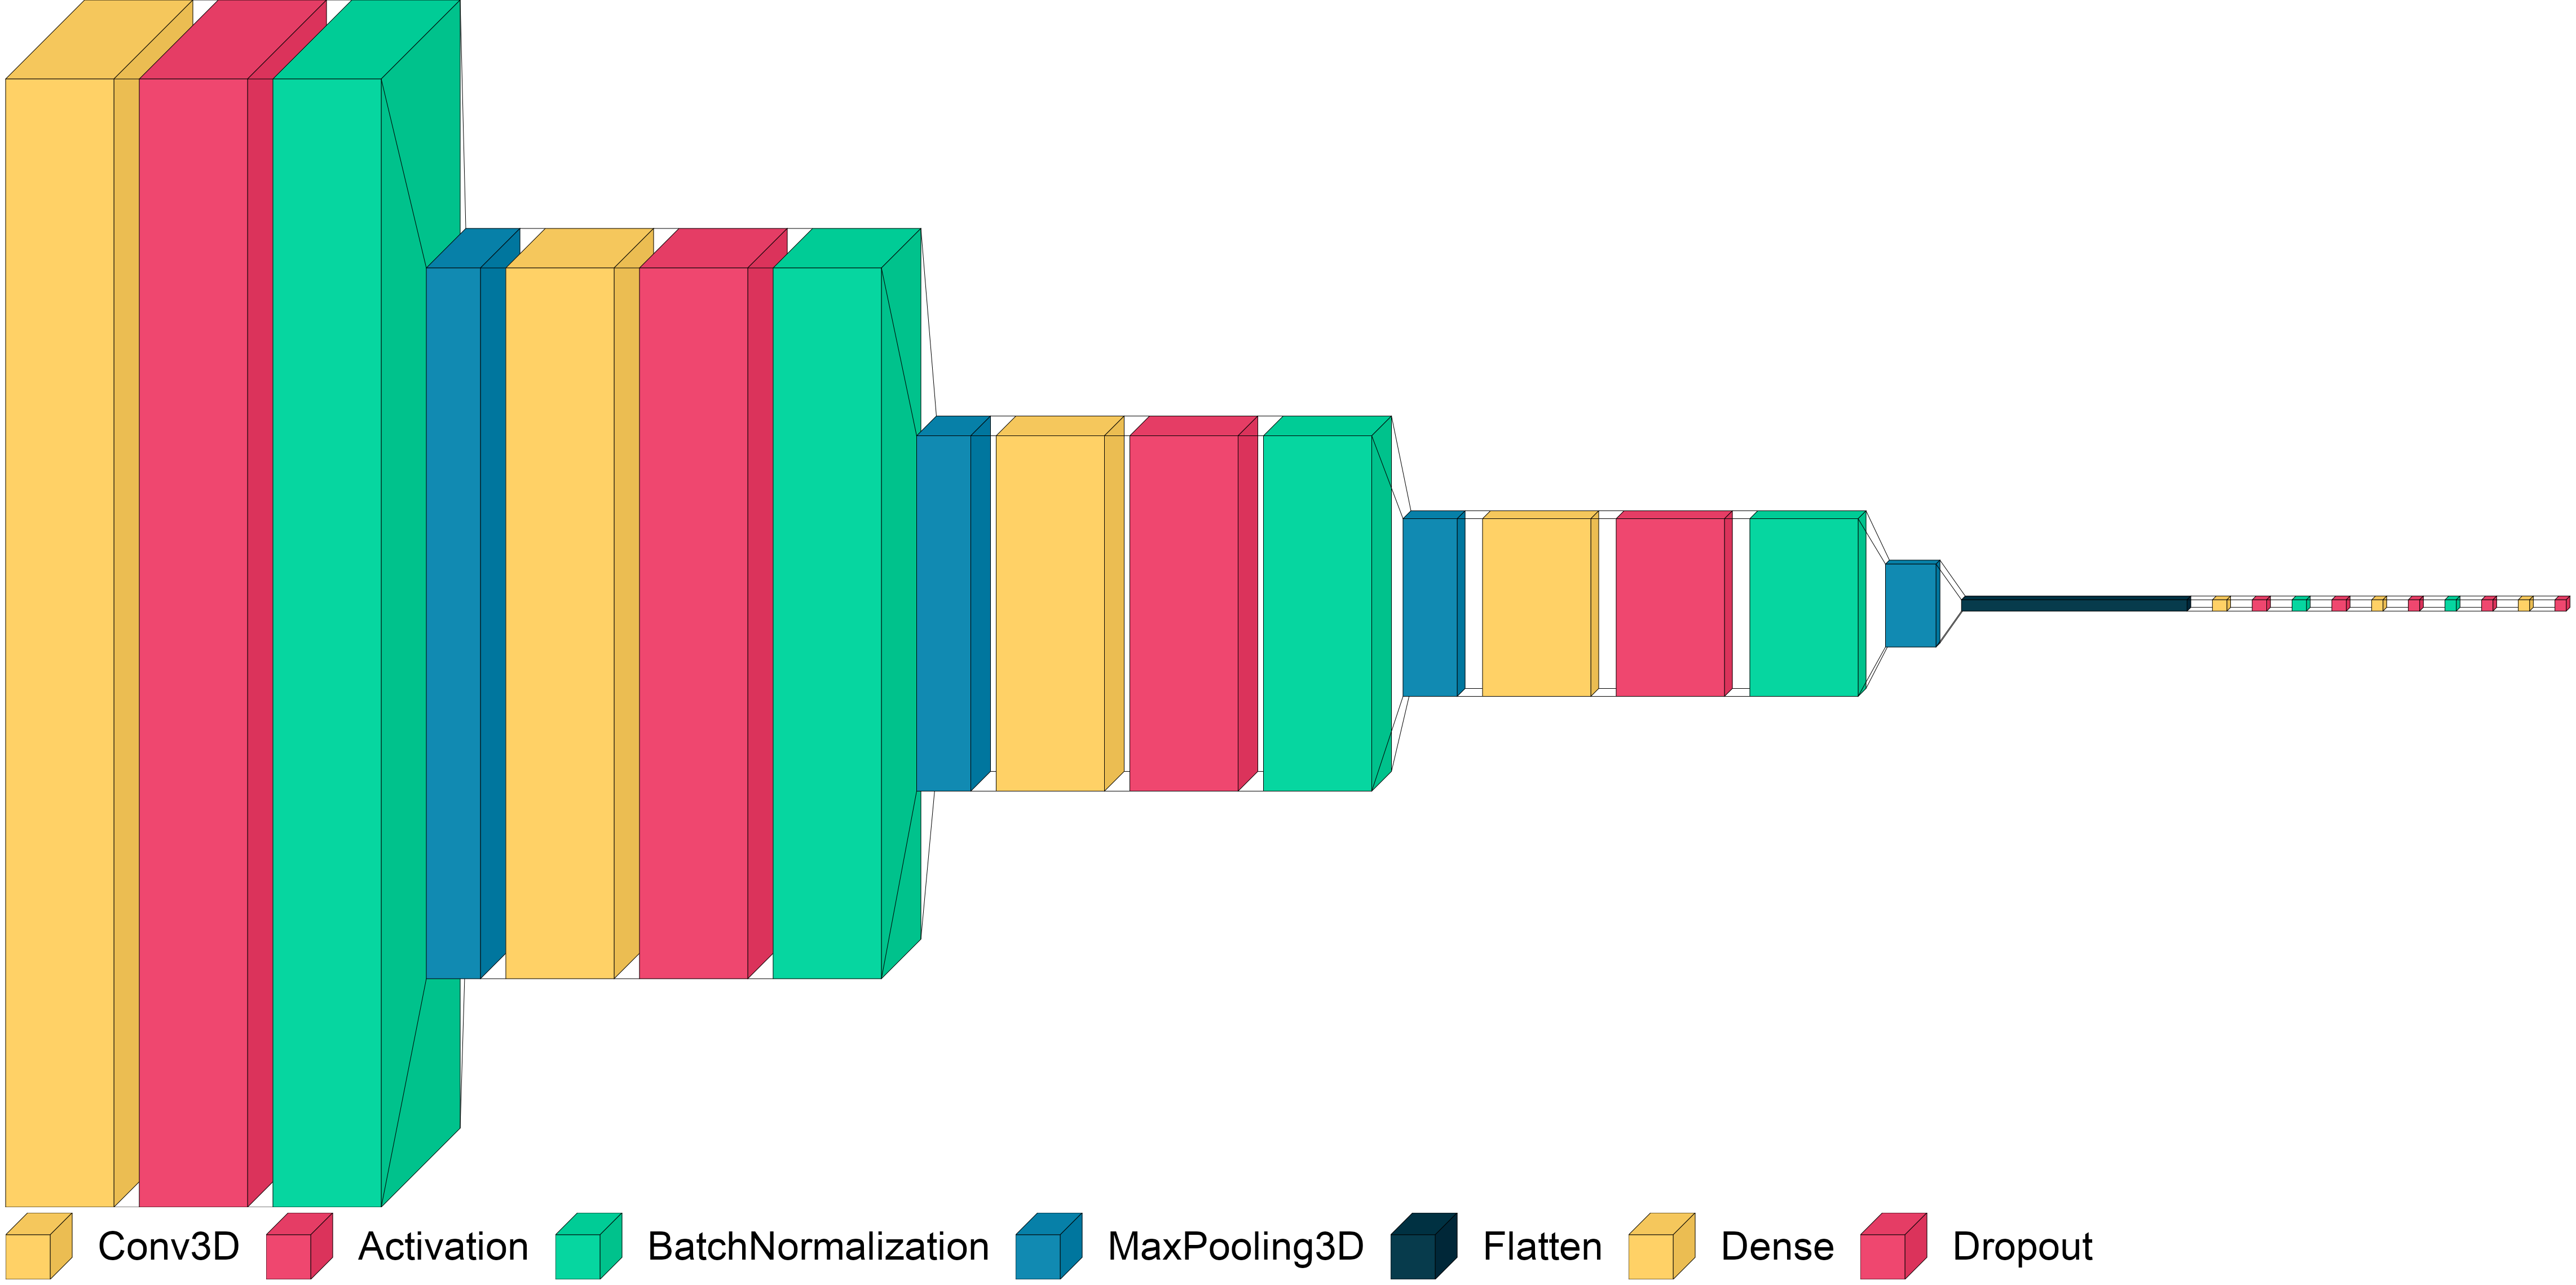

In [24]:
visualkeras.layered_view(model_01, spacing=45, legend=True, font=font, scale_xy=21)

### Model-1 diagram in 2D

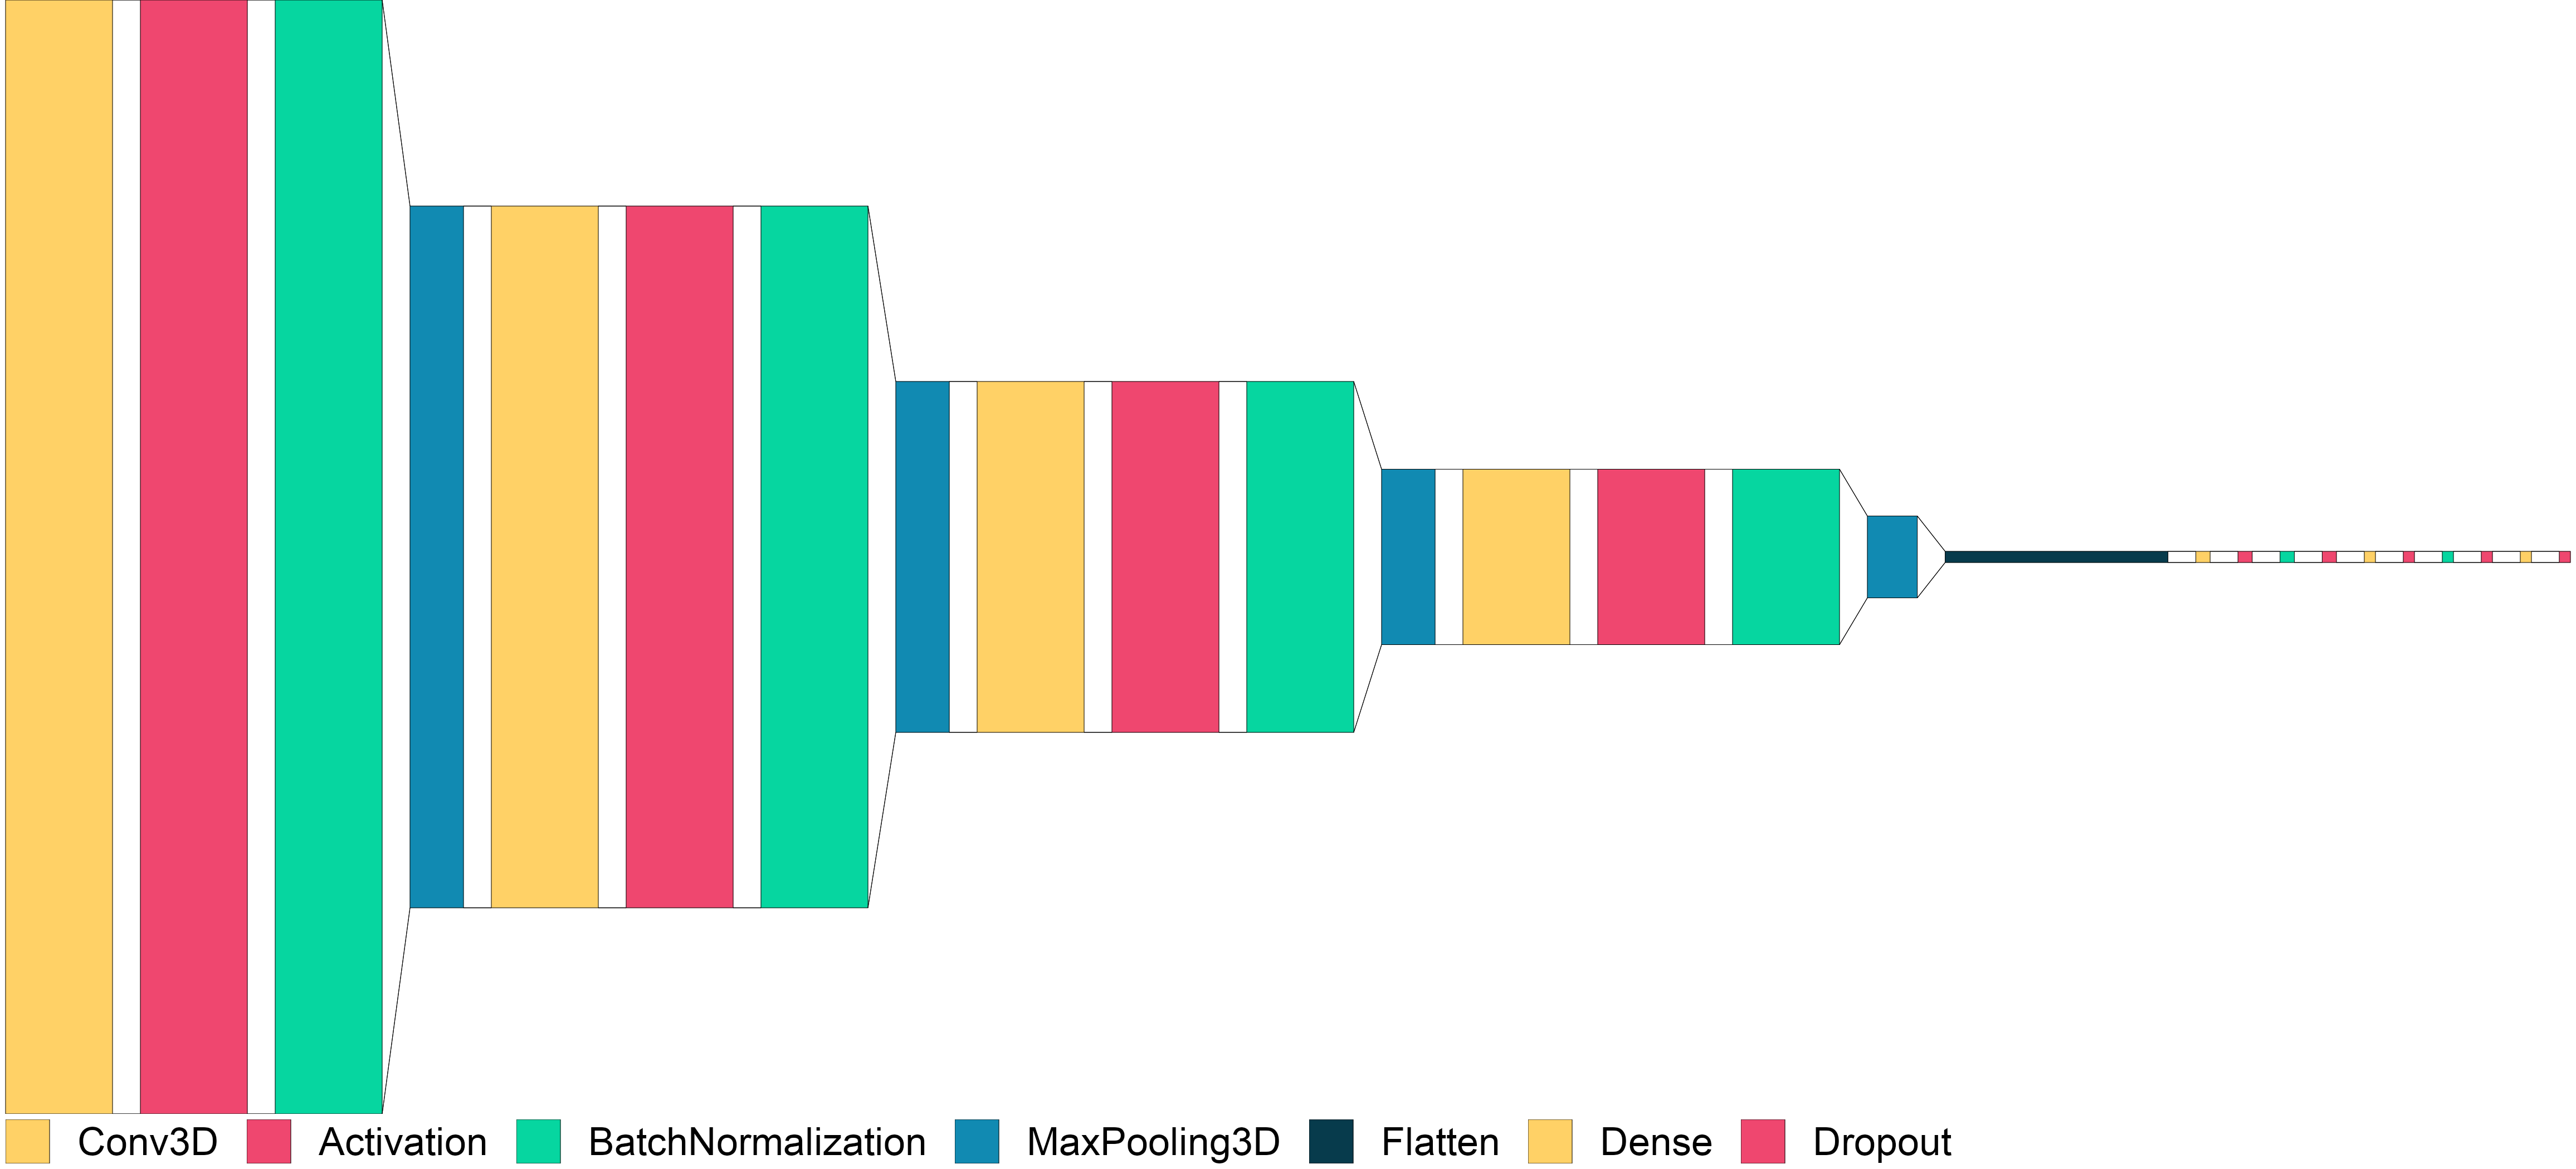

In [25]:
visualkeras.layered_view(model_01, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [26]:
history = model_01.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15


2024-01-06 14:58:48.537018: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


67/67 [==============================] - ETA: 0s - loss: 1.3289 - categorical_accuracy: 0.5068
Epoch 00001: saving model to Model_01_2024-01-0614_58_35.669263/model-00001-1.32892-0.50679-3.58899-0.23000.h5
67/67 [==============================] - 135s 2s/step - loss: 1.3289 - categorical_accuracy: 0.5068 - val_loss: 3.5890 - val_categorical_accuracy: 0.2300 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 0.9556 - categorical_accuracy: 0.6290
Epoch 00002: saving model to Model_01_2024-01-0614_58_35.669263/model-00002-0.95556-0.62896-5.43191-0.15000.h5
67/67 [==============================] - 129s 2s/step - loss: 0.9556 - categorical_accuracy: 0.6290 - val_loss: 5.4319 - val_categorical_accuracy: 0.1500 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.6890 - categorical_accuracy: 0.7511
Epoch 00003: saving model to Model_01_2024-01-0614_58_35.669263/model-00003-0.68899-0.75113-6.42610-0.22000.h5
67/67 [===================

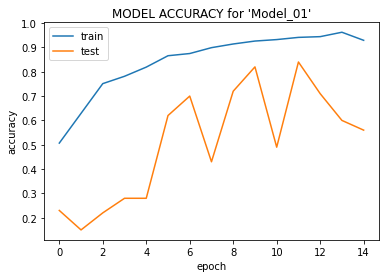

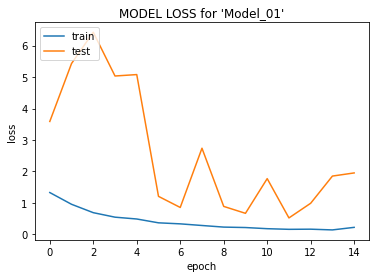

In [27]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [28]:
# Fetch statistics for populating model statistics workbook
total_params = model_01.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_01.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_01.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Default CONV3D model", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [ ]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-2: Model-1 with frames to be considered increased to 30 </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 30 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002 |

In [24]:
model_name = "Model_02"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_02 = build_conv3D_model(num_images_per_video=default_frames_count)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(num_images_per_video=default_frames_count)

val_generator   = generate(num_images_per_video=default_frames_count, is_validation=True)

print (model_02.summary())

Layer:True --- Dense:True


2024-01-06 15:48:58.582661: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 120, 120, 16)  1312      
                                                                 
 activation (Activation)     (None, 30, 120, 120, 16)  0         
                                                                 
 batch_normalization (BatchN  (None, 30, 120, 120, 16)  64       
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 15, 60, 60, 16)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 15, 60, 60, 32)    13856     
                                                                 
 activation_1 (Activation)   (None, 15, 60, 60, 32)    0

### Model-2 layer representation

In [25]:
# plot_model(model_02, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-2 diagram in 3D

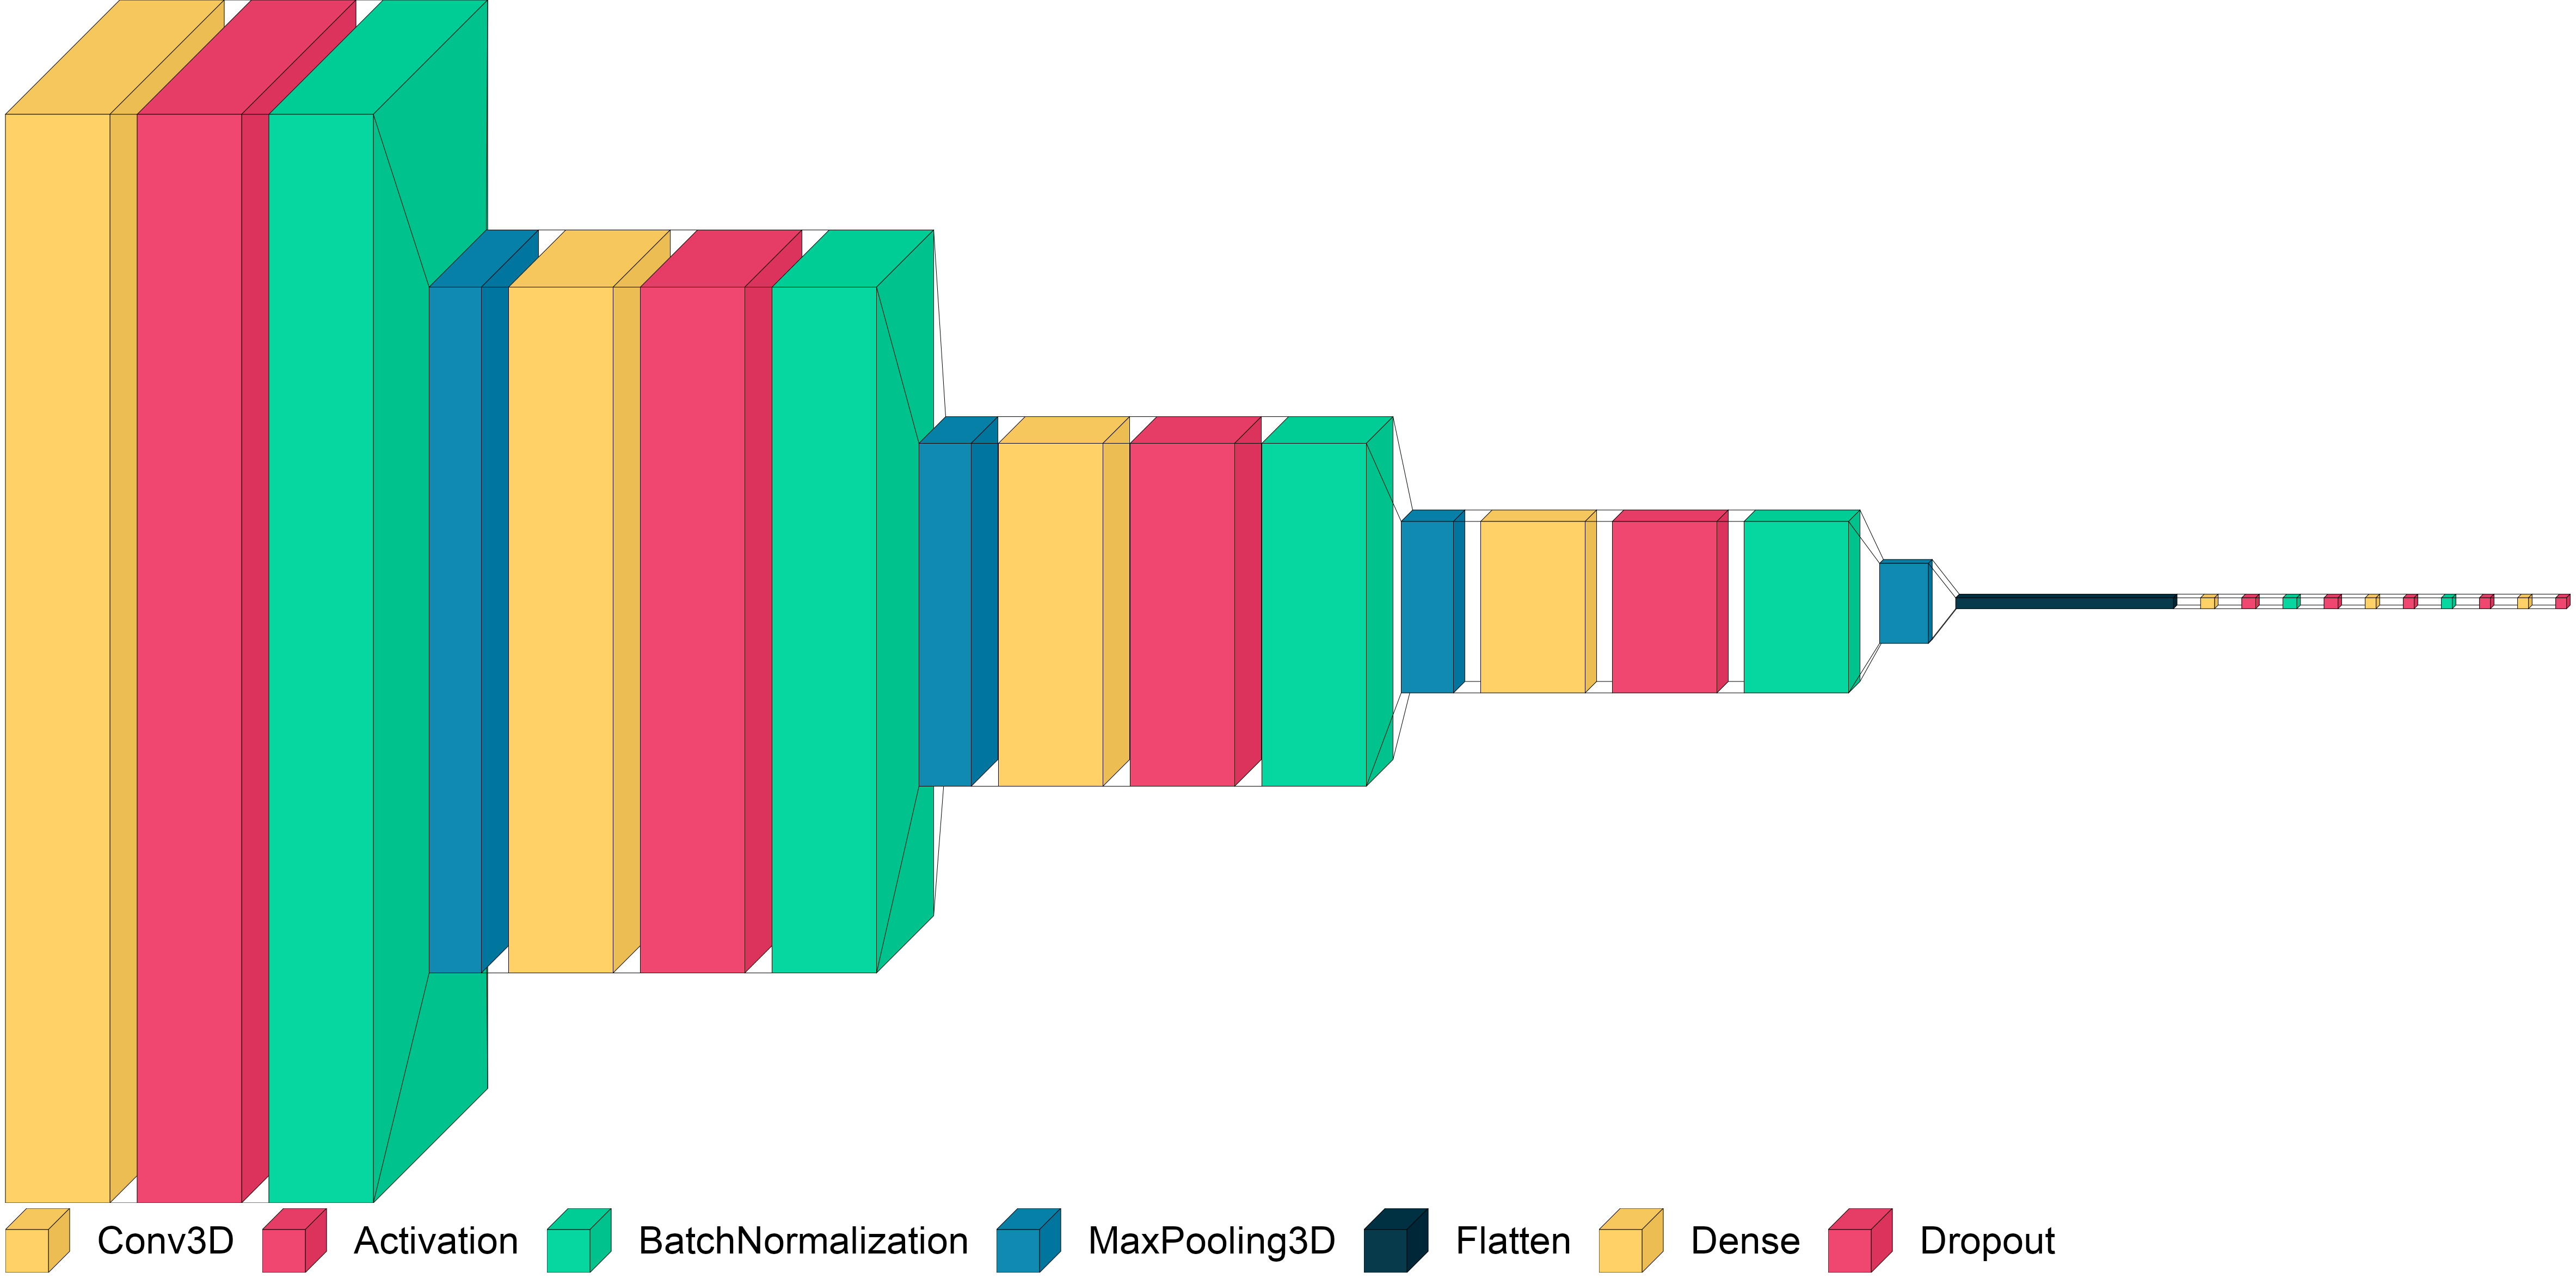

In [26]:
visualkeras.layered_view(model_02, spacing=50, legend=True, font=font, scale_xy=21)

### Model-2 diagram in 2D

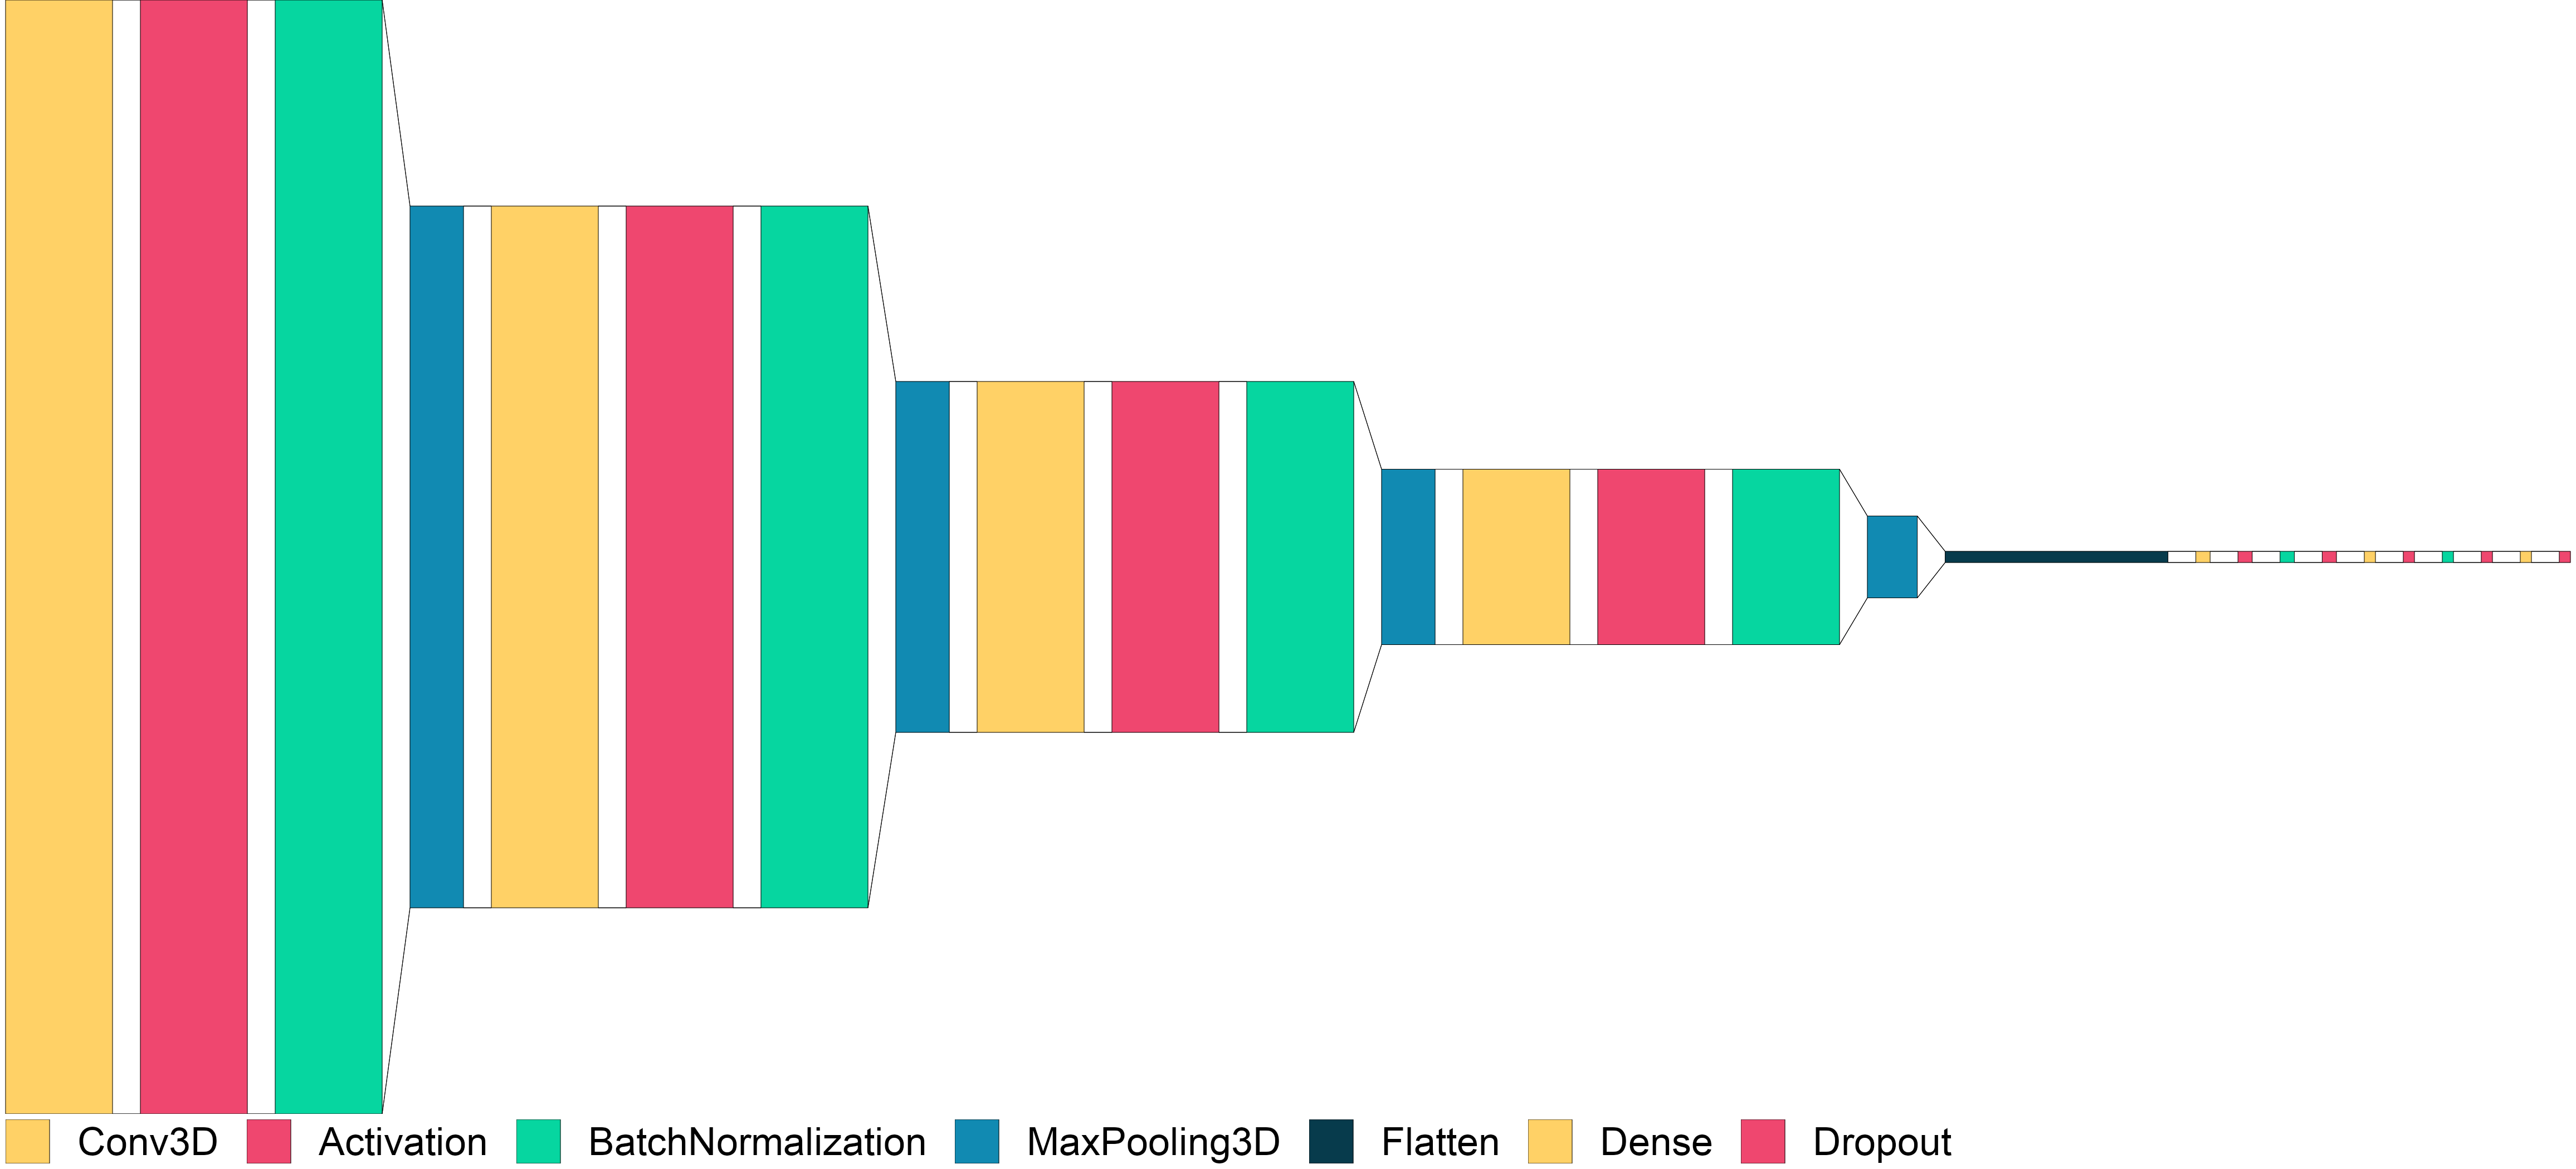

In [28]:
visualkeras.layered_view(model_02, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [29]:
history = model_02.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15


2024-01-06 15:49:43.205440: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


67/67 [==============================] - ETA: 0s - loss: 1.2884 - categorical_accuracy: 0.5445
Epoch 00001: saving model to Model_02_2024-01-0615_48_01.067600/model-00001-1.28836-0.54449-3.46062-0.21000.h5
67/67 [==============================] - 203s 3s/step - loss: 1.2884 - categorical_accuracy: 0.5445 - val_loss: 3.4606 - val_categorical_accuracy: 0.2100 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 0.8925 - categorical_accuracy: 0.6712
Epoch 00002: saving model to Model_02_2024-01-0615_48_01.067600/model-00002-0.89245-0.67119-2.21438-0.32000.h5
67/67 [==============================] - 195s 3s/step - loss: 0.8925 - categorical_accuracy: 0.6712 - val_loss: 2.2144 - val_categorical_accuracy: 0.3200 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.8351 - categorical_accuracy: 0.6787
Epoch 00003: saving model to Model_02_2024-01-0615_48_01.067600/model-00003-0.83508-0.67873-2.94292-0.29000.h5
67/67 [===================

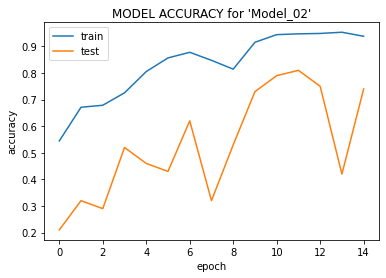

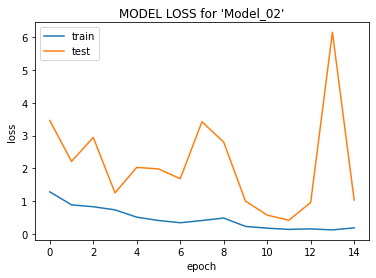

In [ ]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [ ]:
# Fetch statistics for populating model statistics workbook
total_params = model_02.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_02.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_02.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Model-1 with frames to be considered increased to 30", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 30,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [ ]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-3: Model-1 with image height and width adjusted to 100 </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 20 | 100 | 100 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002

In [ ]:
model_name = "Model_03"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_03= build_conv3D_model(image_height=100, image_width=100)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(image_height=100, image_width=100)

val_generator   = generate(image_height=100, image_width=100, is_validation=True)

print (model_03.summary())

Layer:True --- Dense:True
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 20, 100, 100, 16)  1312      
                                                                 
 activation_7 (Activation)   (None, 20, 100, 100, 16)  0         
                                                                 
 batch_normalization_6 (Batc  (None, 20, 100, 100, 16)  64       
 hNormalization)                                                 
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 10, 50, 50, 16)   0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 10, 50, 50, 32)    13856     
                                                                 
 activation_8 (Activation)  

### Model-3 layer representation

In [ ]:
# plot_model(model_03, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-3 diagram in 3D

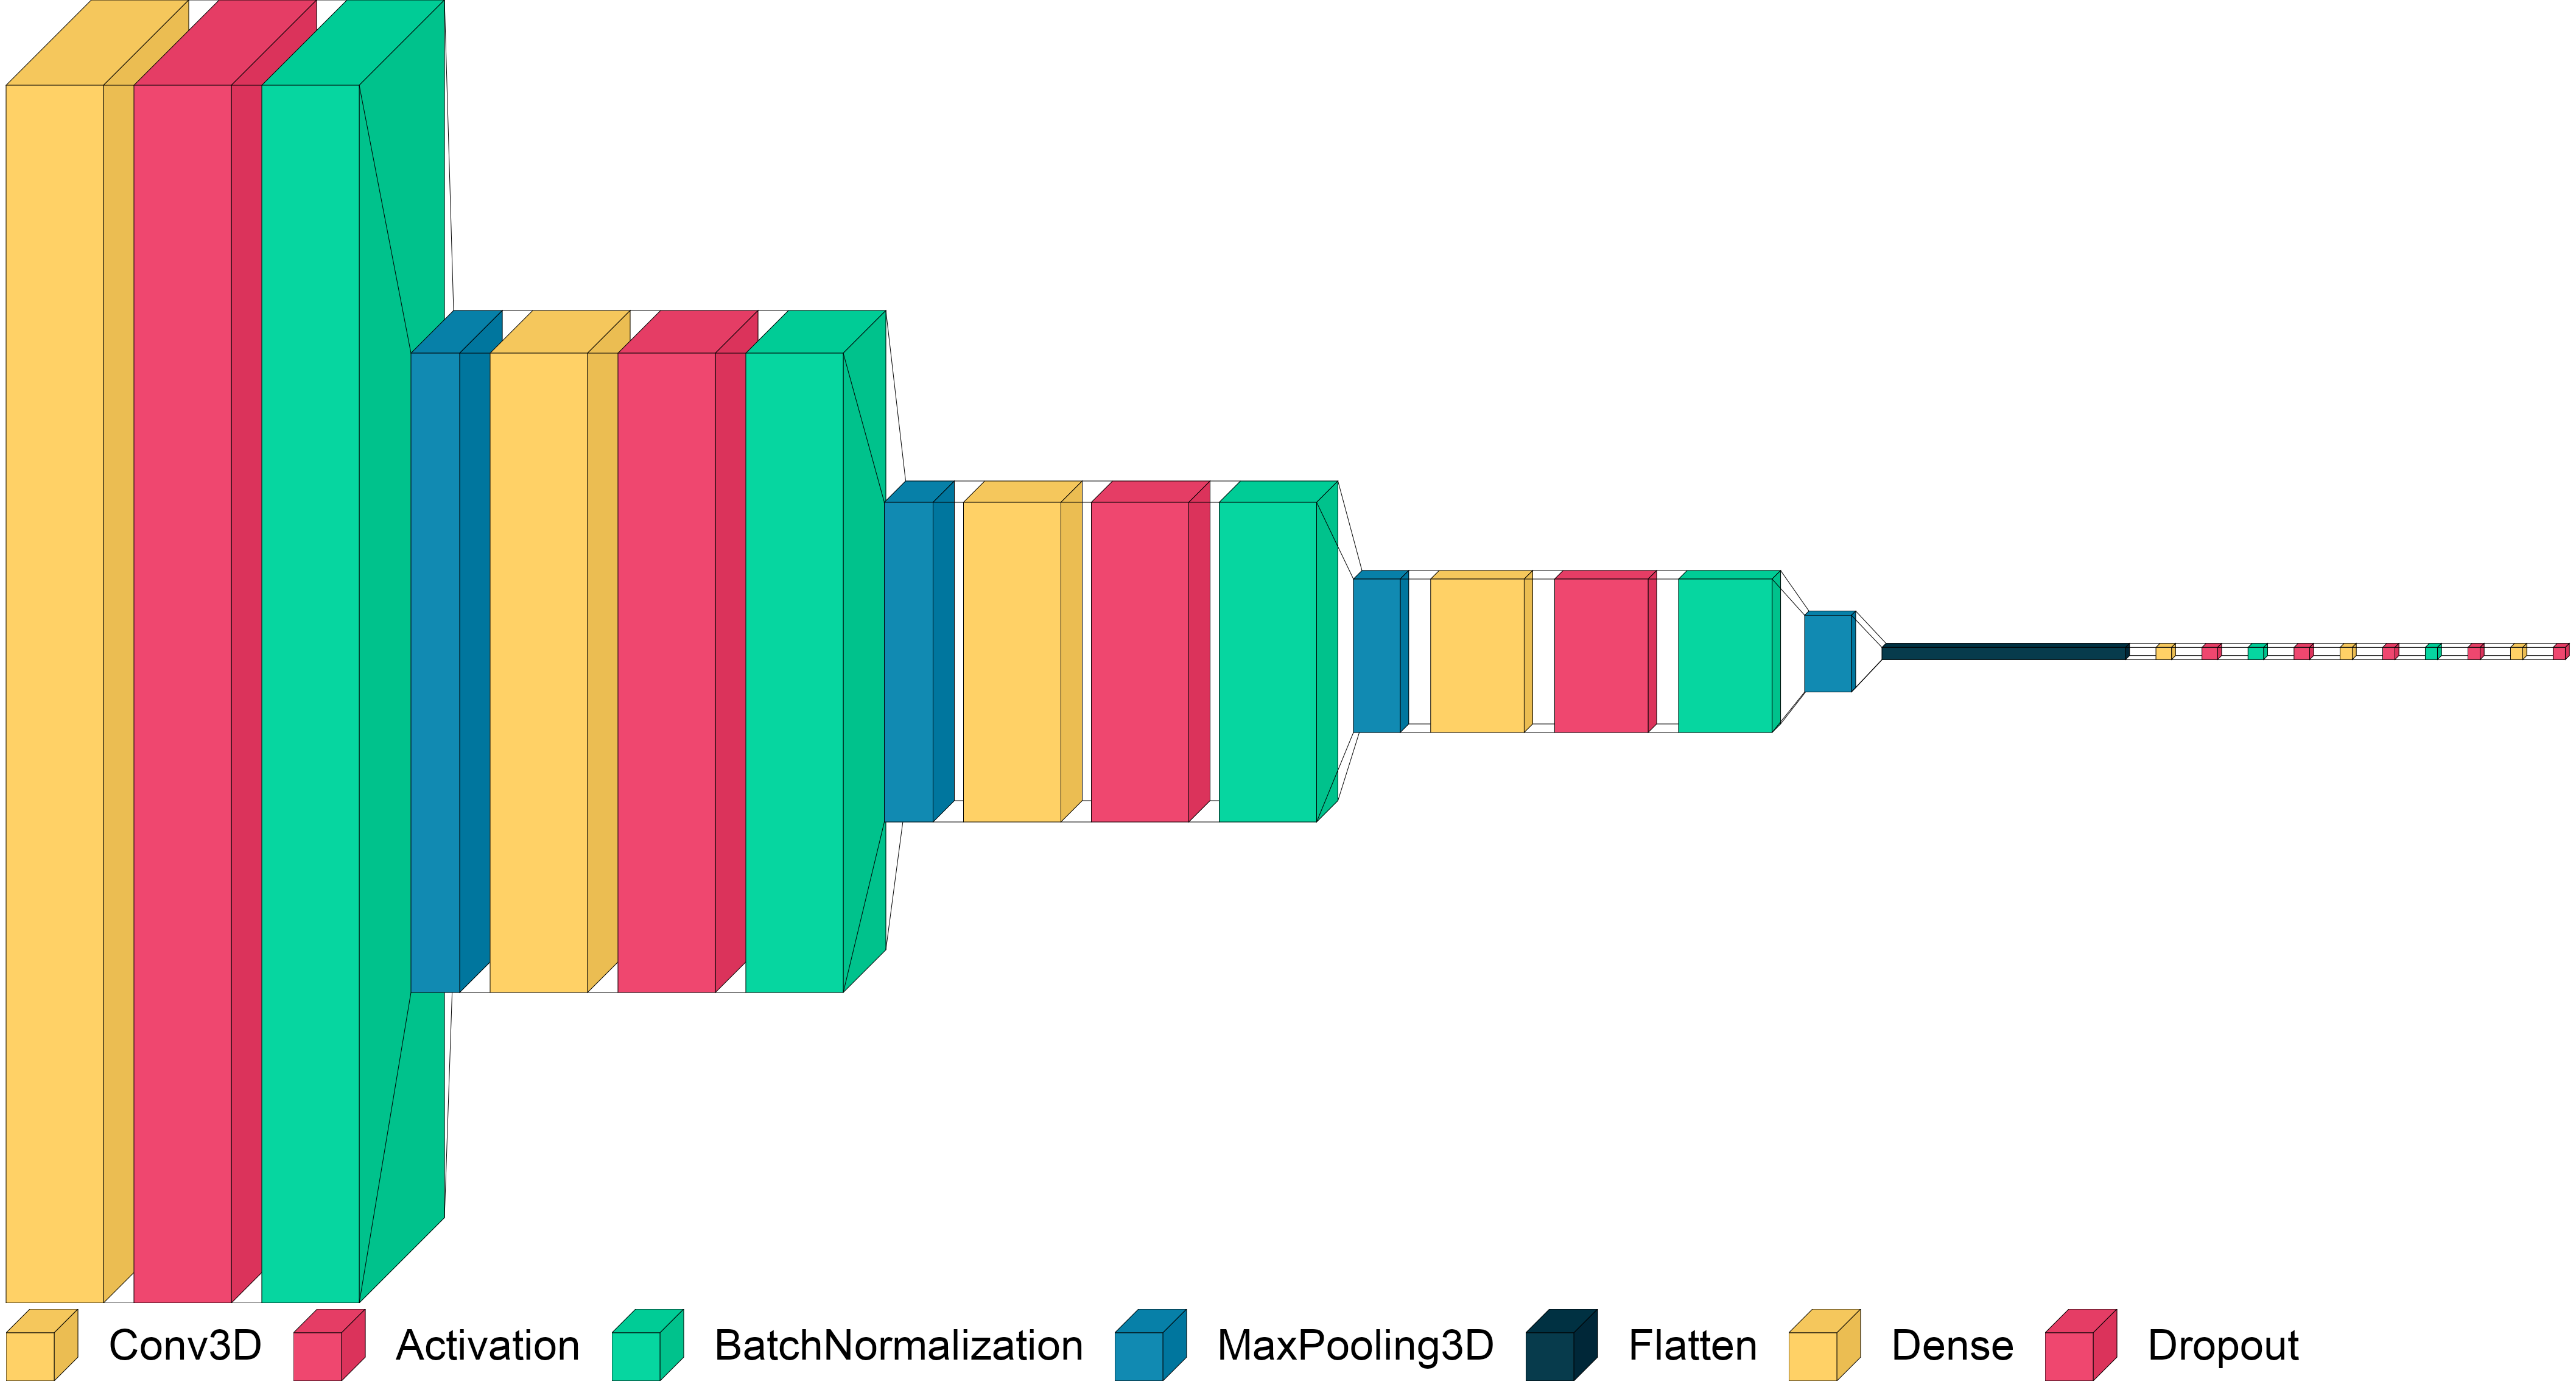

In [ ]:
visualkeras.layered_view(model_03, spacing=50, legend=True, font=font, scale_xy=21)

### Model-3 diagram in 2D

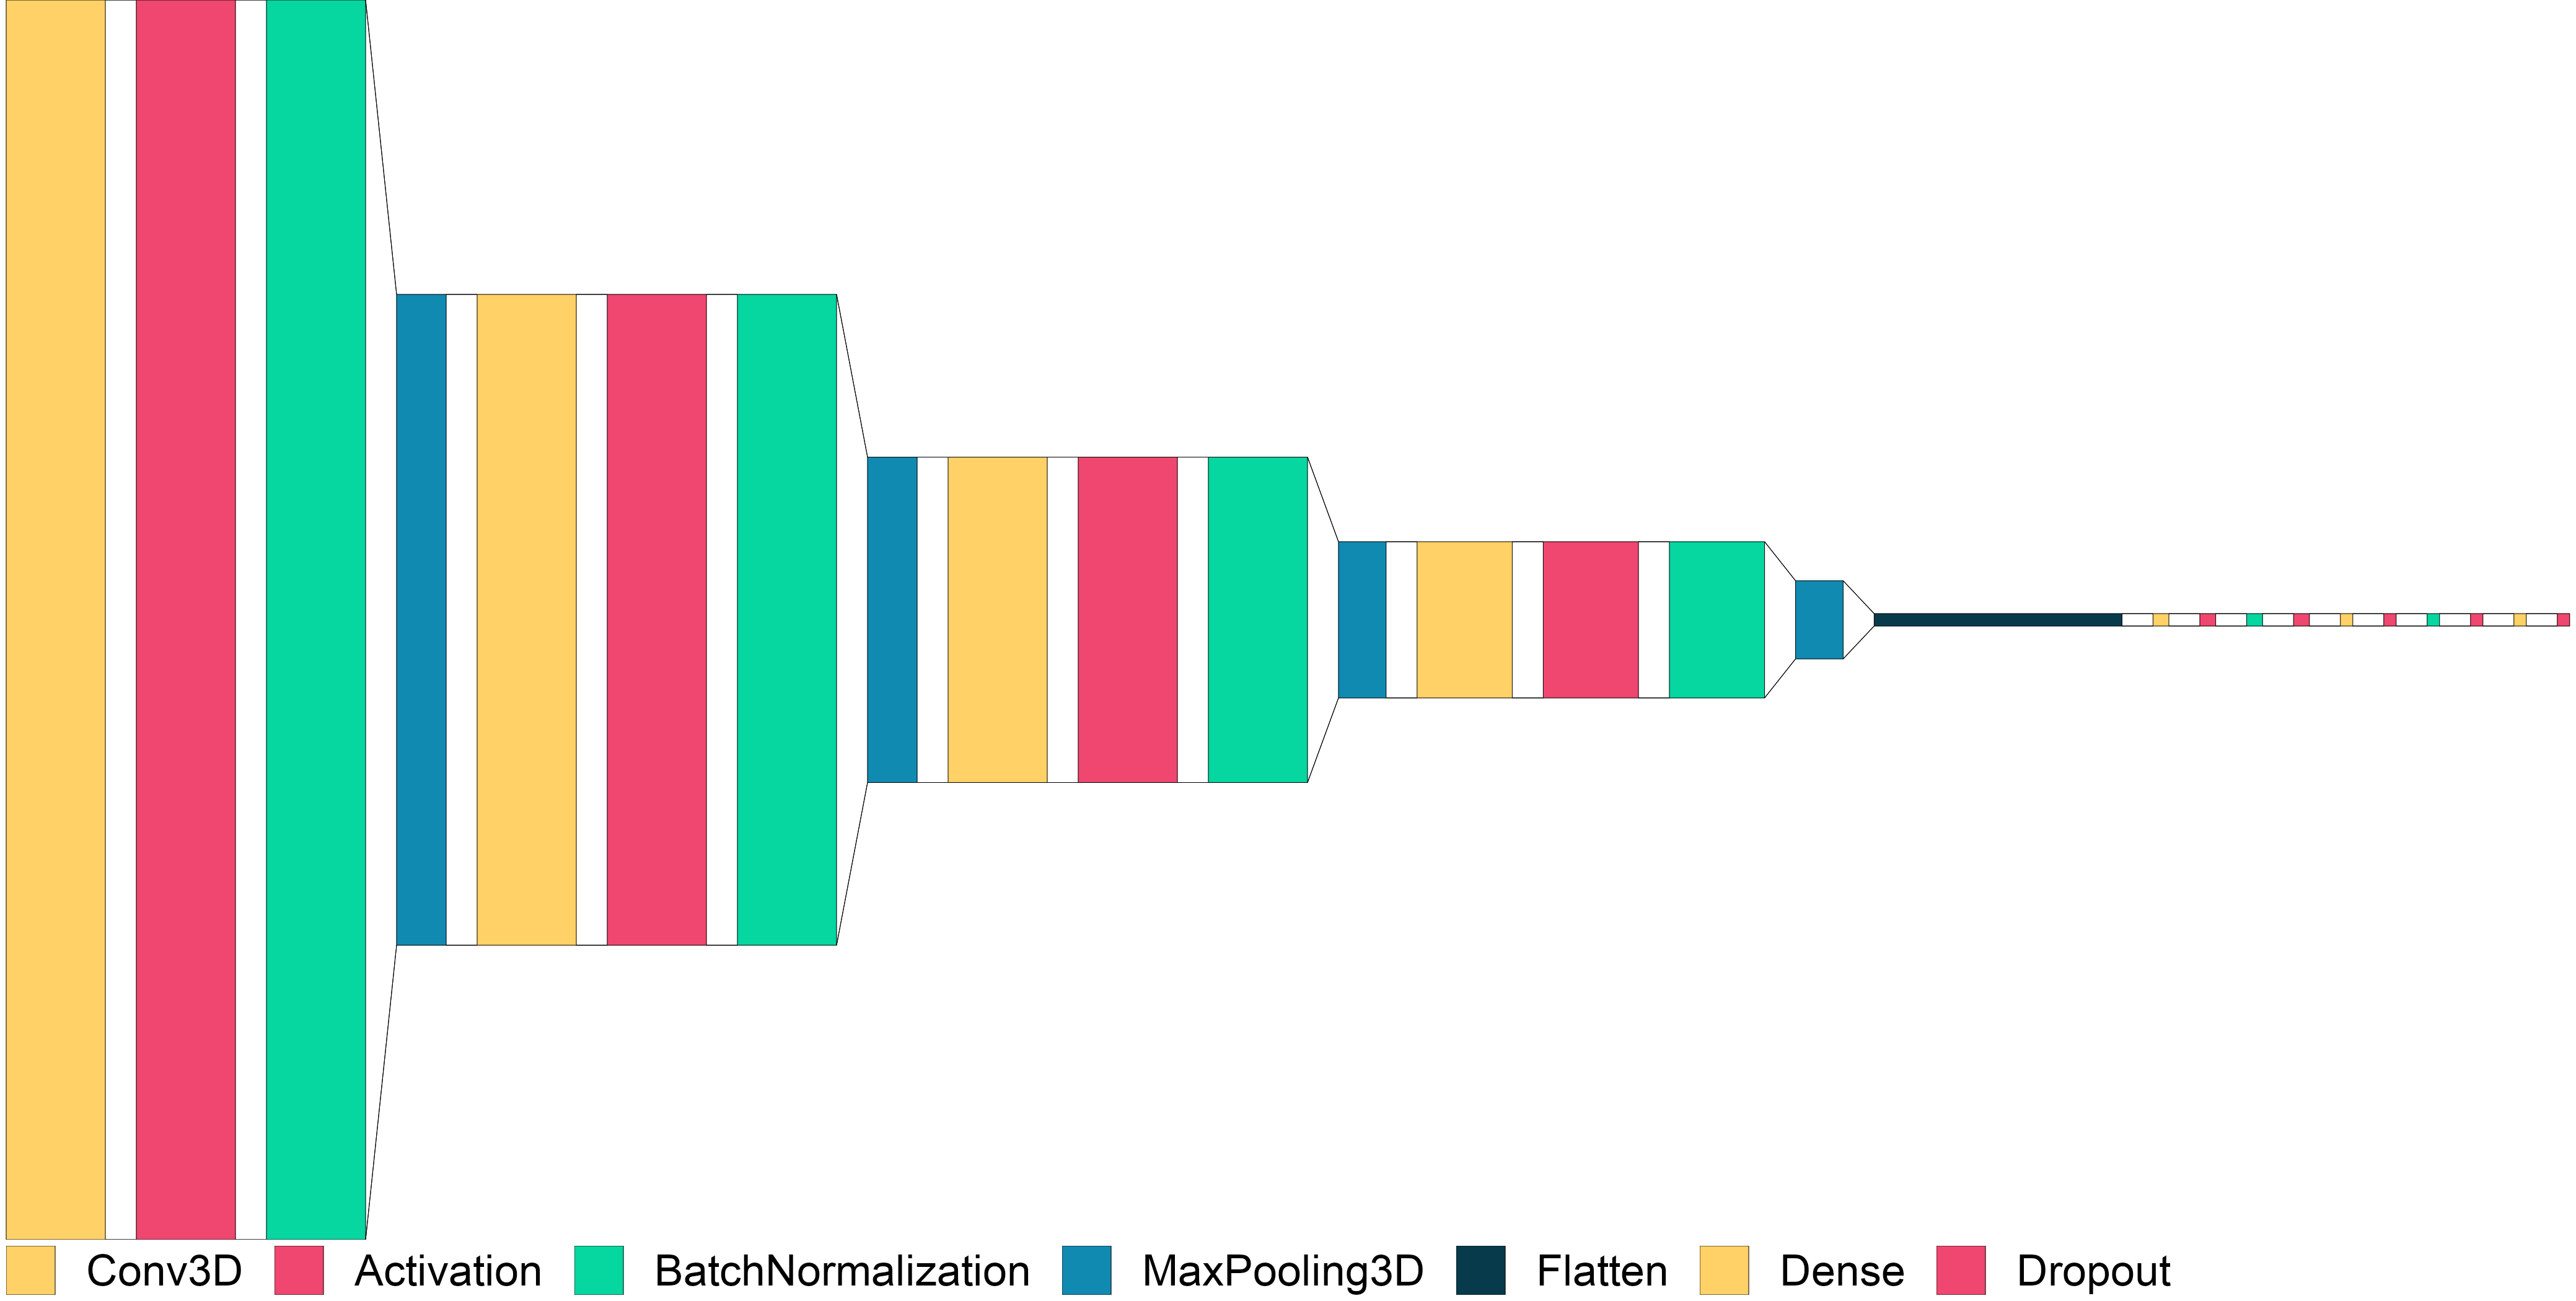

In [ ]:
visualkeras.layered_view(model_03, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [ ]:
history = model_03.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.5071 - categorical_accuracy: 0.4133
Epoch 00001: saving model to Model_03_2024-01-0615_48_01.067600/model-00001-1.50711-0.41327-3.21997-0.28000.h5
67/67 [==============================] - 131s 2s/step - loss: 1.5071 - categorical_accuracy: 0.4133 - val_loss: 3.2200 - val_categorical_accuracy: 0.2800 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.1462 - categorical_accuracy: 0.5490
Epoch 00002: saving model to Model_03_2024-01-0615_48_01.067600/model-00002-1.14621-0.54902-2.73937-0.23000.h5
67/67 [==============================] - 128s 2s/step - loss: 1.1462 - categorical_accuracy: 0.5490 - val_loss: 2.7394 - val_categorical_accuracy: 0.2300 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.9581 - categorical_accuracy: 0.6154
Epoch 00003: saving model to Model_03_2024-01-0615_48_01.067600/model-00003-0.95810-0.61538-2.57539-0.27000.h5
67/67 [========

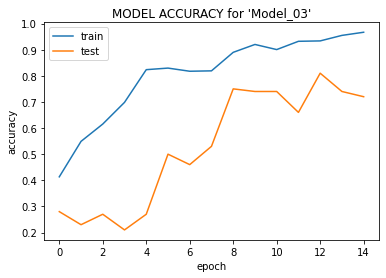

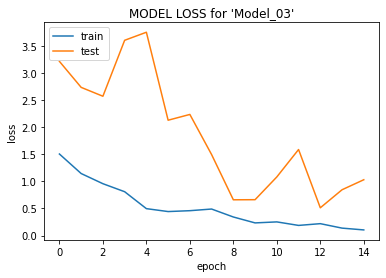

In [ ]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [ ]:
# Fetch statistics for populating model statistics workbook
total_params = model_03.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_03.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_03.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Model-1 with image height and width adjusted to 100", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             100, 100, 15, 32, "Adam", False, 0.002)

In [ ]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-4: Model-1 with CONV3D filters in decreasing order </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (128, 64, 32, 16) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002

In [ ]:
model_name = "Model_04"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_04 = build_conv3D_model(conv3d_filters=(128, 64, 32, 16))

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate()

val_generator   = generate(is_validation=True)

print (model_04.summary())

Layer:True --- Dense:True
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_8 (Conv3D)           (None, 20, 120, 120, 128  10496     
                             )                                   
                                                                 
 activation_14 (Activation)  (None, 20, 120, 120, 128  0         
                             )                                   
                                                                 
 batch_normalization_12 (Bat  (None, 20, 120, 120, 128  512      
 chNormalization)            )                                   
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 10, 60, 60, 128)  0         
 3D)                                                             
                                                                 
 conv3d_9 (Conv3D)          

### Model-4 layer representation

In [ ]:
# plot_model(model_04, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-4 diagram in 3D

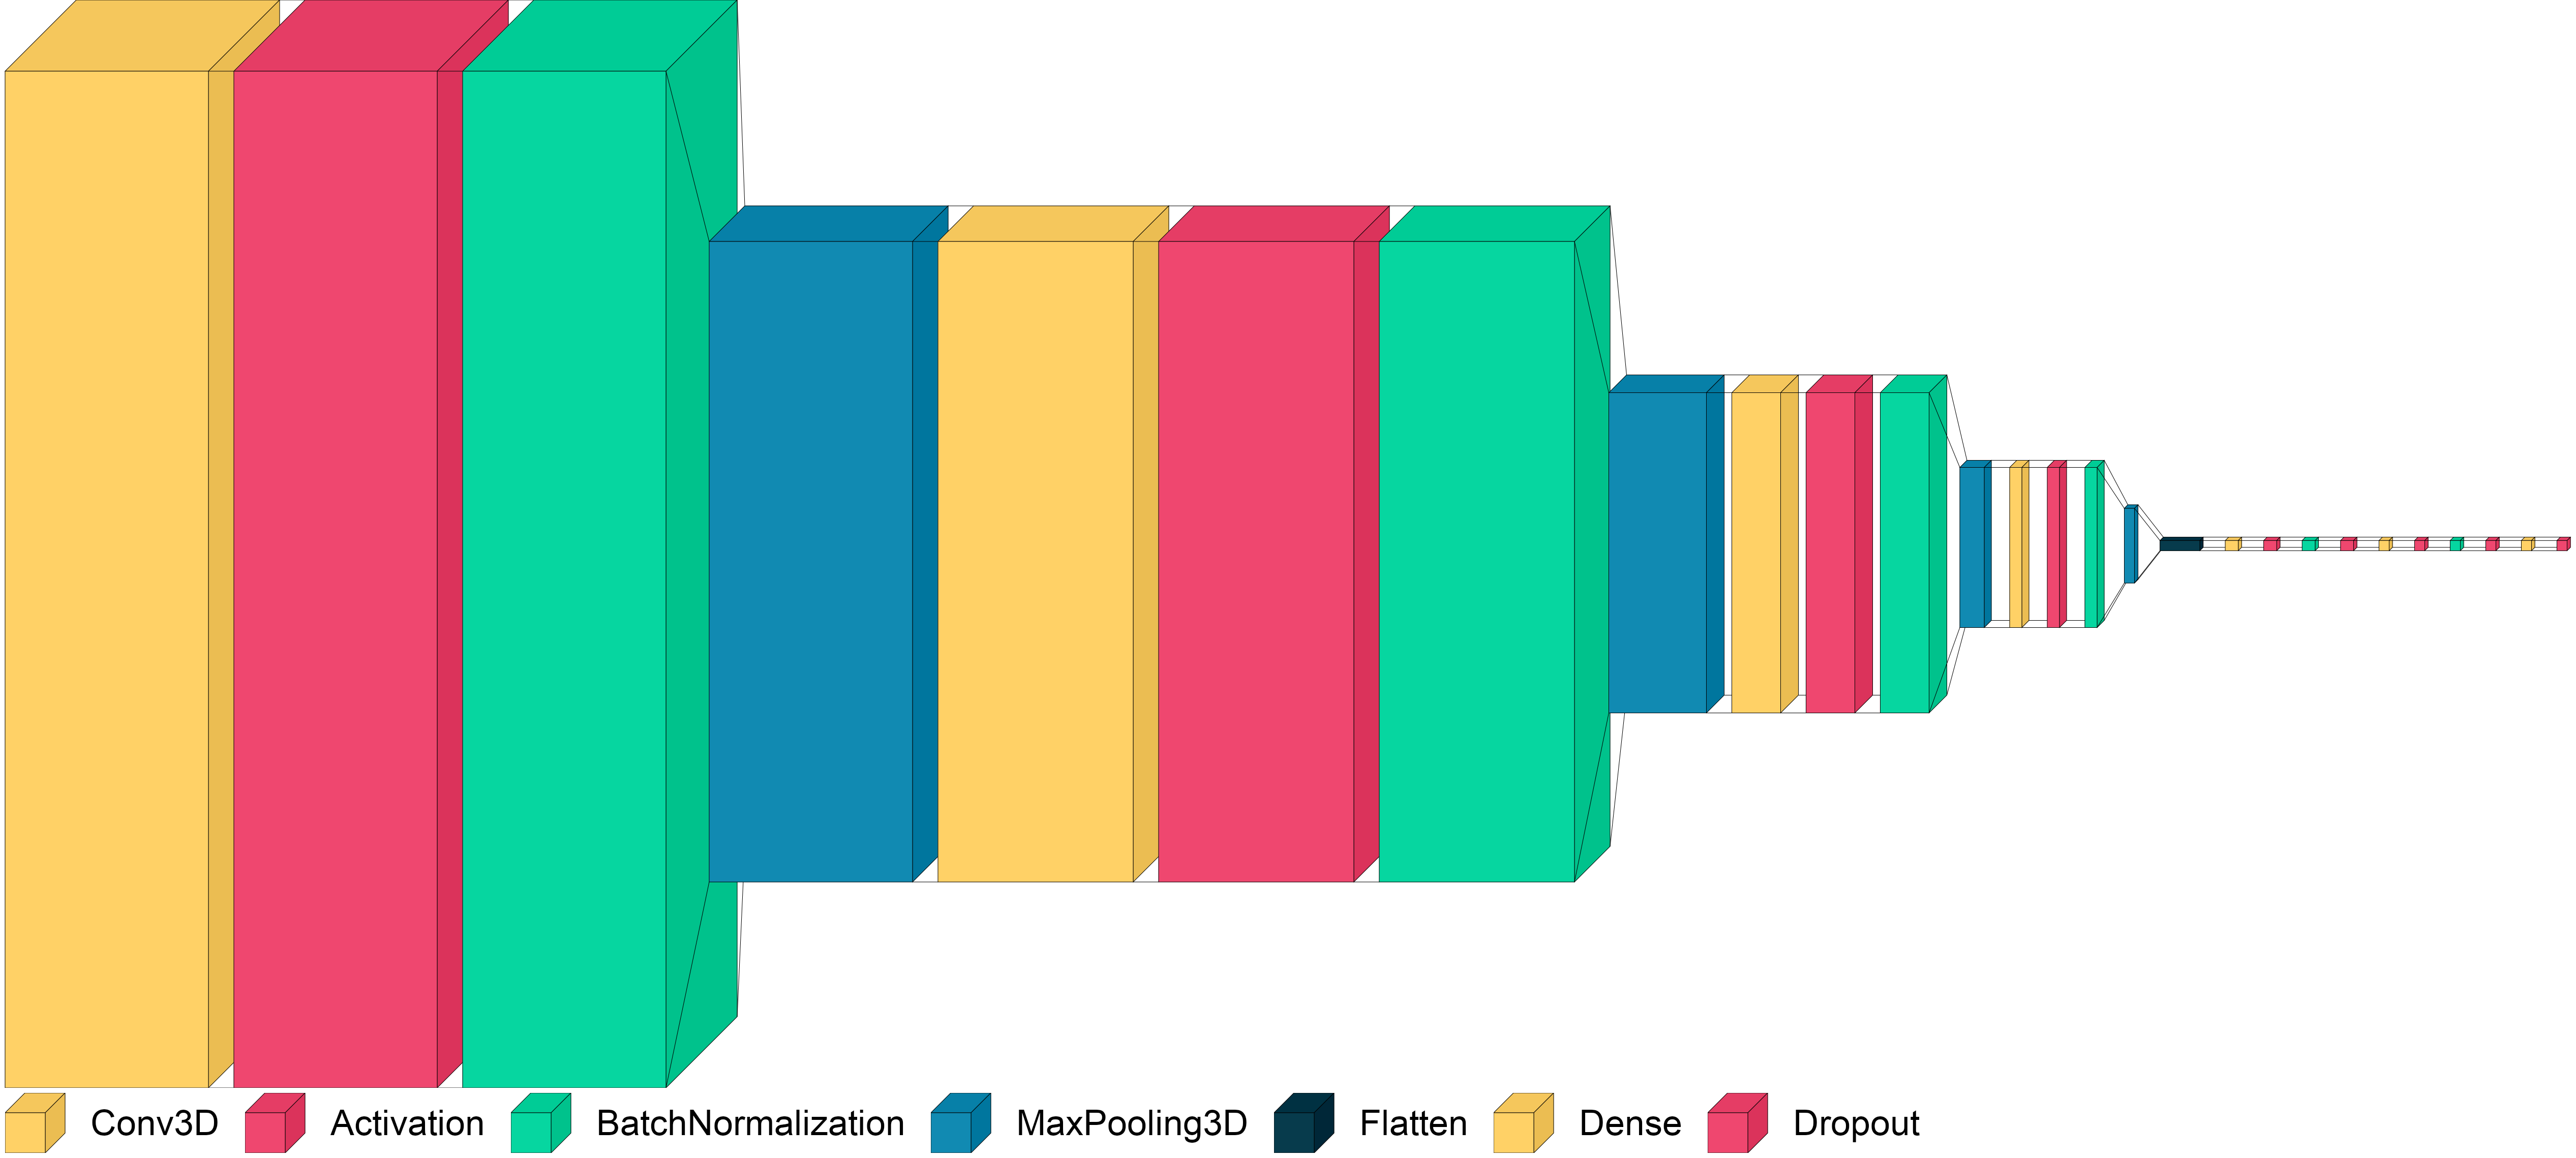

In [ ]:
visualkeras.layered_view(model_04, spacing=50, legend=True, font=font, scale_xy=21)

### Model-4 diagram in 2D

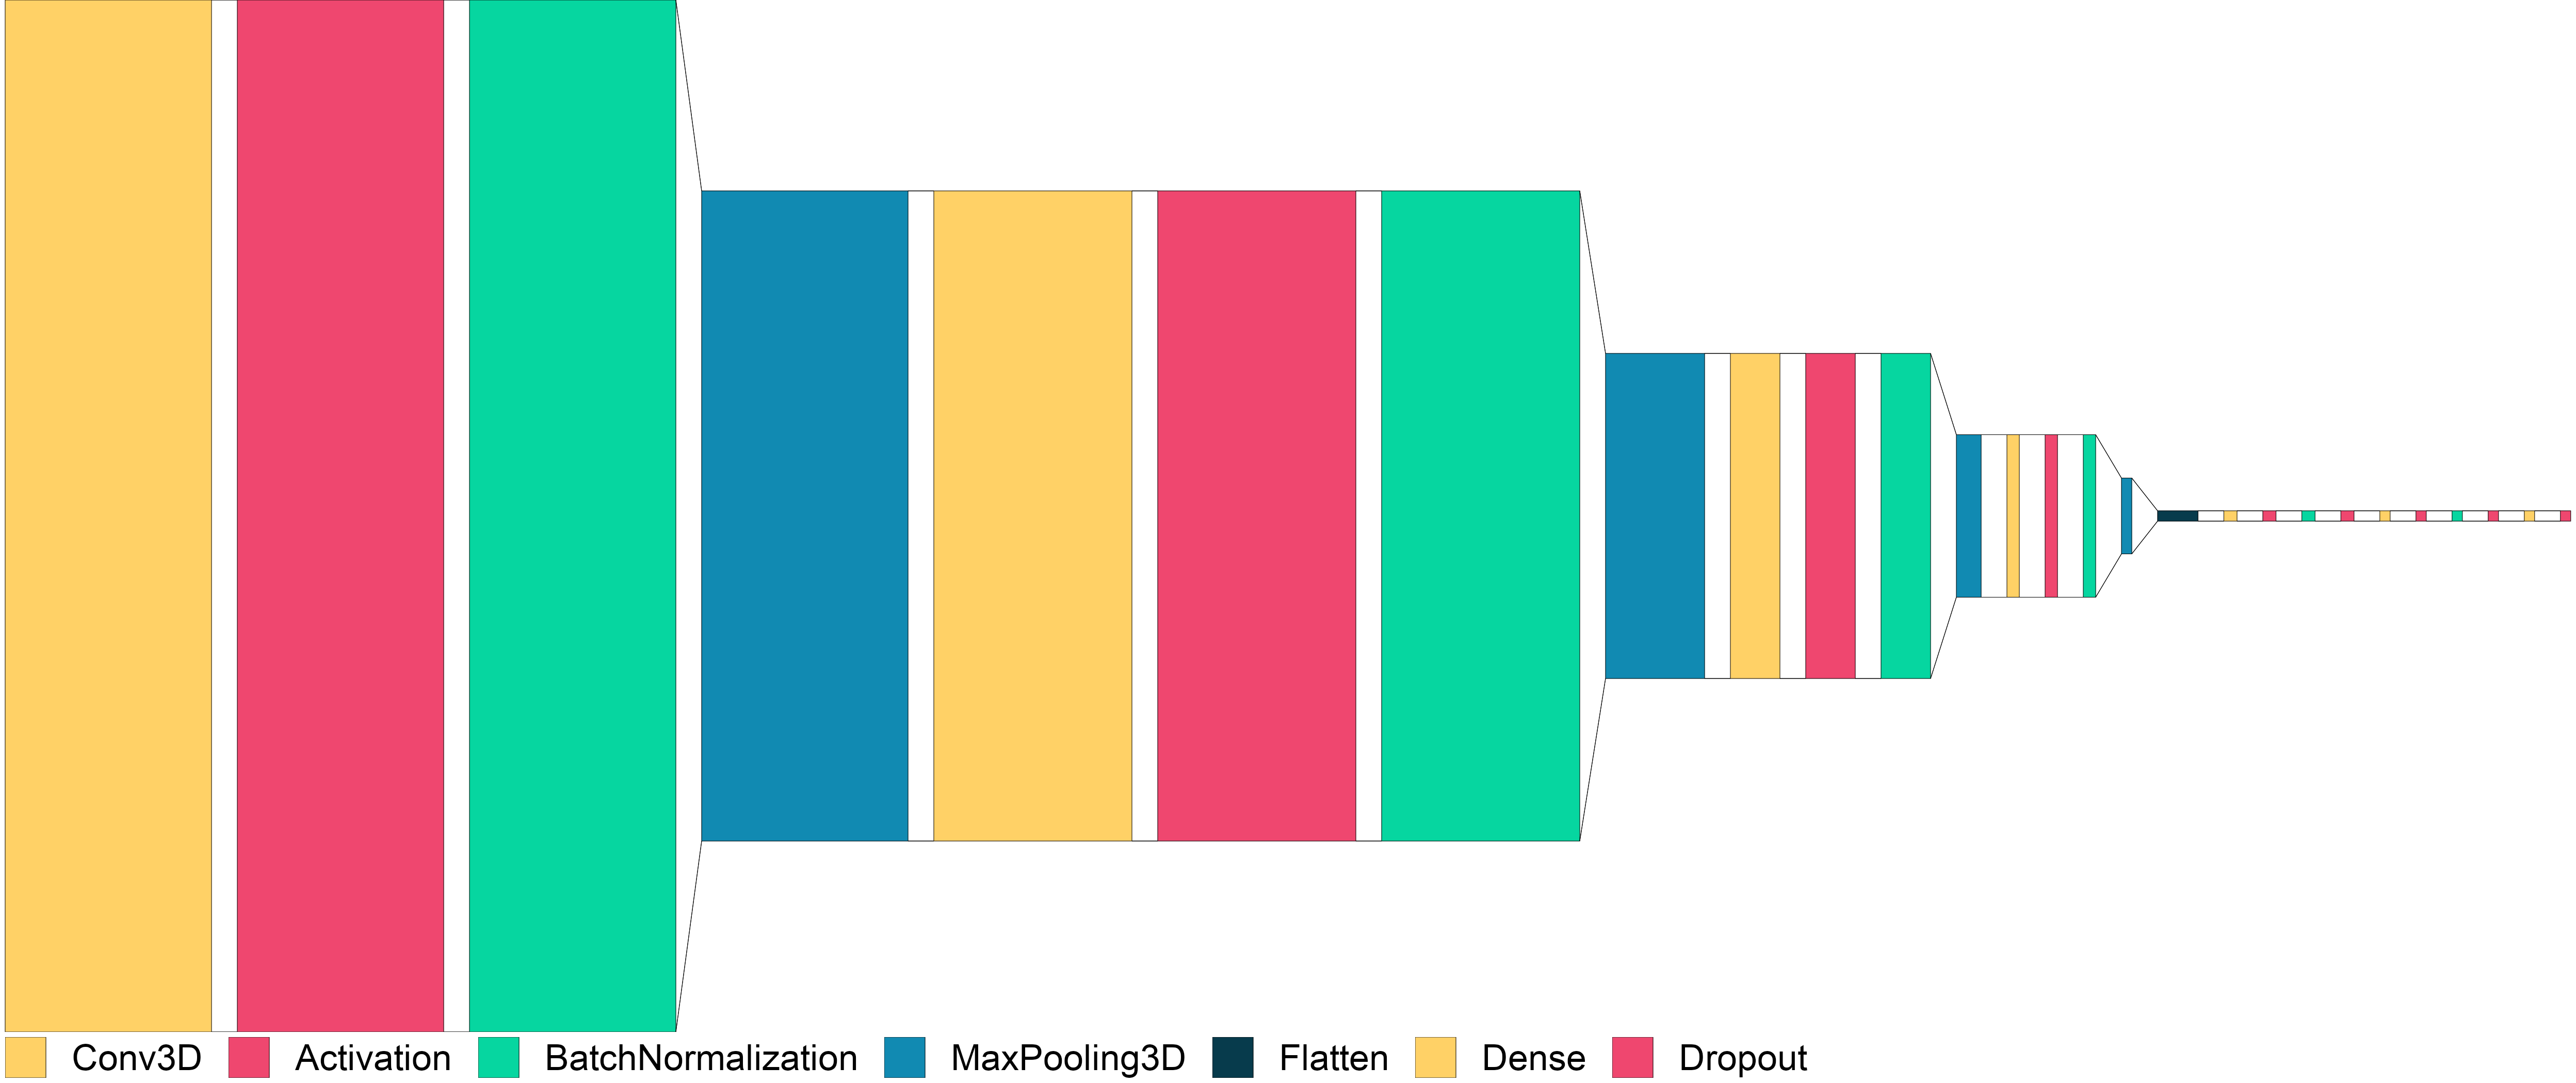

In [ ]:
visualkeras.layered_view(model_04, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [ ]:
history = model_04.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.5369 - categorical_accuracy: 0.4465
Epoch 00001: saving model to Model_04_2024-01-0615_48_01.067600/model-00001-1.53695-0.44646-2.77542-0.28000.h5
67/67 [==============================] - 133s 2s/step - loss: 1.5369 - categorical_accuracy: 0.4465 - val_loss: 2.7754 - val_categorical_accuracy: 0.2800 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 0.9513 - categorical_accuracy: 0.6109
Epoch 00002: saving model to Model_04_2024-01-0615_48_01.067600/model-00002-0.95133-0.61086-5.88008-0.14000.h5
67/67 [==============================] - 128s 2s/step - loss: 0.9513 - categorical_accuracy: 0.6109 - val_loss: 5.8801 - val_categorical_accuracy: 0.1400 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.7634 - categorical_accuracy: 0.6938
Epoch 00003: saving model to Model_04_2024-01-0615_48_01.067600/model-00003-0.76335-0.69382-1.52623-0.46000.h5
67/67 [========

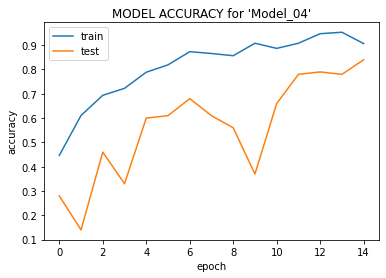

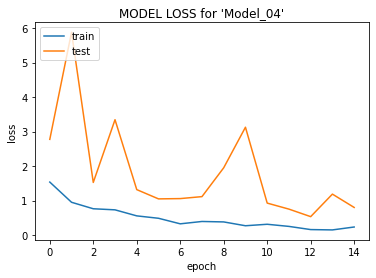

In [ ]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [ ]:
# Fetch statistics for populating model statistics workbook
total_params = model_04.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_04.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_04.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Model-1 with CONV3D filters in decreasing order", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [ ]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-5: Model-1 with single dense layer with filter (256) </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 1 | (256) | 0.0 | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002 |

In [ ]:
model_name = "Model_05"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_05 = build_conv3D_model(num_dense_layers=1, dense_layer_filters=(256,))

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate()

val_generator   = generate(is_validation=True)

print (model_05.summary())

Layer:True --- Dense:True
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_12 (Conv3D)          (None, 20, 120, 120, 16)  1312      
                                                                 
 activation_21 (Activation)  (None, 20, 120, 120, 16)  0         
                                                                 
 batch_normalization_18 (Bat  (None, 20, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_12 (MaxPoolin  (None, 10, 60, 60, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_13 (Conv3D)          (None, 10, 60, 60, 32)    13856     
                                                                 
 activation_22 (Activation) 

### Model-5 layer representation

In [ ]:
# plot_model(model_05, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-5 diagram in 3D

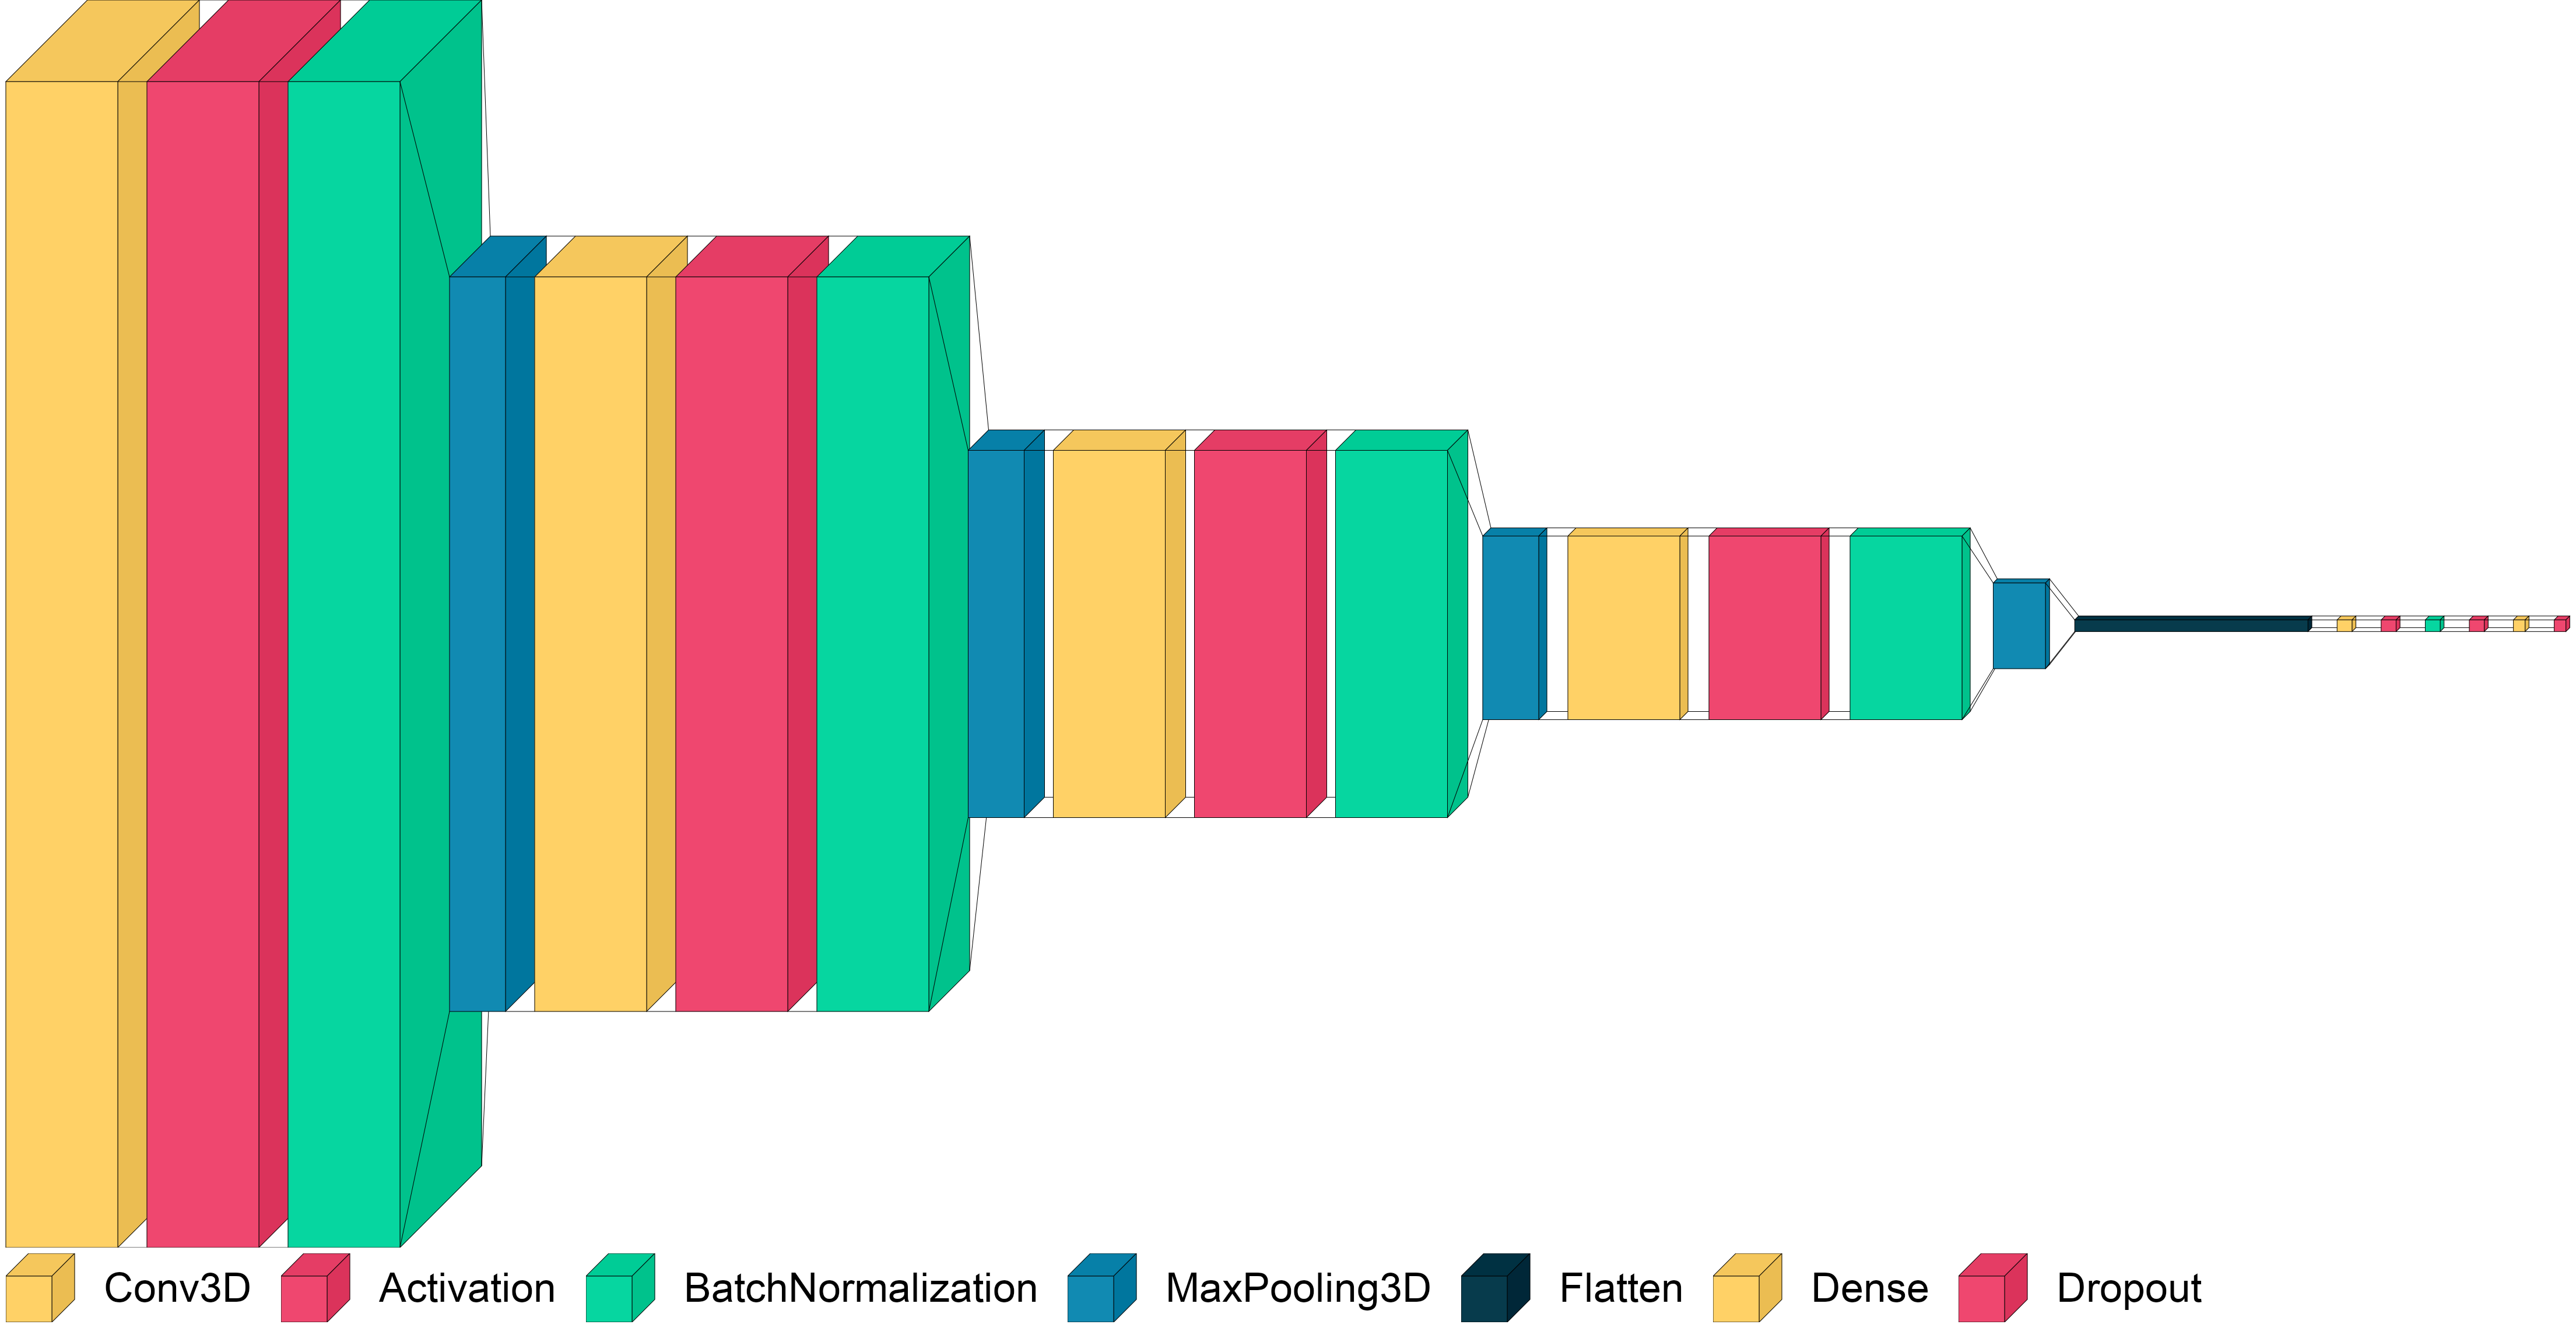

In [ ]:
visualkeras.layered_view(model_05, spacing=50, legend=True, font=font, scale_xy=21)

### Model-5 diagram in 2D

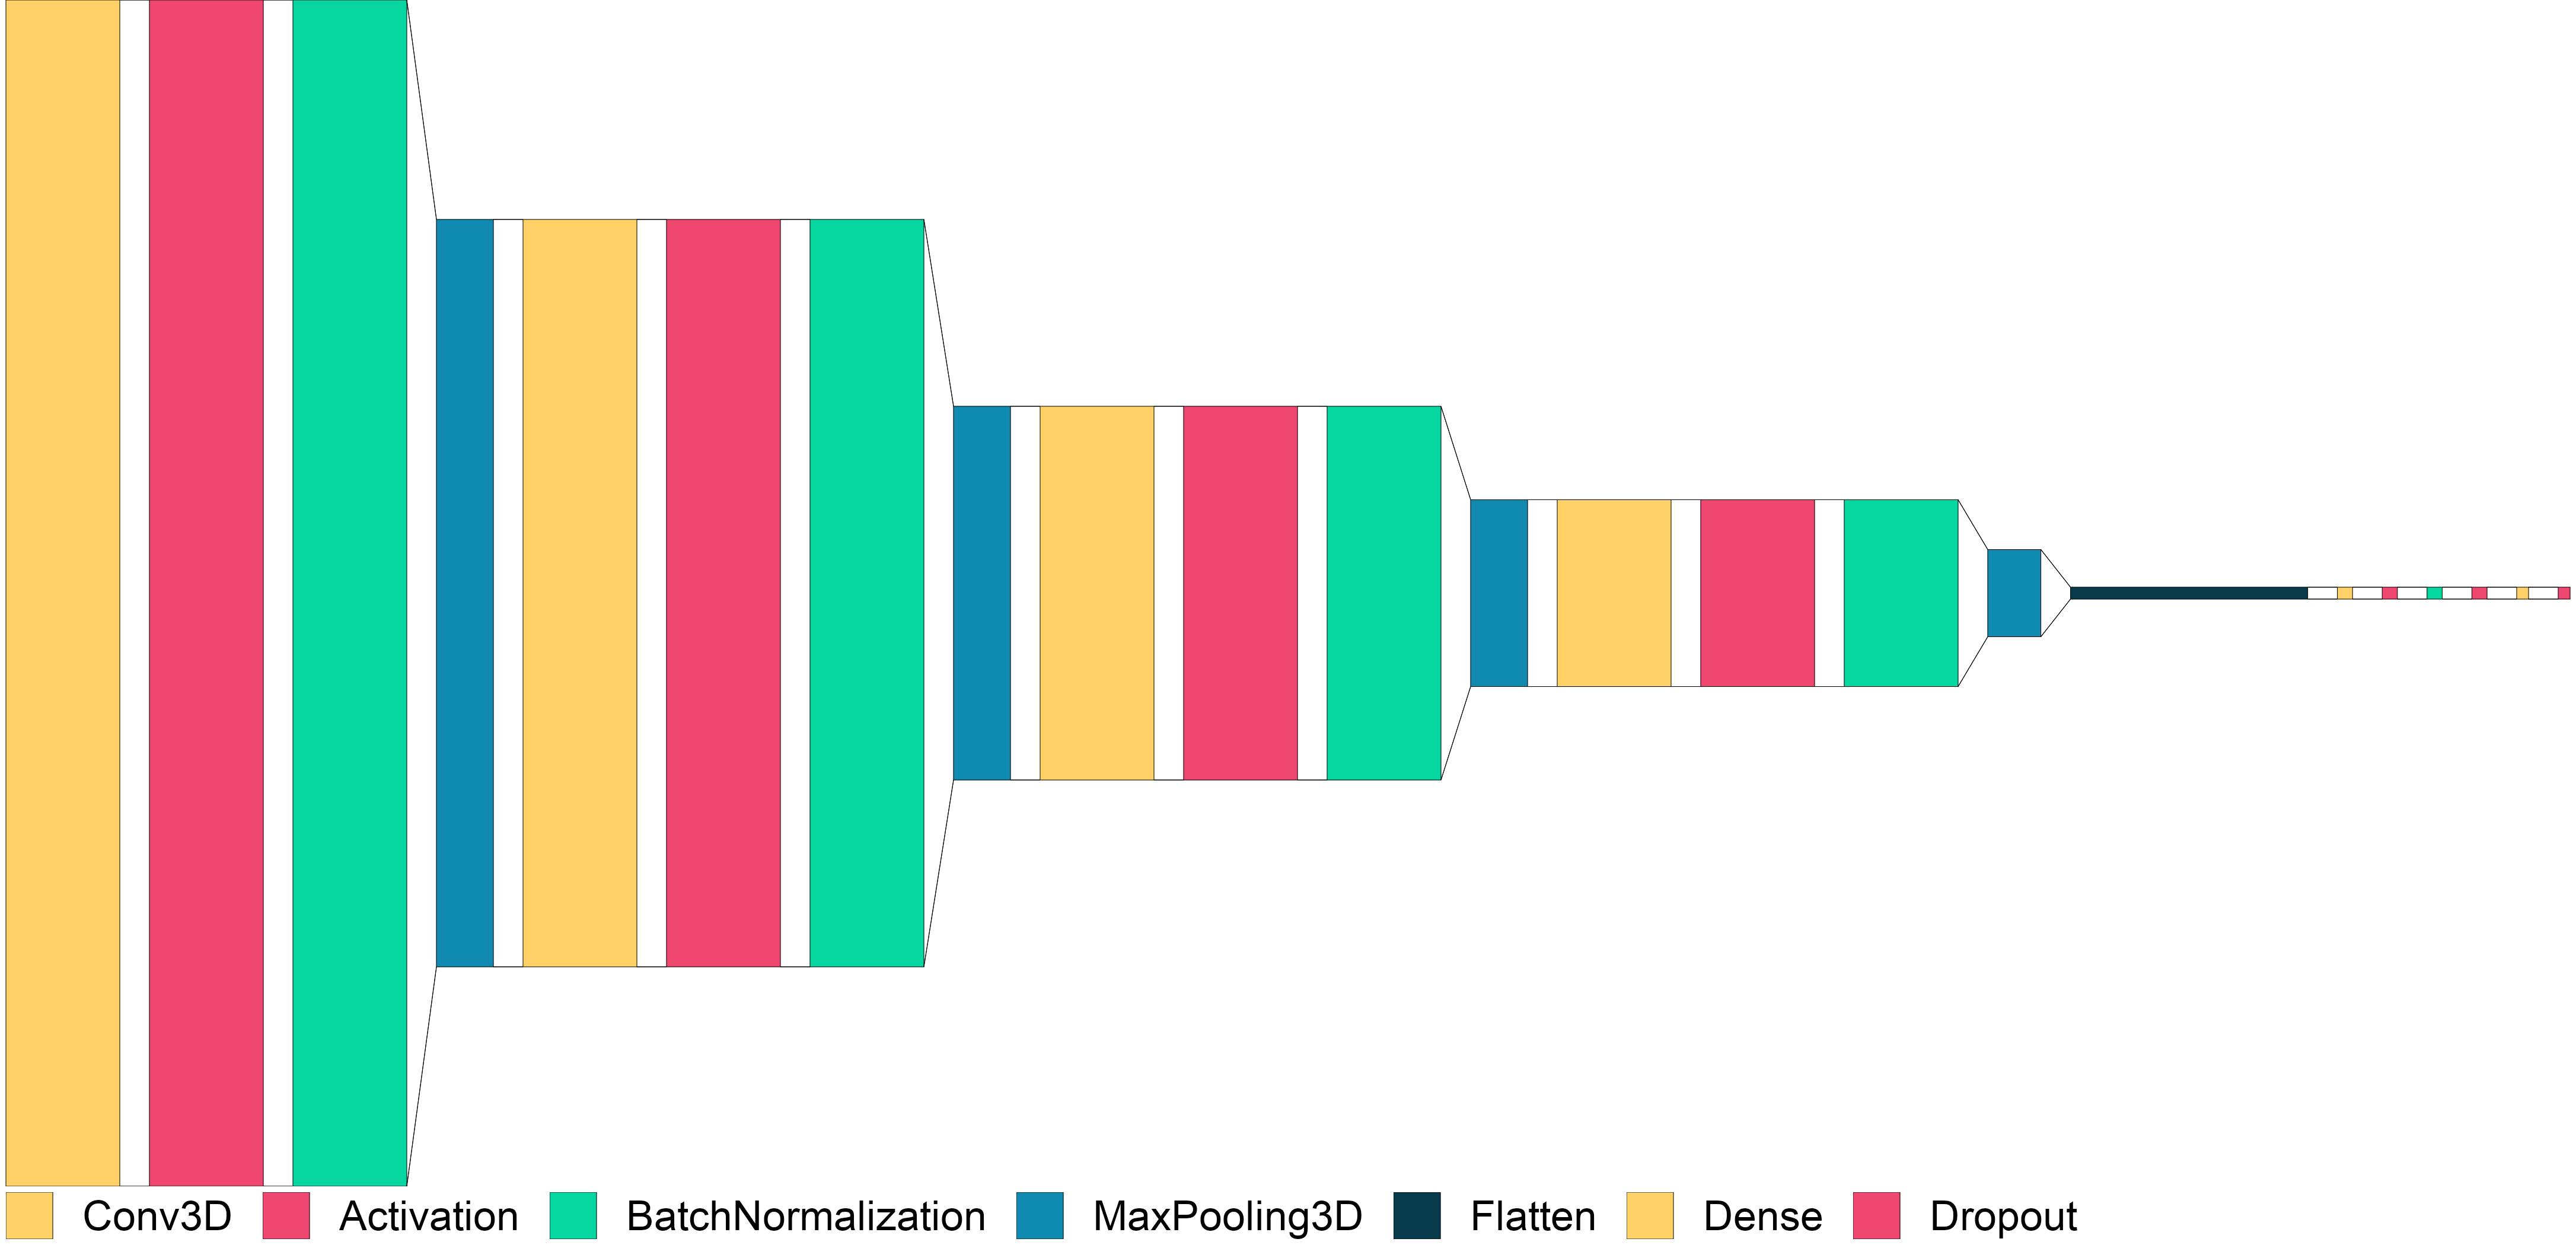

In [ ]:
visualkeras.layered_view(model_05, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [ ]:
history = model_05.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.1904 - categorical_accuracy: 0.5626
Epoch 00001: saving model to Model_05_2024-01-0615_48_01.067600/model-00001-1.19039-0.56259-3.64630-0.16000.h5
67/67 [==============================] - 134s 2s/step - loss: 1.1904 - categorical_accuracy: 0.5626 - val_loss: 3.6463 - val_categorical_accuracy: 0.1600 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 0.6400 - categorical_accuracy: 0.7722
Epoch 00002: saving model to Model_05_2024-01-0615_48_01.067600/model-00002-0.64000-0.77225-8.08050-0.23000.h5
67/67 [==============================] - 132s 2s/step - loss: 0.6400 - categorical_accuracy: 0.7722 - val_loss: 8.0805 - val_categorical_accuracy: 0.2300 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.5676 - categorical_accuracy: 0.7888
Epoch 00003: saving model to Model_05_2024-01-0615_48_01.067600/model-00003-0.56756-0.78884-3.52164-0.27000.h5
67/67 [========

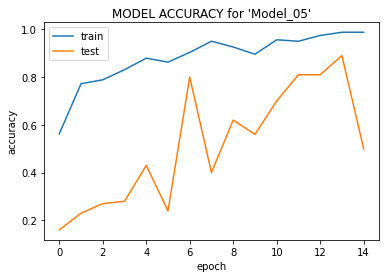

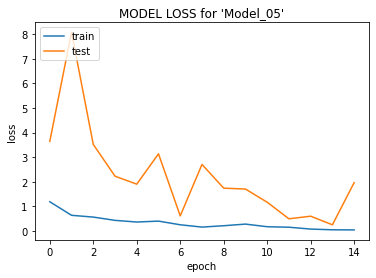

In [ ]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [ ]:
# Fetch statistics for populating model statistics workbook
total_params = model_05.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_05.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_05.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Model-1 with single dense layer with filter (256)", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [ ]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-6: Model-1 with single dense layer with filter (128) </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 1 | (128) | 0.0 | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002 |

In [ ]:
model_name = "Model_06"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_06 = build_conv3D_model(num_dense_layers=1, dense_layer_filters=(128,))

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate()

val_generator   = generate(is_validation=True)

print (model_06.summary())

Layer:True --- Dense:True
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_16 (Conv3D)          (None, 20, 120, 120, 16)  1312      
                                                                 
 activation_27 (Activation)  (None, 20, 120, 120, 16)  0         
                                                                 
 batch_normalization_23 (Bat  (None, 20, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_16 (MaxPoolin  (None, 10, 60, 60, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_17 (Conv3D)          (None, 10, 60, 60, 32)    13856     
                                                                 
 activation_28 (Activation) 

### Model-6 layer representation

In [ ]:
# plot_model(model_06, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-6 diagram in 3D

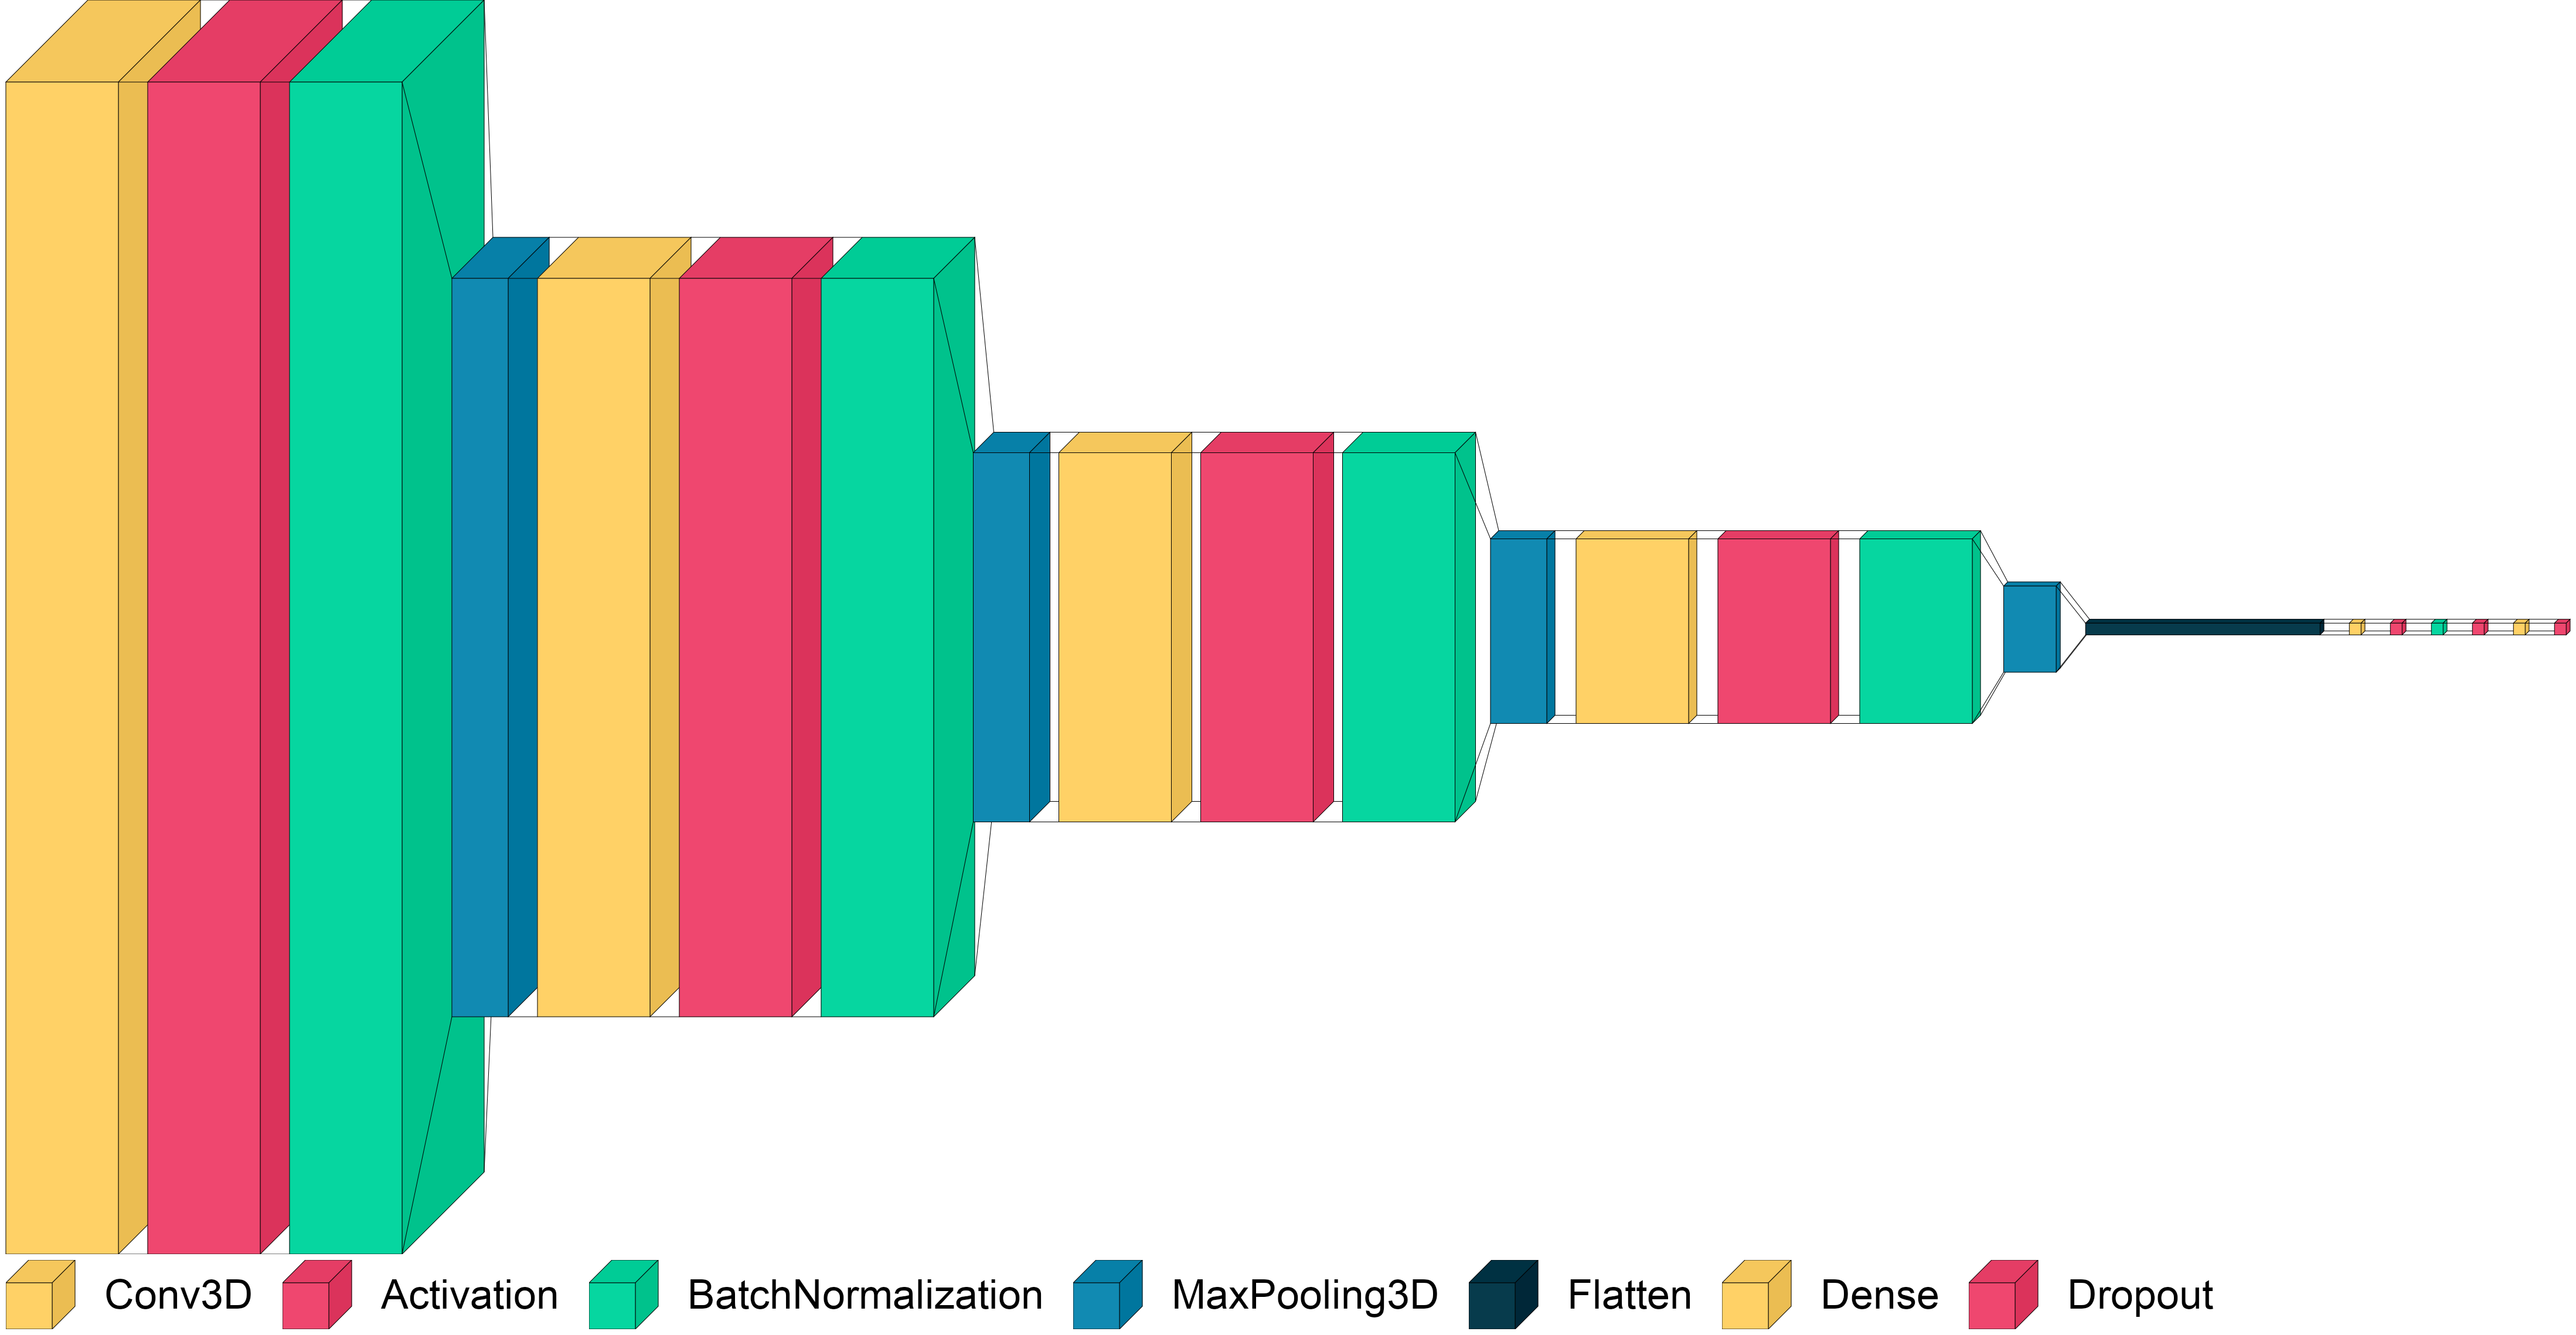

In [ ]:
visualkeras.layered_view(model_06, spacing=50, legend=True, font=font, scale_xy=21)

### Model-6 diagram in 2D

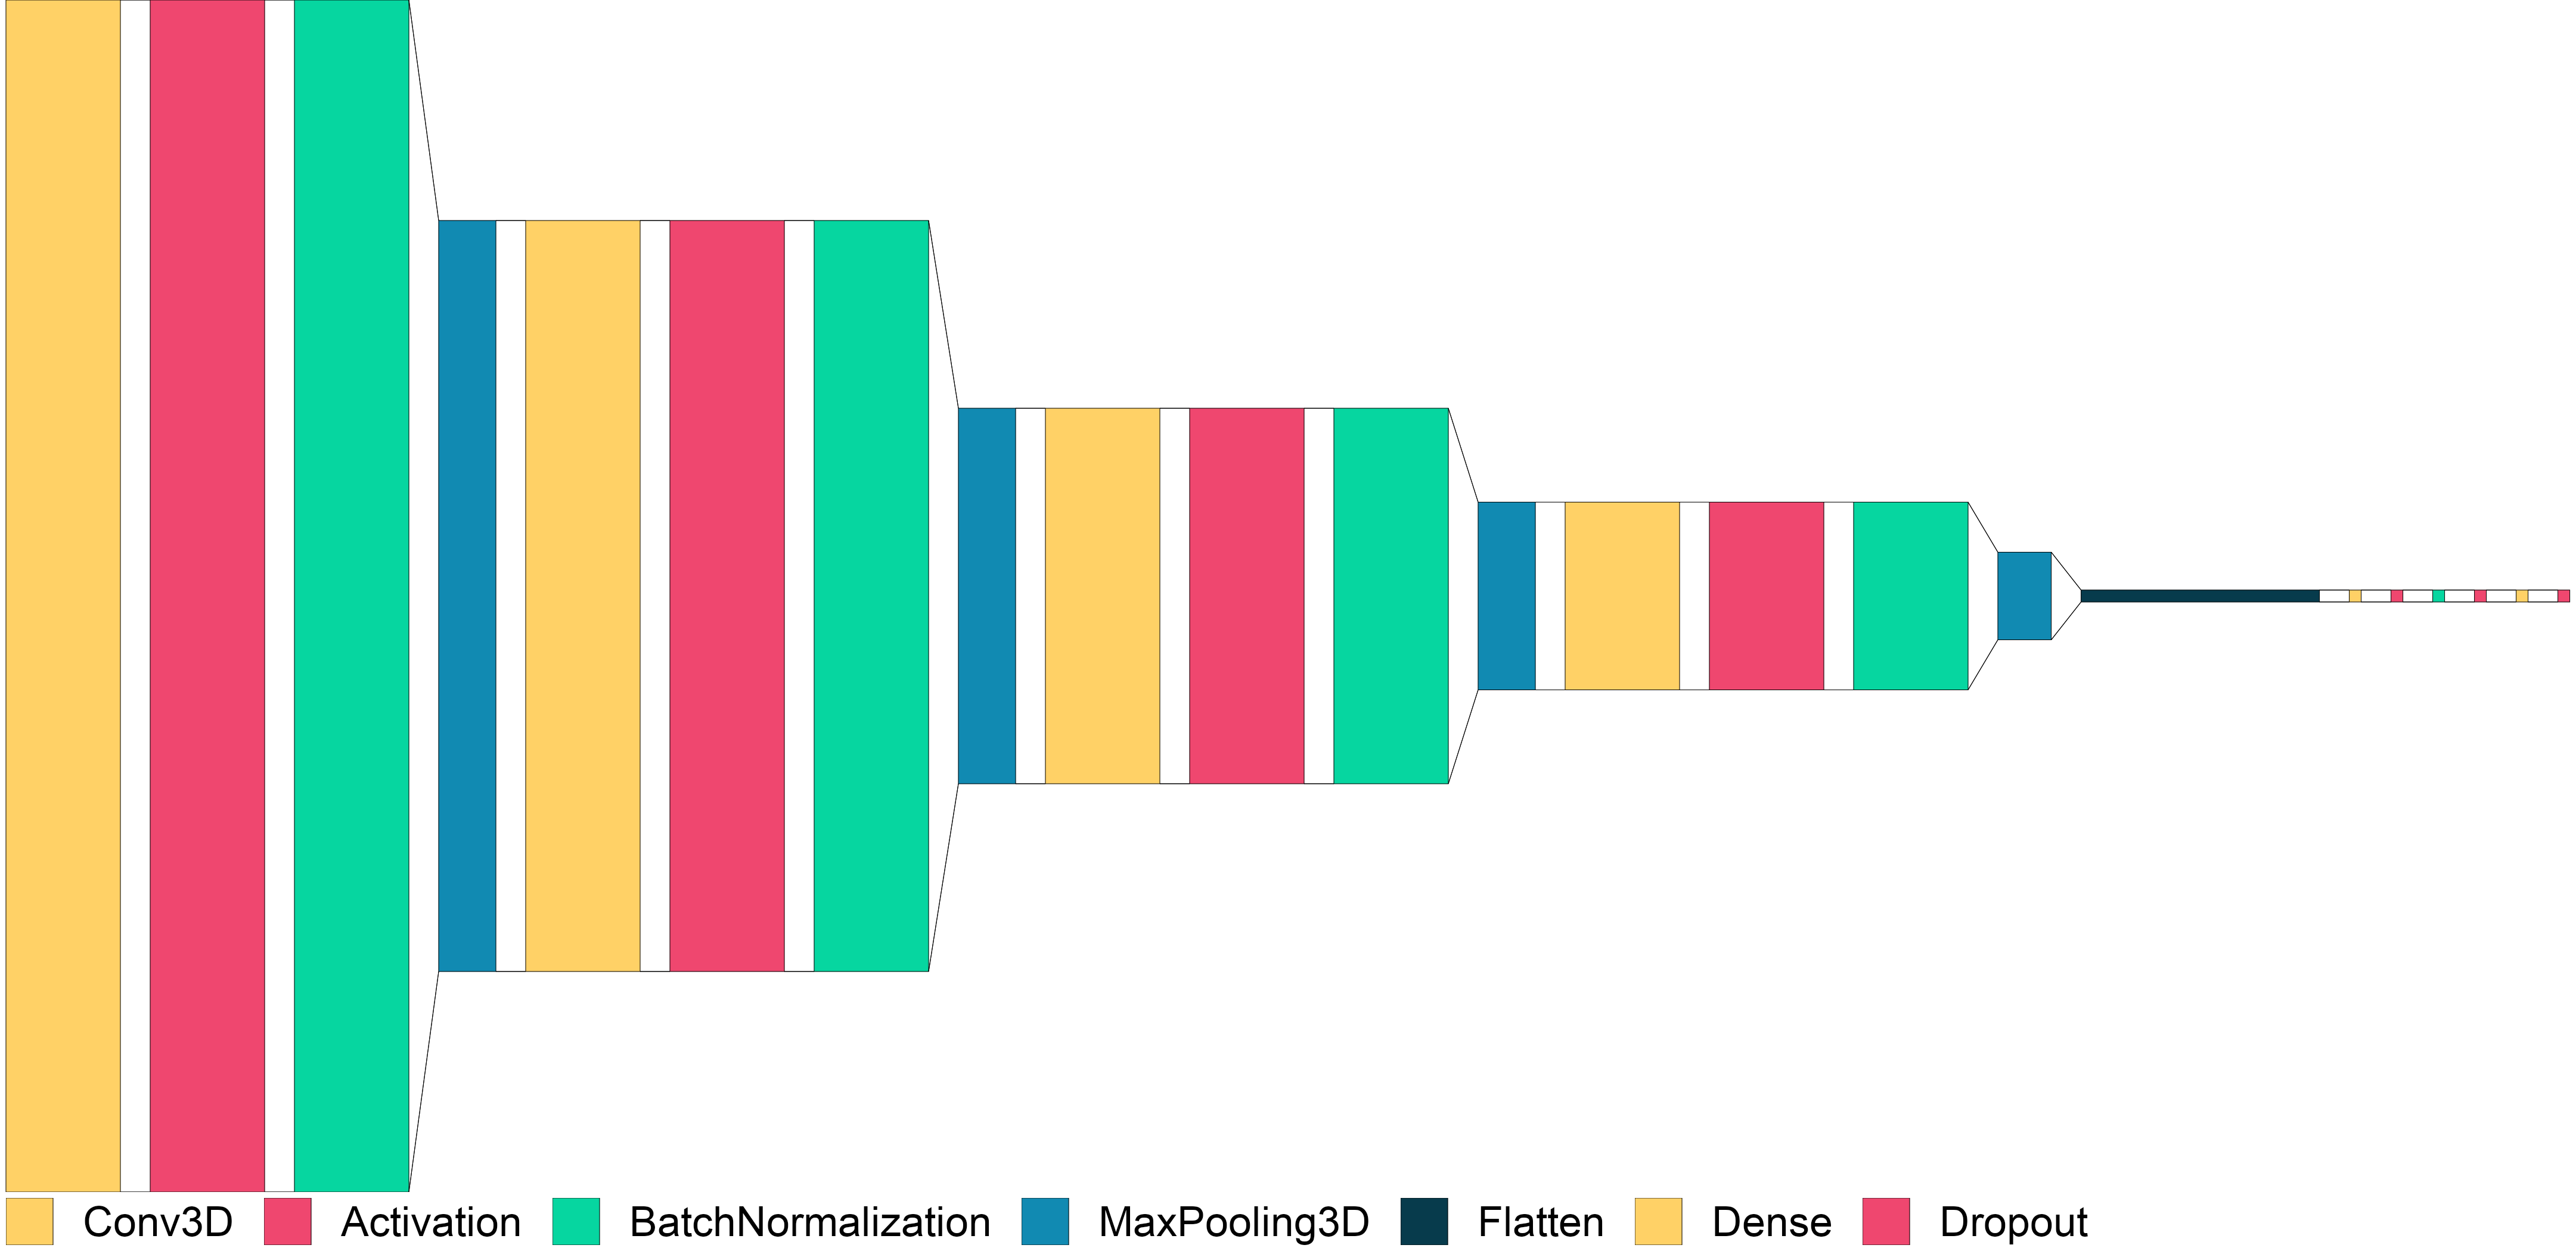

In [ ]:
visualkeras.layered_view(model_06, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [ ]:
history = model_06.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.3184 - categorical_accuracy: 0.4811
Epoch 00001: saving model to Model_06_2024-01-0615_48_01.067600/model-00001-1.31845-0.48115-1.98943-0.25000.h5
67/67 [==============================] - 133s 2s/step - loss: 1.3184 - categorical_accuracy: 0.4811 - val_loss: 1.9894 - val_categorical_accuracy: 0.2500 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 0.8889 - categorical_accuracy: 0.6712
Epoch 00002: saving model to Model_06_2024-01-0615_48_01.067600/model-00002-0.88890-0.67119-4.15211-0.23000.h5
67/67 [==============================] - 132s 2s/step - loss: 0.8889 - categorical_accuracy: 0.6712 - val_loss: 4.1521 - val_categorical_accuracy: 0.2300 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.7094 - categorical_accuracy: 0.7330
Epoch 00003: saving model to Model_06_2024-01-0615_48_01.067600/model-00003-0.70939-0.73303-3.15682-0.30000.h5
67/67 [========

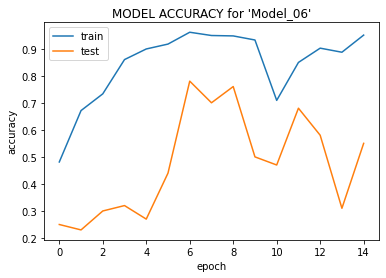

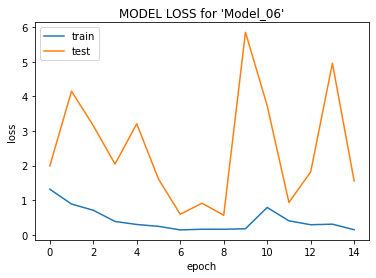

In [ ]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [ ]:
# Fetch statistics for populating model statistics workbook
total_params = model_06.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_06.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_06.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Model-1 with single dense layer with filter (128)", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [ ]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-7: Model-1 with image height and width adjusted to 160 </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 20 | 160 | 160 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002

In [ ]:
model_name = "Model_07"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_07 = build_conv3D_model(image_height=160, image_width=160)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(image_height=160, image_width=160)

val_generator   = generate(image_height=160, image_width=160, is_validation=True)

print (model_07.summary())

Layer:True --- Dense:True
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_20 (Conv3D)          (None, 20, 160, 160, 16)  1312      
                                                                 
 activation_33 (Activation)  (None, 20, 160, 160, 16)  0         
                                                                 
 batch_normalization_28 (Bat  (None, 20, 160, 160, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_20 (MaxPoolin  (None, 10, 80, 80, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_21 (Conv3D)          (None, 10, 80, 80, 32)    13856     
                                                                 
 activation_34 (Activation) 

### Model-7 layer representation

In [ ]:
# plot_model(model_07, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-7 diagram in 3D

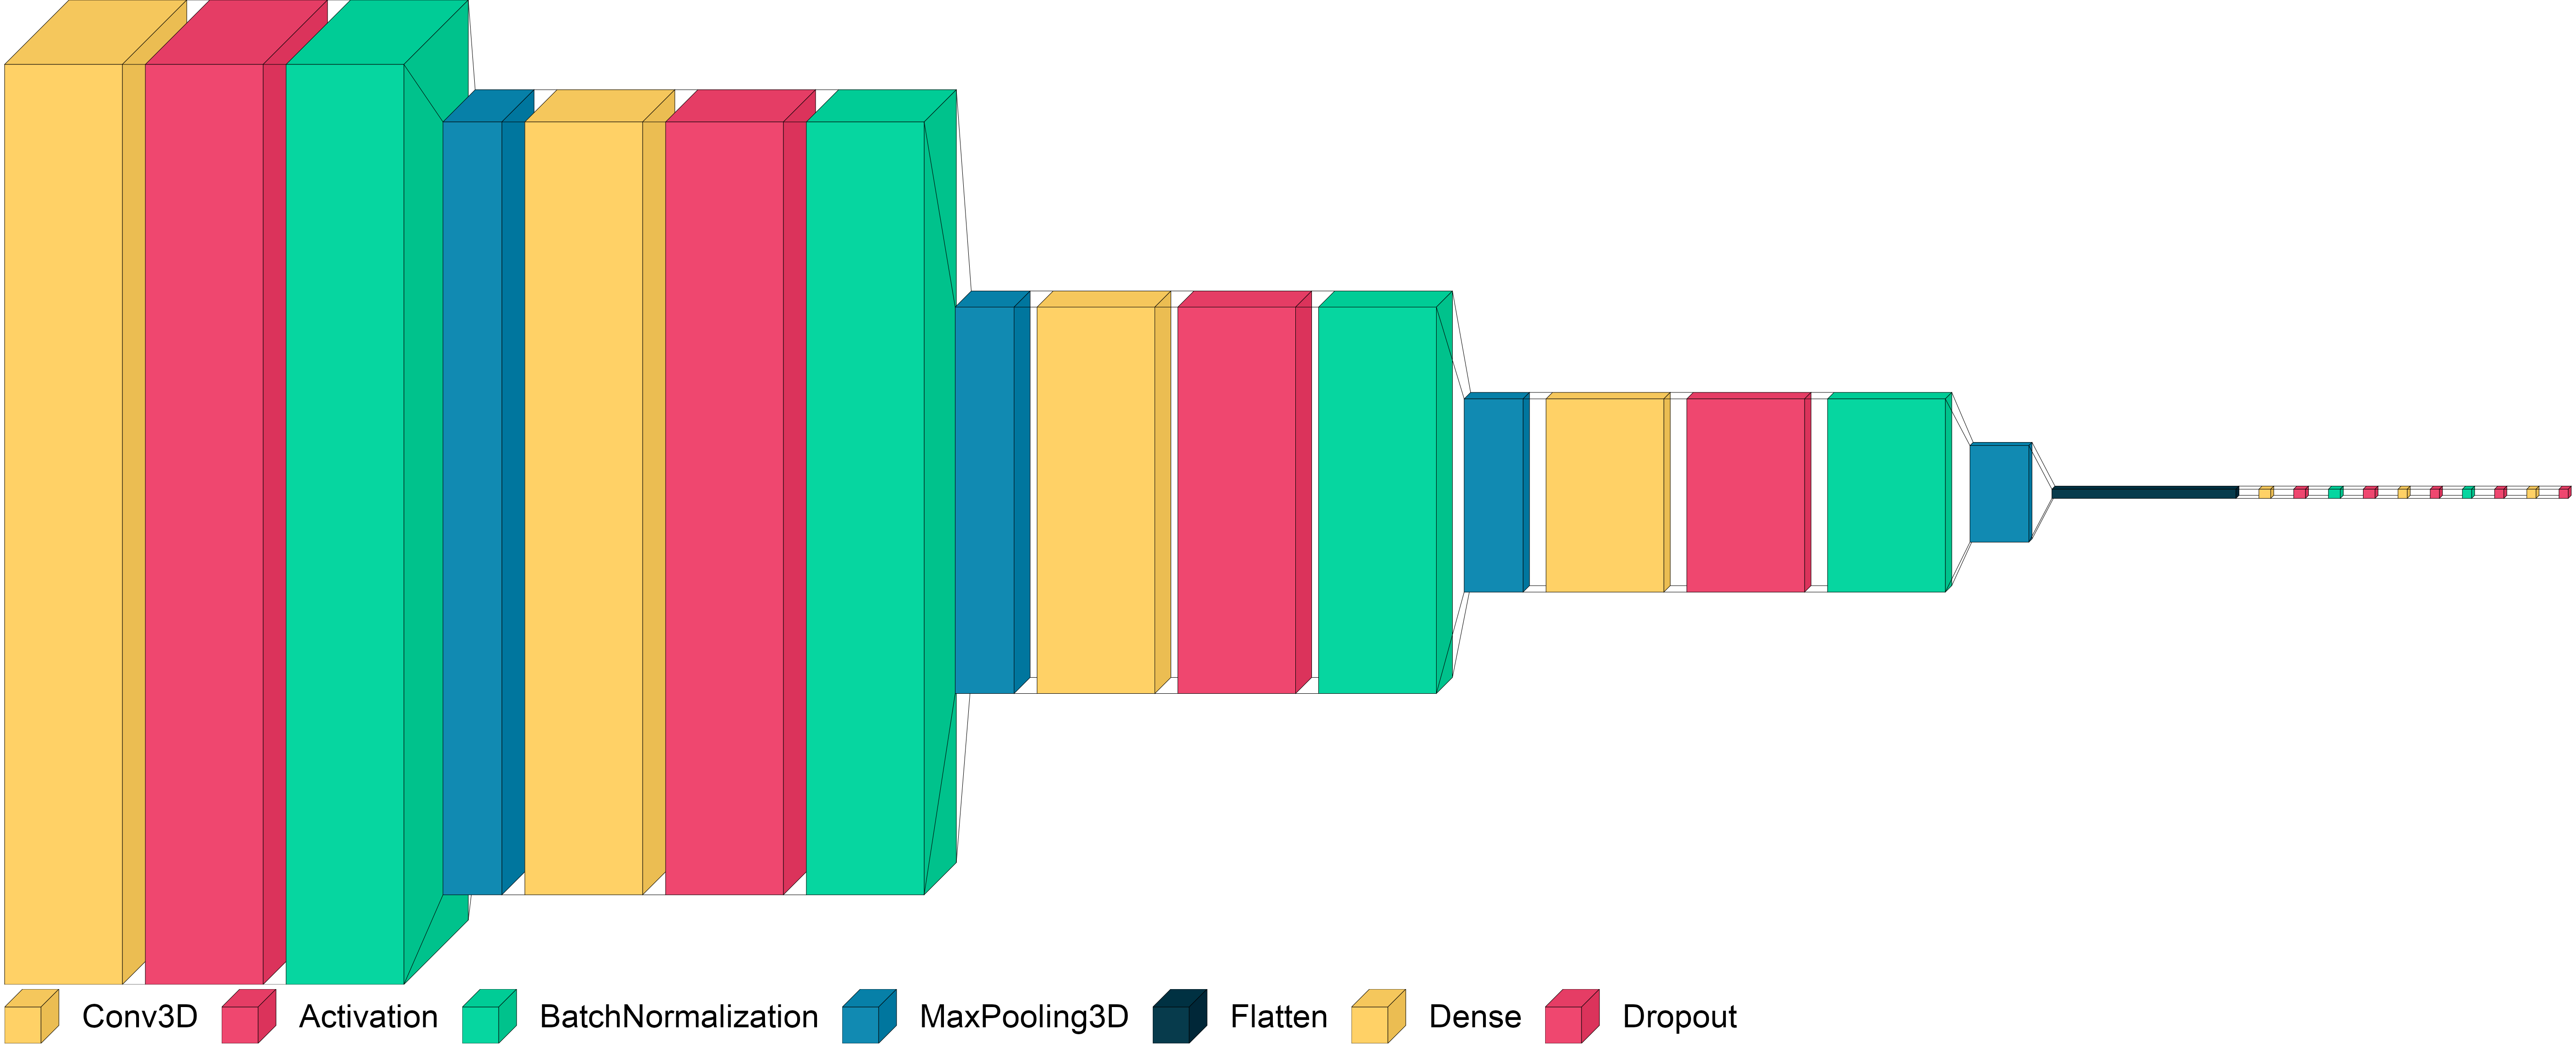

In [ ]:
visualkeras.layered_view(model_07, spacing=50, legend=True, font=font, scale_xy=21)

### Model-7 diagram in 2D

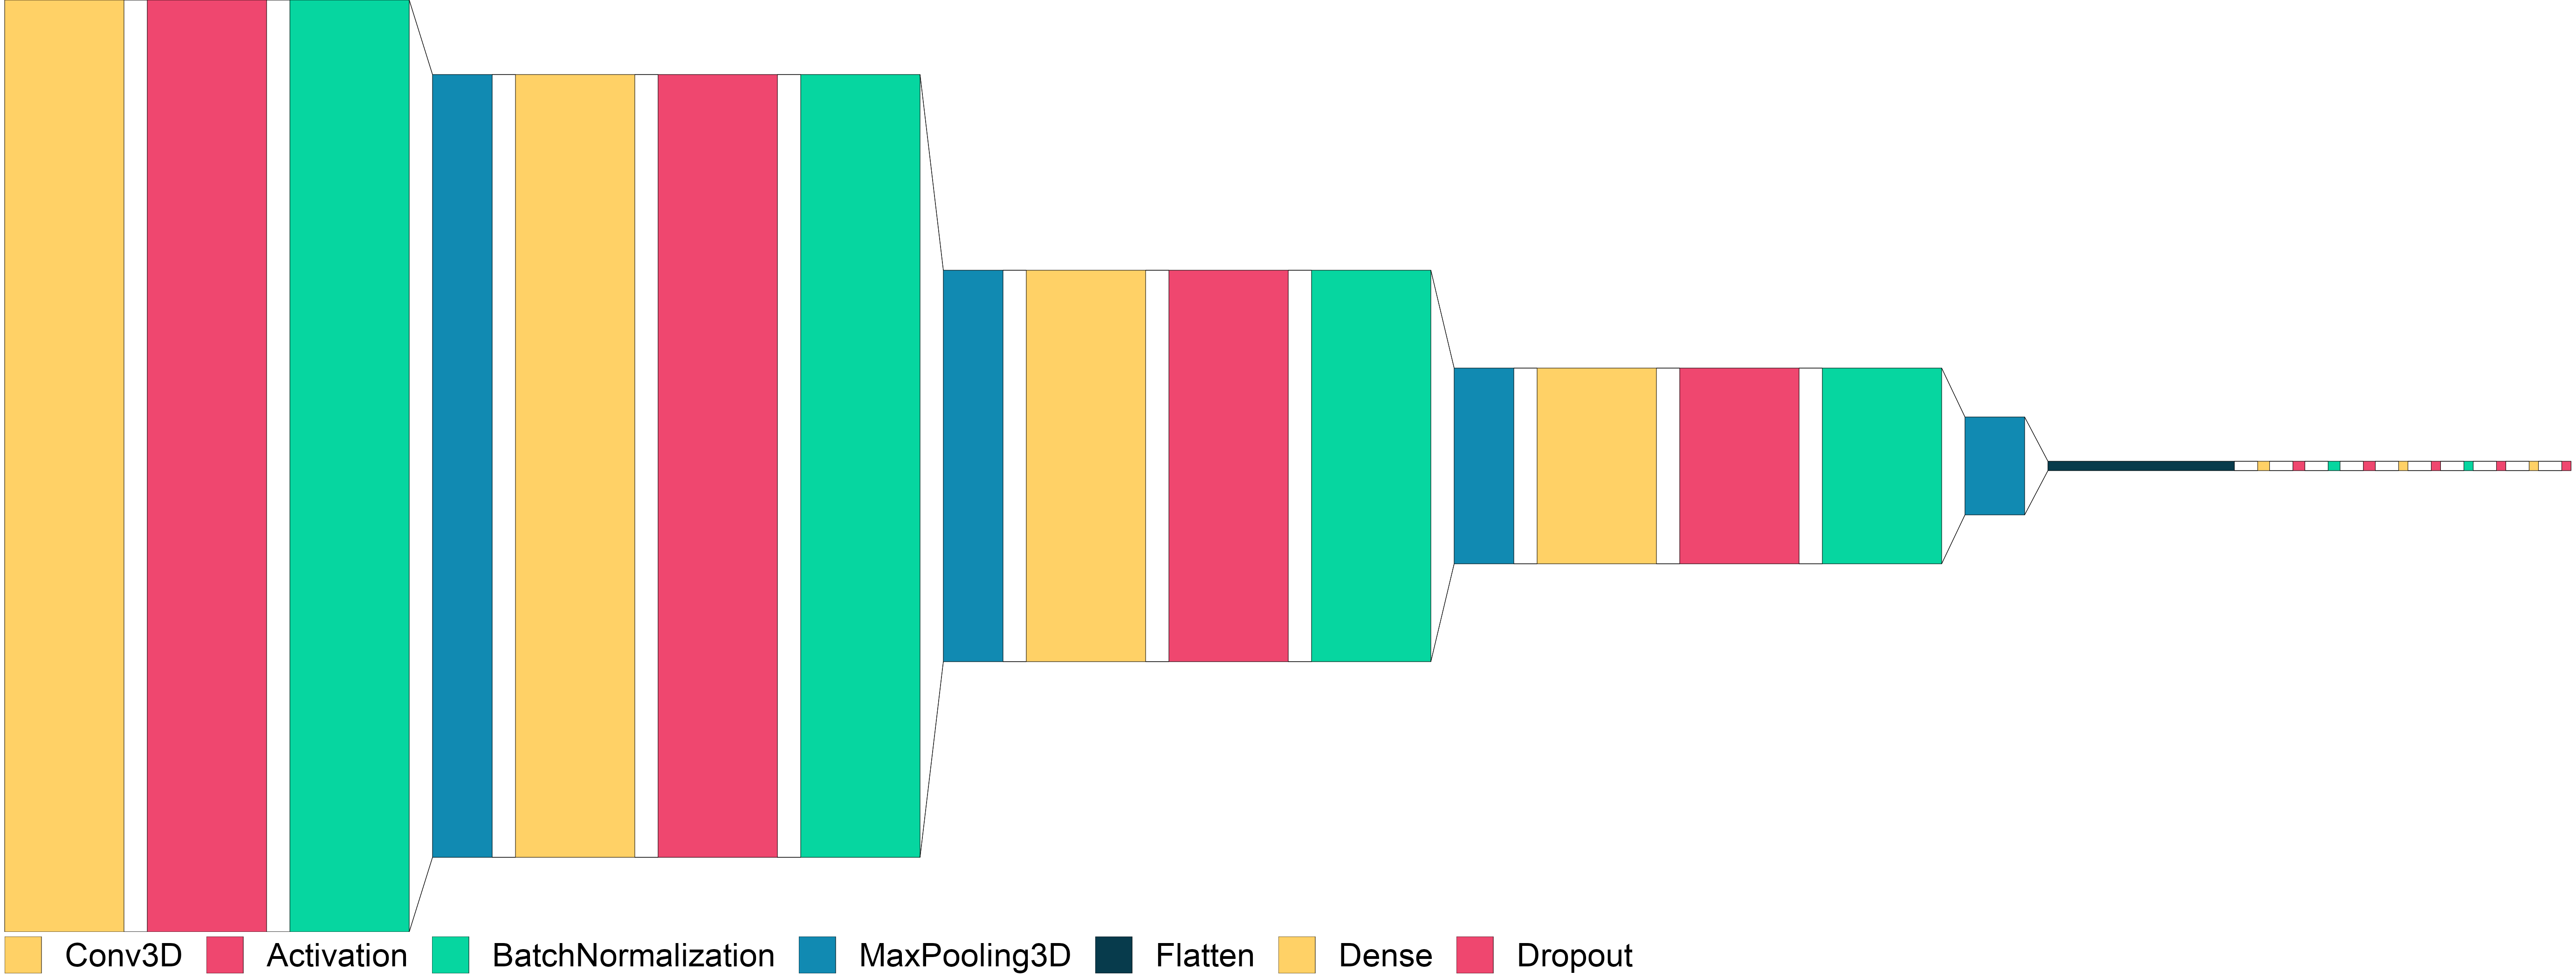

In [ ]:
visualkeras.layered_view(model_07, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [ ]:
history = model_07.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.4011 - categorical_accuracy: 0.4600
Epoch 00001: saving model to Model_07_2024-01-0615_48_01.067600/model-00001-1.40115-0.46003-1.93457-0.30000.h5
67/67 [==============================] - 149s 2s/step - loss: 1.4011 - categorical_accuracy: 0.4600 - val_loss: 1.9346 - val_categorical_accuracy: 0.3000 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 0.8079 - categorical_accuracy: 0.6938
Epoch 00002: saving model to Model_07_2024-01-0615_48_01.067600/model-00002-0.80792-0.69382-11.48356-0.17000.h5
67/67 [==============================] - 144s 2s/step - loss: 0.8079 - categorical_accuracy: 0.6938 - val_loss: 11.4836 - val_categorical_accuracy: 0.1700 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.5991 - categorical_accuracy: 0.7798
Epoch 00003: saving model to Model_07_2024-01-0615_48_01.067600/model-00003-0.59914-0.77979-5.25265-0.23000.h5
67/67 [======

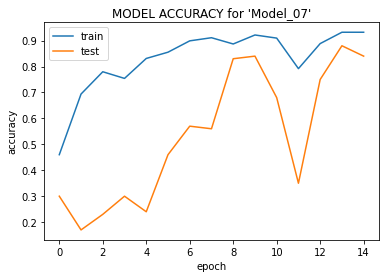

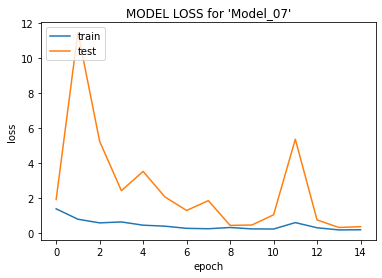

In [ ]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [ ]:
# Fetch statistics for populating model statistics workbook
total_params = model_07.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_07.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_07.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Model-1 with image height and width adjusted to 160", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             160, 160, 15, 32, "Adam", False, 0.002)

In [ ]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-8: Model-7 with number of frames increased to 30 </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 30 | 160 | 160 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy |

In [79]:
model_name = "Model_08"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_08 = build_conv3D_model(image_height=160, image_width=160, num_images_per_video=default_frames_count)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(num_images_per_video=default_frames_count, image_height=160, image_width=160)

val_generator   = generate(num_images_per_video=default_frames_count, image_height=160, image_width=160, is_validation=True)

print (model_08.summary())

Layer:True --- Dense:True
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_24 (Conv3D)          (None, 30, 160, 160, 16)  1312      
                                                                 
 activation_40 (Activation)  (None, 30, 160, 160, 16)  0         
                                                                 
 batch_normalization_34 (Bat  (None, 30, 160, 160, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_24 (MaxPoolin  (None, 15, 80, 80, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_25 (Conv3D)          (None, 15, 80, 80, 32)    13856     
                                                                 
 activation_41 (Activation) 

### Model-8 layer representation

In [80]:
#plot_model(model_08, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-8 diagram in 3D

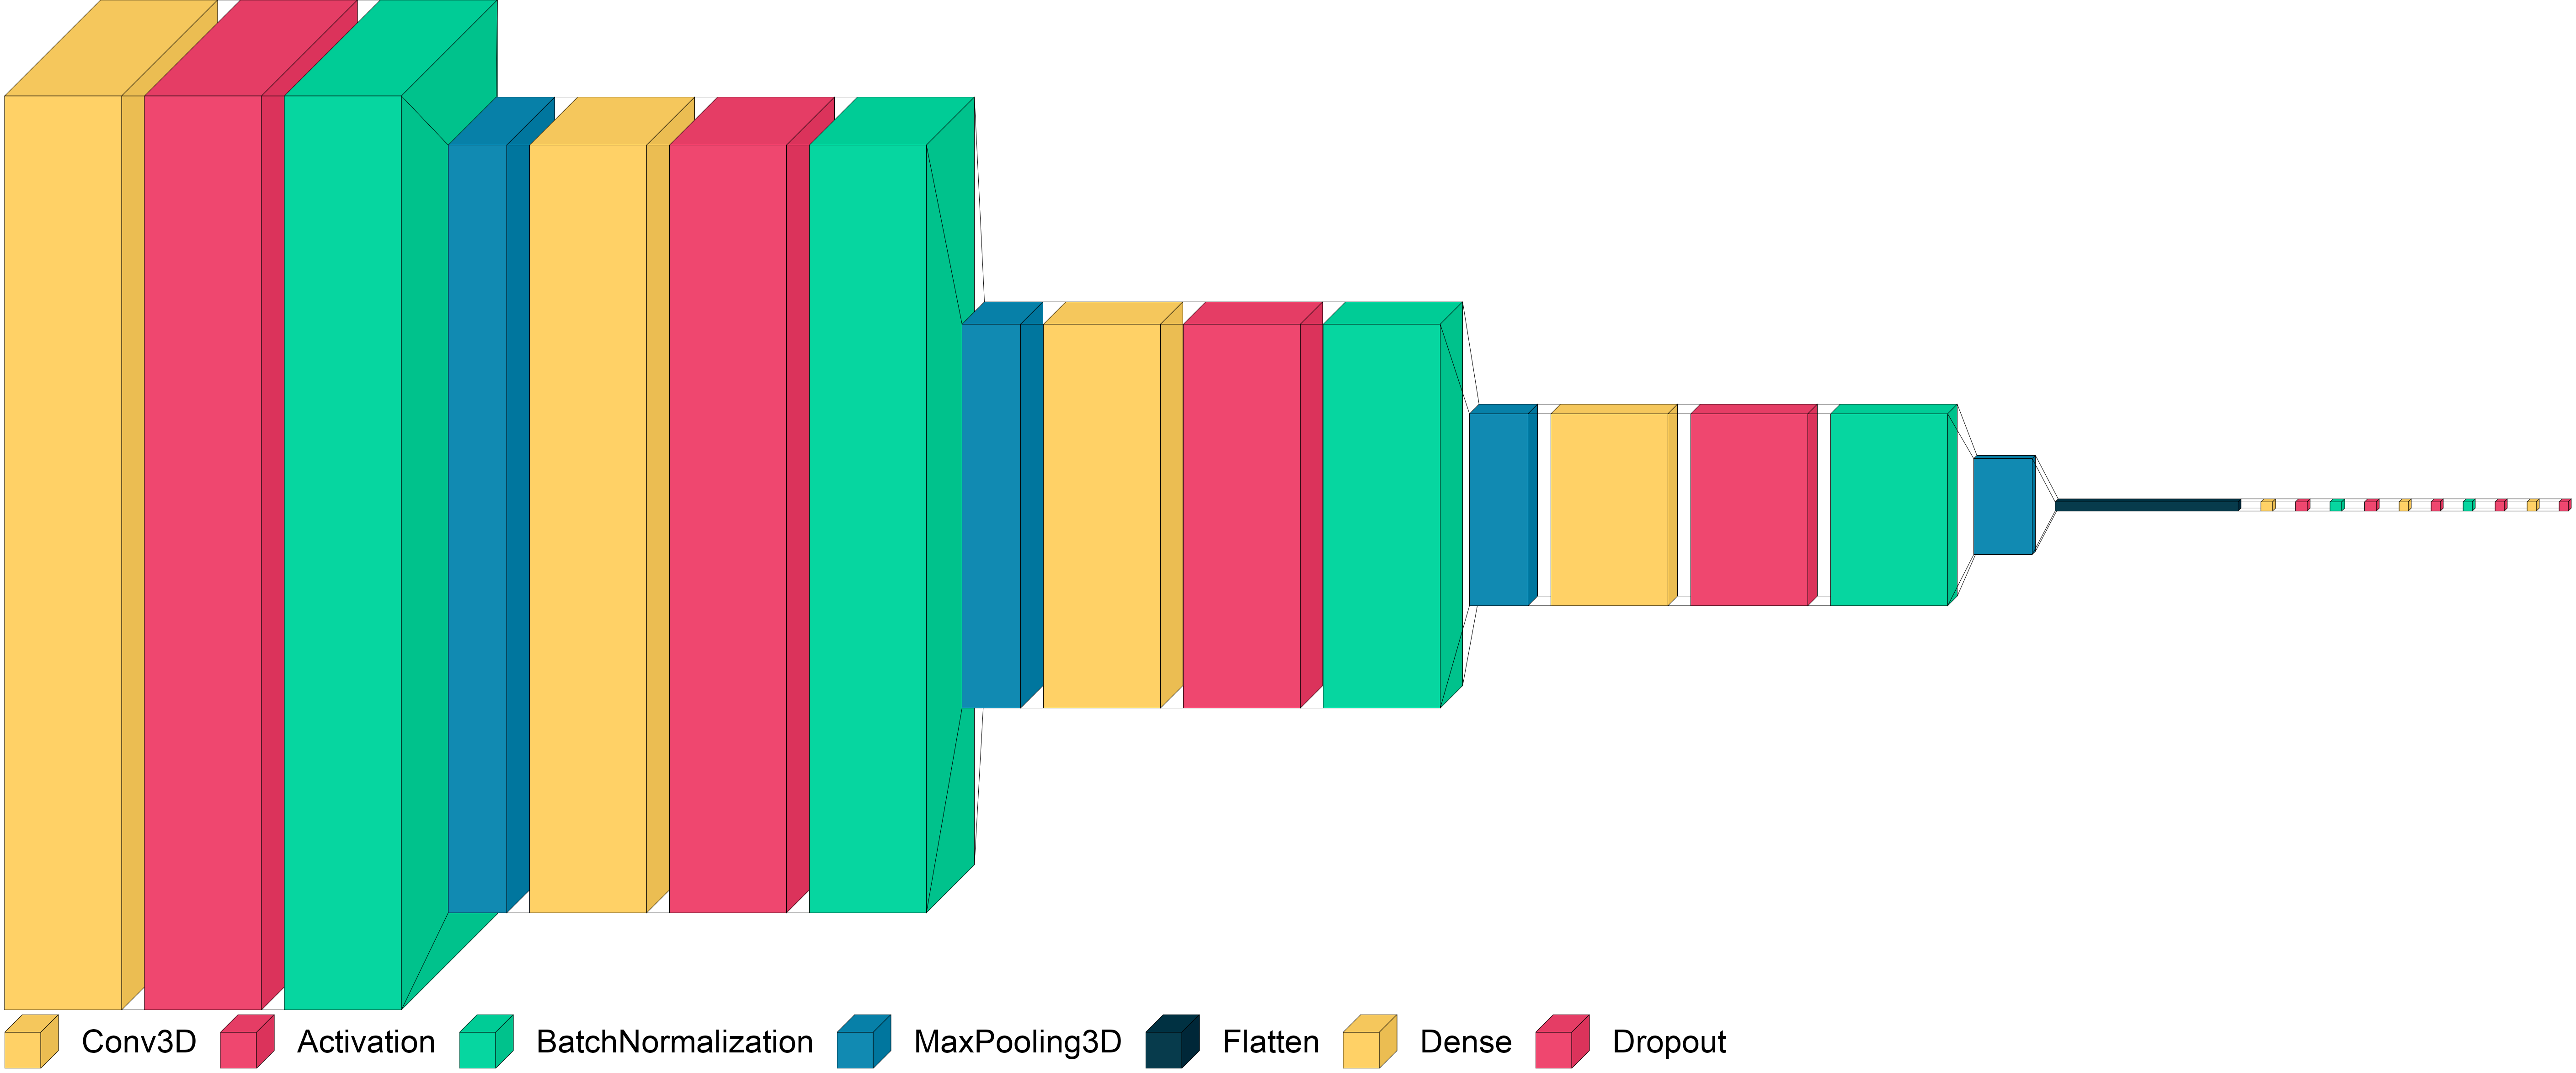

In [81]:
visualkeras.layered_view(model_08, spacing=50, legend=True, font=font, scale_xy=21)

### Model-8 diagram in 2D

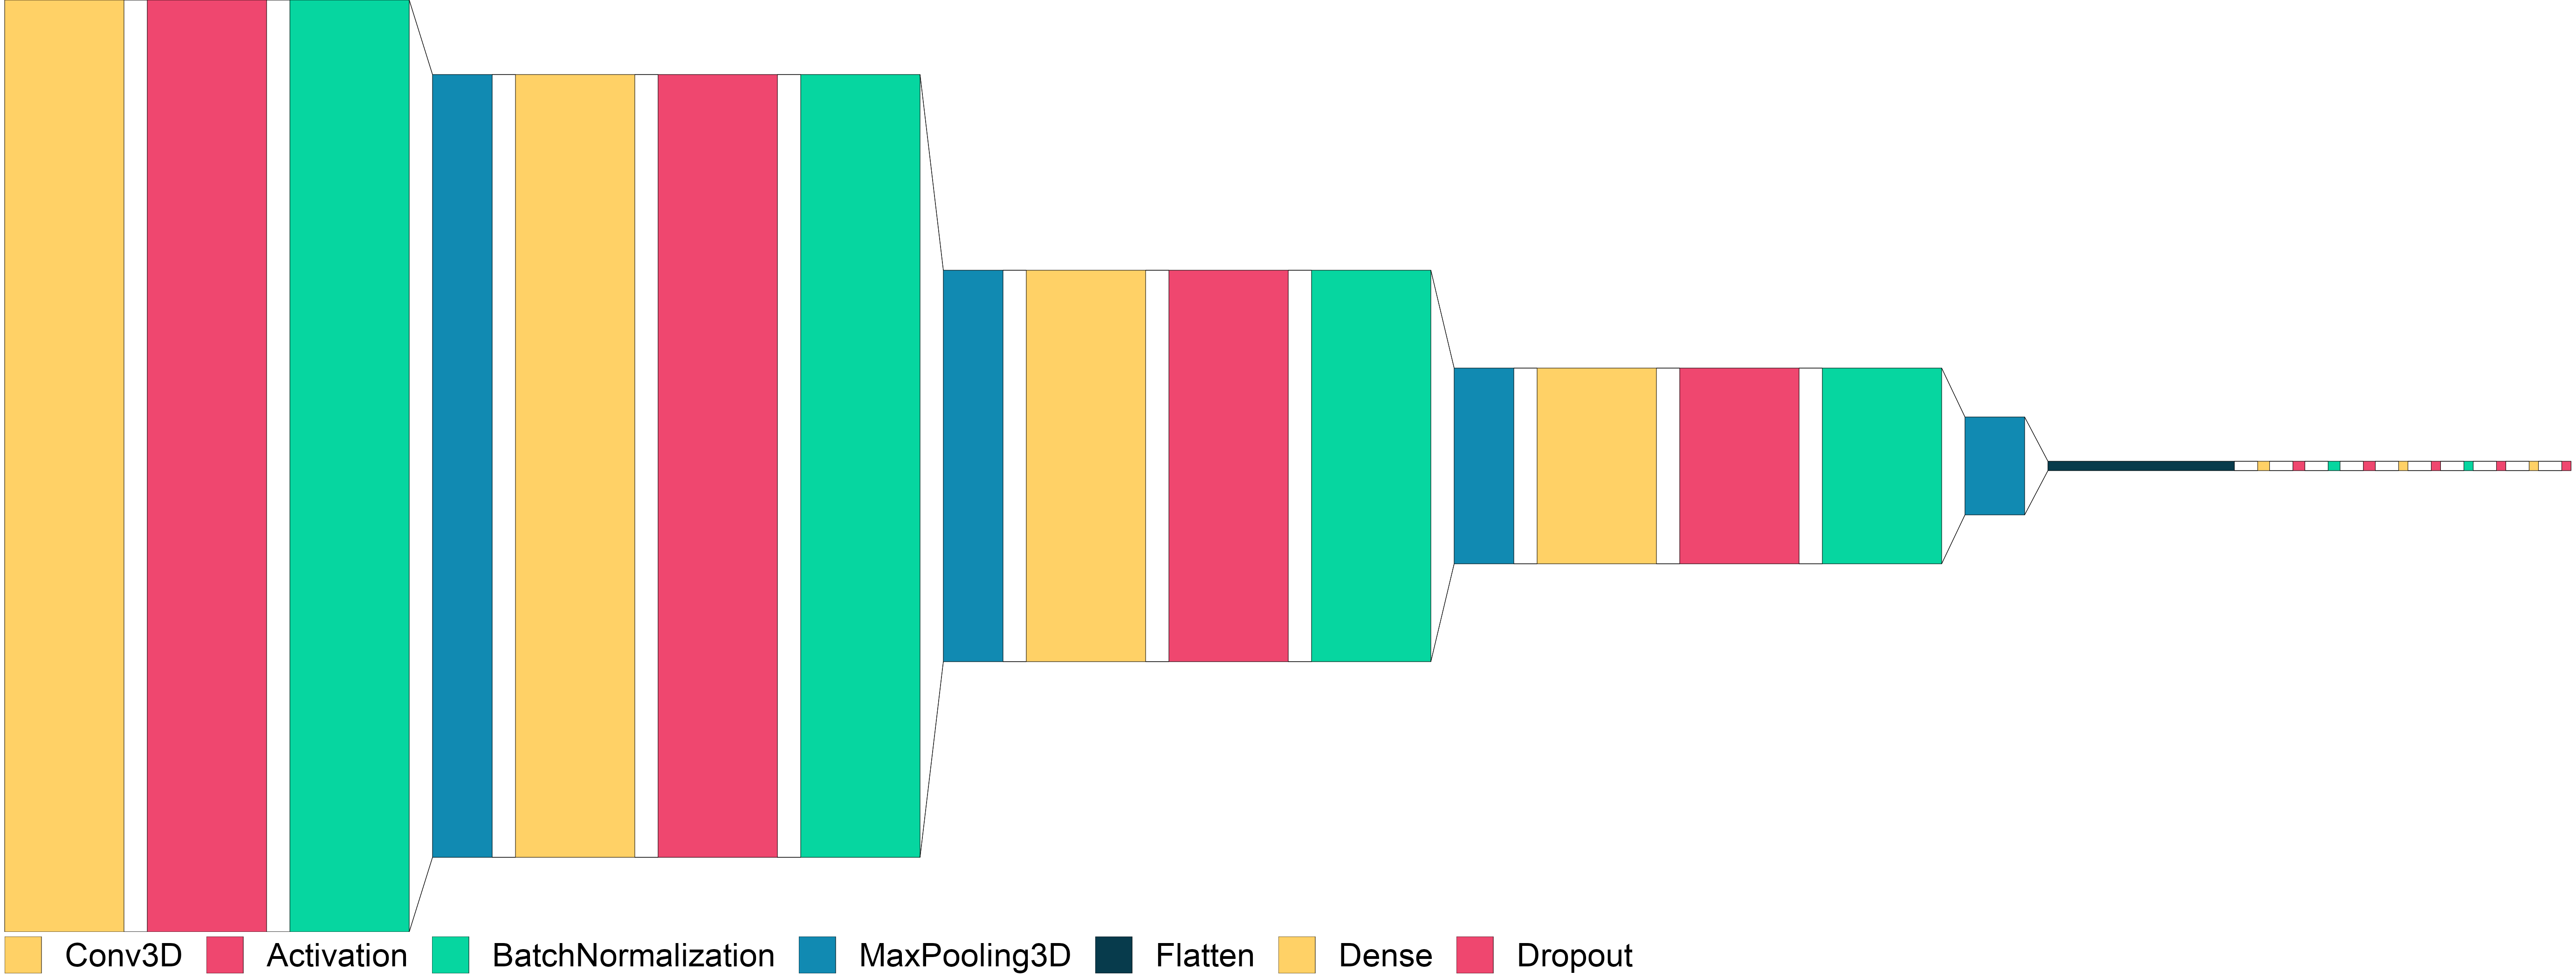

In [82]:
visualkeras.layered_view(model_08, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [83]:
history = model_08.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.4820 - categorical_accuracy: 0.4434
Epoch 00001: saving model to Model_08_2024-01-0615_48_01.067600/model-00001-1.48204-0.44344-4.80716-0.20000.h5
67/67 [==============================] - 218s 3s/step - loss: 1.4820 - categorical_accuracy: 0.4434 - val_loss: 4.8072 - val_categorical_accuracy: 0.2000 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.0087 - categorical_accuracy: 0.6214
Epoch 00002: saving model to Model_08_2024-01-0615_48_01.067600/model-00002-1.00875-0.62142-2.43447-0.25000.h5
67/67 [==============================] - 220s 3s/step - loss: 1.0087 - categorical_accuracy: 0.6214 - val_loss: 2.4345 - val_categorical_accuracy: 0.2500 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.7320 - categorical_accuracy: 0.7300
Epoch 00003: saving model to Model_08_2024-01-0615_48_01.067600/model-00003-0.73195-0.73002-4.08165-0.27000.h5
67/67 [========

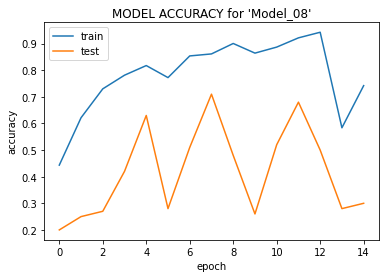

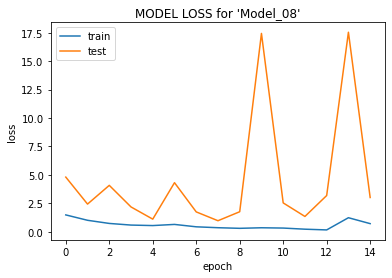

In [84]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [85]:
# Fetch statistics for populating model statistics workbook
total_params = model_08.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_08.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_08.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [86]:
write_model_details_worksheet(model_name, "Model-7 with number of frames increased to 30", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 30,
                             160, 160, 15, 32, "Adam", False, 0.002)

In [87]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-9: Model-1 with dropout set to 0.25 </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.25 | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy |

In [88]:
model_name = "Model_09"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_09 = build_conv3D_model(dropout_val=0.25)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate()

val_generator   = generate(is_validation=True)

print (model_09.summary())

Layer:True --- Dense:True
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_28 (Conv3D)          (None, 20, 120, 120, 16)  1312      
                                                                 
 activation_47 (Activation)  (None, 20, 120, 120, 16)  0         
                                                                 
 batch_normalization_40 (Bat  (None, 20, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_28 (MaxPoolin  (None, 10, 60, 60, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_29 (Conv3D)          (None, 10, 60, 60, 32)    13856     
                                                                 
 activation_48 (Activation) 

### Model-9 layer representation

In [89]:
#plot_model(model_09, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-9 diagram in 3D

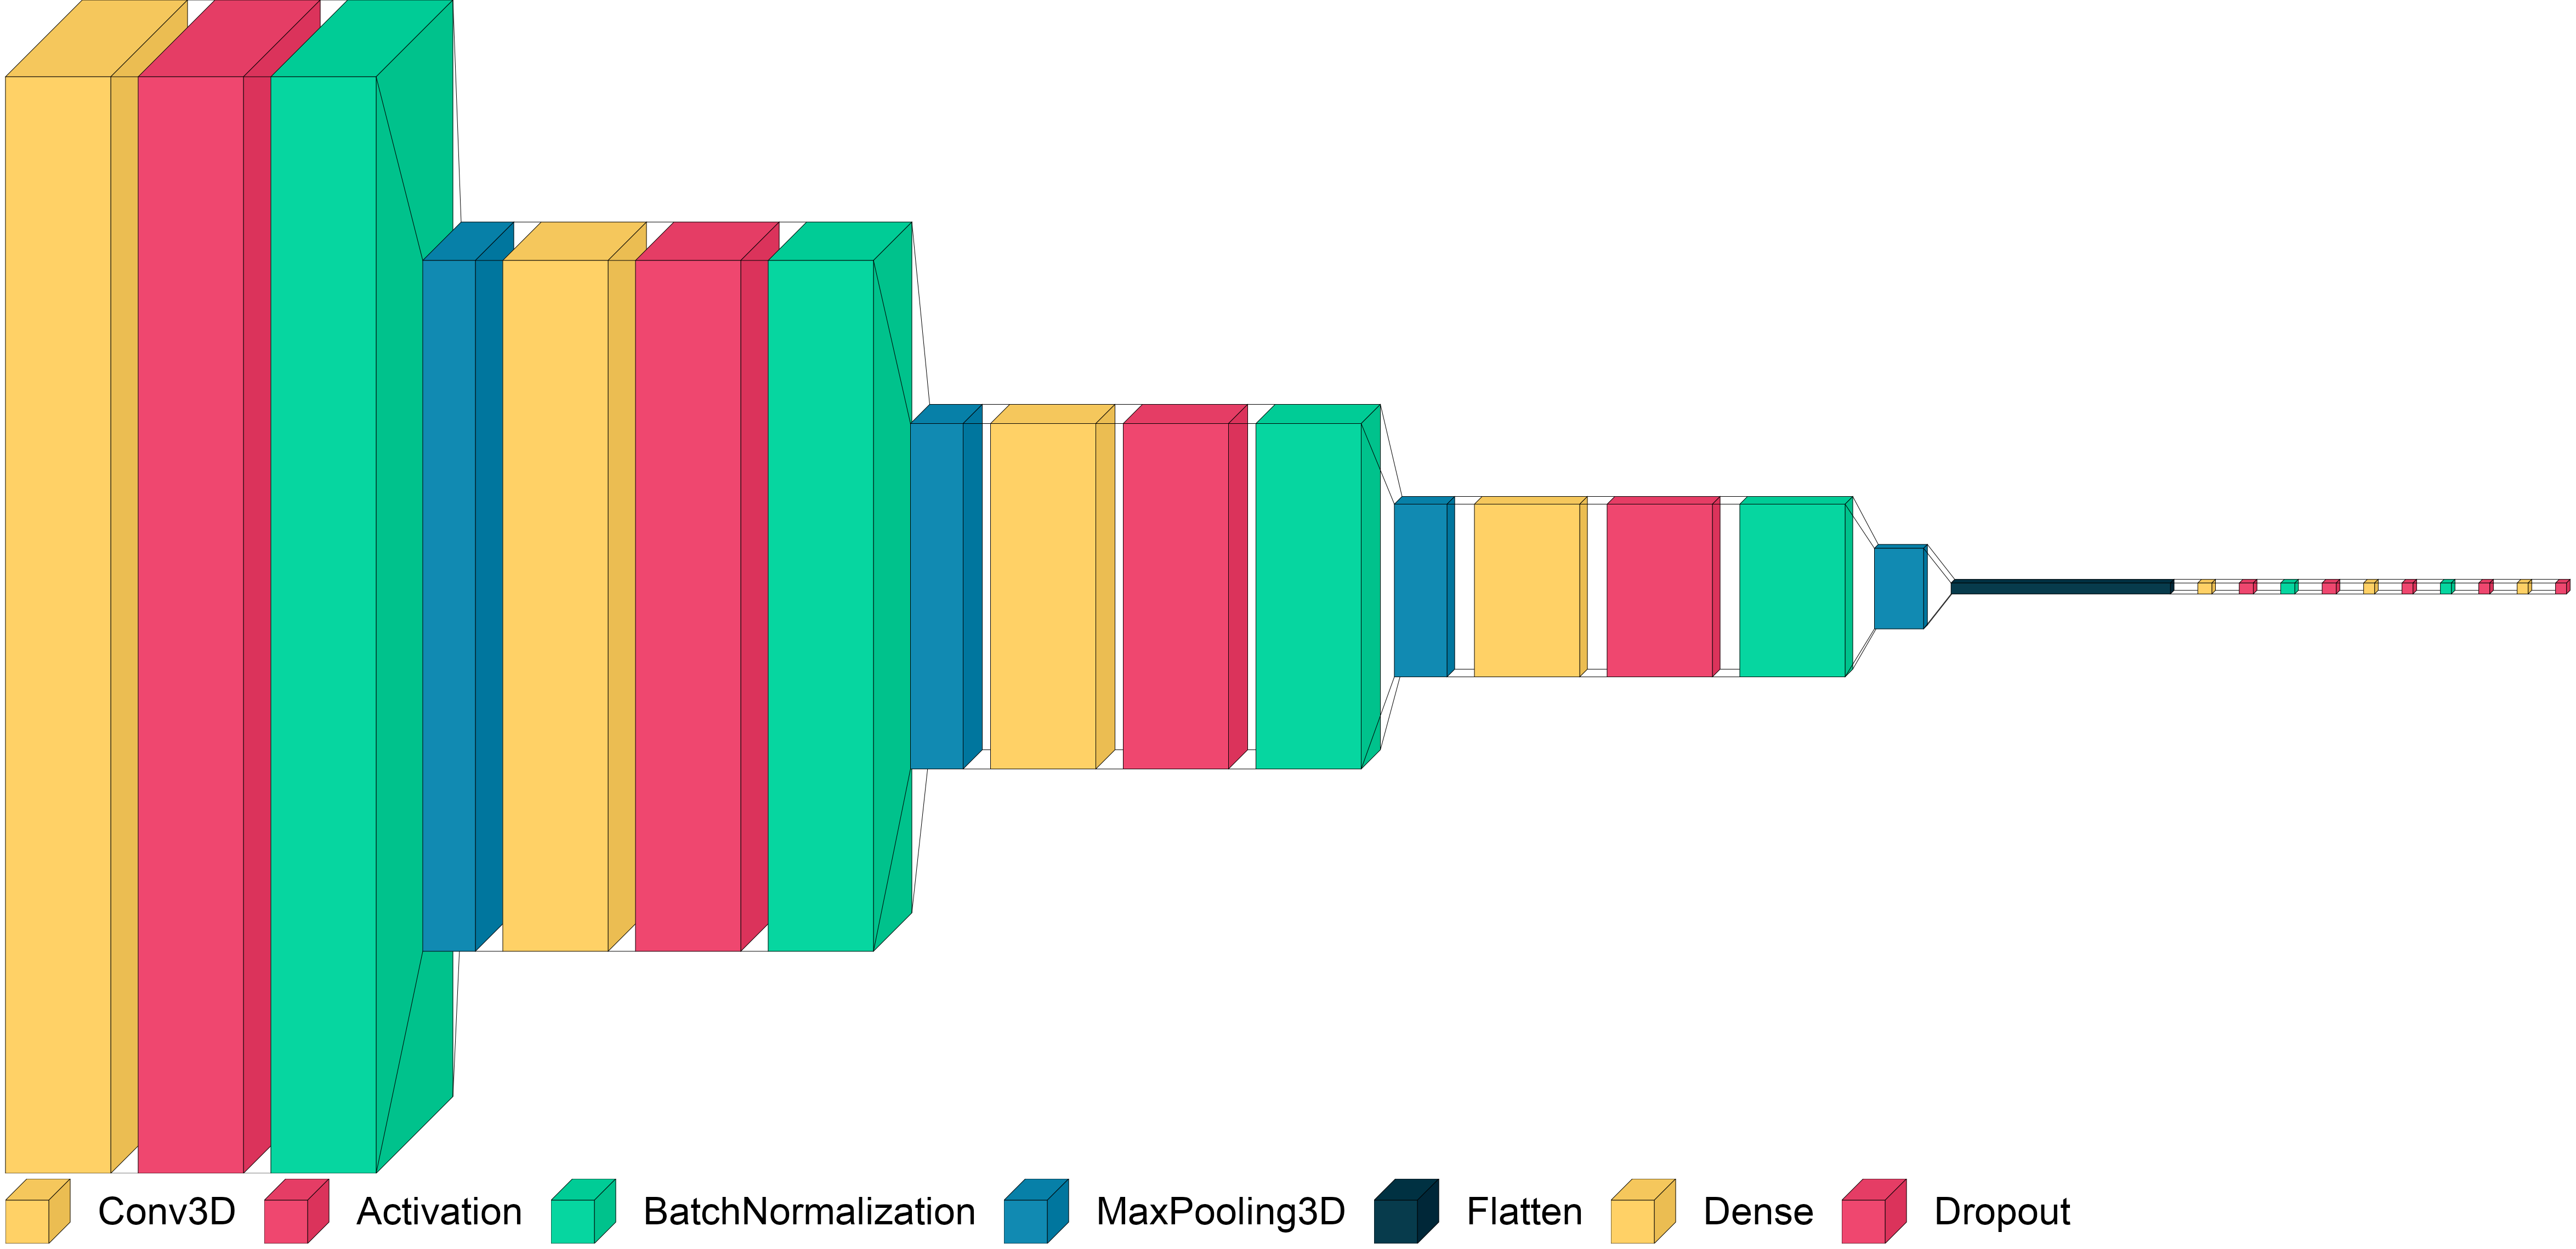

In [90]:
visualkeras.layered_view(model_09, spacing=50, legend=True, font=font, scale_xy=21)

### Model-9 diagram in 2D

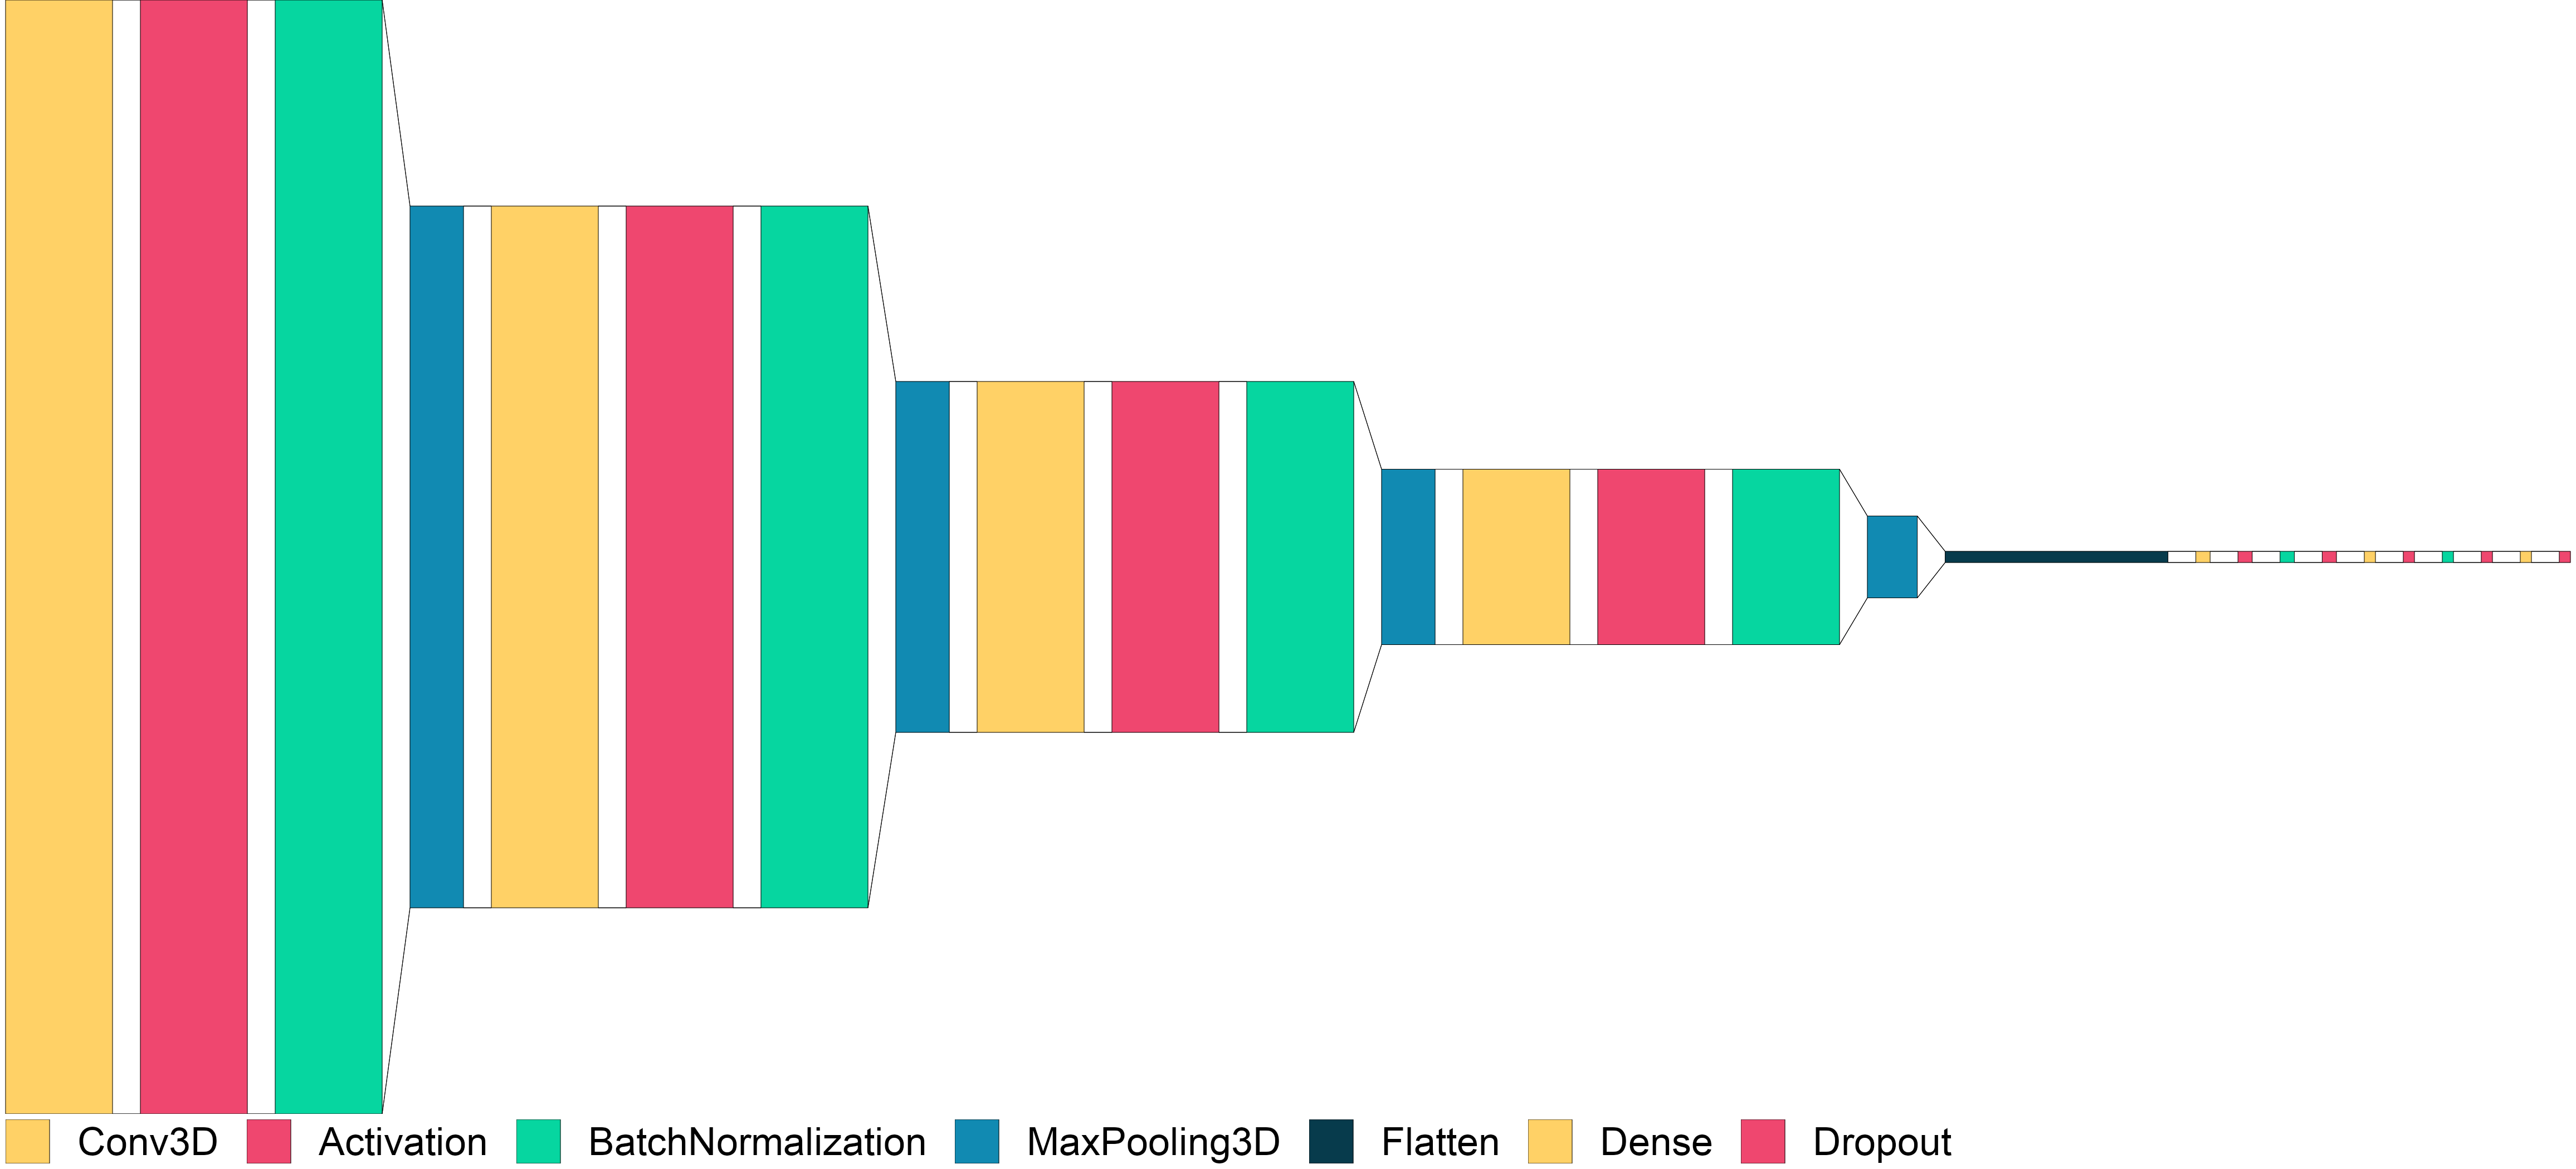

In [91]:
visualkeras.layered_view(model_09, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [92]:
history = model_09.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.6374 - categorical_accuracy: 0.4163
Epoch 00001: saving model to Model_09_2024-01-0615_48_01.067600/model-00001-1.63743-0.41629-5.92026-0.20000.h5
67/67 [==============================] - 130s 2s/step - loss: 1.6374 - categorical_accuracy: 0.4163 - val_loss: 5.9203 - val_categorical_accuracy: 0.2000 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.1209 - categorical_accuracy: 0.5913
Epoch 00002: saving model to Model_09_2024-01-0615_48_01.067600/model-00002-1.12086-0.59125-8.82490-0.20000.h5
67/67 [==============================] - 127s 2s/step - loss: 1.1209 - categorical_accuracy: 0.5913 - val_loss: 8.8249 - val_categorical_accuracy: 0.2000 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.9545 - categorical_accuracy: 0.6425
Epoch 00003: saving model to Model_09_2024-01-0615_48_01.067600/model-00003-0.95451-0.64253-9.95120-0.20000.h5
67/67 [========

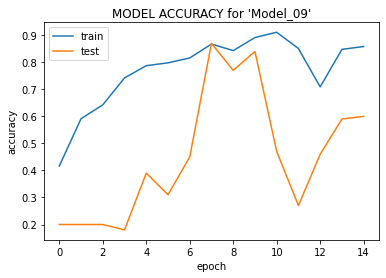

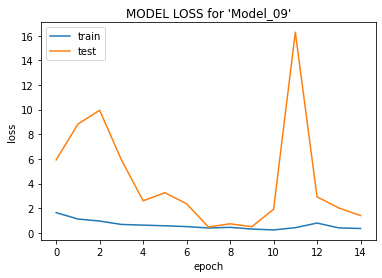

In [93]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [94]:
# Fetch statistics for populating model statistics workbook
total_params = model_09.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_09.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_09.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [95]:
write_model_details_worksheet(model_name, "Model-1 with dropout set to 0.25", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [96]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-10: Model-1 with dropout set to 0.50 </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.50 | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy |

In [97]:
model_name = "Model_10"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_10 = build_conv3D_model(dropout_val=0.50)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate()

val_generator   = generate(is_validation=True)

print (model_10.summary())

Layer:True --- Dense:True
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_32 (Conv3D)          (None, 20, 120, 120, 16)  1312      
                                                                 
 activation_54 (Activation)  (None, 20, 120, 120, 16)  0         
                                                                 
 batch_normalization_46 (Bat  (None, 20, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_32 (MaxPoolin  (None, 10, 60, 60, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_33 (Conv3D)          (None, 10, 60, 60, 32)    13856     
                                                                 
 activation_55 (Activation) 

### Model-10 layer representation

In [98]:
#plot_model(model_10, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-10 diagram in 3D

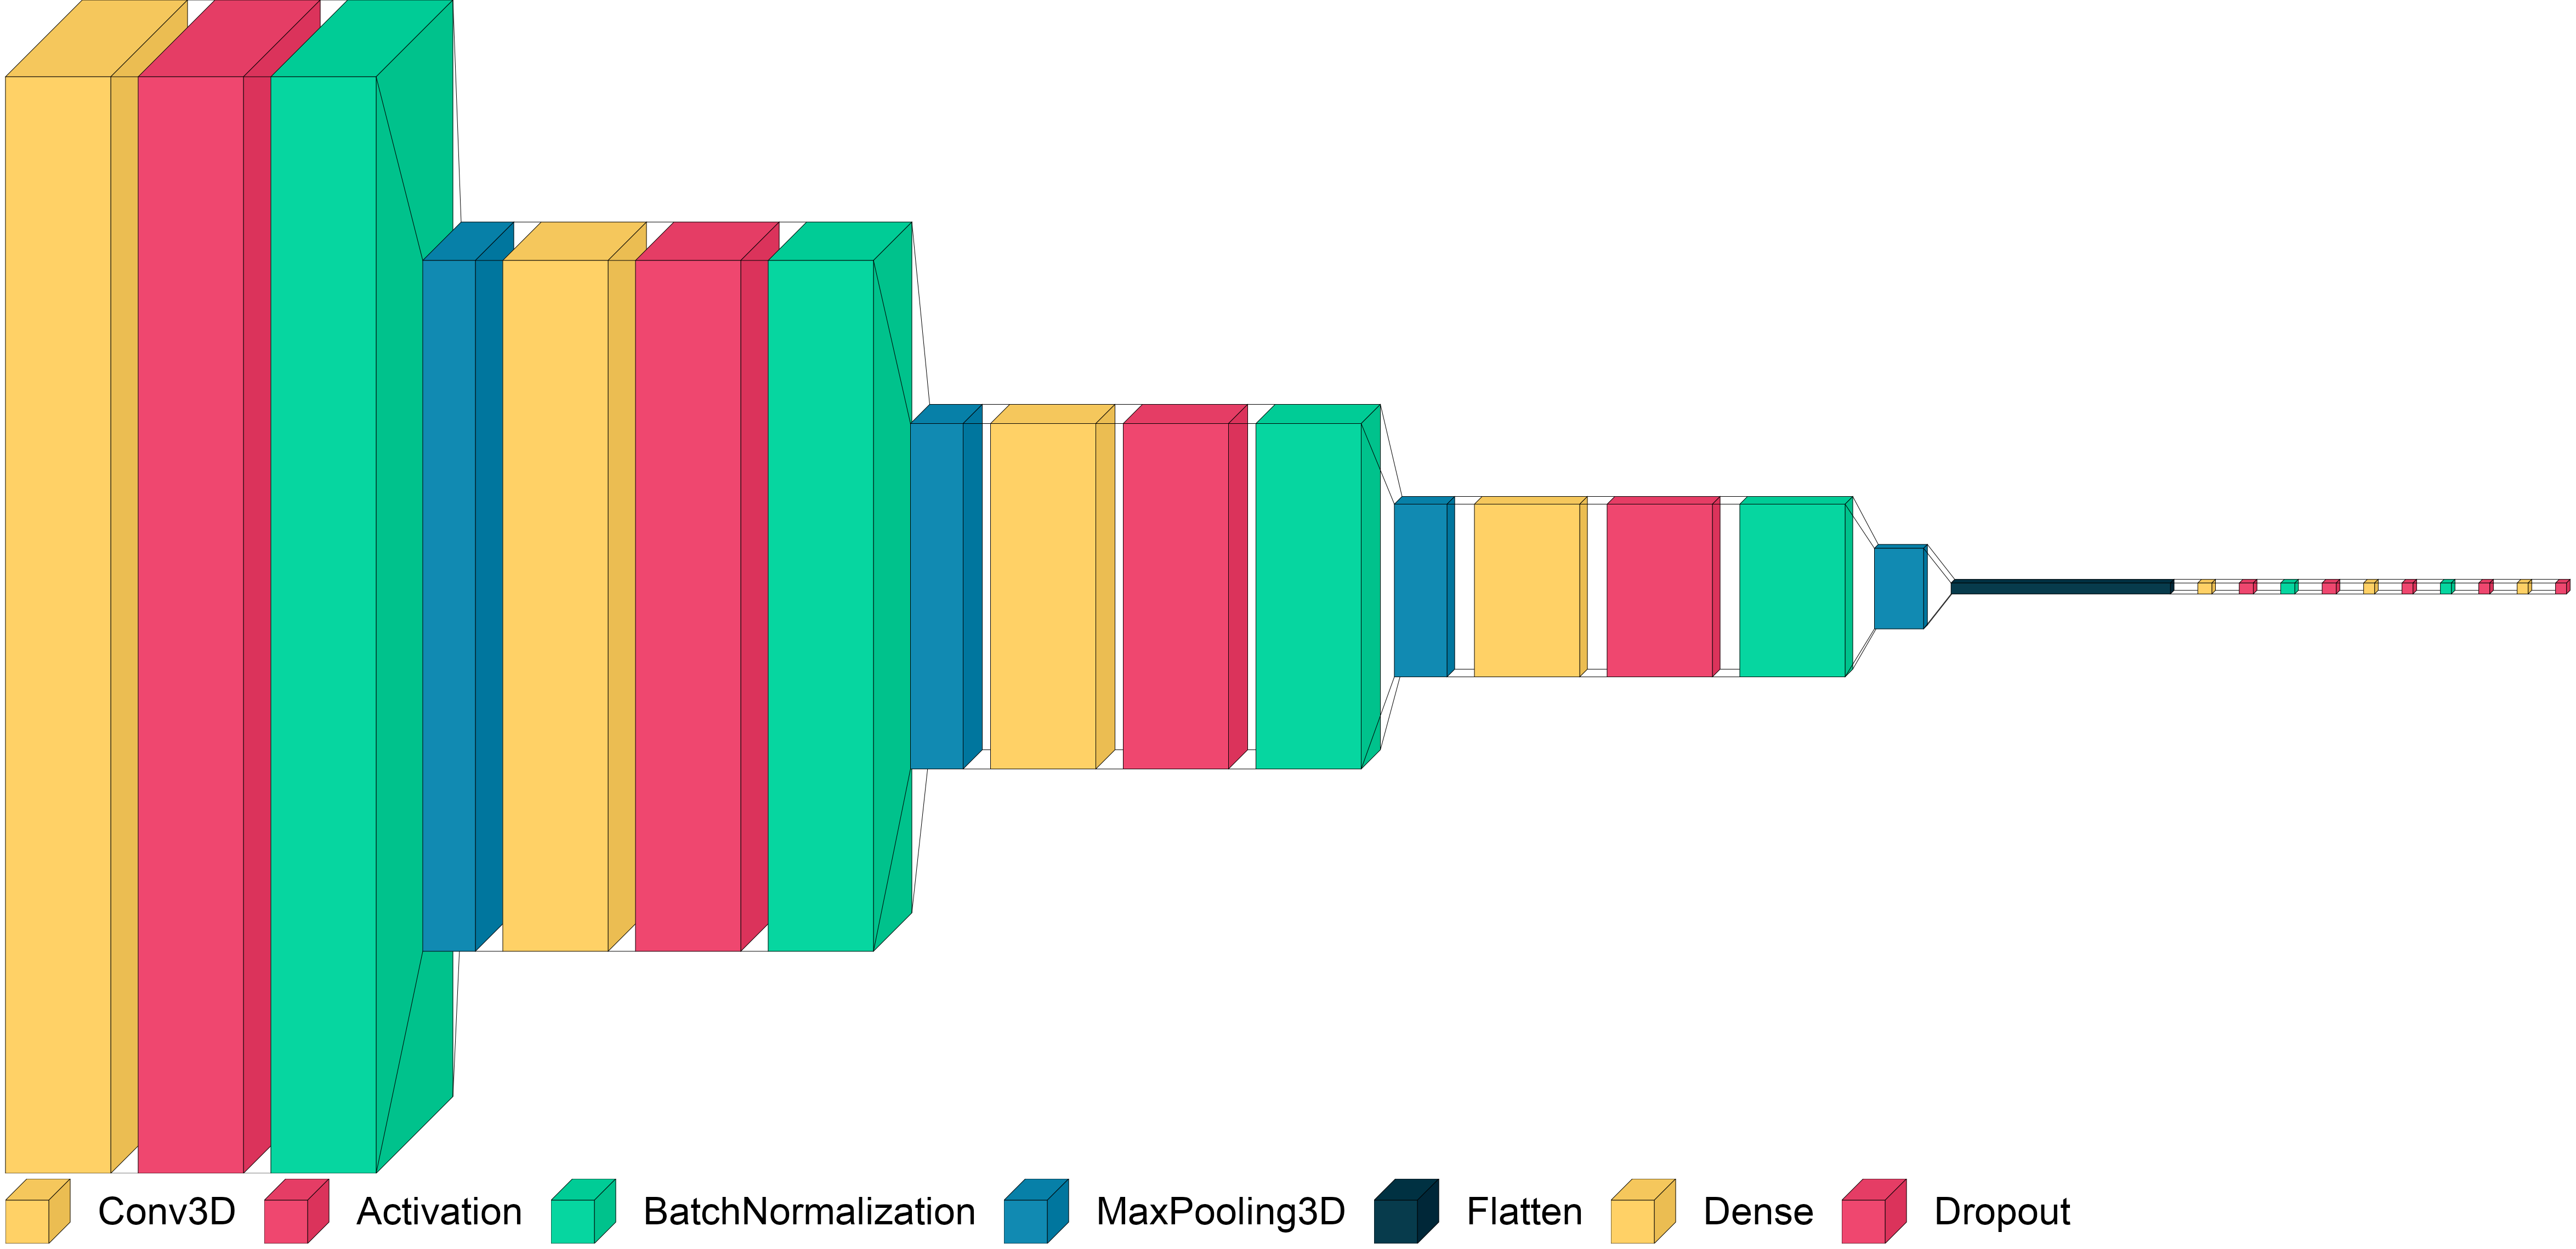

In [99]:
visualkeras.layered_view(model_10, spacing=50, legend=True, font=font, scale_xy=21)

### Model-10 diagram in 2D

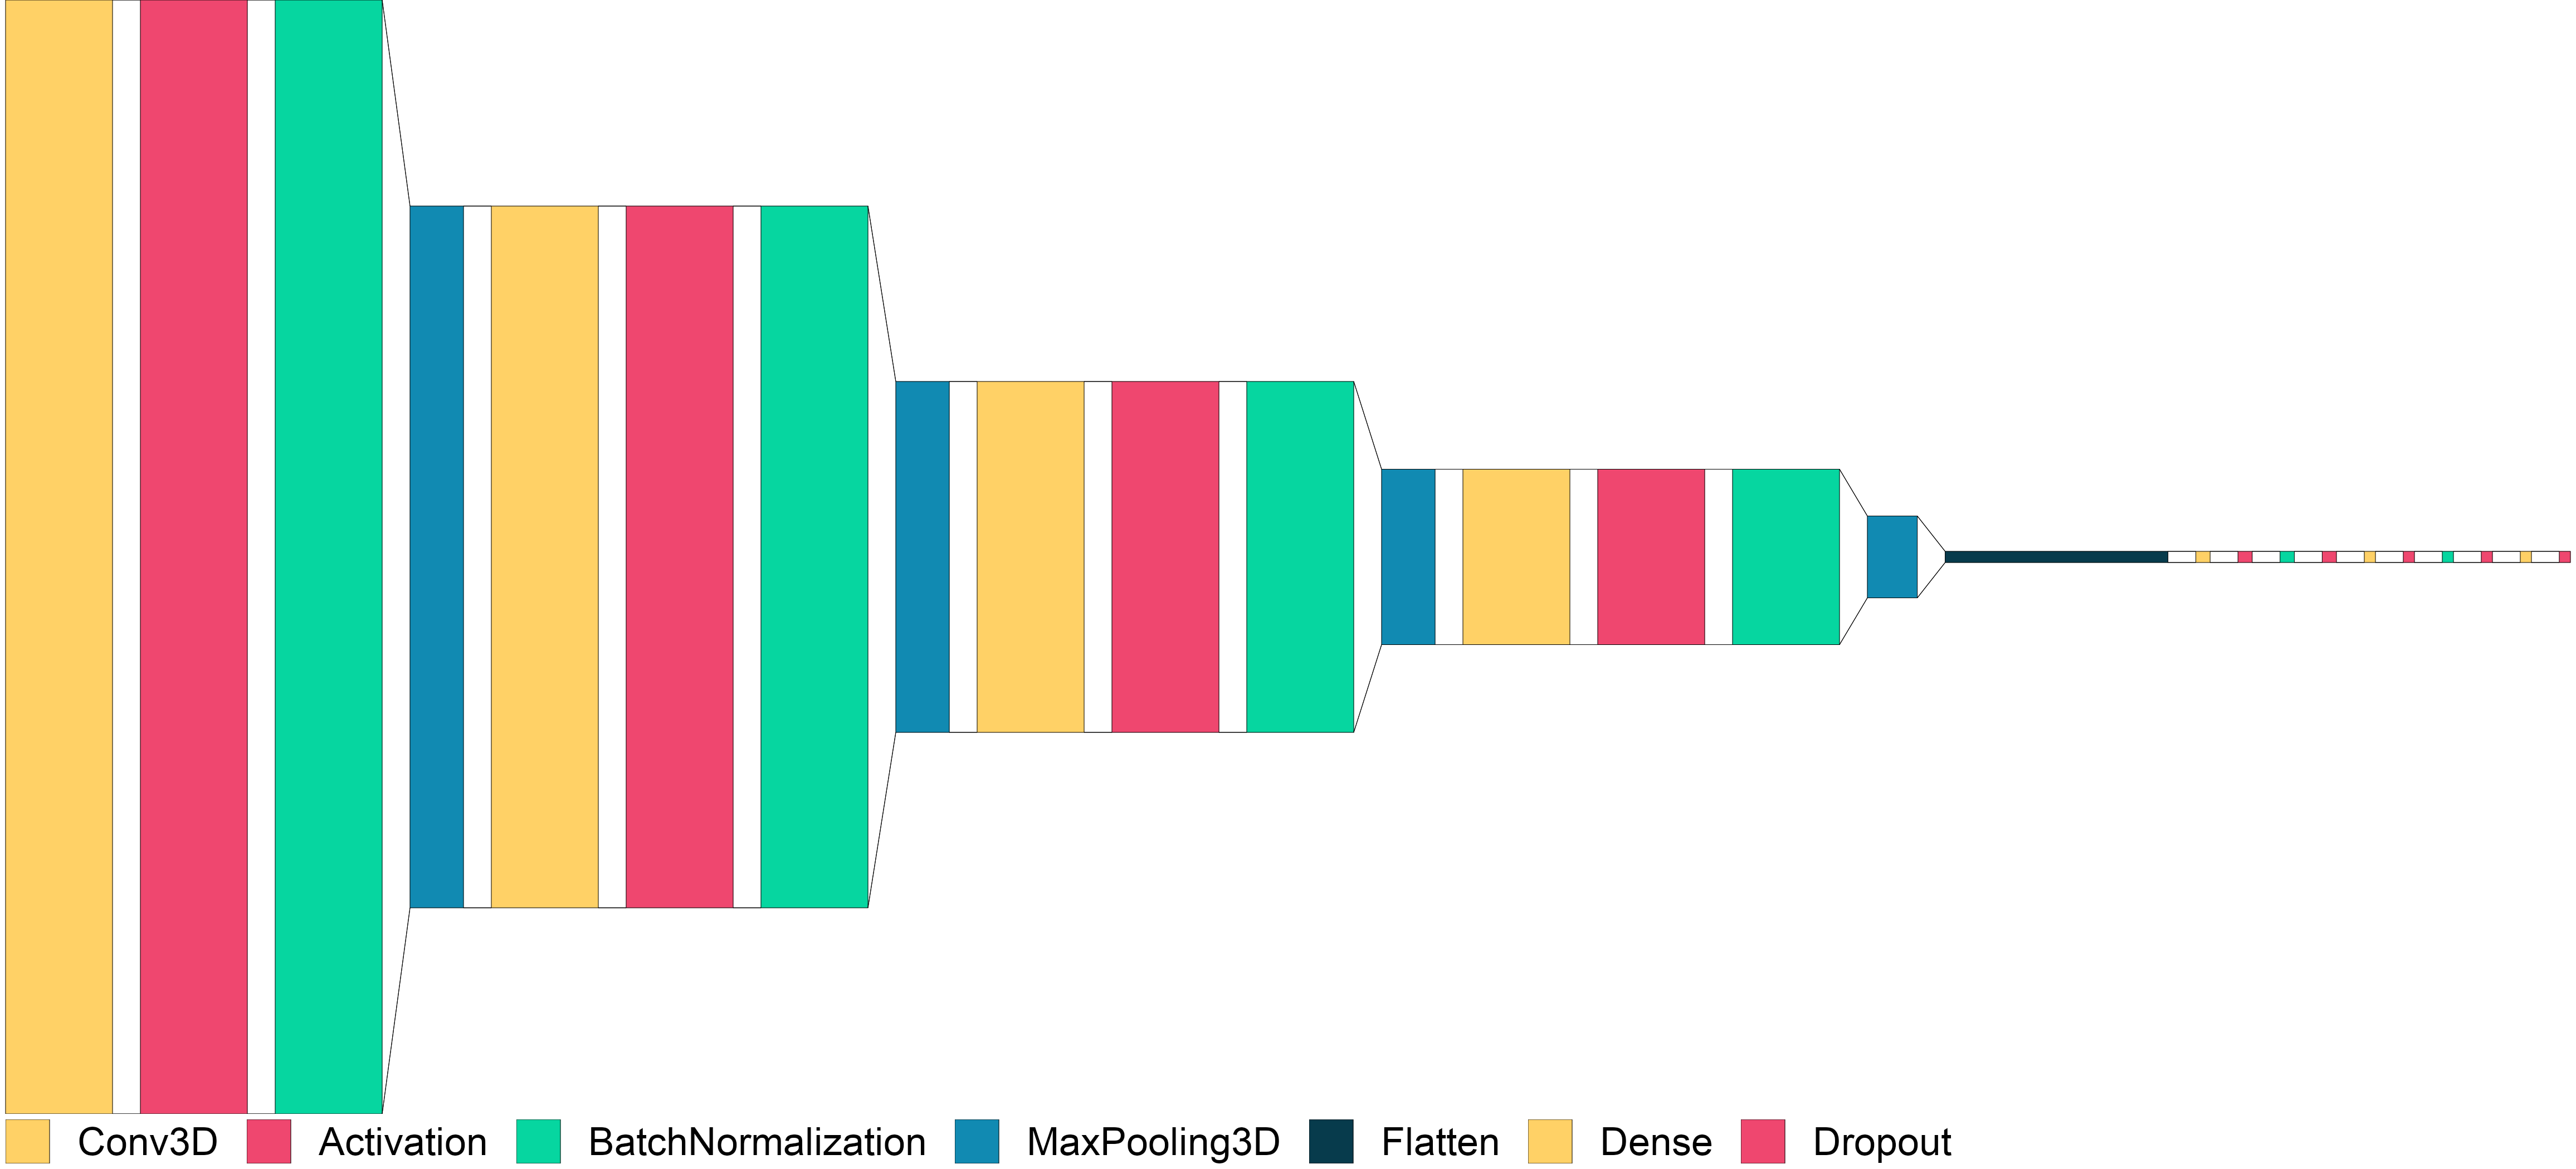

In [100]:
visualkeras.layered_view(model_10, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [101]:
history = model_10.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.9412 - categorical_accuracy: 0.3635
Epoch 00001: saving model to Model_10_2024-01-0615_48_01.067600/model-00001-1.94122-0.36350-5.22866-0.22000.h5
67/67 [==============================] - 129s 2s/step - loss: 1.9412 - categorical_accuracy: 0.3635 - val_loss: 5.2287 - val_categorical_accuracy: 0.2200 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.3914 - categorical_accuracy: 0.4872
Epoch 00002: saving model to Model_10_2024-01-0615_48_01.067600/model-00002-1.39138-0.48718-3.31265-0.25000.h5
67/67 [==============================] - 127s 2s/step - loss: 1.3914 - categorical_accuracy: 0.4872 - val_loss: 3.3127 - val_categorical_accuracy: 0.2500 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 1.1895 - categorical_accuracy: 0.5777
Epoch 00003: saving model to Model_10_2024-01-0615_48_01.067600/model-00003-1.18946-0.57768-4.92953-0.27000.h5
67/67 [========

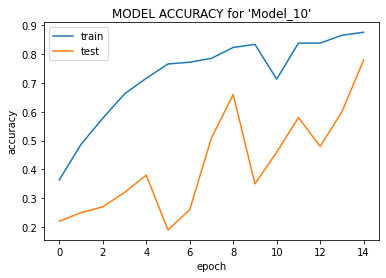

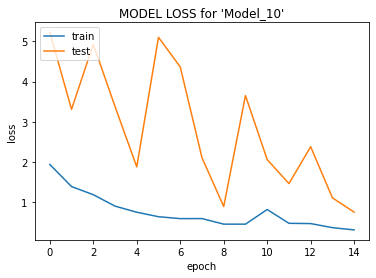

In [102]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [103]:
# Fetch statistics for populating model statistics workbook
total_params = model_10.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_10.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_10.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [104]:
write_model_details_worksheet(model_name, "Model-1 with dropout set to 0.50", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 30,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [105]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-11: Model-9 with image height and width adjusted to 100 </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.25 | 20 | 100 | 100 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002

In [106]:
model_name = "Model_11"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_11 = build_conv3D_model(dropout_val=0.25, image_height=100, image_width=100)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(image_height=100, image_width=100)

val_generator   = generate(image_height=100, image_width=100, is_validation=True)

print (model_11.summary())

Layer:True --- Dense:True
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_36 (Conv3D)          (None, 20, 100, 100, 16)  1312      
                                                                 
 activation_61 (Activation)  (None, 20, 100, 100, 16)  0         
                                                                 
 batch_normalization_52 (Bat  (None, 20, 100, 100, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_36 (MaxPoolin  (None, 10, 50, 50, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_37 (Conv3D)          (None, 10, 50, 50, 32)    13856     
                                                                 
 activation_62 (Activation) 

### Model-11 layer representation

In [107]:
#plot_model(model_11, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-11 diagram in 3D

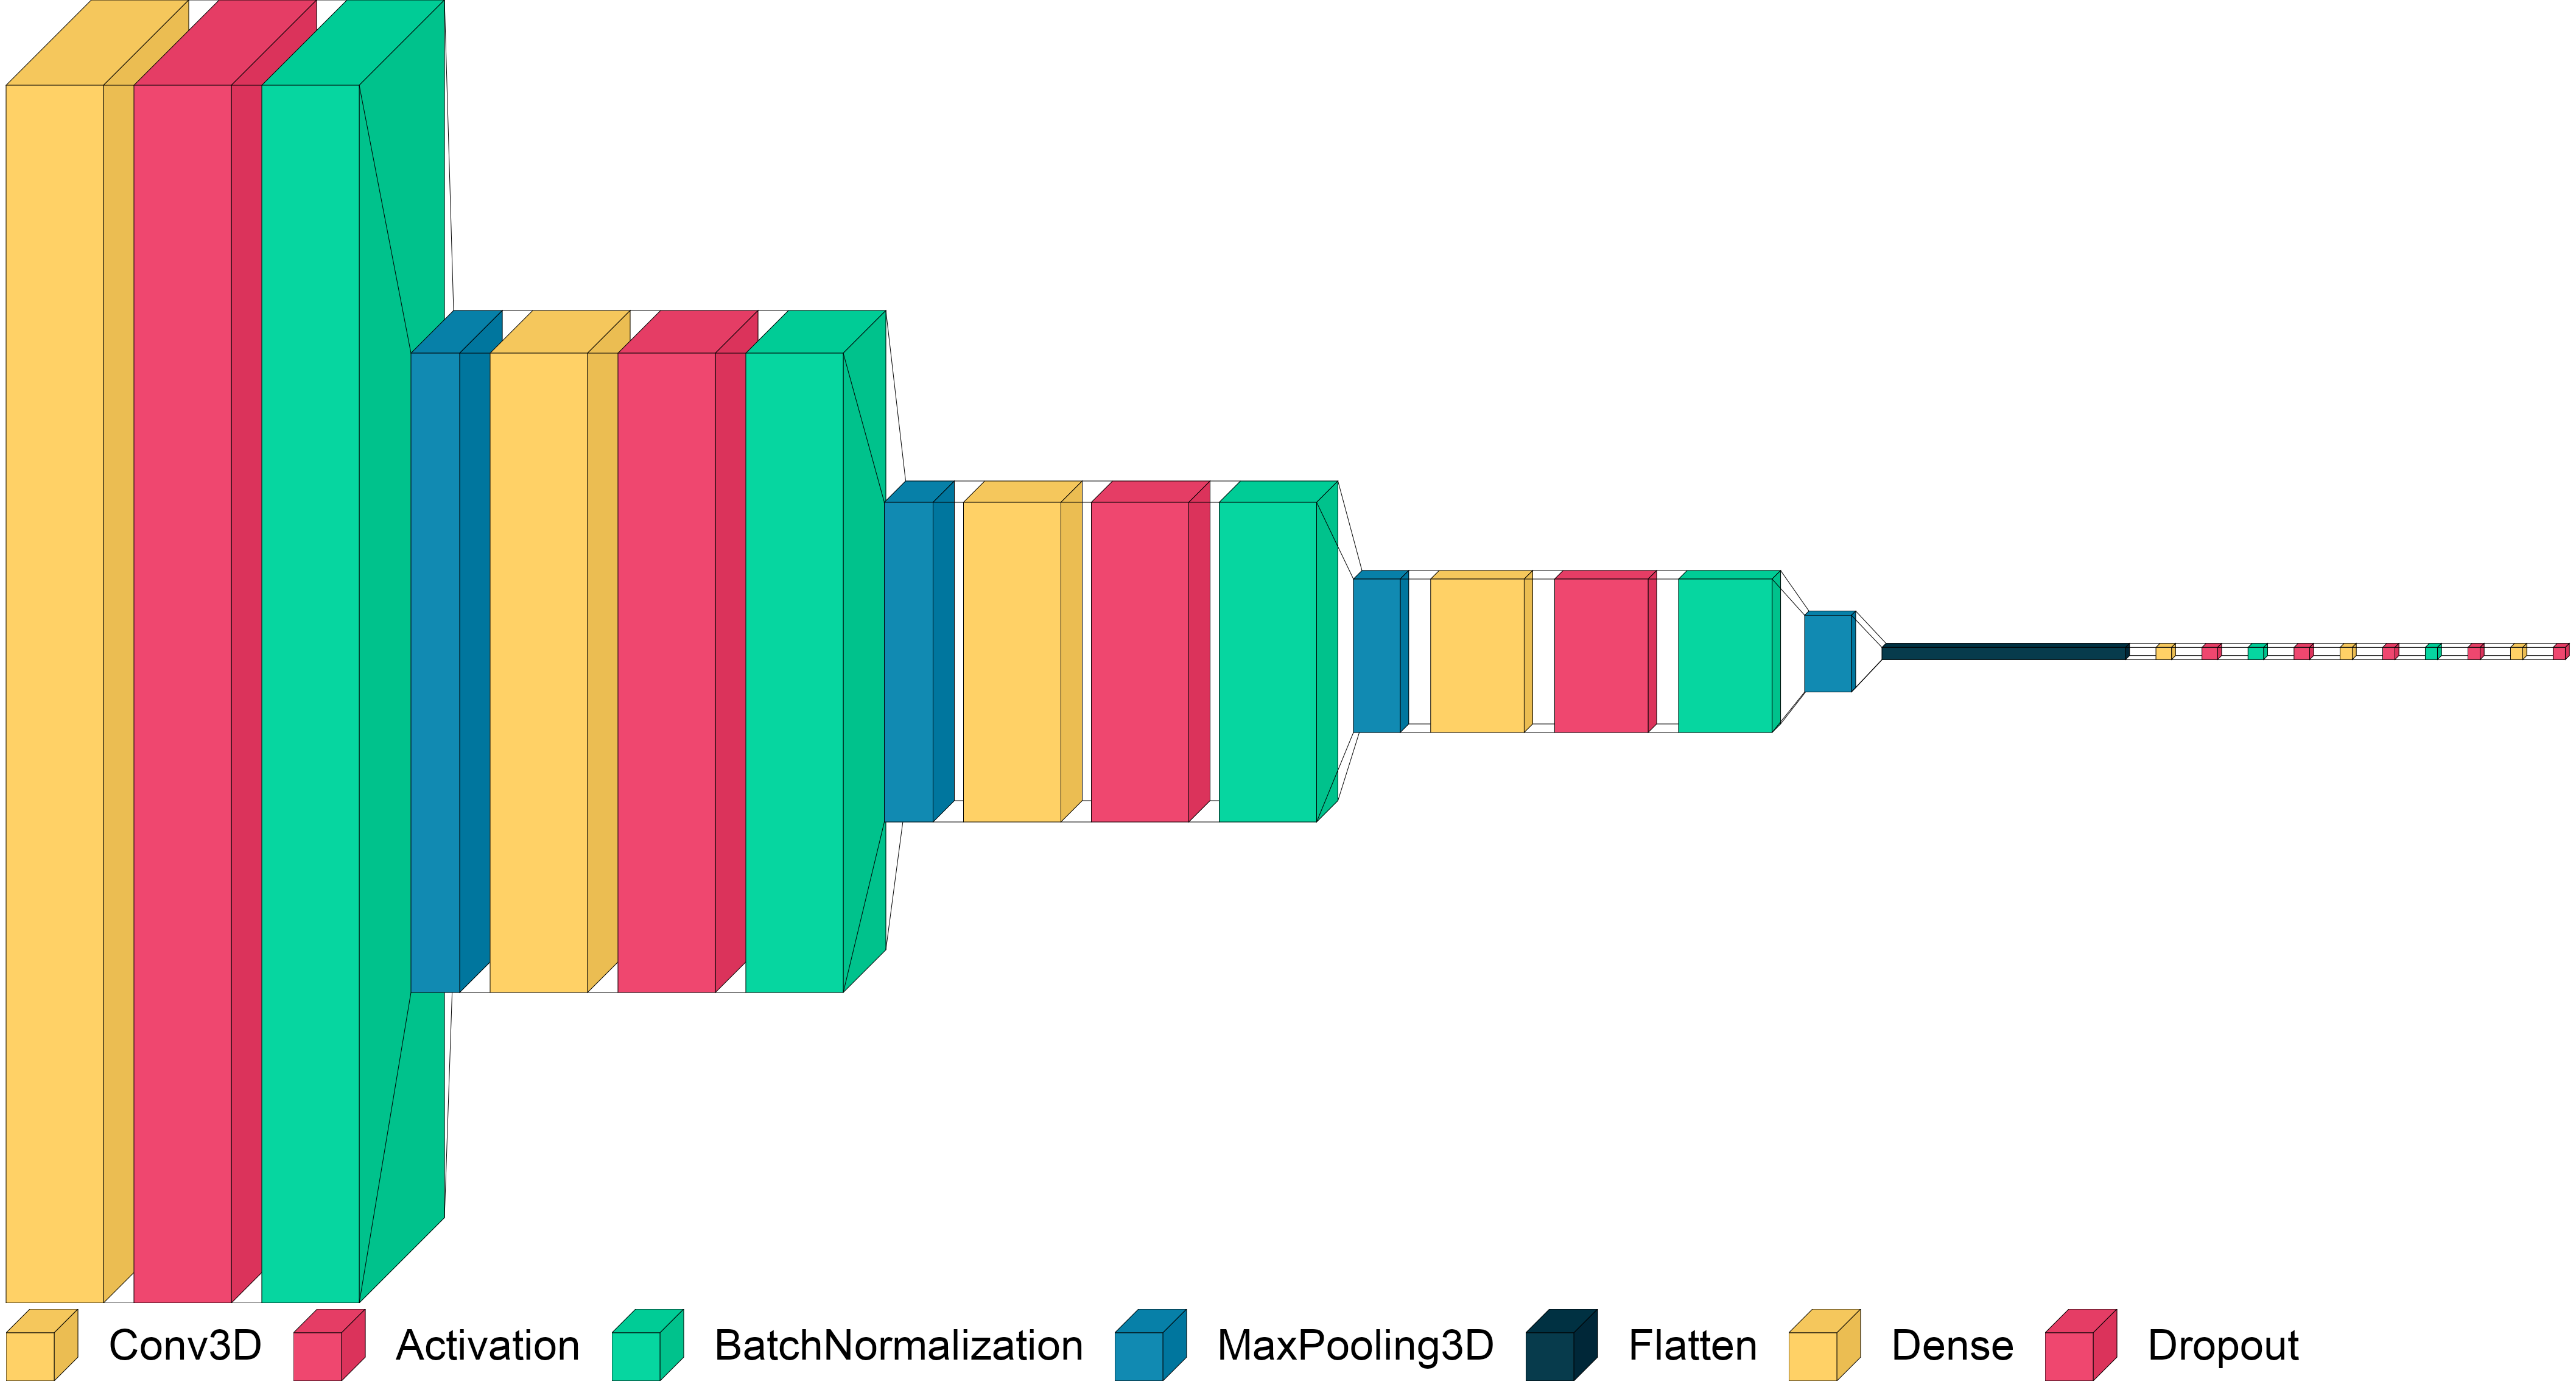

In [108]:
visualkeras.layered_view(model_11, spacing=50, legend=True, font=font, scale_xy=21)

### Model-11 diagram in 2D

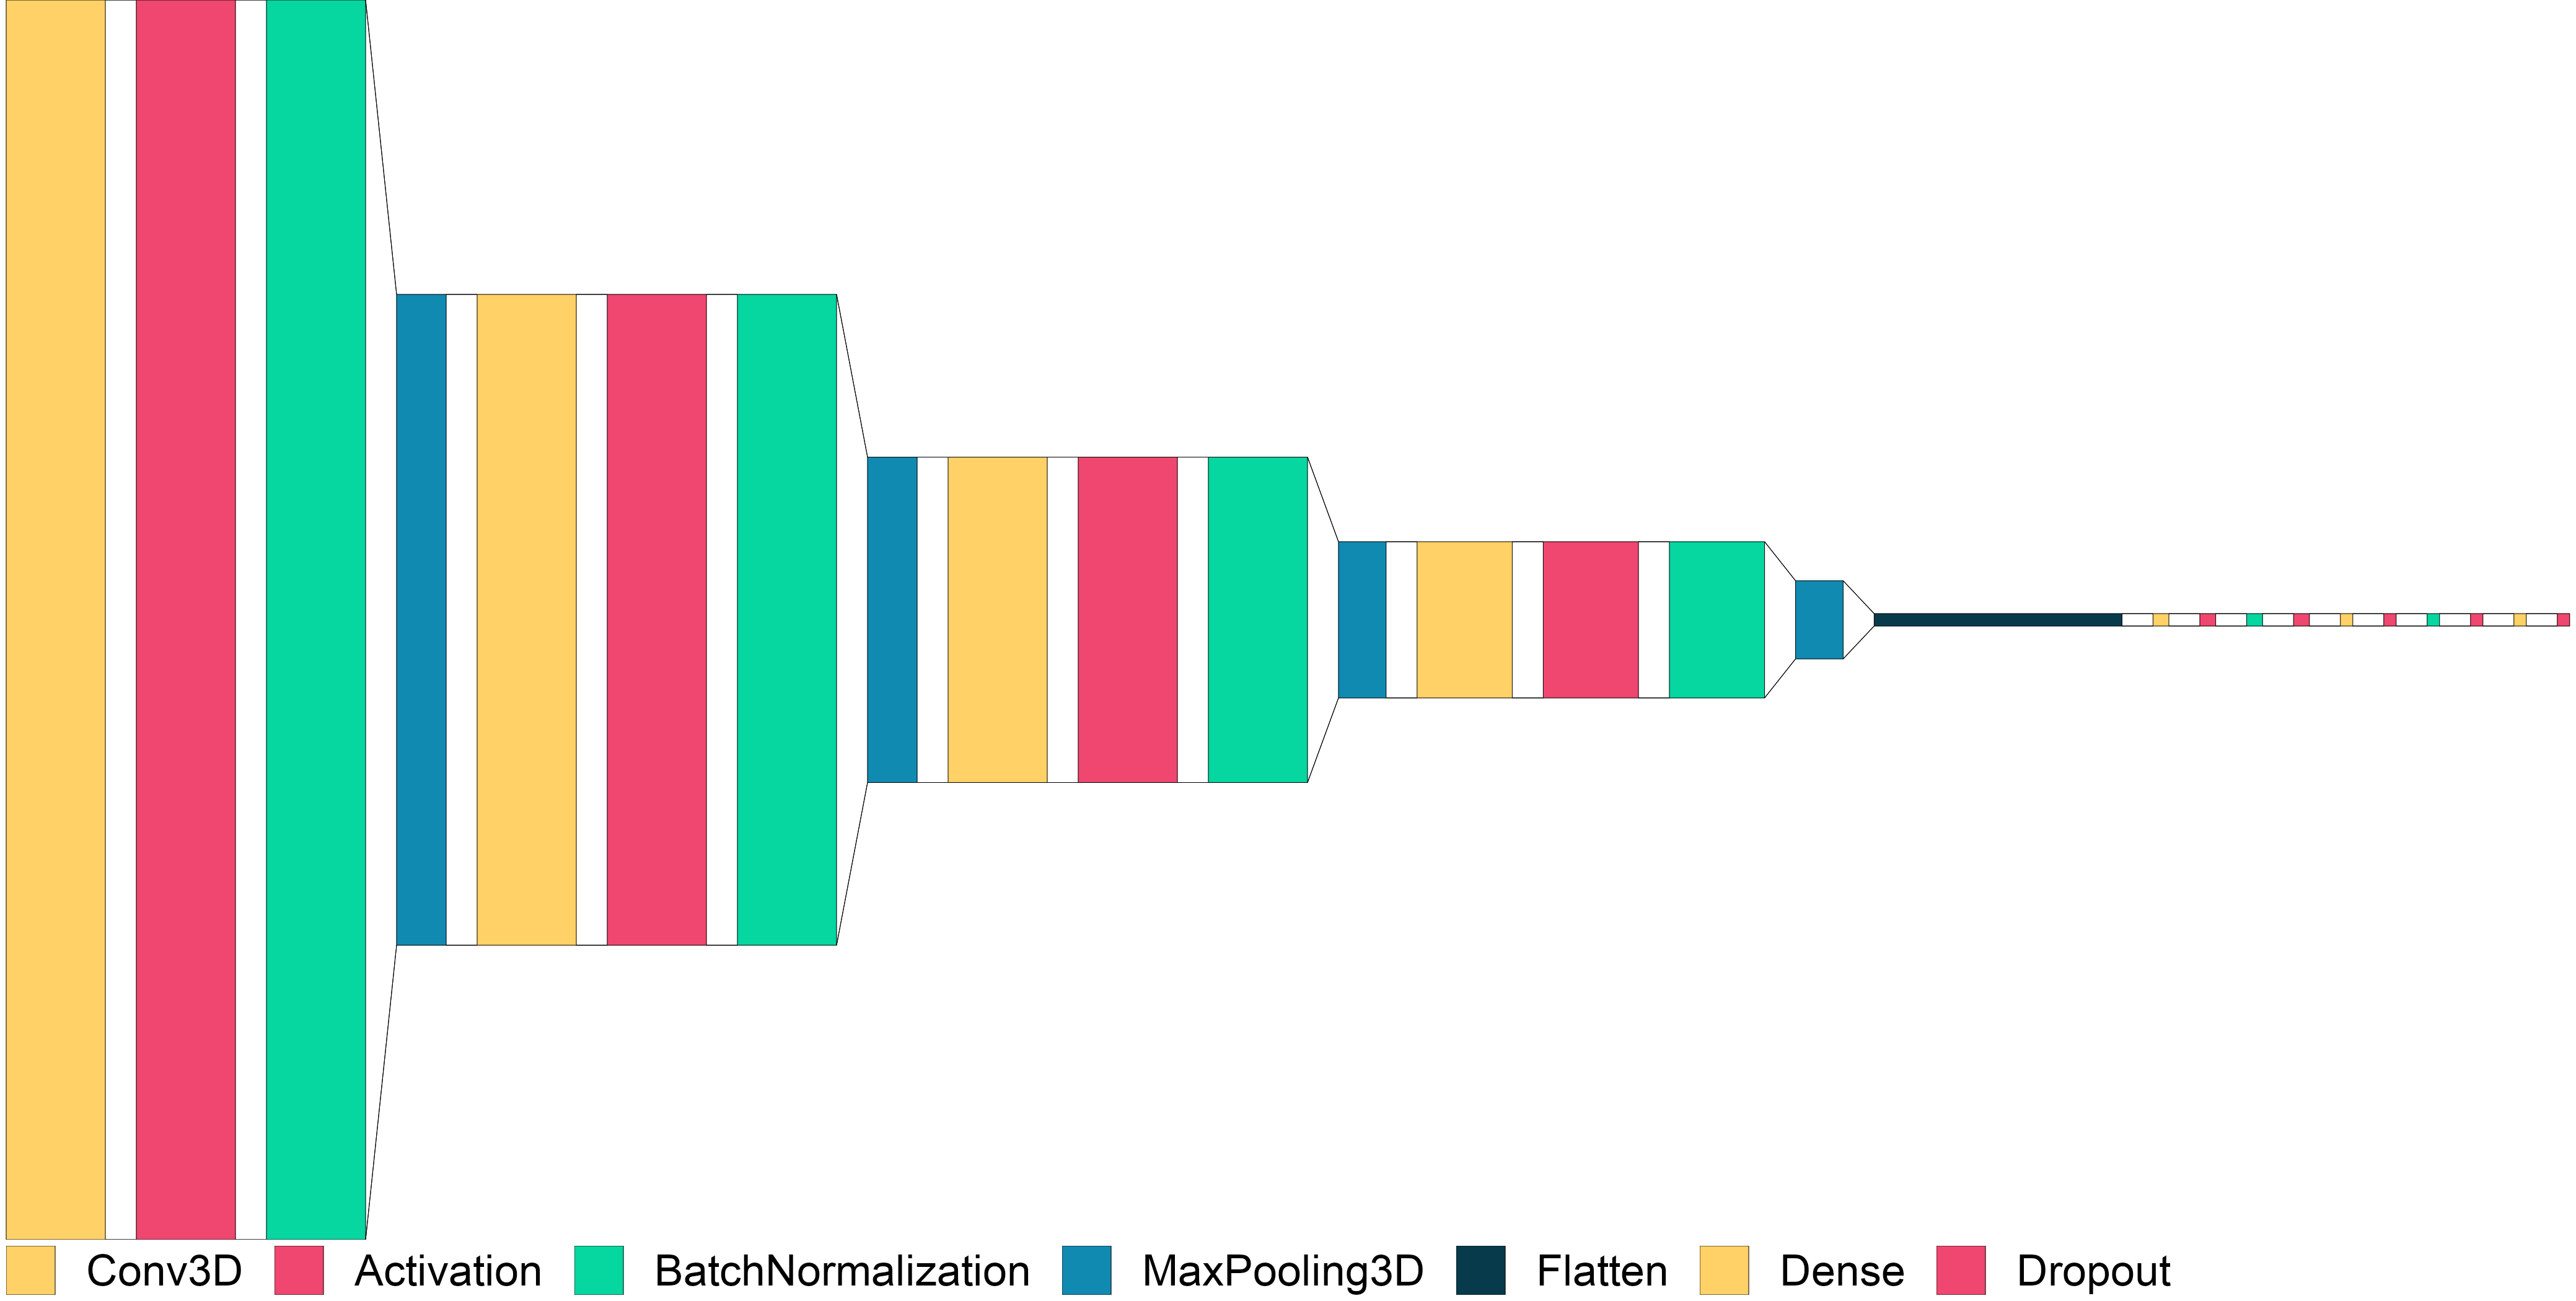

In [109]:
visualkeras.layered_view(model_11, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [110]:
history = model_11.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.5751 - categorical_accuracy: 0.4299
Epoch 00001: saving model to Model_11_2024-01-0615_48_01.067600/model-00001-1.57513-0.42986-2.31970-0.23000.h5
67/67 [==============================] - 130s 2s/step - loss: 1.5751 - categorical_accuracy: 0.4299 - val_loss: 2.3197 - val_categorical_accuracy: 0.2300 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.1889 - categorical_accuracy: 0.5415
Epoch 00002: saving model to Model_11_2024-01-0615_48_01.067600/model-00002-1.18894-0.54148-3.24438-0.24000.h5
67/67 [==============================] - 128s 2s/step - loss: 1.1889 - categorical_accuracy: 0.5415 - val_loss: 3.2444 - val_categorical_accuracy: 0.2400 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 1.0059 - categorical_accuracy: 0.6290
Epoch 00003: saving model to Model_11_2024-01-0615_48_01.067600/model-00003-1.00590-0.62896-4.04897-0.16000.h5
67/67 [========

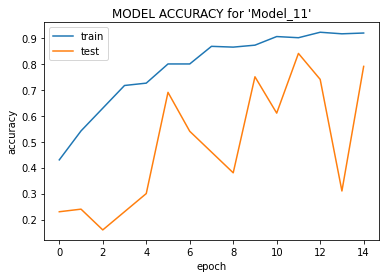

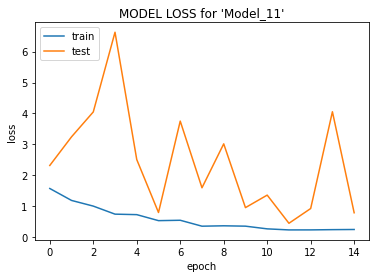

In [111]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [112]:
# Fetch statistics for populating model statistics workbook
total_params = model_11.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_11.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_11.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [113]:
write_model_details_worksheet(model_name, "Model-9 with image height and width adjusted to 100 and frames per video set to 30", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             100, 100, 15, 32, "Adam", False, 0.002)

In [114]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-12: Model-10 with image height and width adjusted to 100 and frames per video set to 30 </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.50 | 30 | 100 | 100 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002

In [115]:
model_name = "Model_12"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_12 = build_conv3D_model(dropout_val=0.50, image_height=100, image_width=100, num_images_per_video=30)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(image_height=100, image_width=100, num_images_per_video=default_frames_count)

val_generator   = generate(image_height=100, image_width=100, num_images_per_video=default_frames_count, is_validation=True)

print (model_12.summary())

Layer:True --- Dense:True
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_40 (Conv3D)          (None, 30, 100, 100, 16)  1312      
                                                                 
 activation_68 (Activation)  (None, 30, 100, 100, 16)  0         
                                                                 
 batch_normalization_58 (Bat  (None, 30, 100, 100, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_40 (MaxPoolin  (None, 15, 50, 50, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_41 (Conv3D)          (None, 15, 50, 50, 32)    13856     
                                                                 
 activation_69 (Activation)

### Model-12 layer representation

In [116]:
#plot_model(model_12, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-12 diagram in 3D

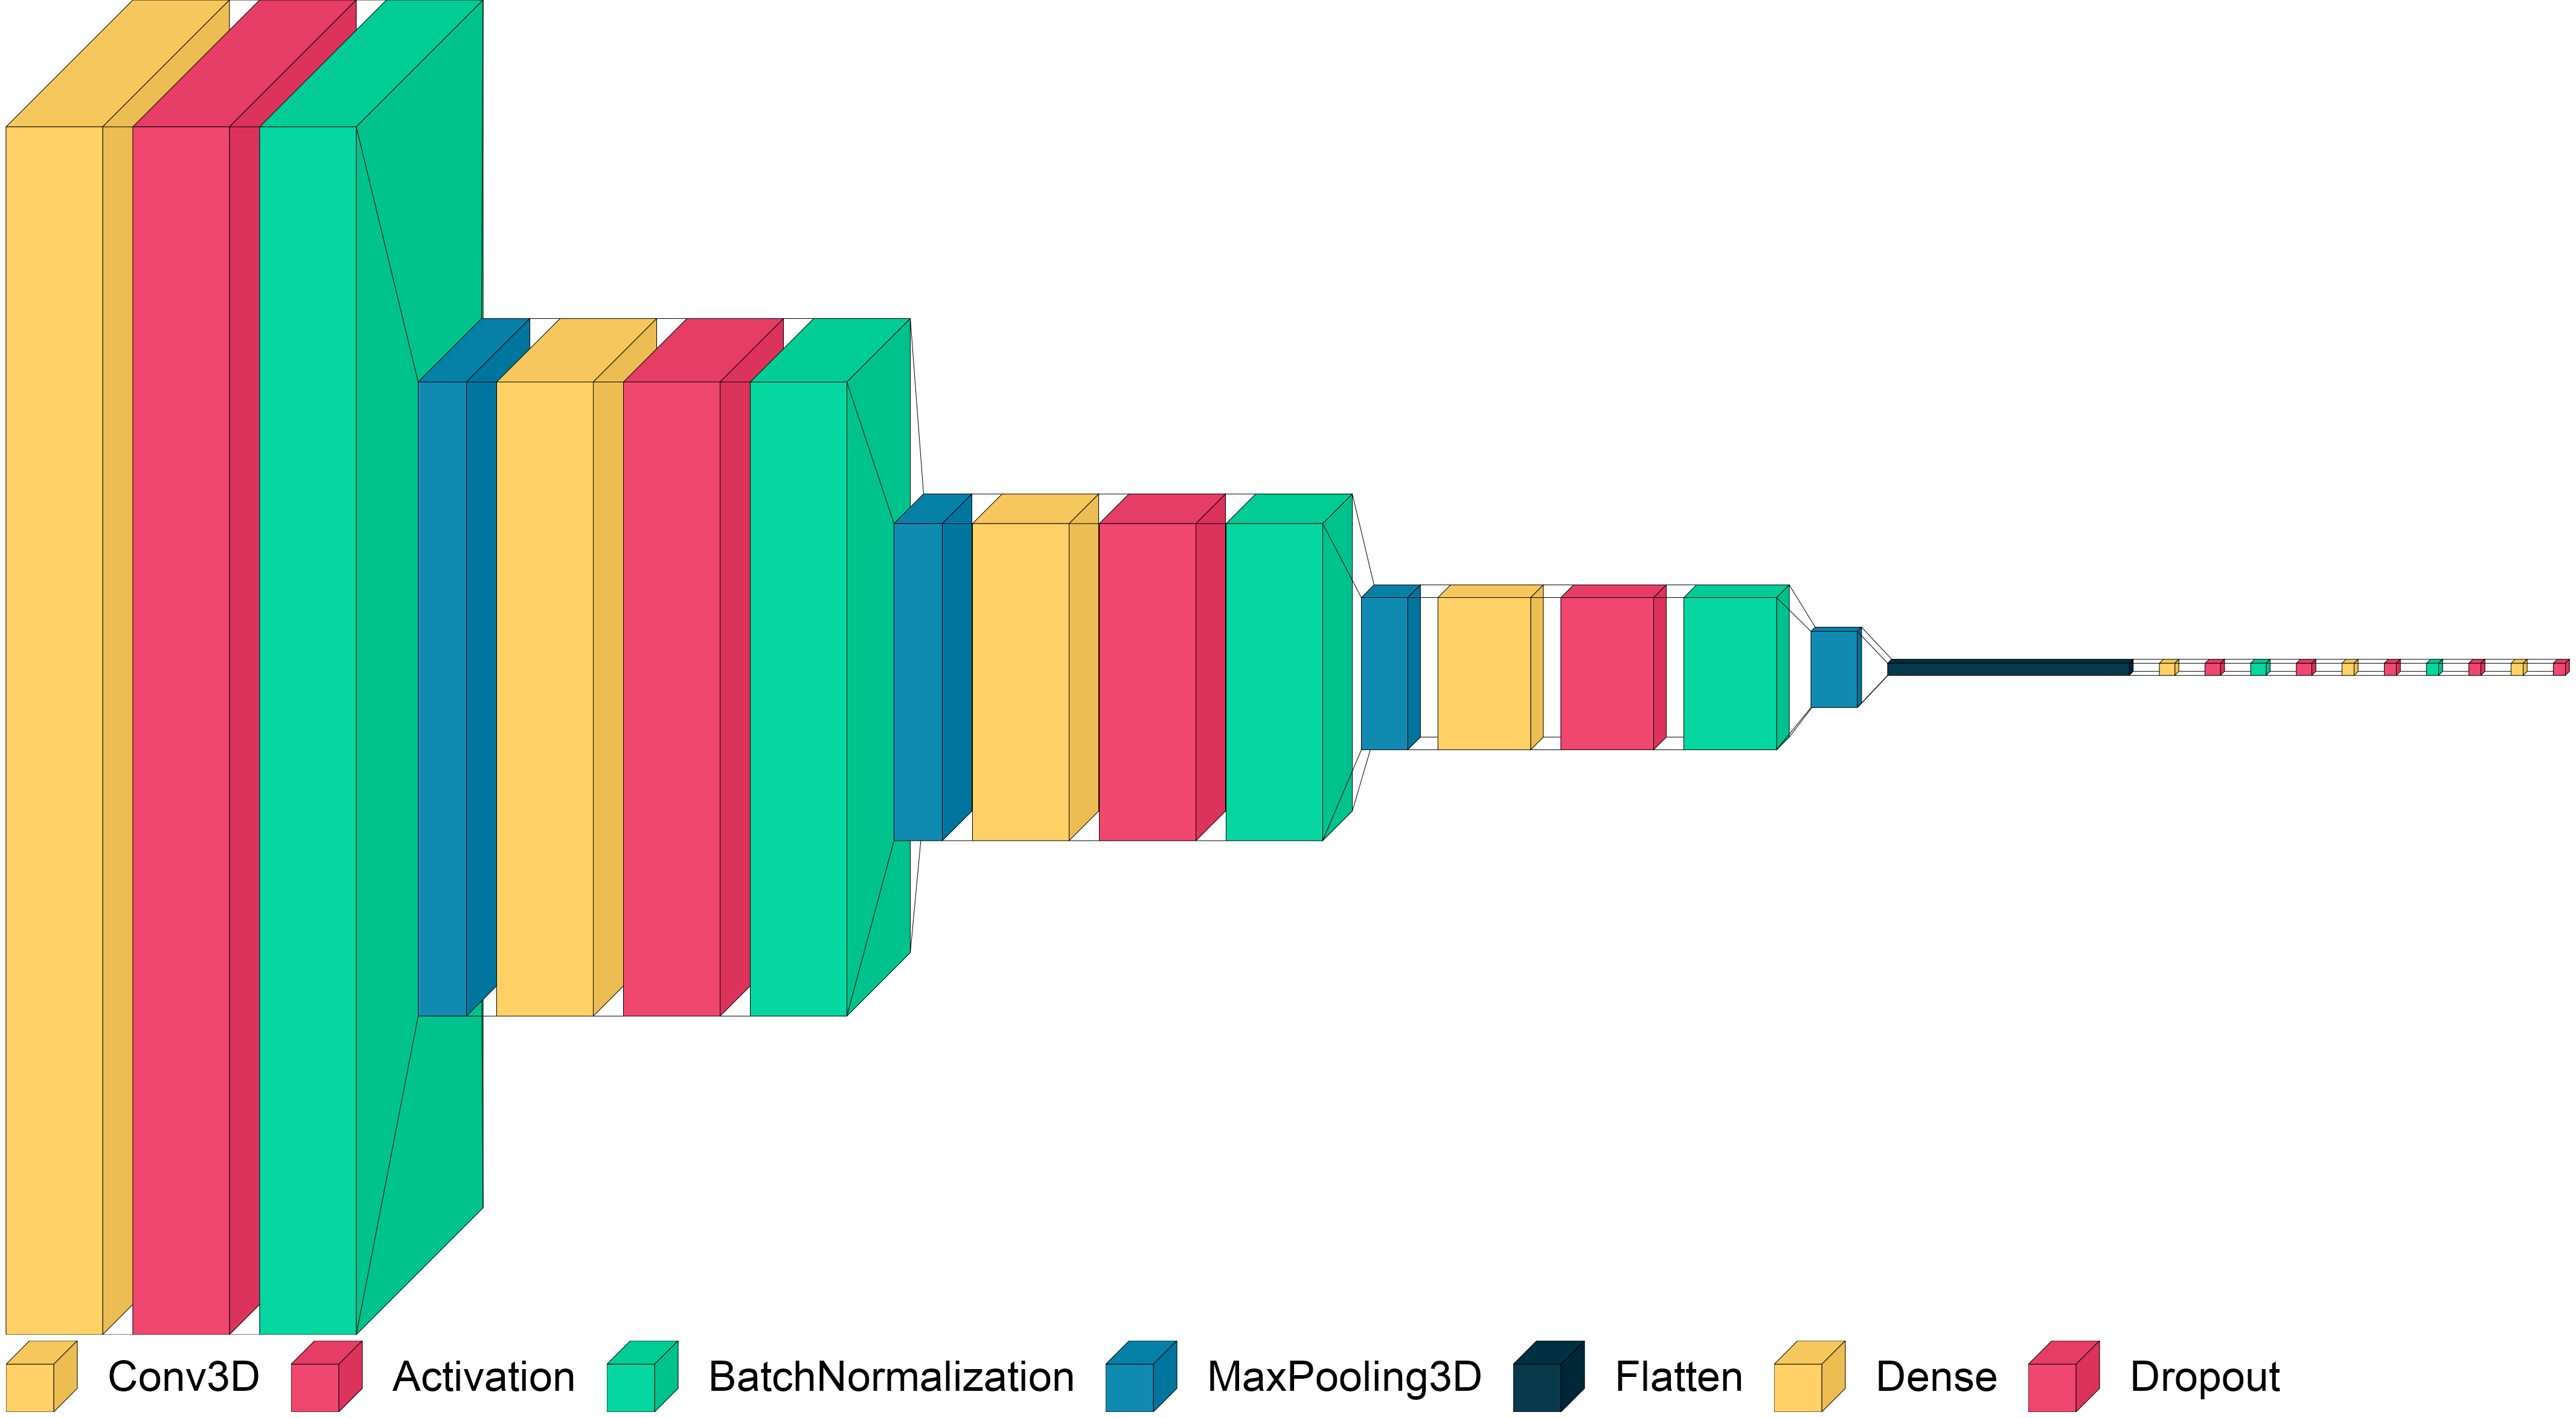

In [117]:
visualkeras.layered_view(model_12, spacing=50, legend=True, font=font, scale_xy=21)

### Model-12 diagram in 2D

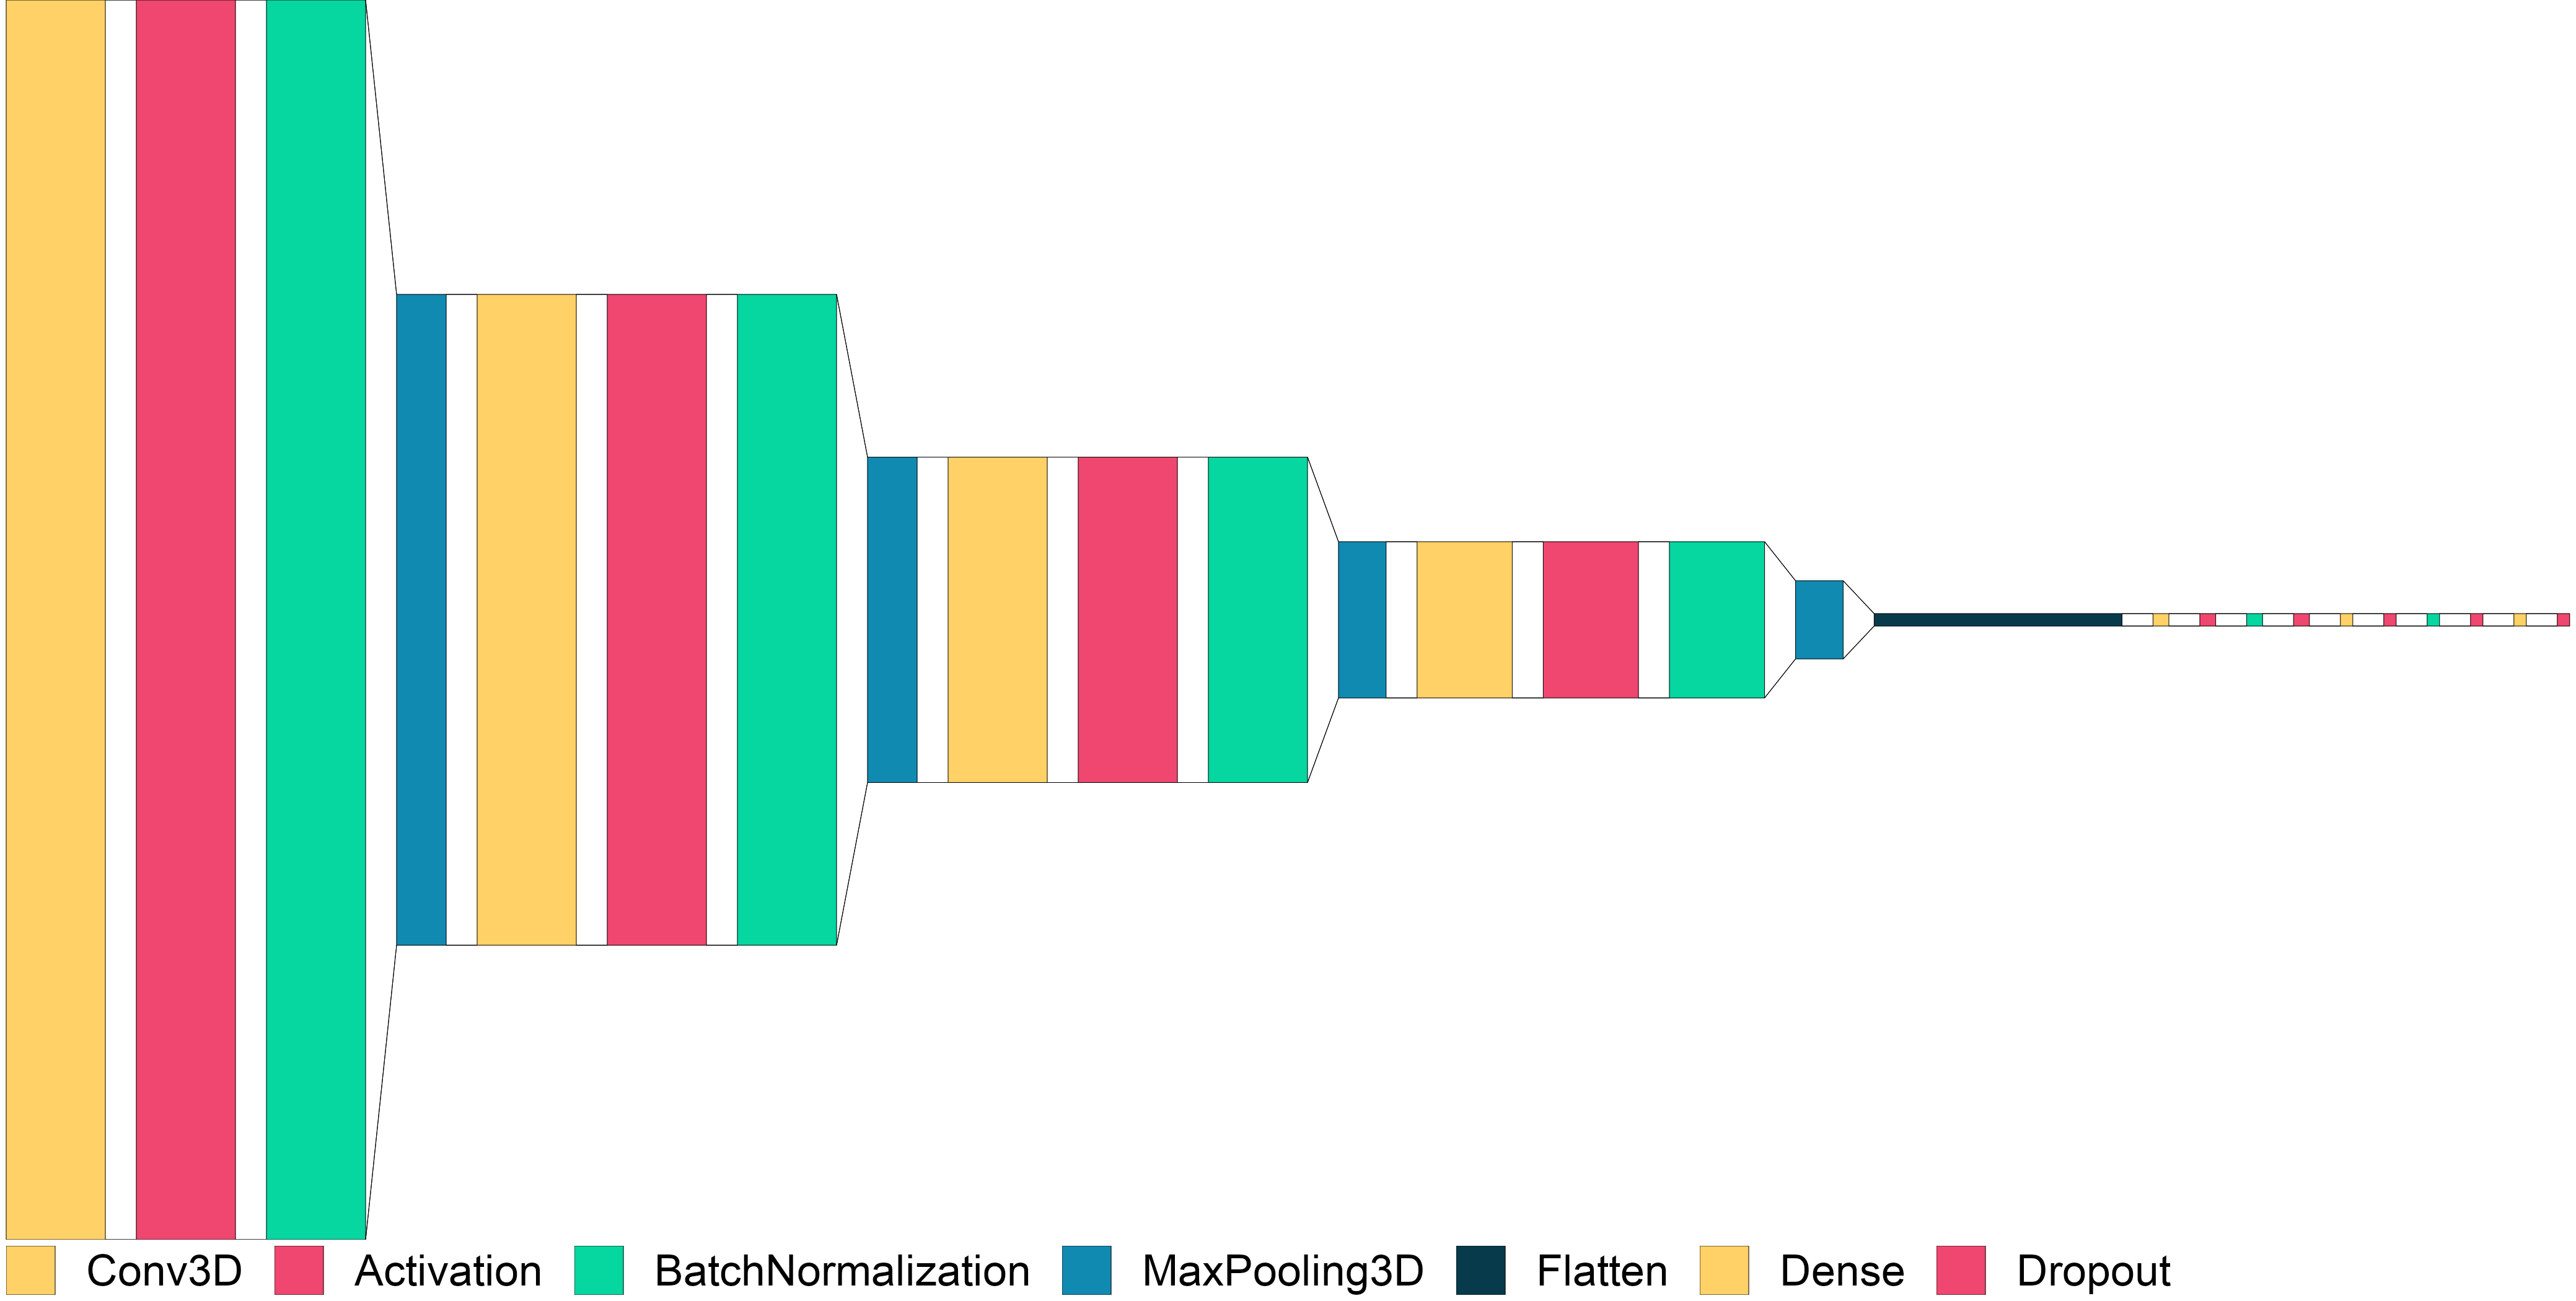

In [118]:
visualkeras.layered_view(model_12, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [119]:
history = model_12.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 2.0443 - categorical_accuracy: 0.3514
Epoch 00001: saving model to Model_12_2024-01-0615_48_01.067600/model-00001-2.04433-0.35143-23.09612-0.23000.h5
67/67 [==============================] - 187s 3s/step - loss: 2.0443 - categorical_accuracy: 0.3514 - val_loss: 23.0961 - val_categorical_accuracy: 0.2300 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.4863 - categorical_accuracy: 0.4721
Epoch 00002: saving model to Model_12_2024-01-0615_48_01.067600/model-00002-1.48625-0.47210-4.20458-0.24000.h5
67/67 [==============================] - 188s 3s/step - loss: 1.4863 - categorical_accuracy: 0.4721 - val_loss: 4.2046 - val_categorical_accuracy: 0.2400 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 1.2450 - categorical_accuracy: 0.5505
Epoch 00003: saving model to Model_12_2024-01-0615_48_01.067600/model-00003-1.24500-0.55053-1.91261-0.34000.h5
67/67 [======

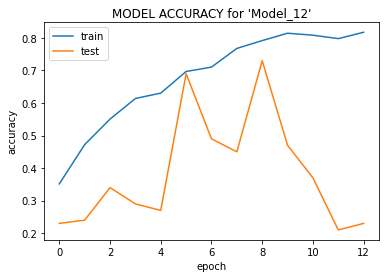

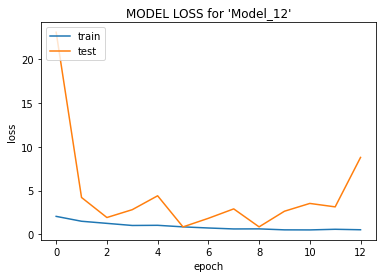

In [120]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [121]:
# Fetch statistics for populating model statistics workbook
total_params = model_12.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_12.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_12.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [122]:
write_model_details_worksheet(model_name, "Model-10 with image height and width adjusted to 100 and frames per video set to 30", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 30,
                             100, 100, 15, 32, "Adam", False, 0.002)

In [123]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-13: Specific model with image height and width adjusted to 120, frames per video set to 20, 3 dense layers and 3 layers of dropout layers with 0.25, 0.5 and 0.25 values </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 3 | (256, 128, 64) | (0.25, 0.50, 0.25) | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy |

In [124]:
def build_conv3D_model_13(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
                          kernel_size=default_kernel_size, strides=default_stride,
                          num_dense_layers=3, dense_layer_filters=(256,128,64),
                          num_images_per_video=default_num_images,
                          image_height=default_image_height, image_width=default_image_width, learning_rate = default_learning_rate):
    model = Sequential()
    
    is_valid_layer_details = verify_layer_details(num_hidden_layers, conv3d_filters)
    is_valid_dense_layer_details = verify_layer_details(num_dense_layers, dense_layer_filters, is_dense=True)
    
    print("Layer:{} --- Dense:{}".format(is_valid_layer_details, is_valid_dense_layer_details))
    
    # Input layer
    model.add(Conv3D(conv3d_filters[0], kernel_size, padding=default_padding_type,
                     input_shape=(num_images_per_video, image_height, image_width, default_channel_value)))
    model.add(Activation(default_layer_activation_func))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=default_pool_size))

    # Build hidden layers
    for x in range(num_hidden_layers):
        model.add(Conv3D(conv3d_filters[x+1], kernel_size, padding=default_padding_type))
        model.add(Activation(default_layer_activation_func))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=default_pool_size))
    
    model.add(Flatten())
                  
    # Build dense layers
    model.add(Dense(dense_layer_filters[0]))
    model.add(Activation(default_layer_activation_func))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(dense_layer_filters[1]))
    model.add(Activation(default_layer_activation_func))
    model.add(BatchNormalization())
    model.add(Dropout(0.50))
    
    model.add(Dense(dense_layer_filters[2]))
    model.add(Activation(default_layer_activation_func))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(num_classes))
    model.add(Activation(default_output_layer_activation_func))

    # Now that you have written the model, the next step is to `compile` the model. 
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])    
    
    return model

In [125]:
model_name = "Model_13"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_13 = build_conv3D_model_13()

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate()

val_generator   = generate(is_validation=True)

print (model_13.summary())

Layer:True --- Dense:True
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_44 (Conv3D)          (None, 20, 120, 120, 16)  1312      
                                                                 
 activation_75 (Activation)  (None, 20, 120, 120, 16)  0         
                                                                 
 batch_normalization_64 (Bat  (None, 20, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_44 (MaxPoolin  (None, 10, 60, 60, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_45 (Conv3D)          (None, 10, 60, 60, 32)    13856     
                                                                 
 activation_76 (Activation)

### Model-13 layer representation

In [126]:
#plot_model(model_13, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-13 diagram in 3D

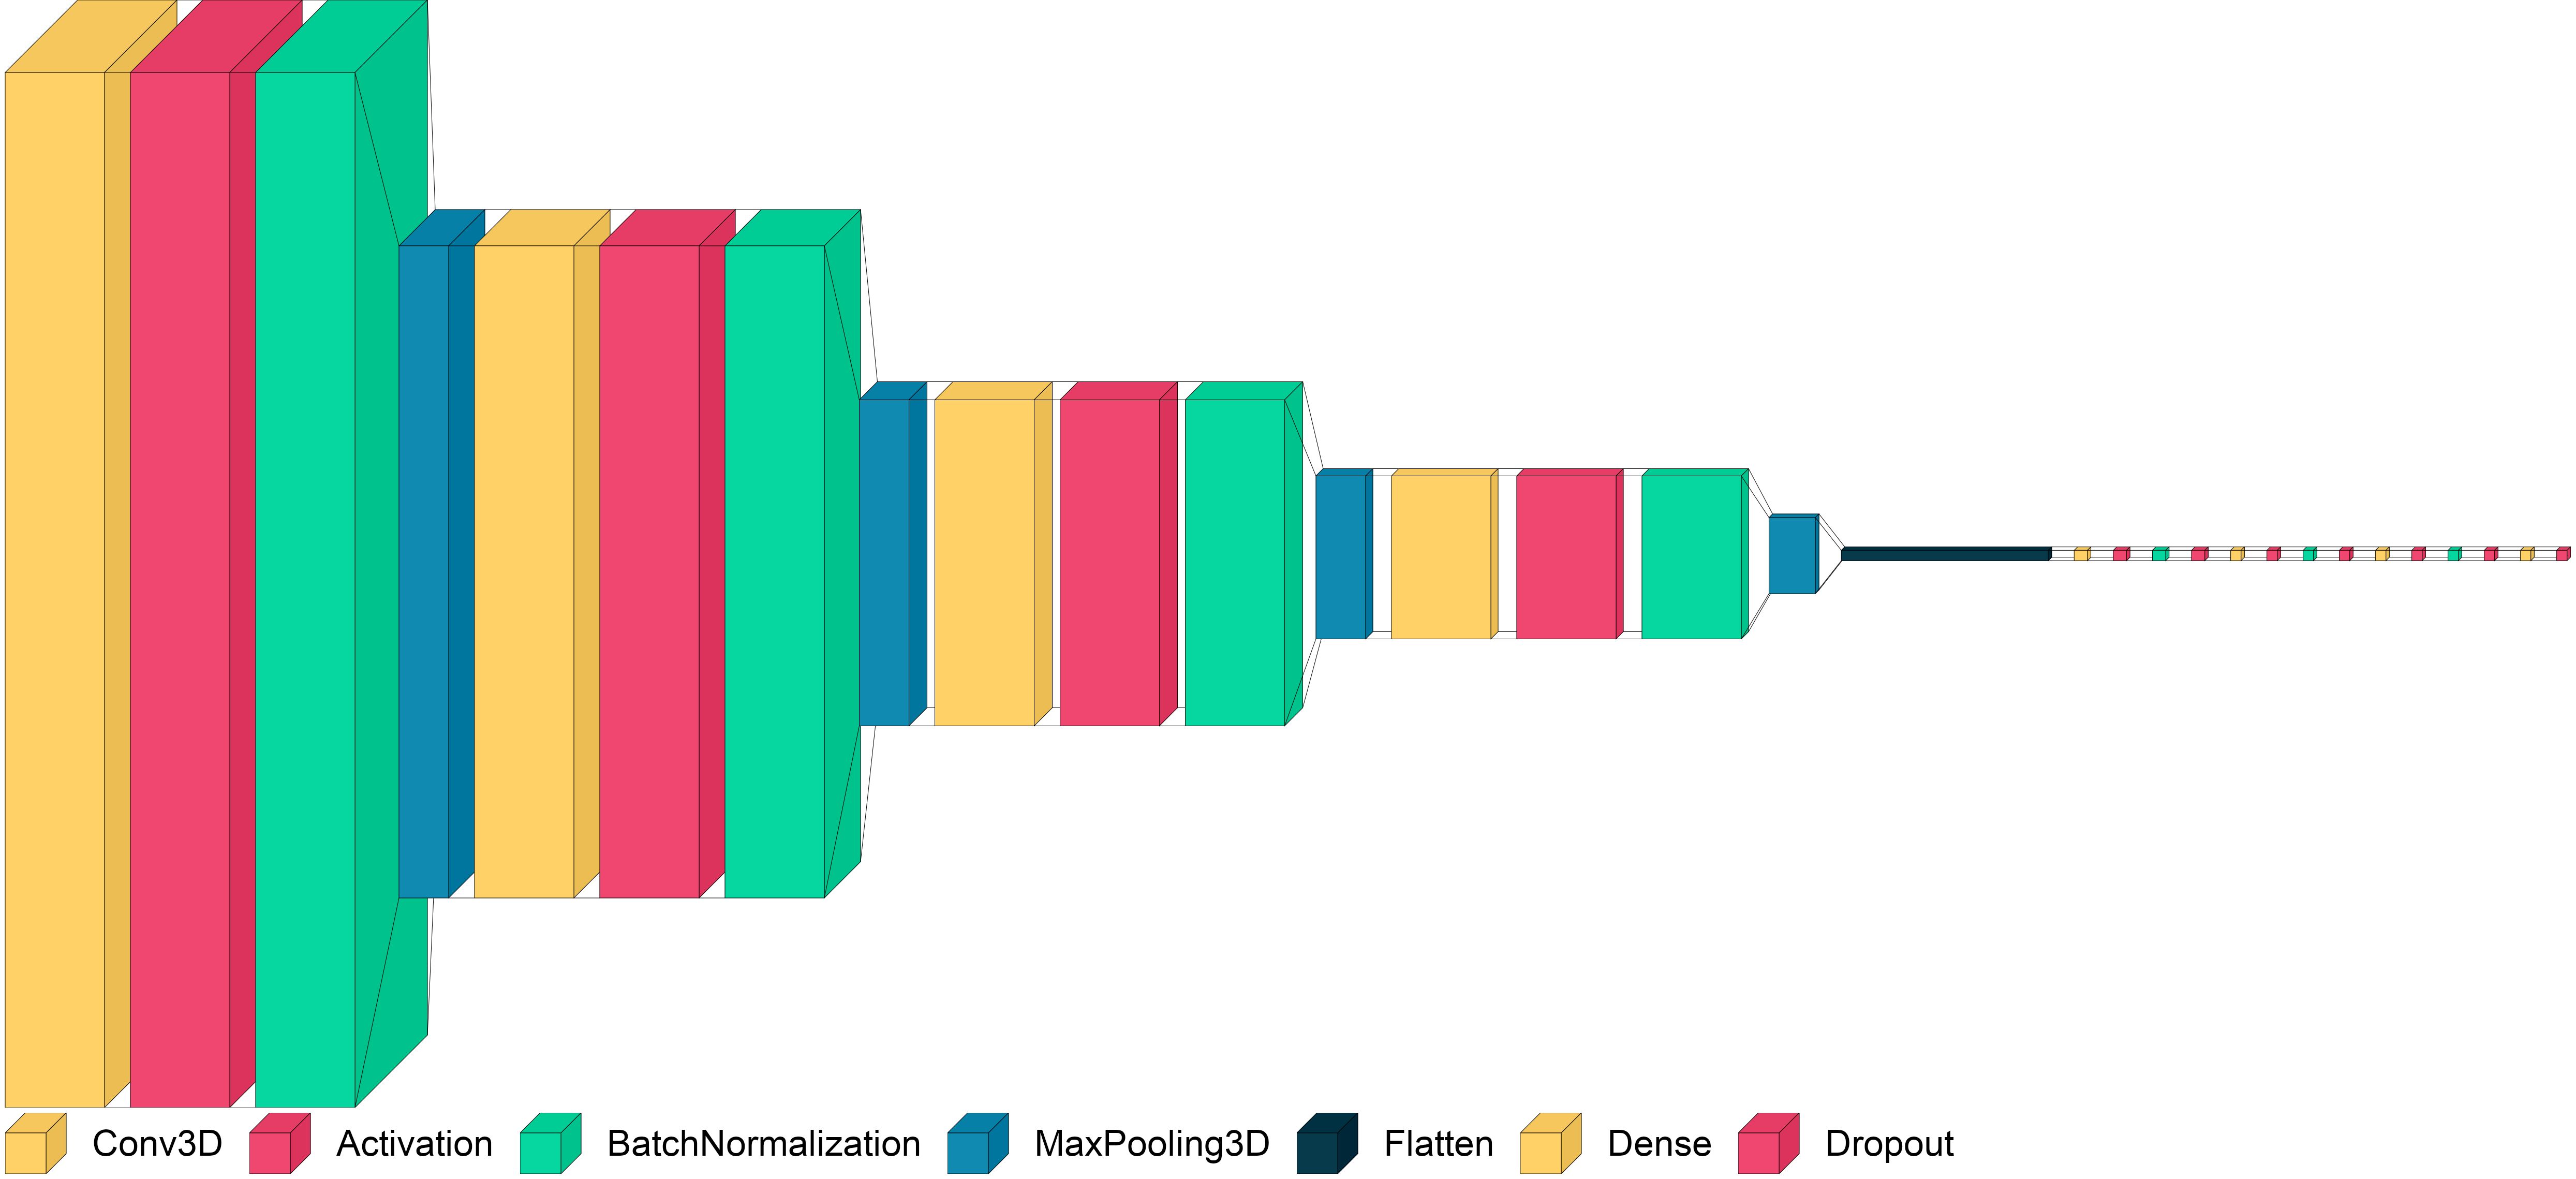

In [127]:
visualkeras.layered_view(model_13, spacing=50, legend=True, font=font, scale_xy=21)

### Model-13 diagram in 2D

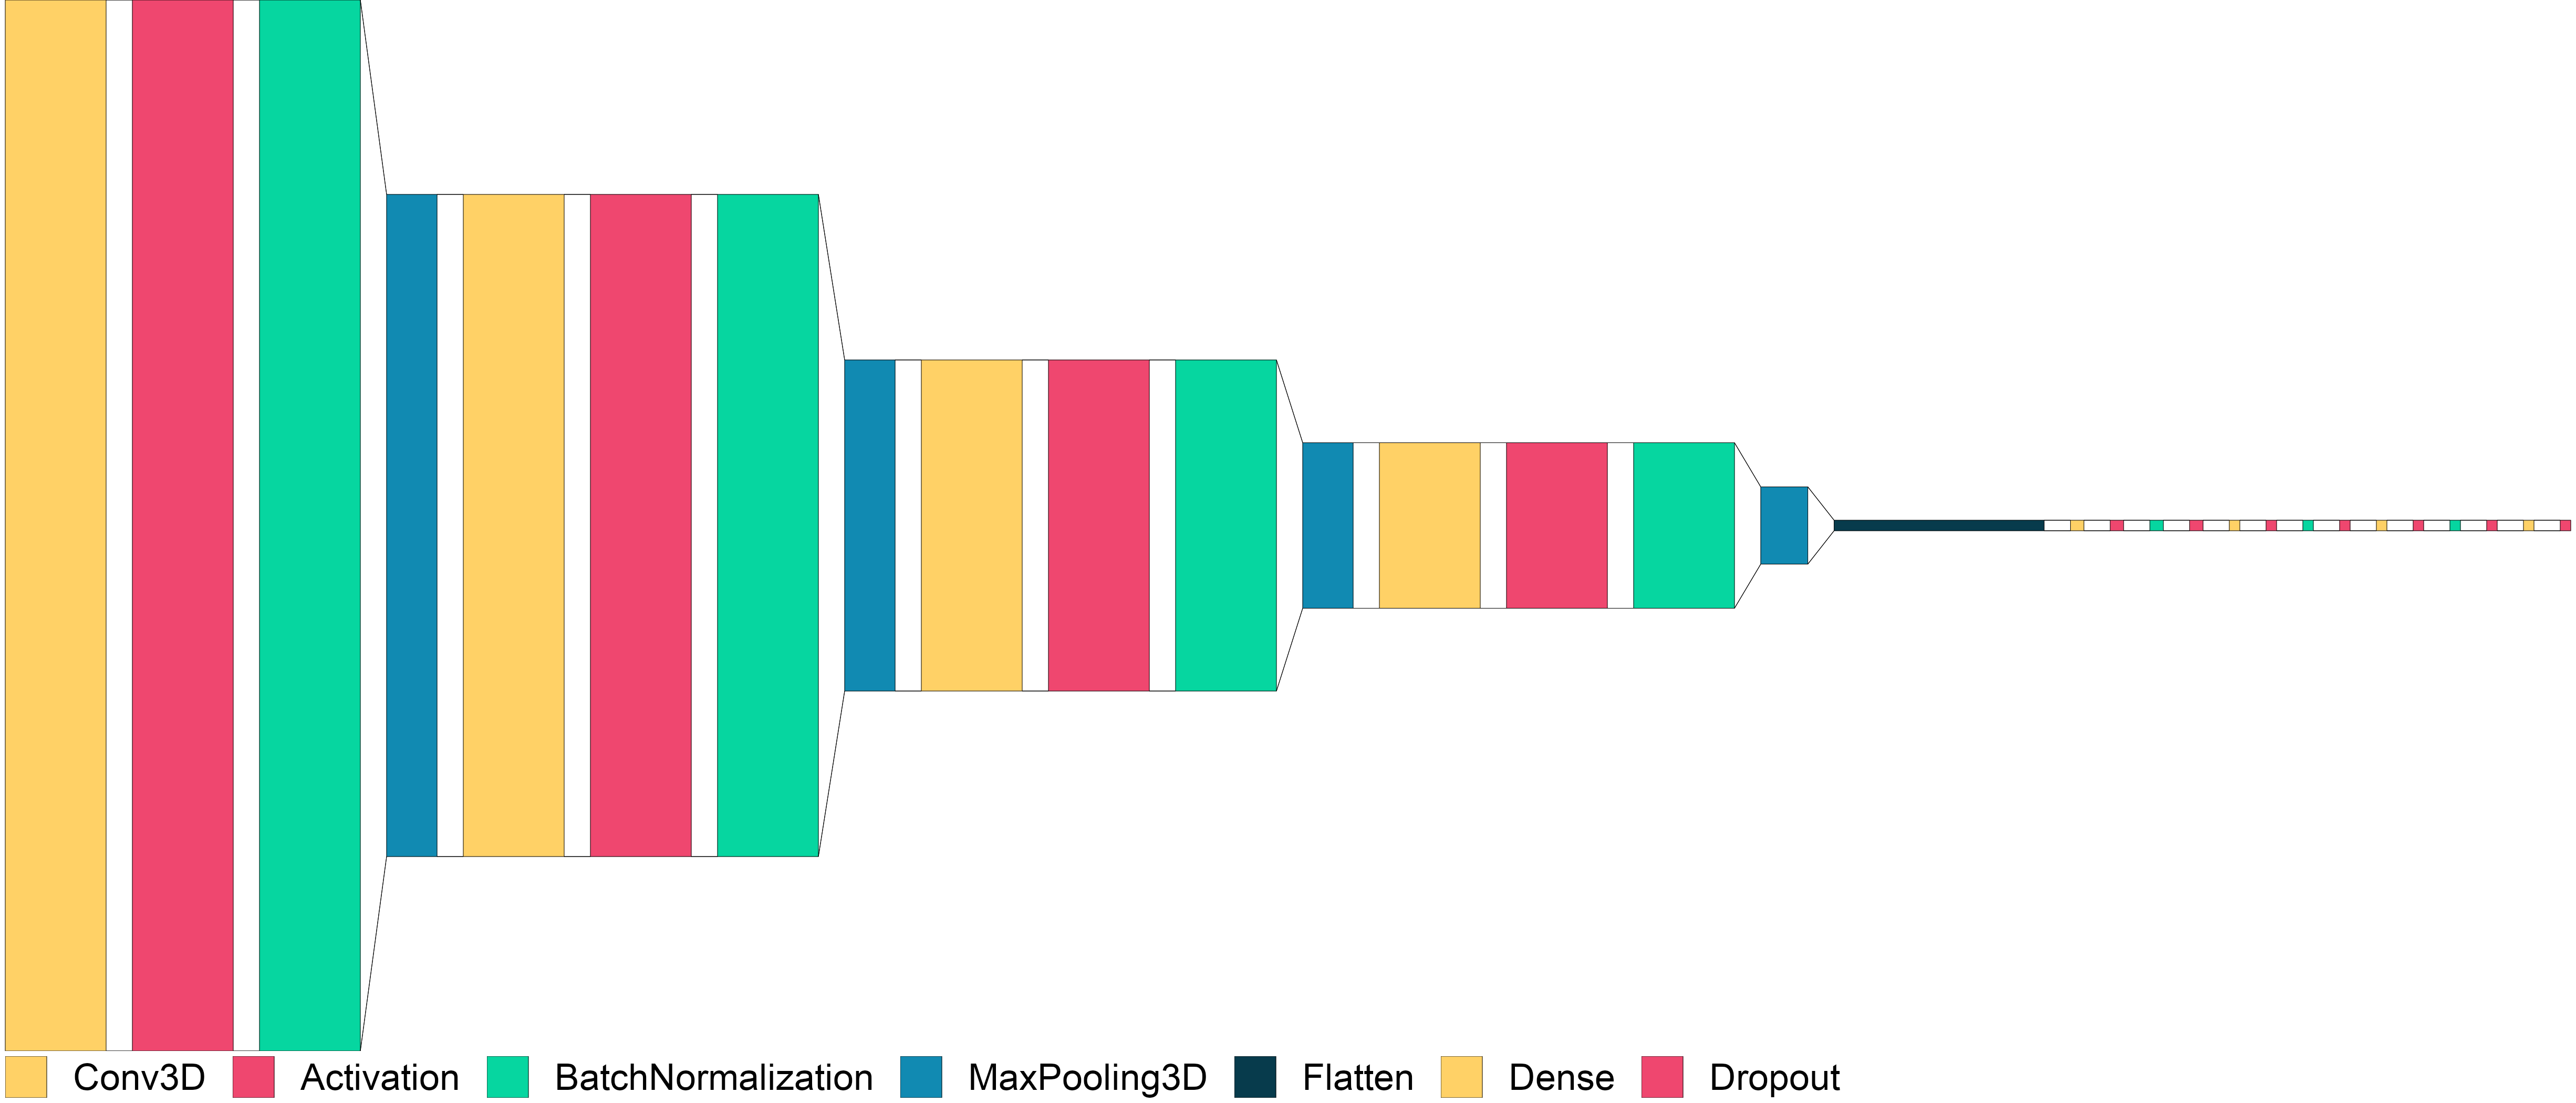

In [128]:
visualkeras.layered_view(model_13, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [129]:
history = model_13.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.7948 - categorical_accuracy: 0.3529
Epoch 00001: saving model to Model_13_2024-01-0615_48_01.067600/model-00001-1.79478-0.35294-4.11887-0.21000.h5
67/67 [==============================] - 133s 2s/step - loss: 1.7948 - categorical_accuracy: 0.3529 - val_loss: 4.1189 - val_categorical_accuracy: 0.2100 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.3748 - categorical_accuracy: 0.4842
Epoch 00002: saving model to Model_13_2024-01-0615_48_01.067600/model-00002-1.37480-0.48416-3.78951-0.16000.h5
67/67 [==============================] - 128s 2s/step - loss: 1.3748 - categorical_accuracy: 0.4842 - val_loss: 3.7895 - val_categorical_accuracy: 0.1600 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 1.1482 - categorical_accuracy: 0.5279
Epoch 00003: saving model to Model_13_2024-01-0615_48_01.067600/model-00003-1.14822-0.52790-3.47492-0.31000.h5
67/67 [========

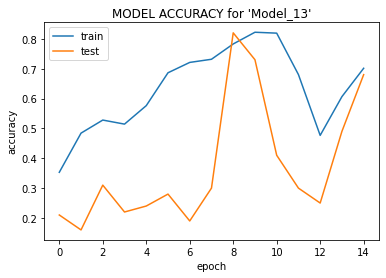

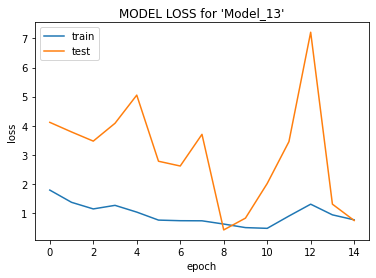

In [130]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [131]:
# Fetch statistics for populating model statistics workbook
total_params = model_13.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_13.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_13.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [132]:
write_model_details_worksheet(model_name, "Specific model with image height and width adjusted to 120, frames per video set to 20, 3 dense layers and 3 layers of dropout layers with 0.25, 0.5 and 0.25 values", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [133]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-14: Specific model with image height and width adjusted to 120, frames per video set to 20, 2 dense layers and 2 layers of dropout layers with 0.25, 0.5 values </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256, 128) | (0.25, 0.50) | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.002 |

In [134]:
def build_conv3D_model_14(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
                          kernel_size=default_kernel_size, strides=default_stride,
                          num_dense_layers=2, dense_layer_filters=(256,128),
                          num_images_per_video=default_num_images,
                          image_height=default_image_height, image_width=default_image_width, learning_rate = default_learning_rate):
    model = Sequential()
    
    is_valid_layer_details = verify_layer_details(num_hidden_layers, conv3d_filters)
    is_valid_dense_layer_details = verify_layer_details(num_dense_layers, dense_layer_filters, is_dense=True)
    
    print("Layer:{} --- Dense:{}".format(is_valid_layer_details, is_valid_dense_layer_details))
    
    # Input layer
    model.add(Conv3D(conv3d_filters[0], kernel_size, padding=default_padding_type,
                     input_shape=(num_images_per_video, image_height, image_width, default_channel_value)))
    model.add(Activation(default_layer_activation_func))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=default_pool_size))

    # Build hidden layers
    for x in range(num_hidden_layers):
        model.add(Conv3D(conv3d_filters[x+1], kernel_size, padding=default_padding_type))
        model.add(Activation(default_layer_activation_func))
        model.add(BatchNormalization())
        model.add(MaxPooling3D(pool_size=default_pool_size))
    
    model.add(Flatten())
                  
    # Build dense layers
    model.add(Dense(dense_layer_filters[0]))
    model.add(Activation(default_layer_activation_func))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(dense_layer_filters[1]))
    model.add(Activation(default_layer_activation_func))
    model.add(BatchNormalization())
    model.add(Dropout(0.50))

    model.add(Dense(num_classes))
    model.add(Activation(default_output_layer_activation_func))

    # Now that you have written the model, the next step is to `compile` the model. 
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])    
    
    return model

In [135]:
model_name = "Model_14"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_14 = build_conv3D_model_14()

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate()

val_generator   = generate(is_validation=True)

print (model_14.summary())

Layer:True --- Dense:True
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_48 (Conv3D)          (None, 20, 120, 120, 16)  1312      
                                                                 
 activation_83 (Activation)  (None, 20, 120, 120, 16)  0         
                                                                 
 batch_normalization_71 (Bat  (None, 20, 120, 120, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_48 (MaxPoolin  (None, 10, 60, 60, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_49 (Conv3D)          (None, 10, 60, 60, 32)    13856     
                                                                 
 activation_84 (Activation)

### Model-14 layer representation

In [136]:
#plot_model(model_14, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-14 diagram in 3D

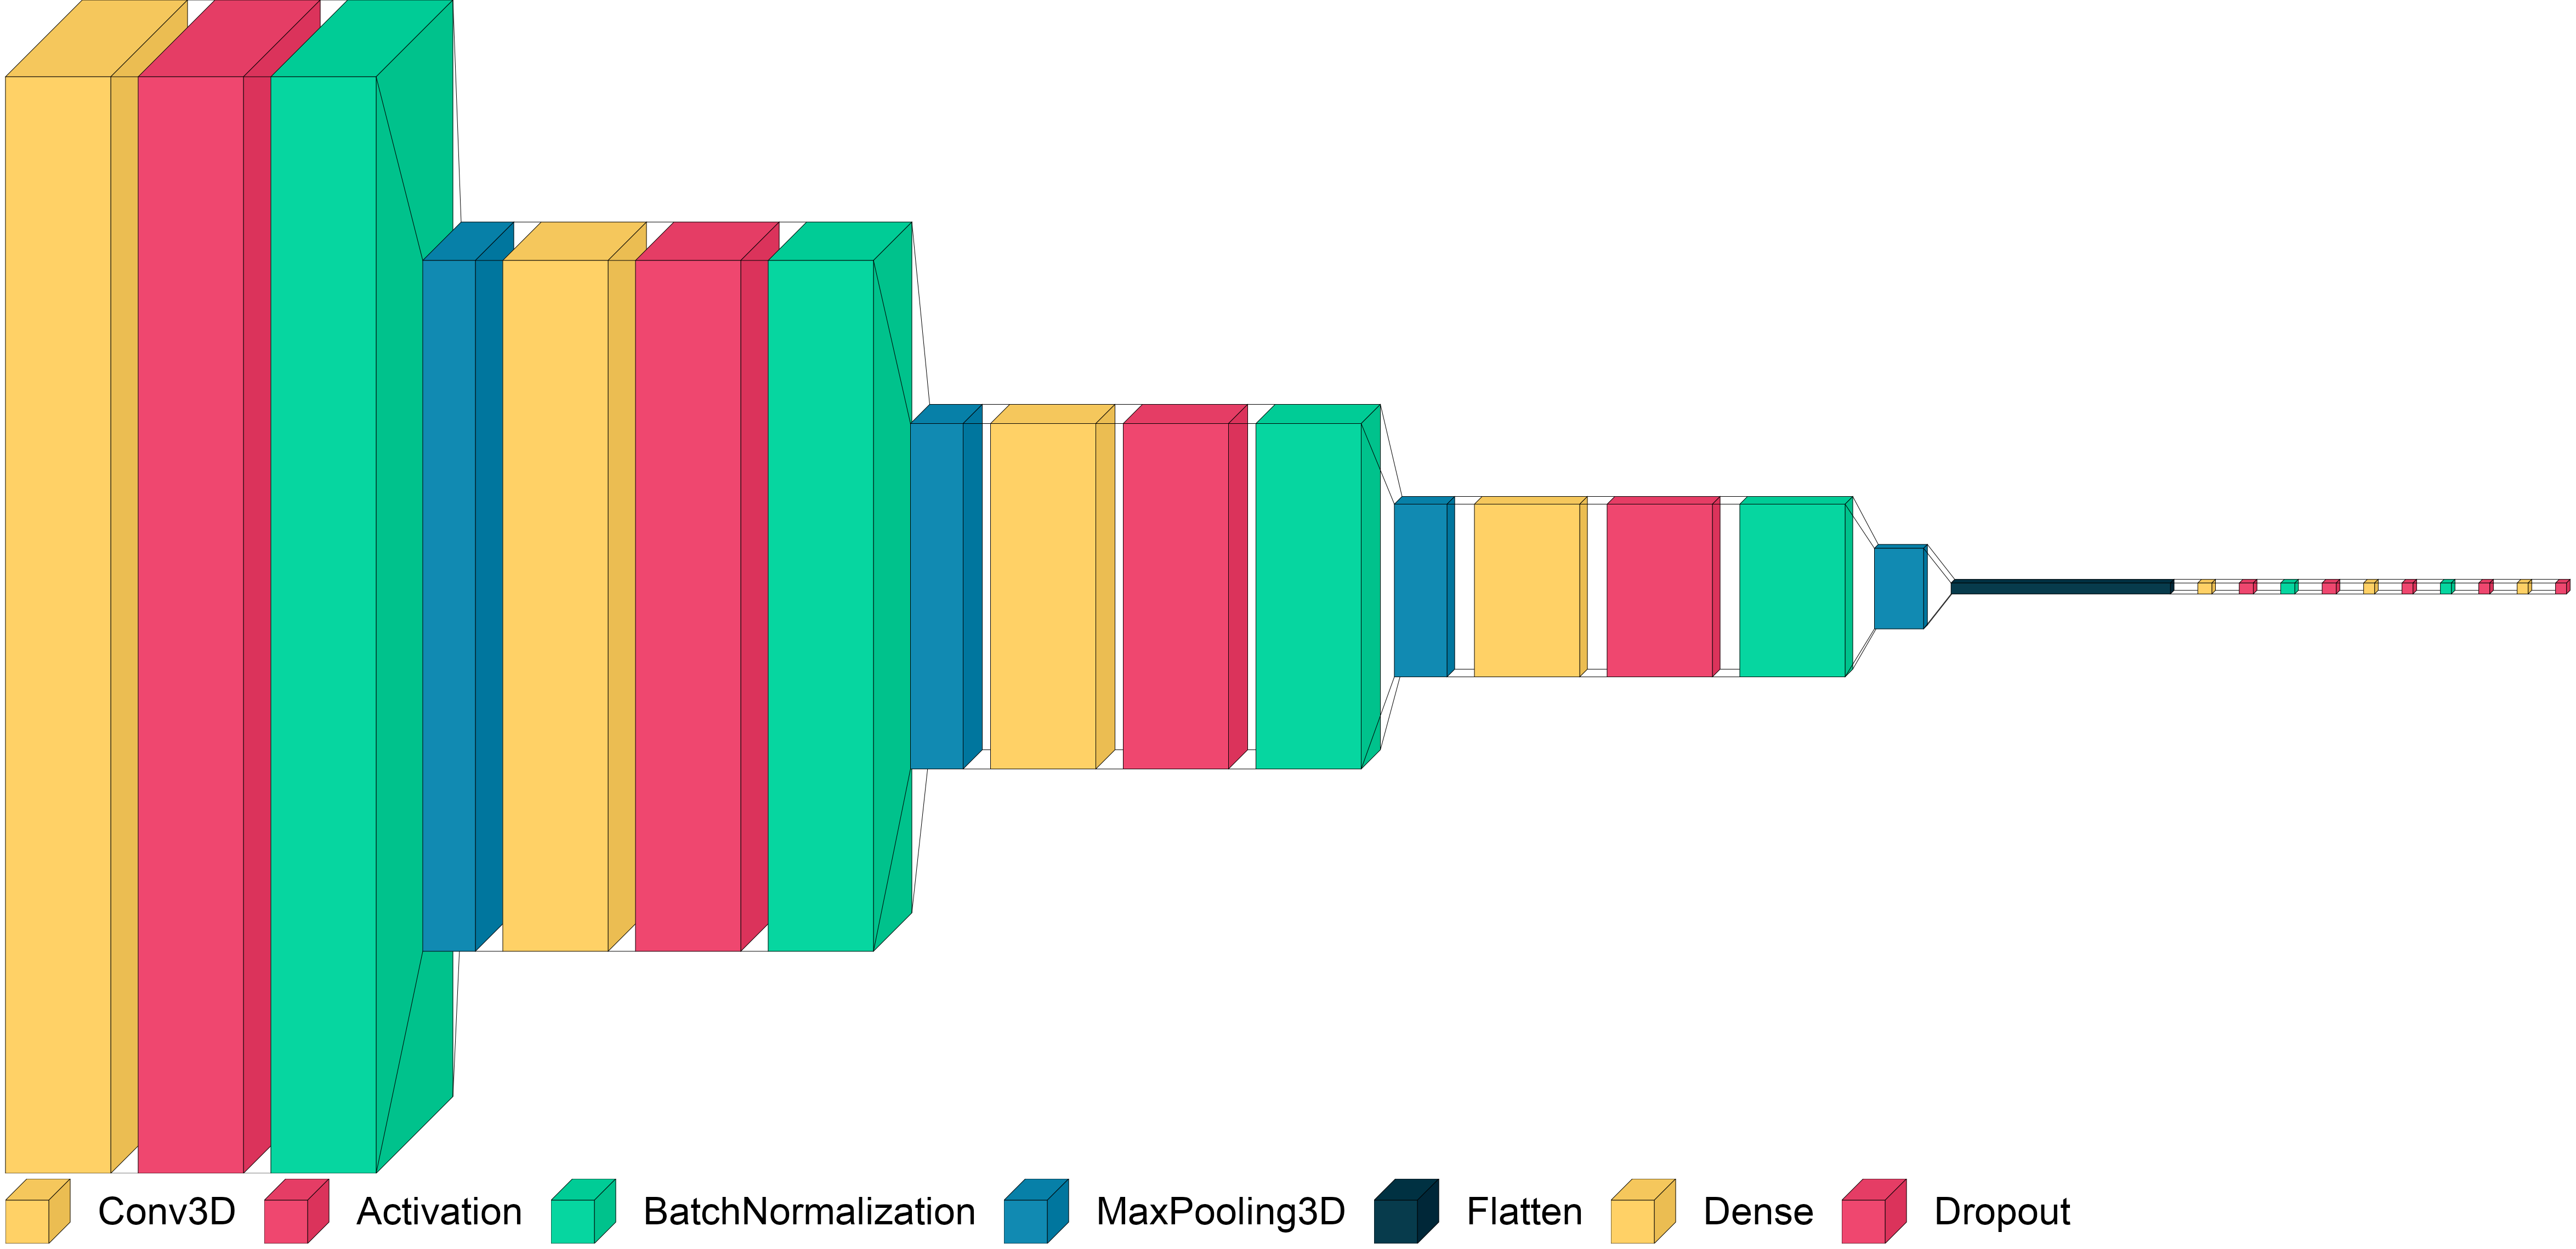

In [137]:
visualkeras.layered_view(model_14, spacing=50, legend=True, font=font, scale_xy=21)

### Model-14 diagram in 2D

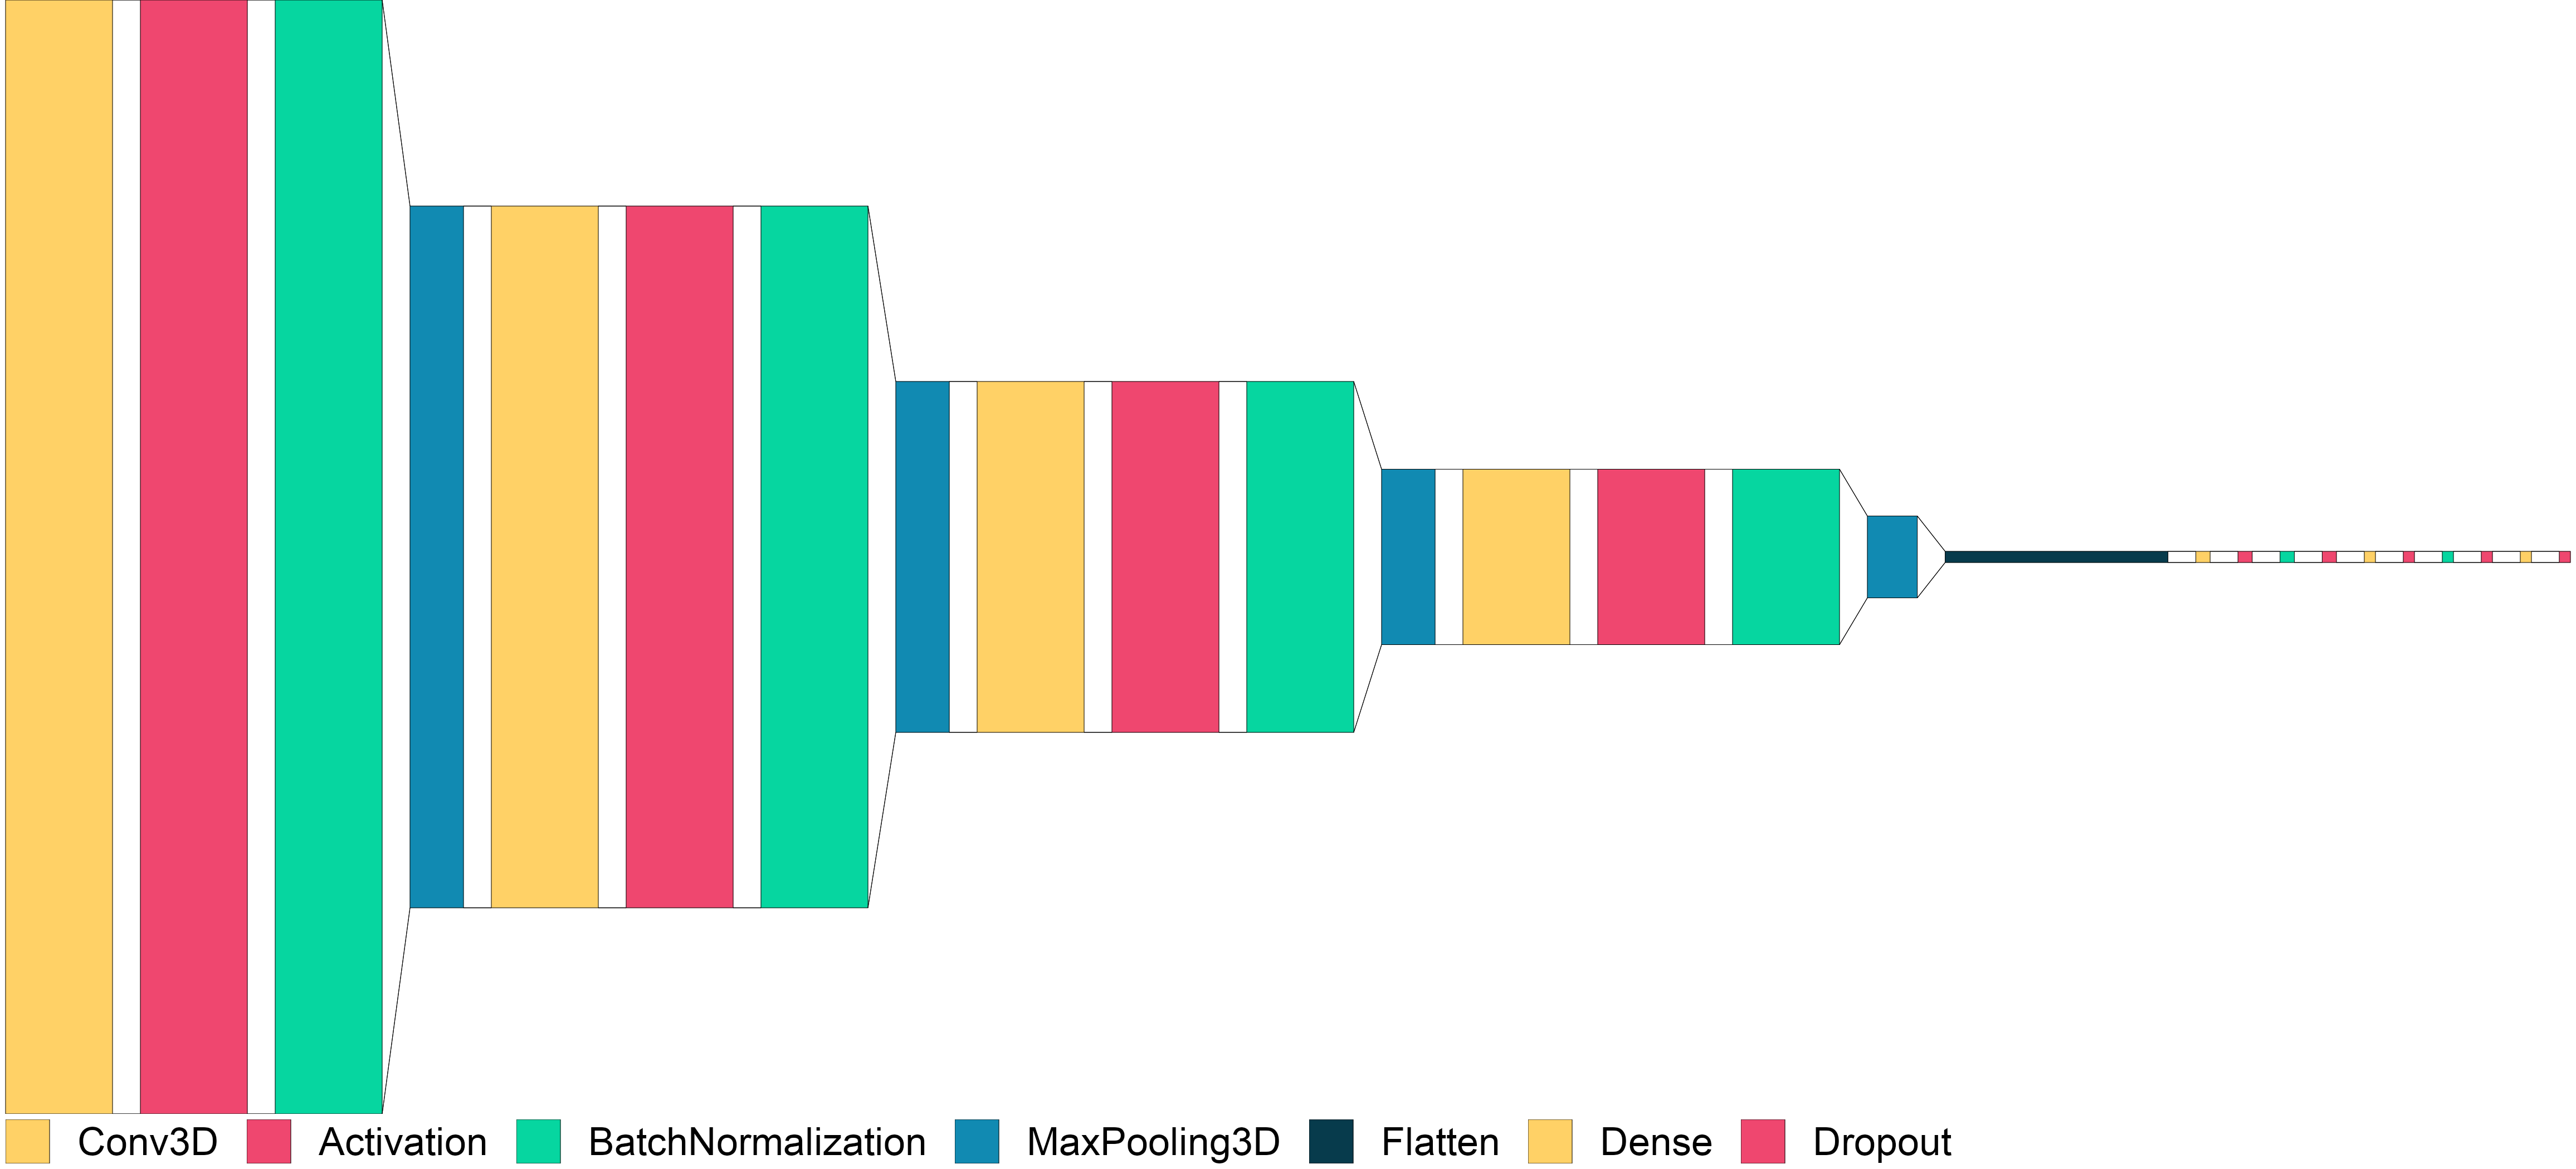

In [138]:
visualkeras.layered_view(model_14, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [139]:
history = model_14.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.9916 - categorical_accuracy: 0.3499
Epoch 00001: saving model to Model_14_2024-01-0615_48_01.067600/model-00001-1.99161-0.34992-1.98522-0.37000.h5
67/67 [==============================] - 129s 2s/step - loss: 1.9916 - categorical_accuracy: 0.3499 - val_loss: 1.9852 - val_categorical_accuracy: 0.3700 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.4559 - categorical_accuracy: 0.4827
Epoch 00002: saving model to Model_14_2024-01-0615_48_01.067600/model-00002-1.45590-0.48265-3.44041-0.20000.h5
67/67 [==============================] - 127s 2s/step - loss: 1.4559 - categorical_accuracy: 0.4827 - val_loss: 3.4404 - val_categorical_accuracy: 0.2000 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 1.2108 - categorical_accuracy: 0.5535
Epoch 00003: saving model to Model_14_2024-01-0615_48_01.067600/model-00003-1.21082-0.55354-5.23483-0.24000.h5
67/67 [========

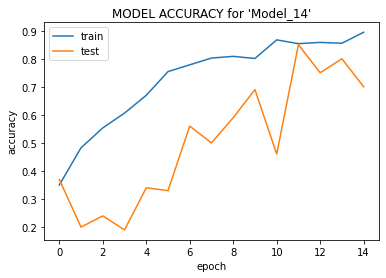

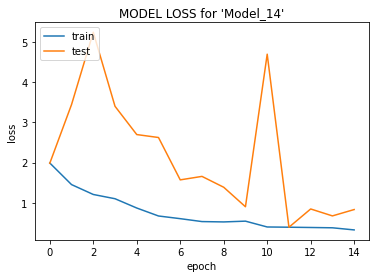

In [140]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [141]:
# Fetch statistics for populating model statistics workbook
total_params = model_14.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_14.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_14.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [142]:
write_model_details_worksheet(model_name, "Specific model with image height and width adjusted to 120, frames per video set to 20, 2 dense layers and 2 layers of dropout layers with 0.25, 0.5 values", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.002)

In [143]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-15: Model-4 with augmentation </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (128, 64, 32, 16) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 20 | 120 | 120 | same | 15 | 32 | True | Adam | categorical_crossentropy | categorical_accuracy | 0.002

In [21]:
model_name = "Model_15"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_15 = build_conv3D_model(conv3d_filters=(128, 64, 32, 16))

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(augment=True)

val_generator   = generate(augment=True, is_validation=True)

print (model_15.summary())

Layer:True --- Dense:True


2024-01-07 02:32:47.139068: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1d:00.0, compute capability: 7.5


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 120, 120, 128  10496     
                             )                                   
                                                                 
 activation (Activation)     (None, 20, 120, 120, 128  0         
                             )                                   
                                                                 
 batch_normalization (BatchN  (None, 20, 120, 120, 128  512      
 ormalization)               )                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 60, 60, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 10, 60, 60, 64)    2

### Model-15 layer representation

In [22]:
# plot_model(model_15, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-15 diagram in 3D

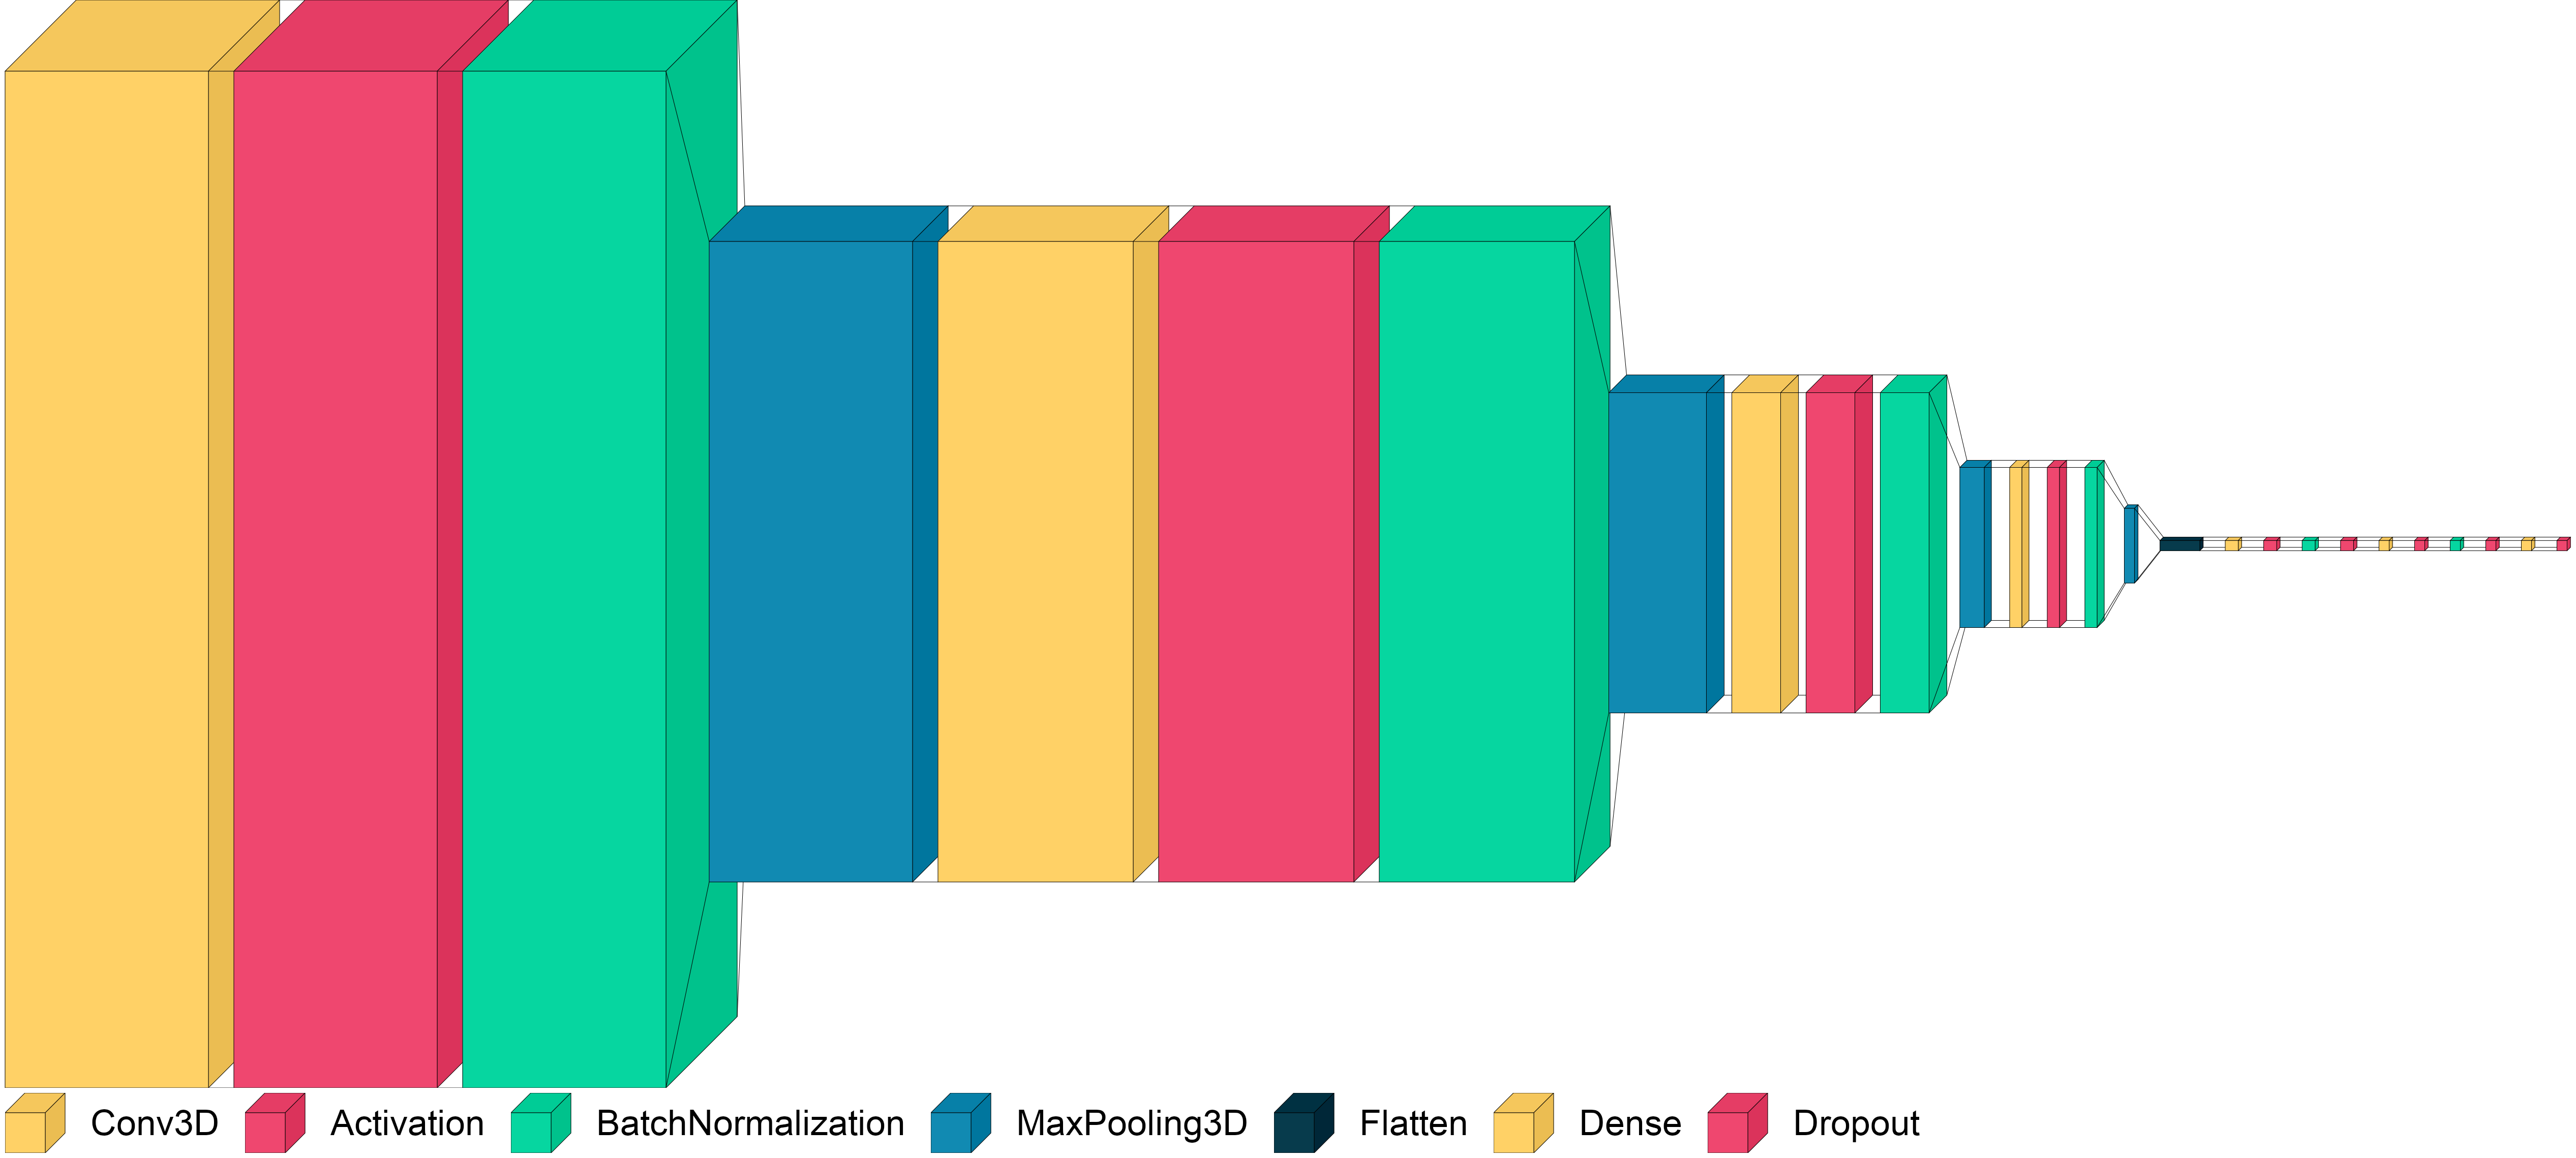

In [23]:
visualkeras.layered_view(model_15, spacing=50, legend=True, font=font, scale_xy=21)

### Model-15 diagram in 2D

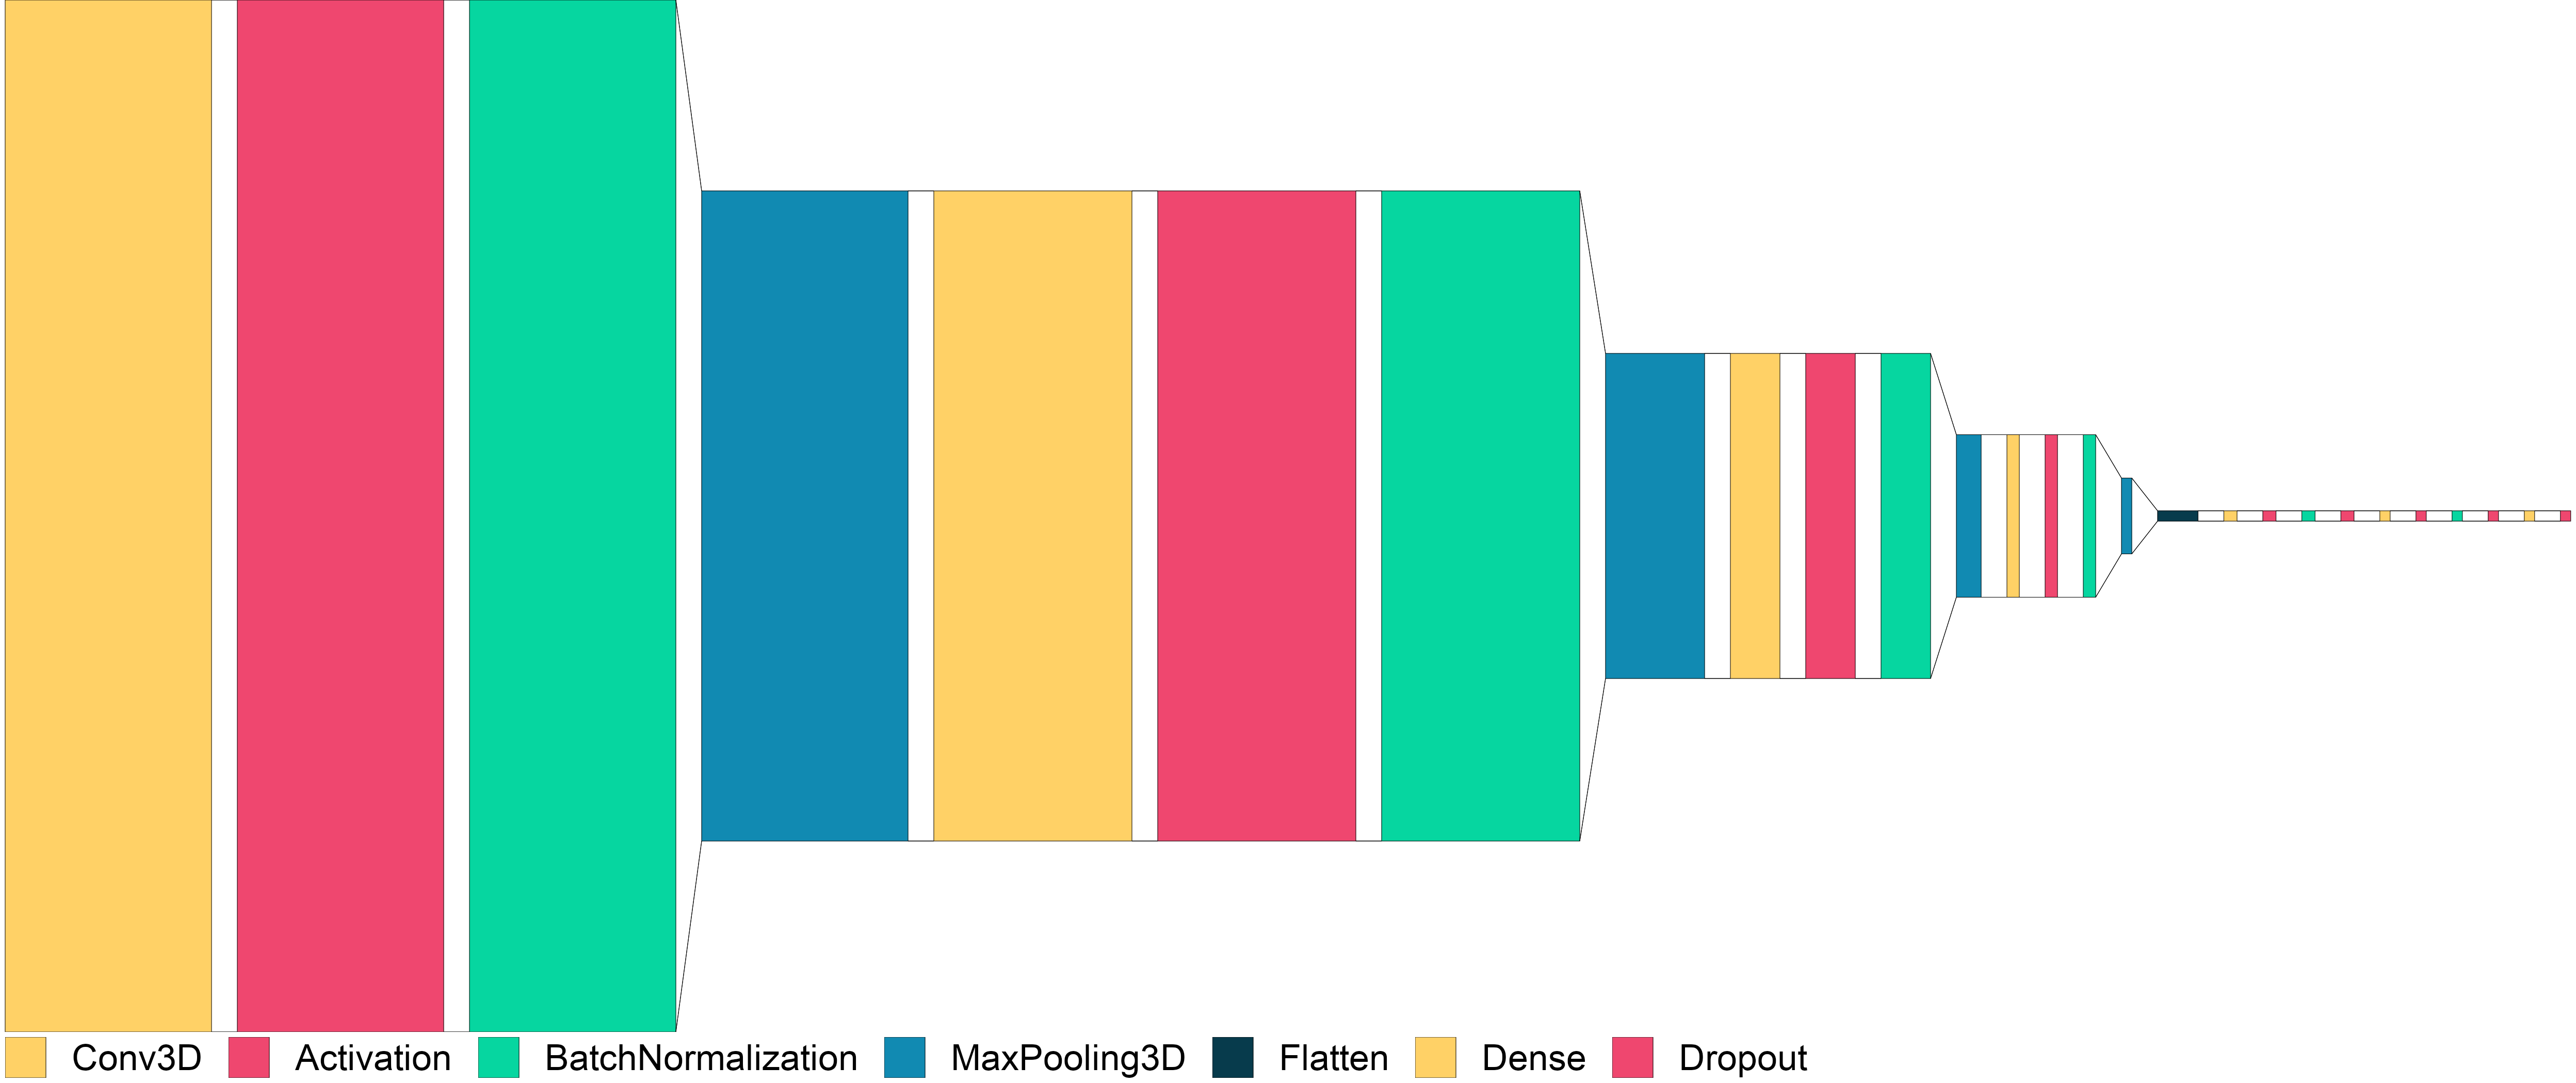

In [24]:
visualkeras.layered_view(model_15, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [25]:
history = model_15.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15


2024-01-07 02:32:59.670720: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


67/67 [==============================] - ETA: 0s - loss: 1.6737 - categorical_accuracy: 0.3786
Epoch 00001: saving model to Model_15_2024-01-0702_31_47.619207/model-00001-1.67368-0.37858-1.74603-0.33000.h5
67/67 [==============================] - 156s 2s/step - loss: 1.6737 - categorical_accuracy: 0.3786 - val_loss: 1.7460 - val_categorical_accuracy: 0.3300 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.0313 - categorical_accuracy: 0.5701
Epoch 00002: saving model to Model_15_2024-01-0702_31_47.619207/model-00002-1.03128-0.57014-2.24856-0.29000.h5
67/67 [==============================] - 152s 2s/step - loss: 1.0313 - categorical_accuracy: 0.5701 - val_loss: 2.2486 - val_categorical_accuracy: 0.2900 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.9716 - categorical_accuracy: 0.6184
Epoch 00003: saving model to Model_15_2024-01-0702_31_47.619207/model-00003-0.97165-0.61840-2.28167-0.26000.h5
67/67 [===================

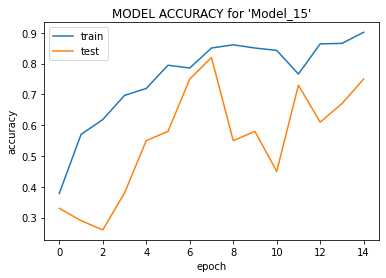

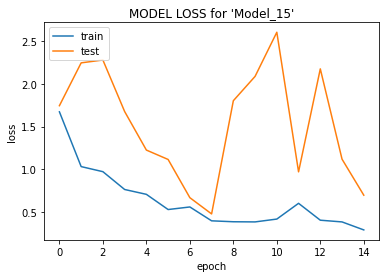

In [26]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [27]:
# Fetch statistics for populating model statistics workbook
total_params = model_15.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_15.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_15.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [28]:
write_model_details_worksheet(model_name, "Model-4 with augmentation", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", True, 0.002)

In [29]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-16: Model-7 with augmentation </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 20 | 160 | 160 | same | 15 | 32 | True | Adam | categorical_crossentropy | categorical_accuracy | 0.002

In [30]:
model_name = "Model_16"

# def generate(batch_size = batch_size, num_images=default_num_images, height=default_image_height,
#              width=default_image_width, augment=default_perform_augment, is_validation=True):

# def build_conv3D_model(num_hidden_layers=default_hidden_layer_count, conv3d_filters=default_conv3d_filters,
#                        kernel_size=default_kernel_size, strides=default_stride,
#                        num_dense_layers=default_dense_layer_count, dense_layer_filters=default_dense_filters,
#                        dropout_val = default_dropout_value, num_images_per_video=default_num_images,
#                        image_height=default_image_height, image_width=default_image_width):


model_16 = build_conv3D_model(image_height=160, image_width=160)

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(augment=True, image_height=160, image_width=160)

val_generator   = generate(augment=True, image_height=160, image_width=160, is_validation=True)

print (model_16.summary())

Layer:True --- Dense:True
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 20, 160, 160, 16)  1312      
                                                                 
 activation_7 (Activation)   (None, 20, 160, 160, 16)  0         
                                                                 
 batch_normalization_6 (Batc  (None, 20, 160, 160, 16)  64       
 hNormalization)                                                 
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 10, 80, 80, 16)   0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 10, 80, 80, 32)    13856     
                                                                 
 activation_8 (Activation)  

### Model-16 layer representation

In [31]:
# plot_model(model_16, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-16 diagram in 3D

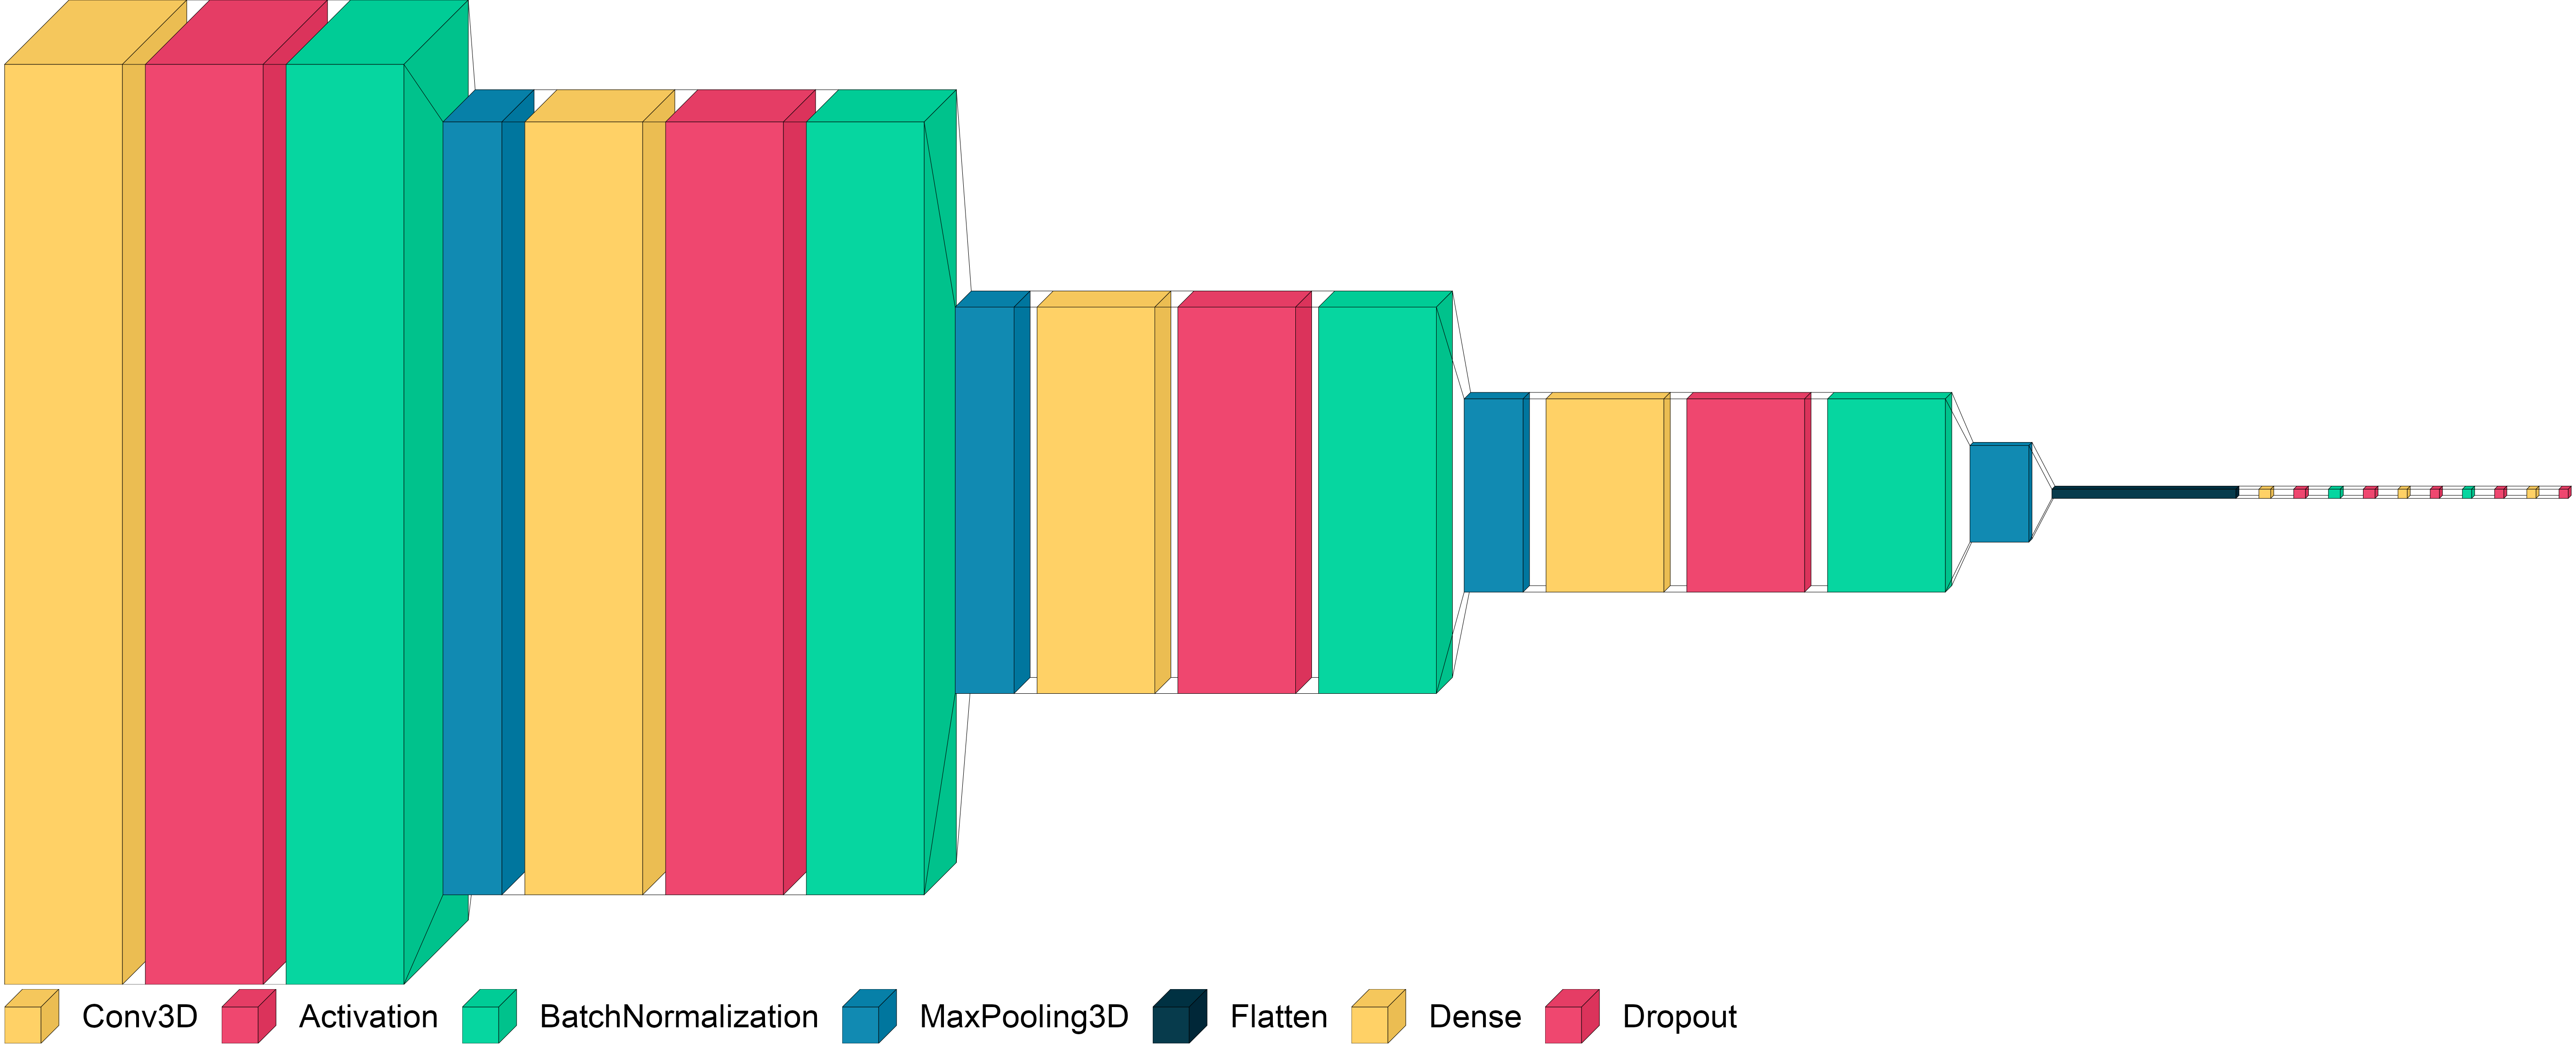

In [32]:
visualkeras.layered_view(model_16, spacing=50, legend=True, font=font, scale_xy=21)

### Model-16 diagram in 2D

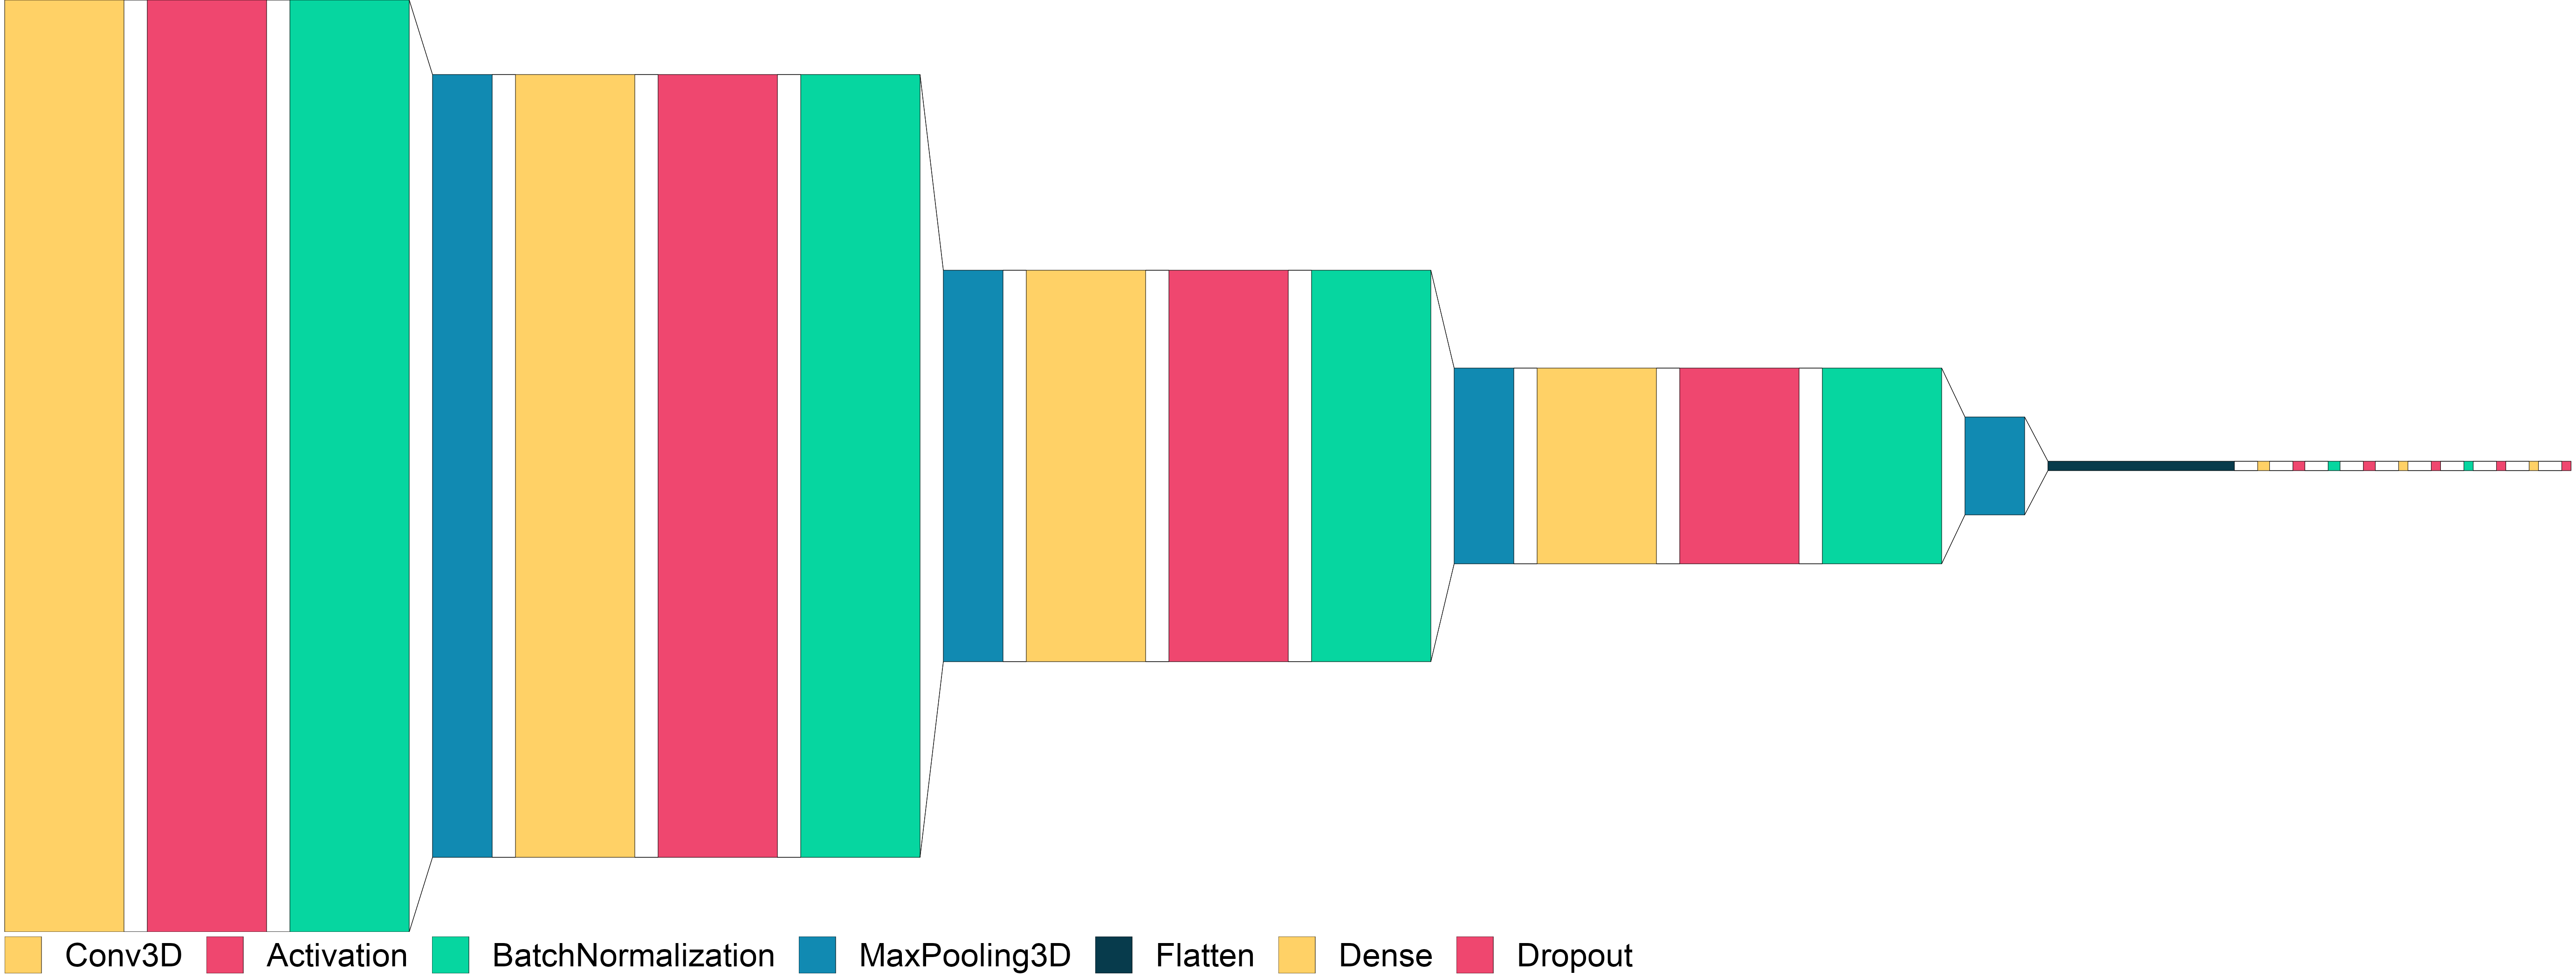

In [33]:
visualkeras.layered_view(model_16, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [34]:
history = model_16.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.4697 - categorical_accuracy: 0.4766
Epoch 00001: saving model to Model_16_2024-01-0702_31_47.619207/model-00001-1.46967-0.47662-2.18107-0.27000.h5
67/67 [==============================] - 178s 3s/step - loss: 1.4697 - categorical_accuracy: 0.4766 - val_loss: 2.1811 - val_categorical_accuracy: 0.2700 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.0943 - categorical_accuracy: 0.5732
Epoch 00002: saving model to Model_16_2024-01-0702_31_47.619207/model-00002-1.09429-0.57315-2.91964-0.20000.h5
67/67 [==============================] - 176s 3s/step - loss: 1.0943 - categorical_accuracy: 0.5732 - val_loss: 2.9196 - val_categorical_accuracy: 0.2000 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.8161 - categorical_accuracy: 0.6833
Epoch 00003: saving model to Model_16_2024-01-0702_31_47.619207/model-00003-0.81606-0.68326-4.13418-0.21000.h5
67/67 [========

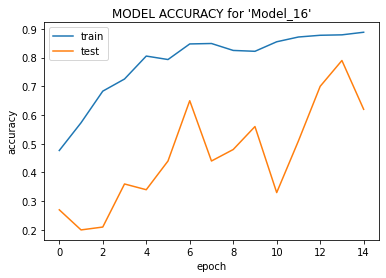

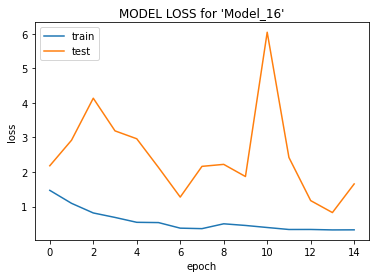

In [35]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [36]:
# Fetch statistics for populating model statistics workbook
total_params = model_16.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_16.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_16.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [37]:
write_model_details_worksheet(model_name, "Model-7 with Augmentation", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             160, 160, 15, 32, "Adam", True, 0.002)

In [38]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-17: Default CONV3D model with Augmentation</center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3) | (1,1,1) | 2 | (256,128) | 0.0 | 20 | 120 | 120 | same | 15 | 32 | True | Adam | categorical_crossentropy | categorical_accuracy | 0.002 |

In [21]:
model_name = "Model_17"

model_17 = build_conv3D_model()

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(augment=True)

val_generator = generate(augment=True, is_validation=True)

print (model_17.summary())

2024-01-07 11:25:10.572439: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1c:00.0, compute capability: 7.5


Layer:True --- Dense:True
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 120, 120, 16)  1312      
                                                                 
 activation (Activation)     (None, 20, 120, 120, 16)  0         
                                                                 
 batch_normalization (BatchN  (None, 20, 120, 120, 16)  64       
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 60, 60, 16)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 10, 60, 60, 32)    13856     
                                                                 
 activation_1 (Activation)   (

### Model-17 layer representation

In [22]:
# plot_model(model_17, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-17 diagram in 3D

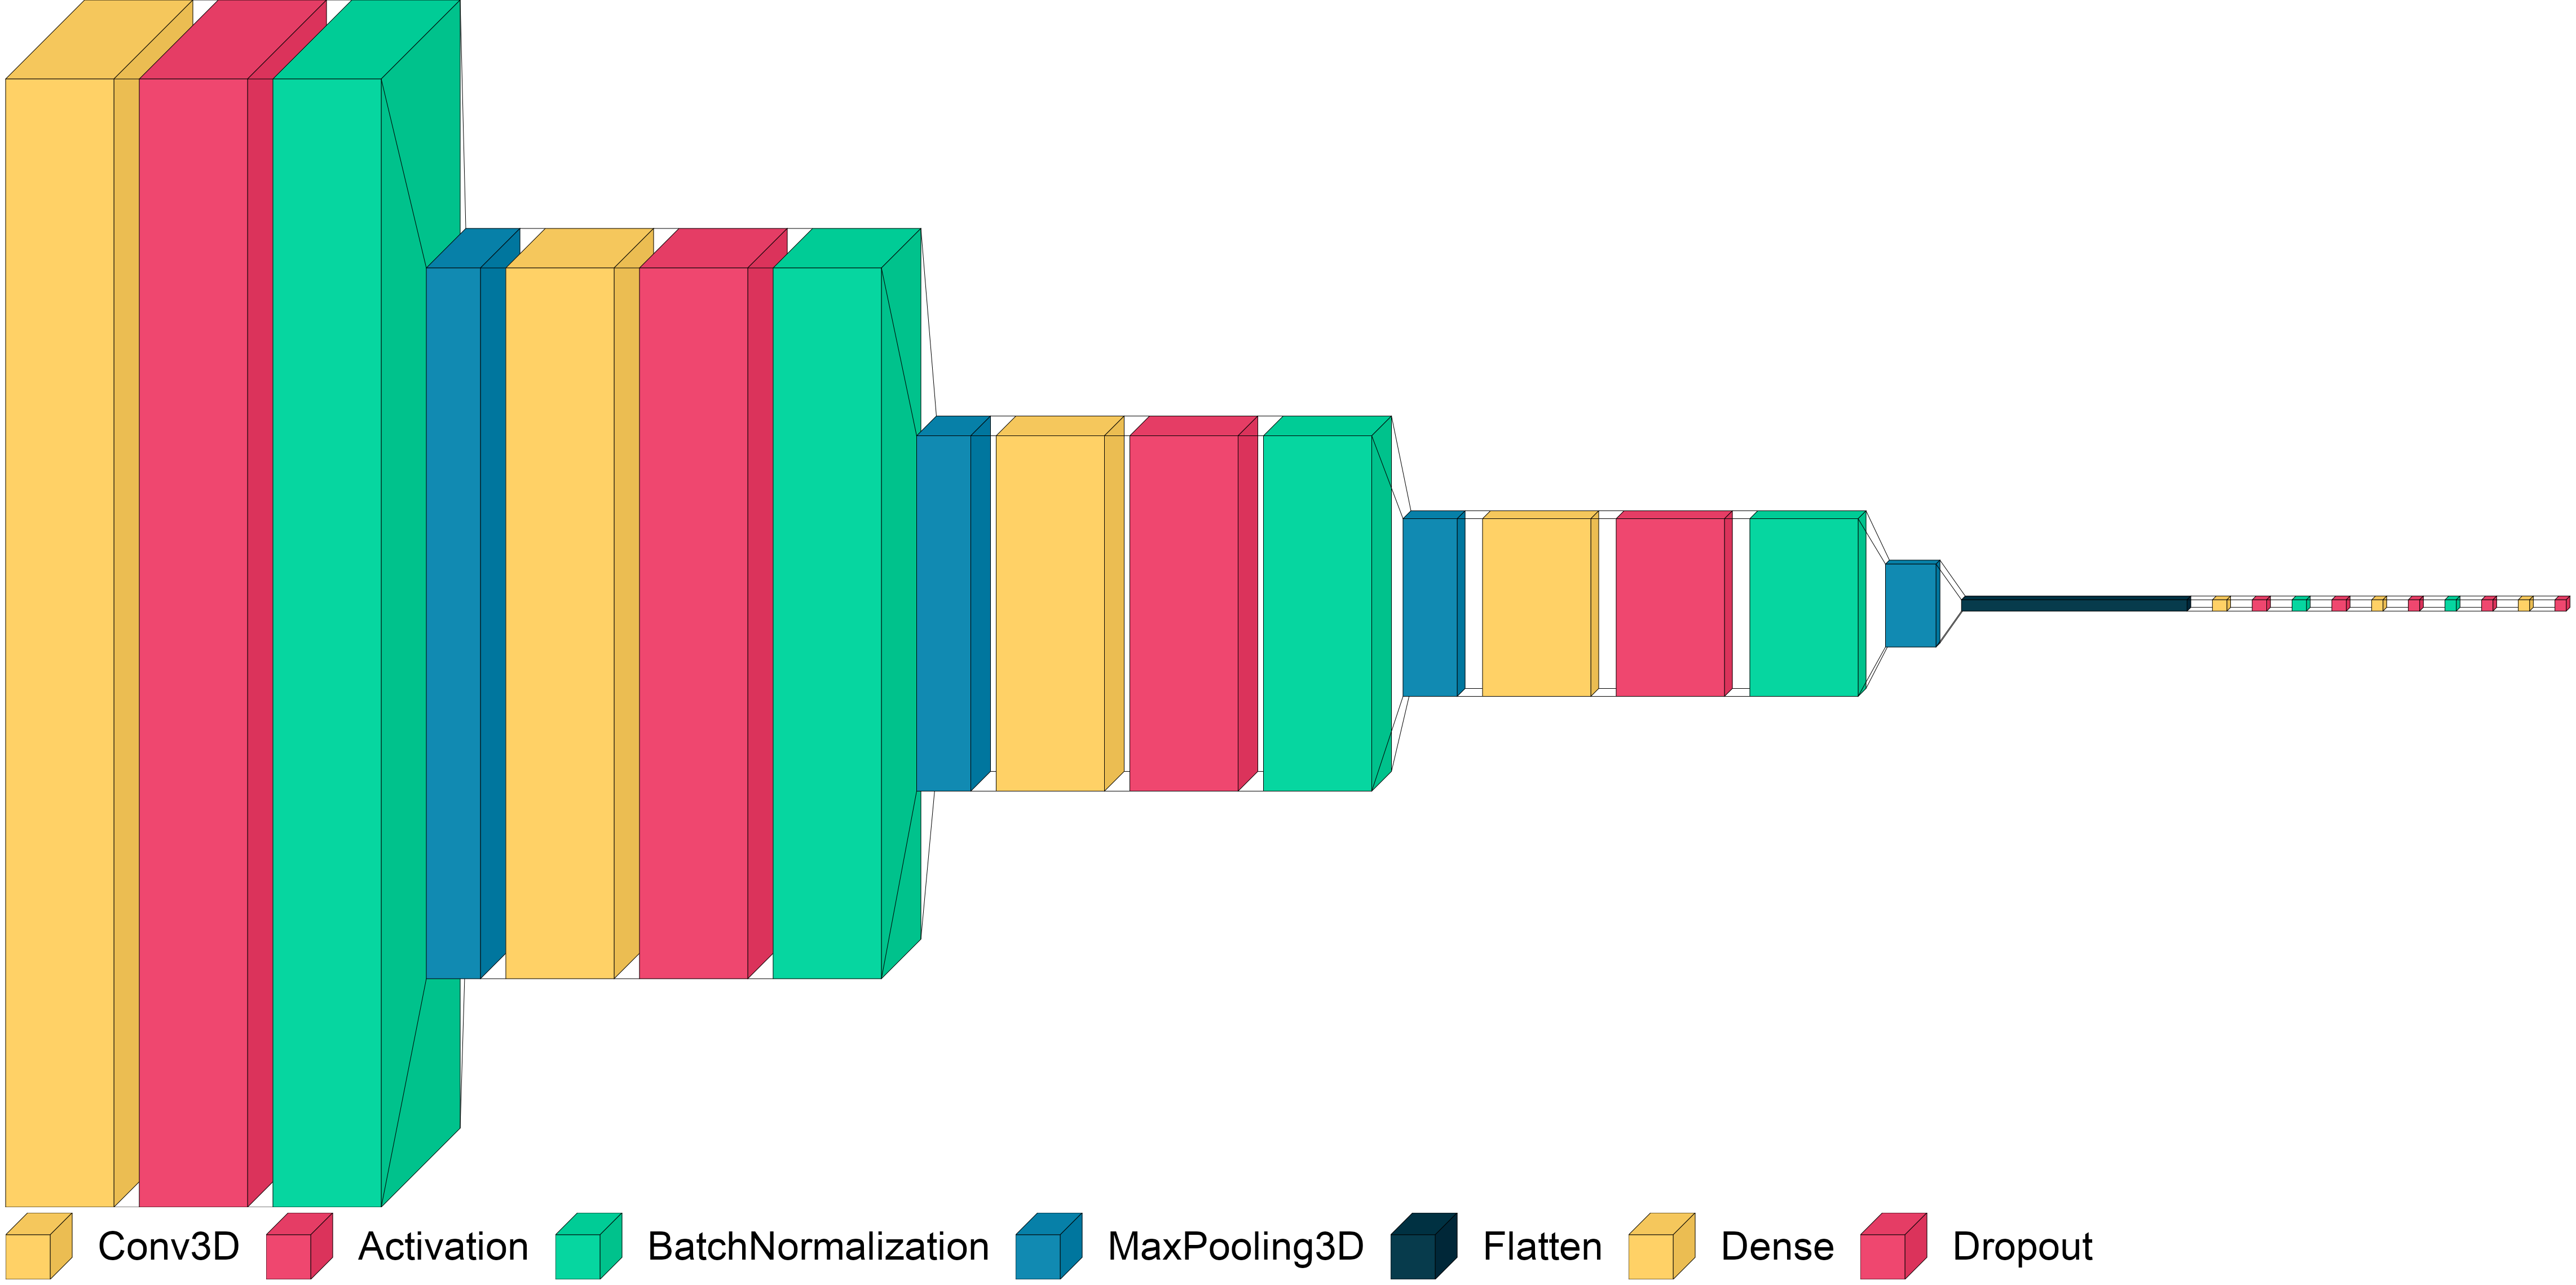

In [23]:
visualkeras.layered_view(model_17, spacing=45, legend=True, font=font, scale_xy=21)

### Model-17 diagram in 2D

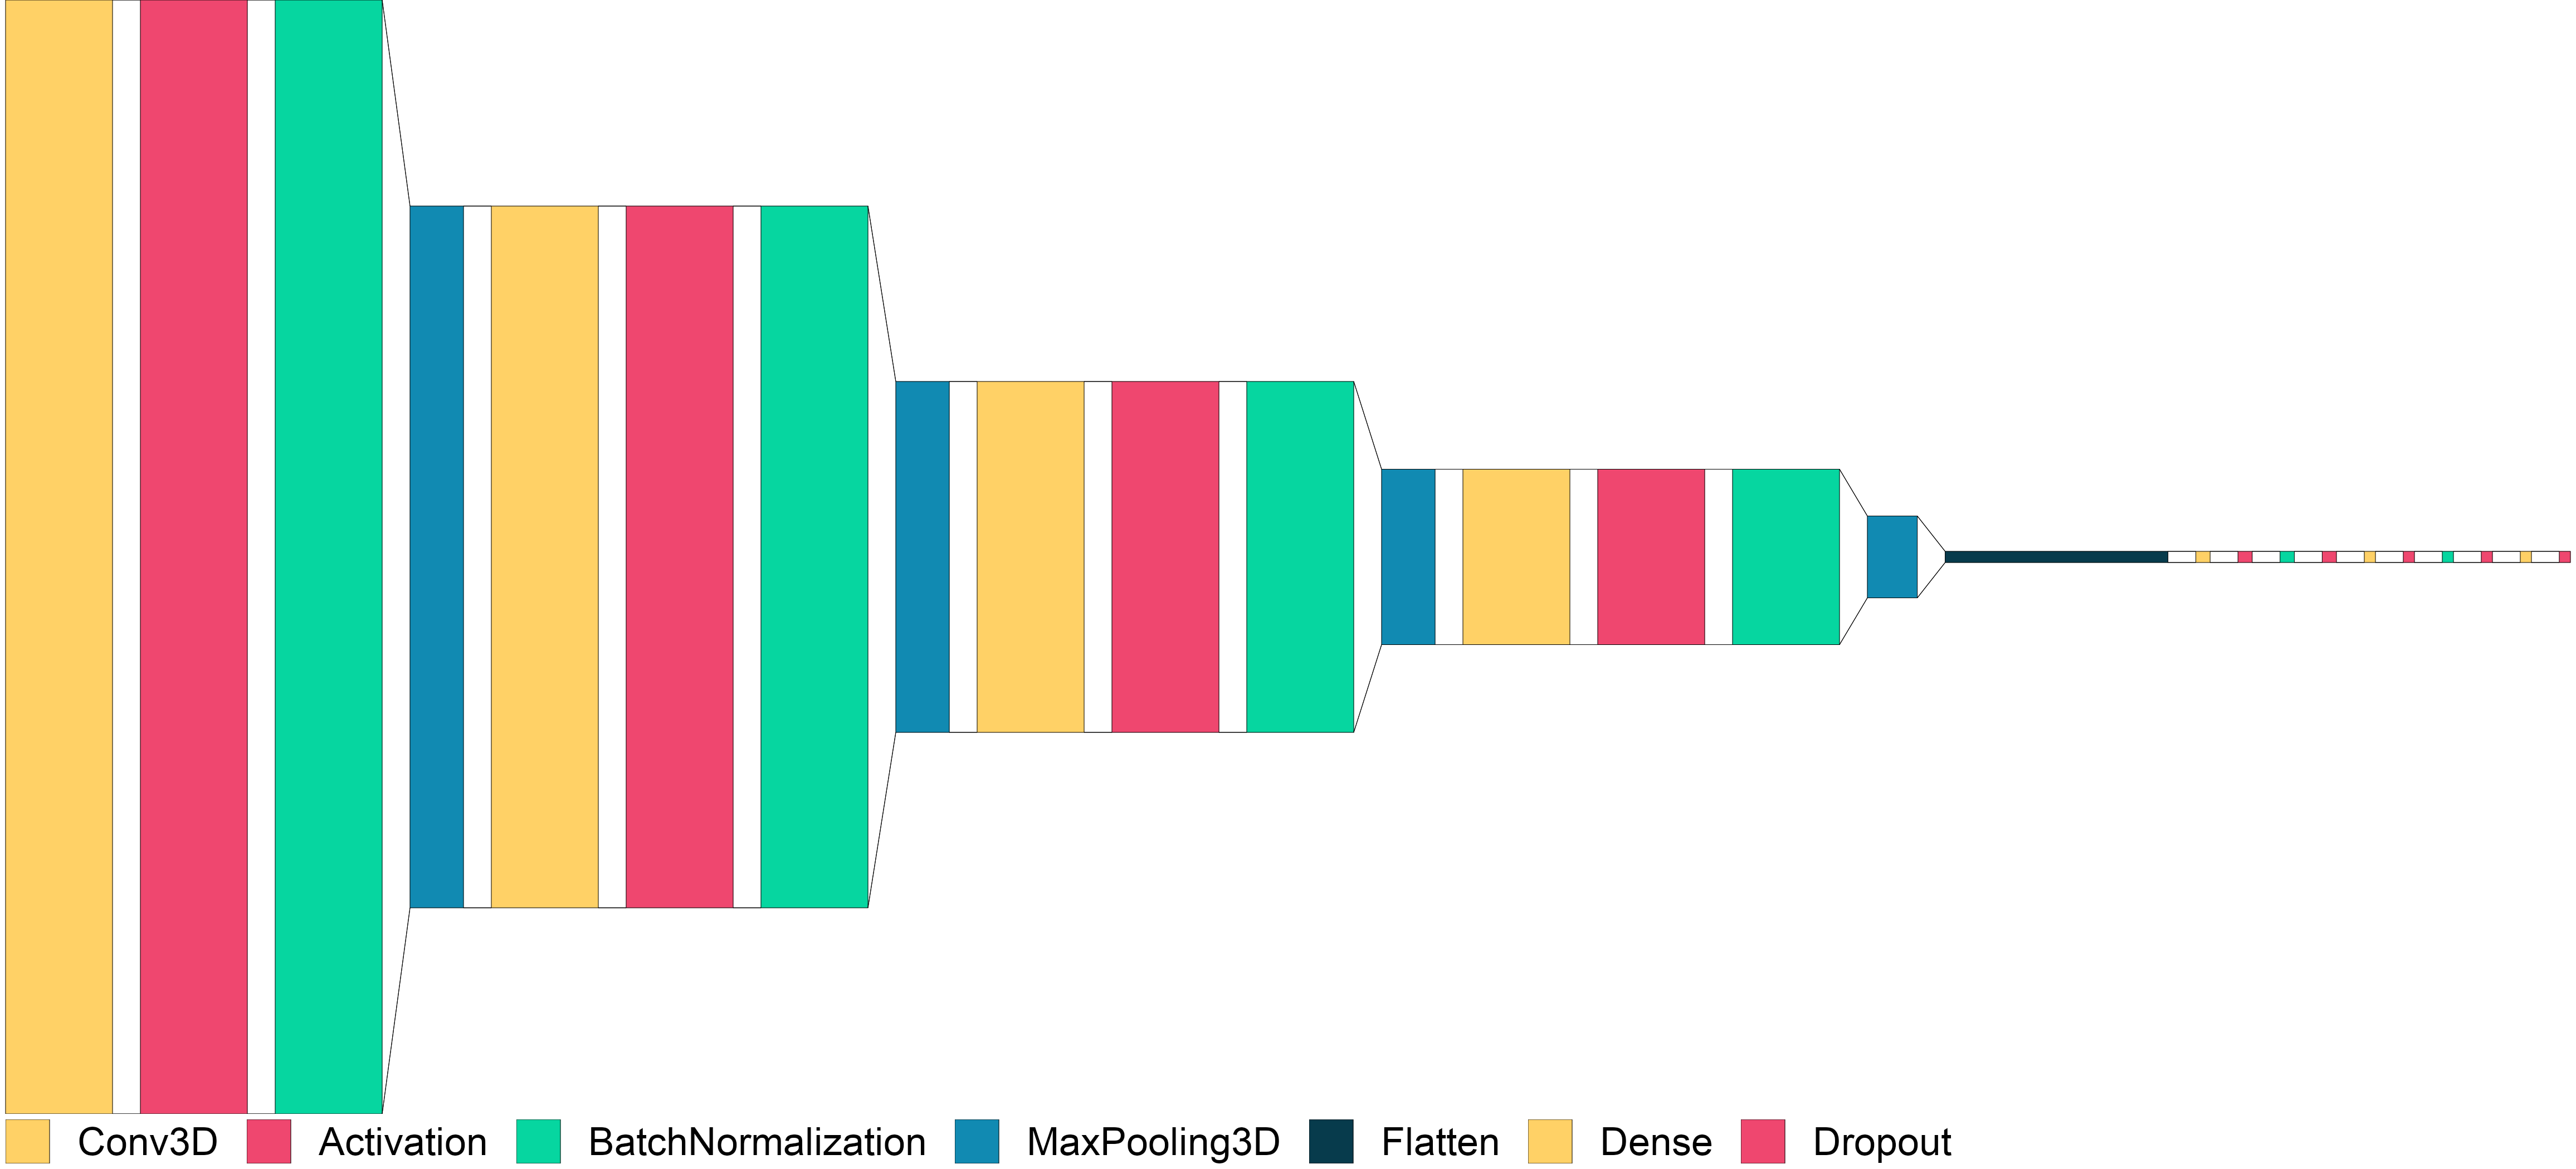

In [24]:
visualkeras.layered_view(model_17, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [25]:
history = model_17.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15


2024-01-07 11:25:32.317333: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


67/67 [==============================] - ETA: 0s - loss: 1.3891 - categorical_accuracy: 0.4465
Epoch 00001: saving model to Model_17_2024-01-0711_24_48.063957/model-00001-1.38911-0.44646-4.53930-0.21000.h5
67/67 [==============================] - 168s 2s/step - loss: 1.3891 - categorical_accuracy: 0.4465 - val_loss: 4.5393 - val_categorical_accuracy: 0.2100 - lr: 0.0020
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.0662 - categorical_accuracy: 0.5626
Epoch 00002: saving model to Model_17_2024-01-0711_24_48.063957/model-00002-1.06625-0.56259-3.11138-0.28000.h5
67/67 [==============================] - 160s 2s/step - loss: 1.0662 - categorical_accuracy: 0.5626 - val_loss: 3.1114 - val_categorical_accuracy: 0.2800 - lr: 0.0020
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.9323 - categorical_accuracy: 0.6275
Epoch 00003: saving model to Model_17_2024-01-0711_24_48.063957/model-00003-0.93232-0.62745-6.65317-0.22000.h5
67/67 [===================

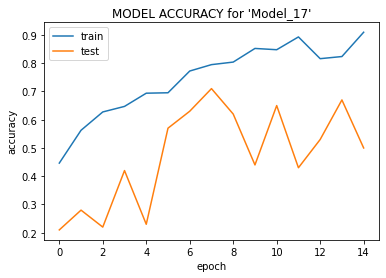

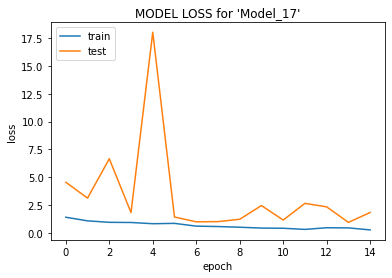

In [26]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [27]:
# Fetch statistics for populating model statistics workbook
total_params = model_17.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_17.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_17.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [28]:
write_model_details_worksheet(model_name, "Default CONV3D model with Augmentation", total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3)", 20,
                             120, 120, 15, 32, "Adam", True, 0.002)

In [29]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-18: Conv3D with 2 hidden layers(Different kernel sizes and dropout value as 0.2), learning rate equal to 0.001 and usage of GlobalAveragePooling3D </center>

| Hidden Layer Count | CONV3D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 | (16, 32, 64, 128) | (3,3,3), (3,3,3), (3,3,3), (1,3,3) | (1,1,1) | 1 | (512) | 0.2 | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.001

In [20]:
model_name = "Model-18"

model_18 = Sequential()

model_18.add(Conv3D(32, kernel_size=3, activation='relu', input_shape=(default_num_images, default_image_height, default_image_width, default_channel_value)))
model_18.add(Conv3D(64, kernel_size=3, activation='relu'))
model_18.add(MaxPooling3D(pool_size=(2, 2, 2)))
model_18.add(BatchNormalization())
model_18.add(Dropout(0.2))

model_18.add(Conv3D(128, kernel_size=3, activation='relu'))
model_18.add(MaxPooling3D(pool_size=(1, 2, 2)))
model_18.add(BatchNormalization())
model_18.add(Dropout(0.2))

model_18.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu'))
model_18.add(MaxPooling3D(pool_size=(1, 2, 2)))
model_18.add(BatchNormalization())
model_18.add(Dropout(0.2))

model_18.add(GlobalAveragePooling3D())
model_18.add(Dense(512, activation='relu'))
model_18.add(BatchNormalization())
model_18.add(Dense(5, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.001) #write your optimizer
model_18.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model_18.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 18, 118, 118, 32)  2624      
                                                                 
 conv3d_1 (Conv3D)           (None, 16, 116, 116, 64)  55360     
                                                                 
 max_pooling3d (MaxPooling3D  (None, 8, 58, 58, 64)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 8, 58, 58, 64)    256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 8, 58, 58, 64)     0         
                                                                 
 conv3d_2 (Conv3D)           (None, 6, 56, 56, 128)    2

2024-01-07 21:08:24.615008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1c:00.0, compute capability: 7.5


In [21]:
callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(image_height=120, image_width=120)

val_generator   = generate(image_height=120, image_width=120, is_validation=True)

print (model_18.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 18, 118, 118, 32)  2624      
                                                                 
 conv3d_1 (Conv3D)           (None, 16, 116, 116, 64)  55360     
                                                                 
 max_pooling3d (MaxPooling3D  (None, 8, 58, 58, 64)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 8, 58, 58, 64)    256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 8, 58, 58, 64)     0         
                                                                 
 conv3d_2 (Conv3D)           (None, 6, 56, 56, 128)    2

### Model-18 layer representation

In [22]:
# plot_model(model_18, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-18 diagram in 3D

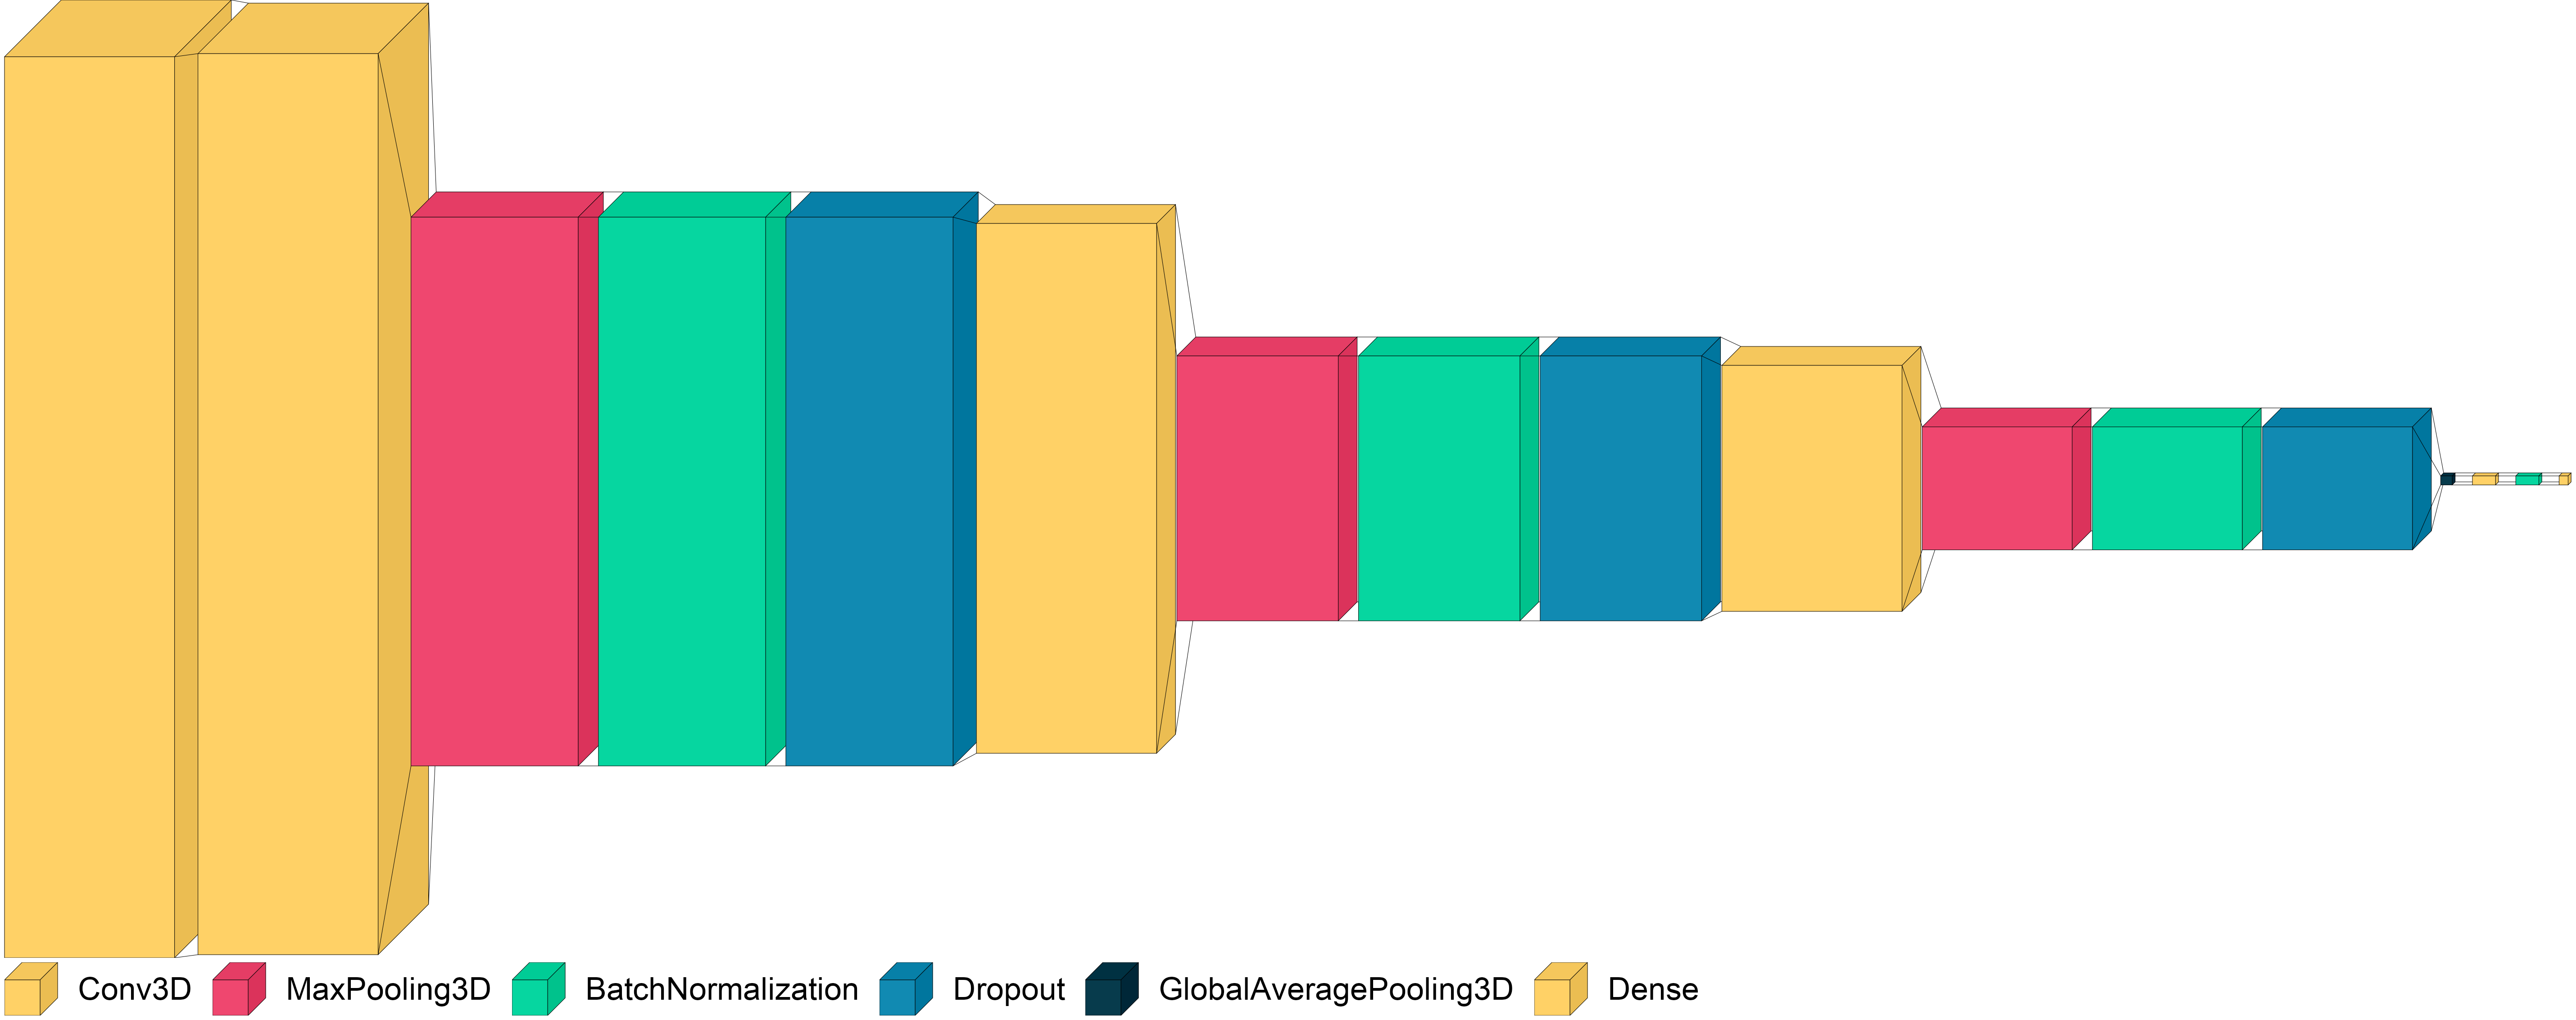

In [23]:
visualkeras.layered_view(model_18, spacing=45, legend=True, font=font, scale_xy=21)

### Model-18 diagram in 2D

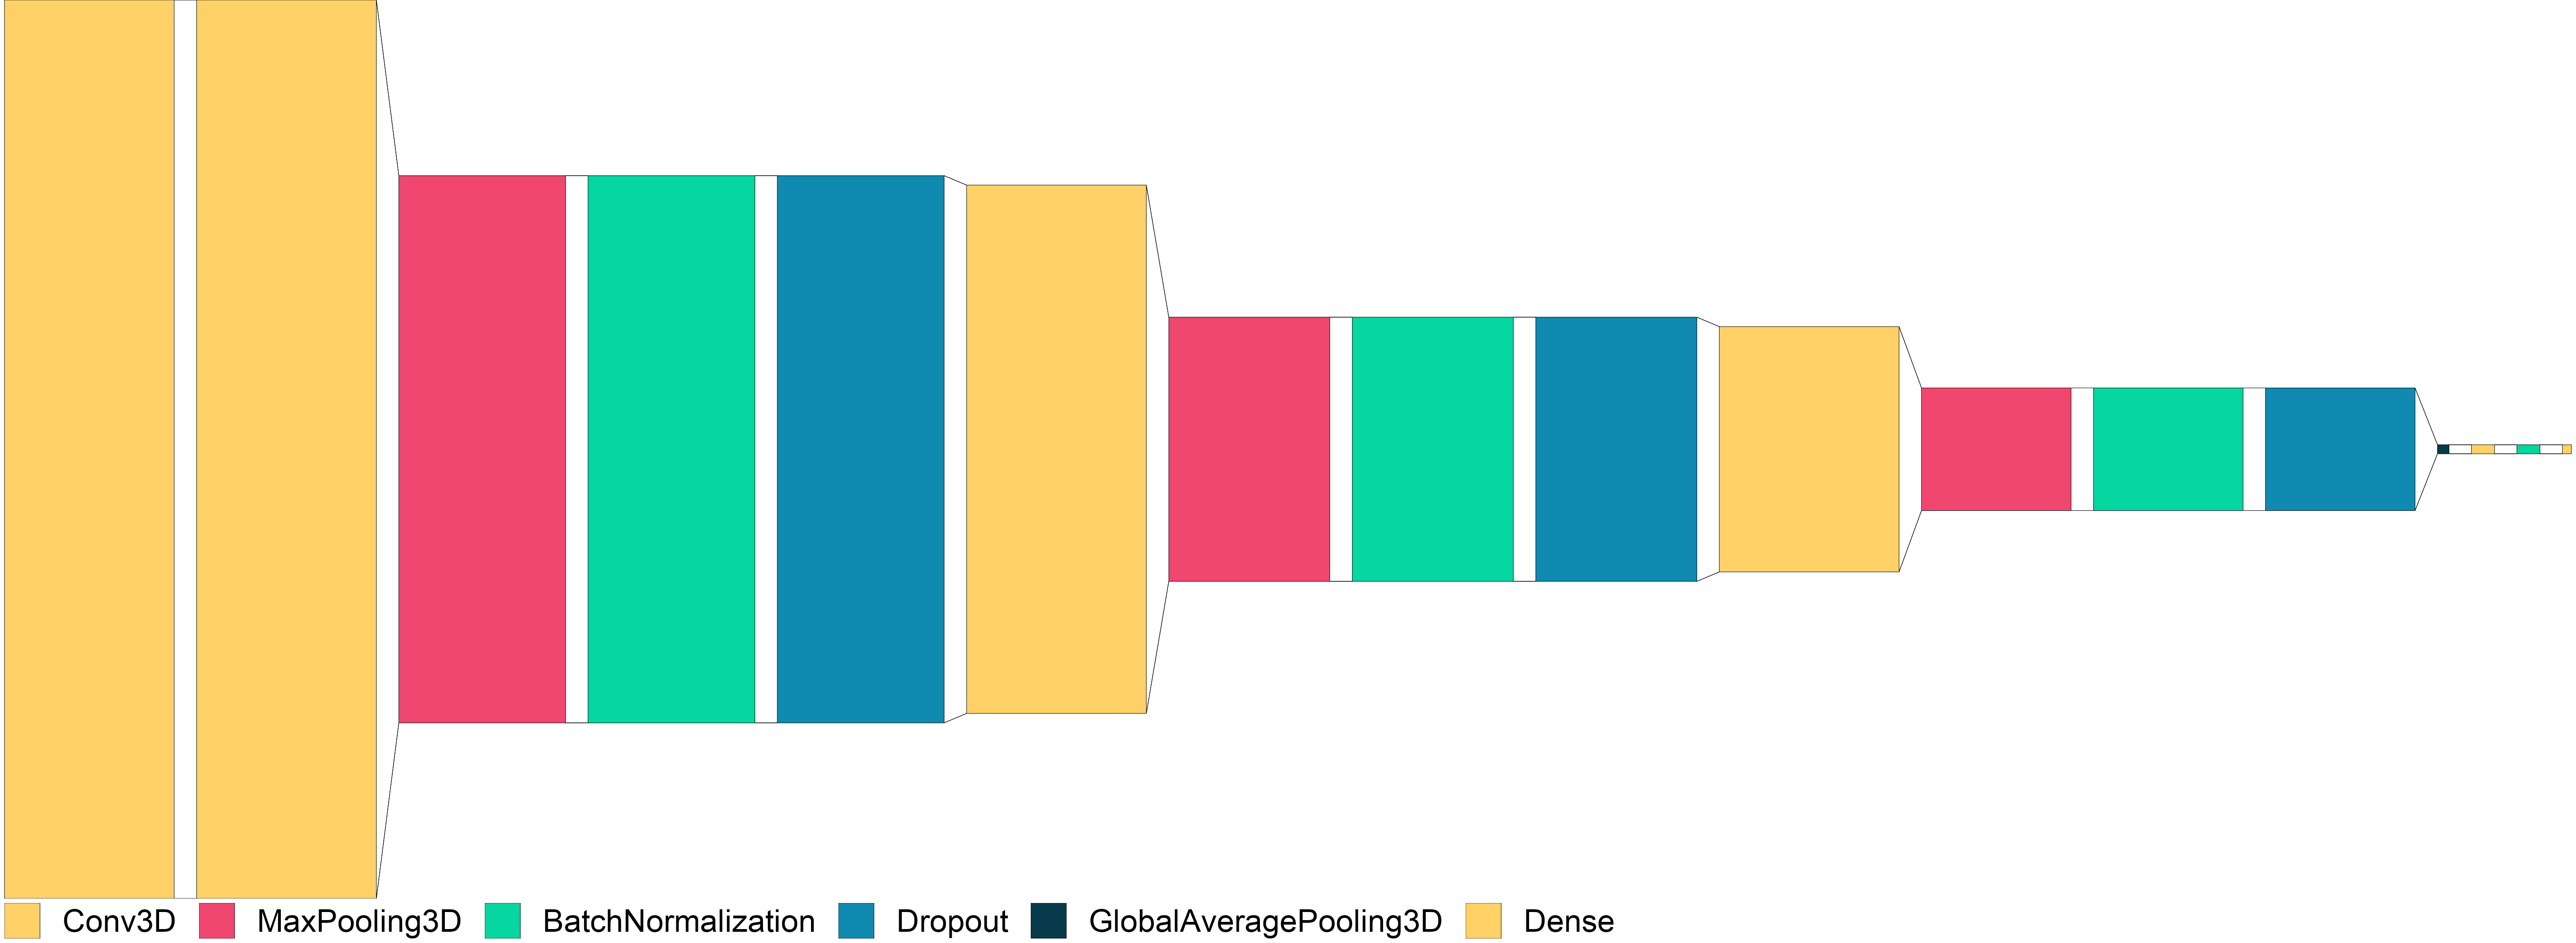

In [24]:
visualkeras.layered_view(model_18, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [25]:
history = model_18.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15


2024-01-07 21:08:37.940700: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


67/67 [==============================] - ETA: 0s - loss: 1.4551 - categorical_accuracy: 0.4585
Epoch 00001: saving model to Model-18_2024-01-0721_06_33.138633/model-00001-1.45513-0.45852-1.77691-0.28000.h5
67/67 [==============================] - 145s 2s/step - loss: 1.4551 - categorical_accuracy: 0.4585 - val_loss: 1.7769 - val_categorical_accuracy: 0.2800 - lr: 0.0010
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.1638 - categorical_accuracy: 0.5173
Epoch 00002: saving model to Model-18_2024-01-0721_06_33.138633/model-00002-1.16375-0.51735-1.66510-0.29000.h5
67/67 [==============================] - 133s 2s/step - loss: 1.1638 - categorical_accuracy: 0.5173 - val_loss: 1.6651 - val_categorical_accuracy: 0.2900 - lr: 0.0010
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.9770 - categorical_accuracy: 0.5792
Epoch 00003: saving model to Model-18_2024-01-0721_06_33.138633/model-00003-0.97697-0.57919-2.49768-0.27000.h5
67/67 [===================

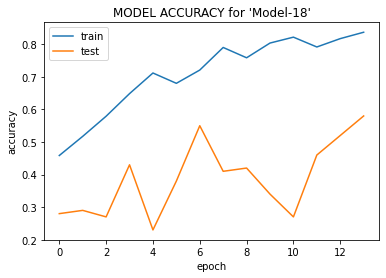

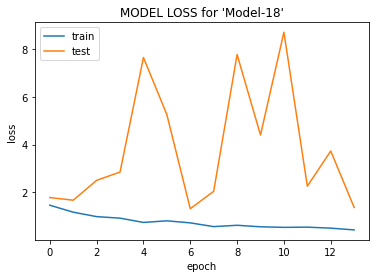

In [26]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [27]:
# Fetch statistics for populating model statistics workbook
total_params = model_18.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_18.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_18.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [28]:
write_model_details_worksheet(model_name, "Conv3D with 2 hidden layers(Different kernel sizes and dropout value as 0.2), learning rate equal to 0.001 and usage of GlobalAveragePooling3D",
                              total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3,3), (3,3,3), (3,3,3), (1,3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.001)

In [29]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-19: TimeDistributed Conv2D + GRU(128 neurons) without dropout layer </center>

| Hidden Layer Count | CONV2D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | (32, 64) | (3,3) | (1,1) | 0 | - | - | 20 | 120 | 120 | same | 20 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.001

In [30]:
model_name = "Model-19"

model_19 = Sequential()

model_19.add(TimeDistributed(Conv2D(32, (3,3), activation='relu'),
                             input_shape=(default_num_images, default_image_height, default_image_width, default_channel_value)))
model_19.add(TimeDistributed(MaxPooling2D((2,2))))
model_19.add(BatchNormalization())

model_19.add(TimeDistributed(Conv2D(64, (3,3), activation='relu')))
model_19.add(TimeDistributed(MaxPooling2D((2,2))))
model_19.add(BatchNormalization())

model_19.add(TimeDistributed(GlobalAveragePooling2D()))
model_19.add(TimeDistributed(Dense(64, activation='relu')))
model_19.add(BatchNormalization())

model_19.add(GRU(128))
model_19.add(BatchNormalization())
model_19.add(Dense(5, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.001) #write your optimizer
model_19.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model_19.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 118, 118, 32)  896      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 59, 59, 32)   0         
 tributed)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 20, 59, 59, 32)   128       
 hNormalization)                                                 
                                                                 
 time_distributed_2 (TimeDis  (None, 20, 57, 57, 64)   18496     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 20, 28, 28, 64)  

In [31]:
callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(image_height=120, image_width=120)

val_generator   = generate(image_height=120, image_width=120, is_validation=True)

print (model_19.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 118, 118, 32)  896      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 59, 59, 32)   0         
 tributed)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 20, 59, 59, 32)   128       
 hNormalization)                                                 
                                                                 
 time_distributed_2 (TimeDis  (None, 20, 57, 57, 64)   18496     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 20, 28, 28, 64)  

### Model-19 layer representation

In [32]:
# plot_model(model_19, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

In [34]:
history = model_19.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=20, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 1.3637 - categorical_accuracy: 0.4374
Epoch 00001: saving model to Model-19_2024-01-0721_06_33.138633/model-00001-1.36370-0.43741-1.57053-0.32000.h5
67/67 [==============================] - 137s 2s/step - loss: 1.3637 - categorical_accuracy: 0.4374 - val_loss: 1.5705 - val_categorical_accuracy: 0.3200 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - ETA: 0s - loss: 1.0732 - categorical_accuracy: 0.5520
Epoch 00002: saving model to Model-19_2024-01-0721_06_33.138633/model-00002-1.07324-0.55204-1.67557-0.21000.h5
67/67 [==============================] - 132s 2s/step - loss: 1.0732 - categorical_accuracy: 0.5520 - val_loss: 1.6756 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - ETA: 0s - loss: 1.0499 - categorical_accuracy: 0.5566
Epoch 00003: saving model to Model-19_2024-01-0721_06_33.138633/model-00003-1.04990-0.55656-1.81871-0.31000.h5
67/67 [========

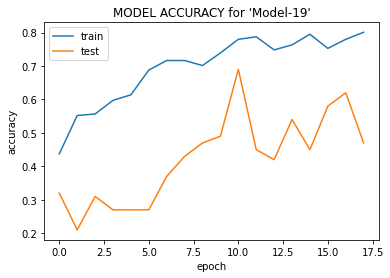

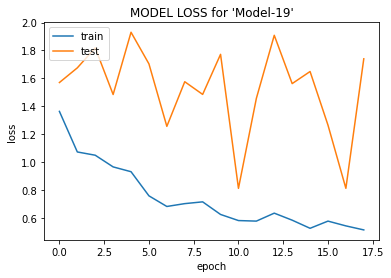

In [35]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [36]:
# Fetch statistics for populating model statistics workbook
total_params = model_19.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_19.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_19.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [37]:
write_model_details_worksheet(model_name, "TimeDistributed Conv2D + GRU(128 neurons) without dropout layer",
                              total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3)", 20,
                             120, 120, 20, 32, "Adam", False, 0.001)

In [38]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-20: TimeDistributed Conv2D + GRU(128 neurons) with dropout layer and batch size as 20 </center>

| Hidden Layer Count | CONV2D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | (32, 64) | (3,3) | (1,1) | 0 | - | 0.2 | 20 | 120 | 120 | same | 15 | 20 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.001

In [43]:
model_name = "Model-20"

model_20 = Sequential()
model_20.add(TimeDistributed(Conv2D(32, (3,3), activation='relu'),
                             input_shape=(default_num_images, default_image_height, default_image_width, default_channel_value)))
model_20.add(TimeDistributed(MaxPooling2D((2,2))))
model_20.add(BatchNormalization())
model_20.add(Dropout(0.2))

model_20.add(TimeDistributed(Conv2D(64, (3,3), activation='relu')))
model_20.add(TimeDistributed(MaxPooling2D((2,2))))
model_20.add(BatchNormalization())
model_20.add(Dropout(0.2))

model_20.add(TimeDistributed(GlobalAveragePooling2D()))
model_20.add(TimeDistributed(Dense(64, activation='relu')))
model_20.add(BatchNormalization())
model_20.add(Dropout(0.2))

model_20.add(GRU(128))
model_20.add(BatchNormalization())
model_20.add(Dense(num_classes, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.001) #write your optimizer
model_20.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model_20.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 20, 118, 118, 32)  896      
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 20, 59, 59, 32)   0         
 stributed)                                                      
                                                                 
 batch_normalization_12 (Bat  (None, 20, 59, 59, 32)   128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 20, 59, 59, 32)    0         
                                                                 
 time_distributed_14 (TimeDi  (None, 20, 57, 57, 64)   18496     
 stributed)                                           

In [44]:
callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size=20)

train_generator = generate(batch_size=20, image_height=120, image_width=120)

val_generator   = generate(batch_size=20, image_height=120, image_width=120, is_validation=True)

print (model_20.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeDi  (None, 20, 118, 118, 32)  896      
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 20, 59, 59, 32)   0         
 stributed)                                                      
                                                                 
 batch_normalization_12 (Bat  (None, 20, 59, 59, 32)   128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 20, 59, 59, 32)    0         
                                                                 
 time_distributed_14 (TimeDi  (None, 20, 57, 57, 64)   18496     
 stributed)                                           

### Model-20 layer representation

In [45]:
# plot_model(model_20, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

In [46]:
history = model_20.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
34/34 [==============================] - ETA: 0s - loss: 1.2960 - categorical_accuracy: 0.4646
Epoch 00001: saving model to Model-20_2024-01-0721_06_33.138633/model-00001-1.29597-0.46456-1.60614-0.18000.h5
34/34 [==============================] - 135s 4s/step - loss: 1.2960 - categorical_accuracy: 0.4646 - val_loss: 1.6061 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 2/15
34/34 [==============================] - ETA: 0s - loss: 1.0561 - categorical_accuracy: 0.5641
Epoch 00002: saving model to Model-20_2024-01-0721_06_33.138633/model-00002-1.05605-0.56410-1.59833-0.32000.h5
34/34 [==============================] - 126s 4s/step - loss: 1.0561 - categorical_accuracy: 0.5641 - val_loss: 1.5983 - val_categorical_accuracy: 0.3200 - lr: 0.0010
Epoch 3/15
34/34 [==============================] - ETA: 0s - loss: 0.9533 - categorical_accuracy: 0.5777
Epoch 00003: saving model to Model-20_2024-01-0721_06_33.138633/model-00003-0.95326-0.57768-1.68024-0.25000.h5
34/34 [========

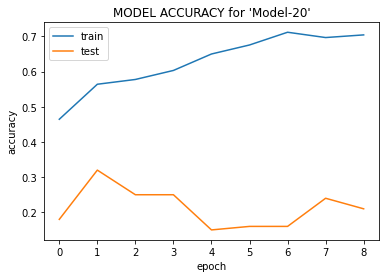

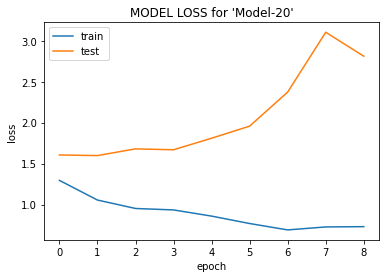

In [47]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [48]:
# Fetch statistics for populating model statistics workbook
total_params = model_20.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_20.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_20.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [49]:
write_model_details_worksheet(model_name, "TimeDistributed Conv2D + GRU(128 neurons) with dropout layer",
                              total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3)", 20,
                             120, 120, 15, 20, "Adam", False, 0.001)

In [50]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-21: TimeDistributed Conv2D with Dense layers, without dropouts using GlobalAveragePooling3D</center>

| Hidden Layer Count | CONV2D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | (32, 64, 128) | (3,3) | (1,1) | 1 | 256 | 0.2 | 20 | 120 | 120 | same | 15 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.001

In [56]:
model_name = "Model-21"

model_21 = Sequential()
model_21.add(TimeDistributed(Conv2D(32, (3,3), activation='relu'),
                             input_shape=(default_num_images, default_image_height, default_image_width, default_channel_value)))
model_21.add(TimeDistributed(MaxPooling2D((2,2))))
model_21.add(BatchNormalization())

model_21.add(TimeDistributed(Conv2D(64, (3,3), activation='relu')))
model_21.add(TimeDistributed(MaxPooling2D((2,2))))
model_21.add(BatchNormalization())

model_21.add(TimeDistributed(Conv2D(128, (3,3), activation='relu')))
model_21.add(TimeDistributed(MaxPooling2D((2,2))))
model_21.add(BatchNormalization())

model_21.add(GlobalAveragePooling3D())
model_21.add(Dense(256, activation='relu'))
model_21.add(BatchNormalization())
model_21.add(Dense(num_classes, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.001) #write your optimizer
model_21.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model_21.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_24 (TimeDi  (None, 20, 118, 118, 32)  896      
 stributed)                                                      
                                                                 
 time_distributed_25 (TimeDi  (None, 20, 59, 59, 32)   0         
 stributed)                                                      
                                                                 
 batch_normalization_20 (Bat  (None, 20, 59, 59, 32)   128       
 chNormalization)                                                
                                                                 
 time_distributed_26 (TimeDi  (None, 20, 57, 57, 64)   18496     
 stributed)                                                      
                                                                 
 time_distributed_27 (TimeDi  (None, 20, 28, 28, 64)  

In [57]:
callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(image_height=120, image_width=120)

val_generator   = generate(image_height=120, image_width=120, is_validation=True)

print (model_21.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_24 (TimeDi  (None, 20, 118, 118, 32)  896      
 stributed)                                                      
                                                                 
 time_distributed_25 (TimeDi  (None, 20, 59, 59, 32)   0         
 stributed)                                                      
                                                                 
 batch_normalization_20 (Bat  (None, 20, 59, 59, 32)   128       
 chNormalization)                                                
                                                                 
 time_distributed_26 (TimeDi  (None, 20, 57, 57, 64)   18496     
 stributed)                                                      
                                                                 
 time_distributed_27 (TimeDi  (None, 20, 28, 28, 64)  

### Model-21 layer representation

In [58]:
# plot_model(model_21, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-21 diagram in 3D

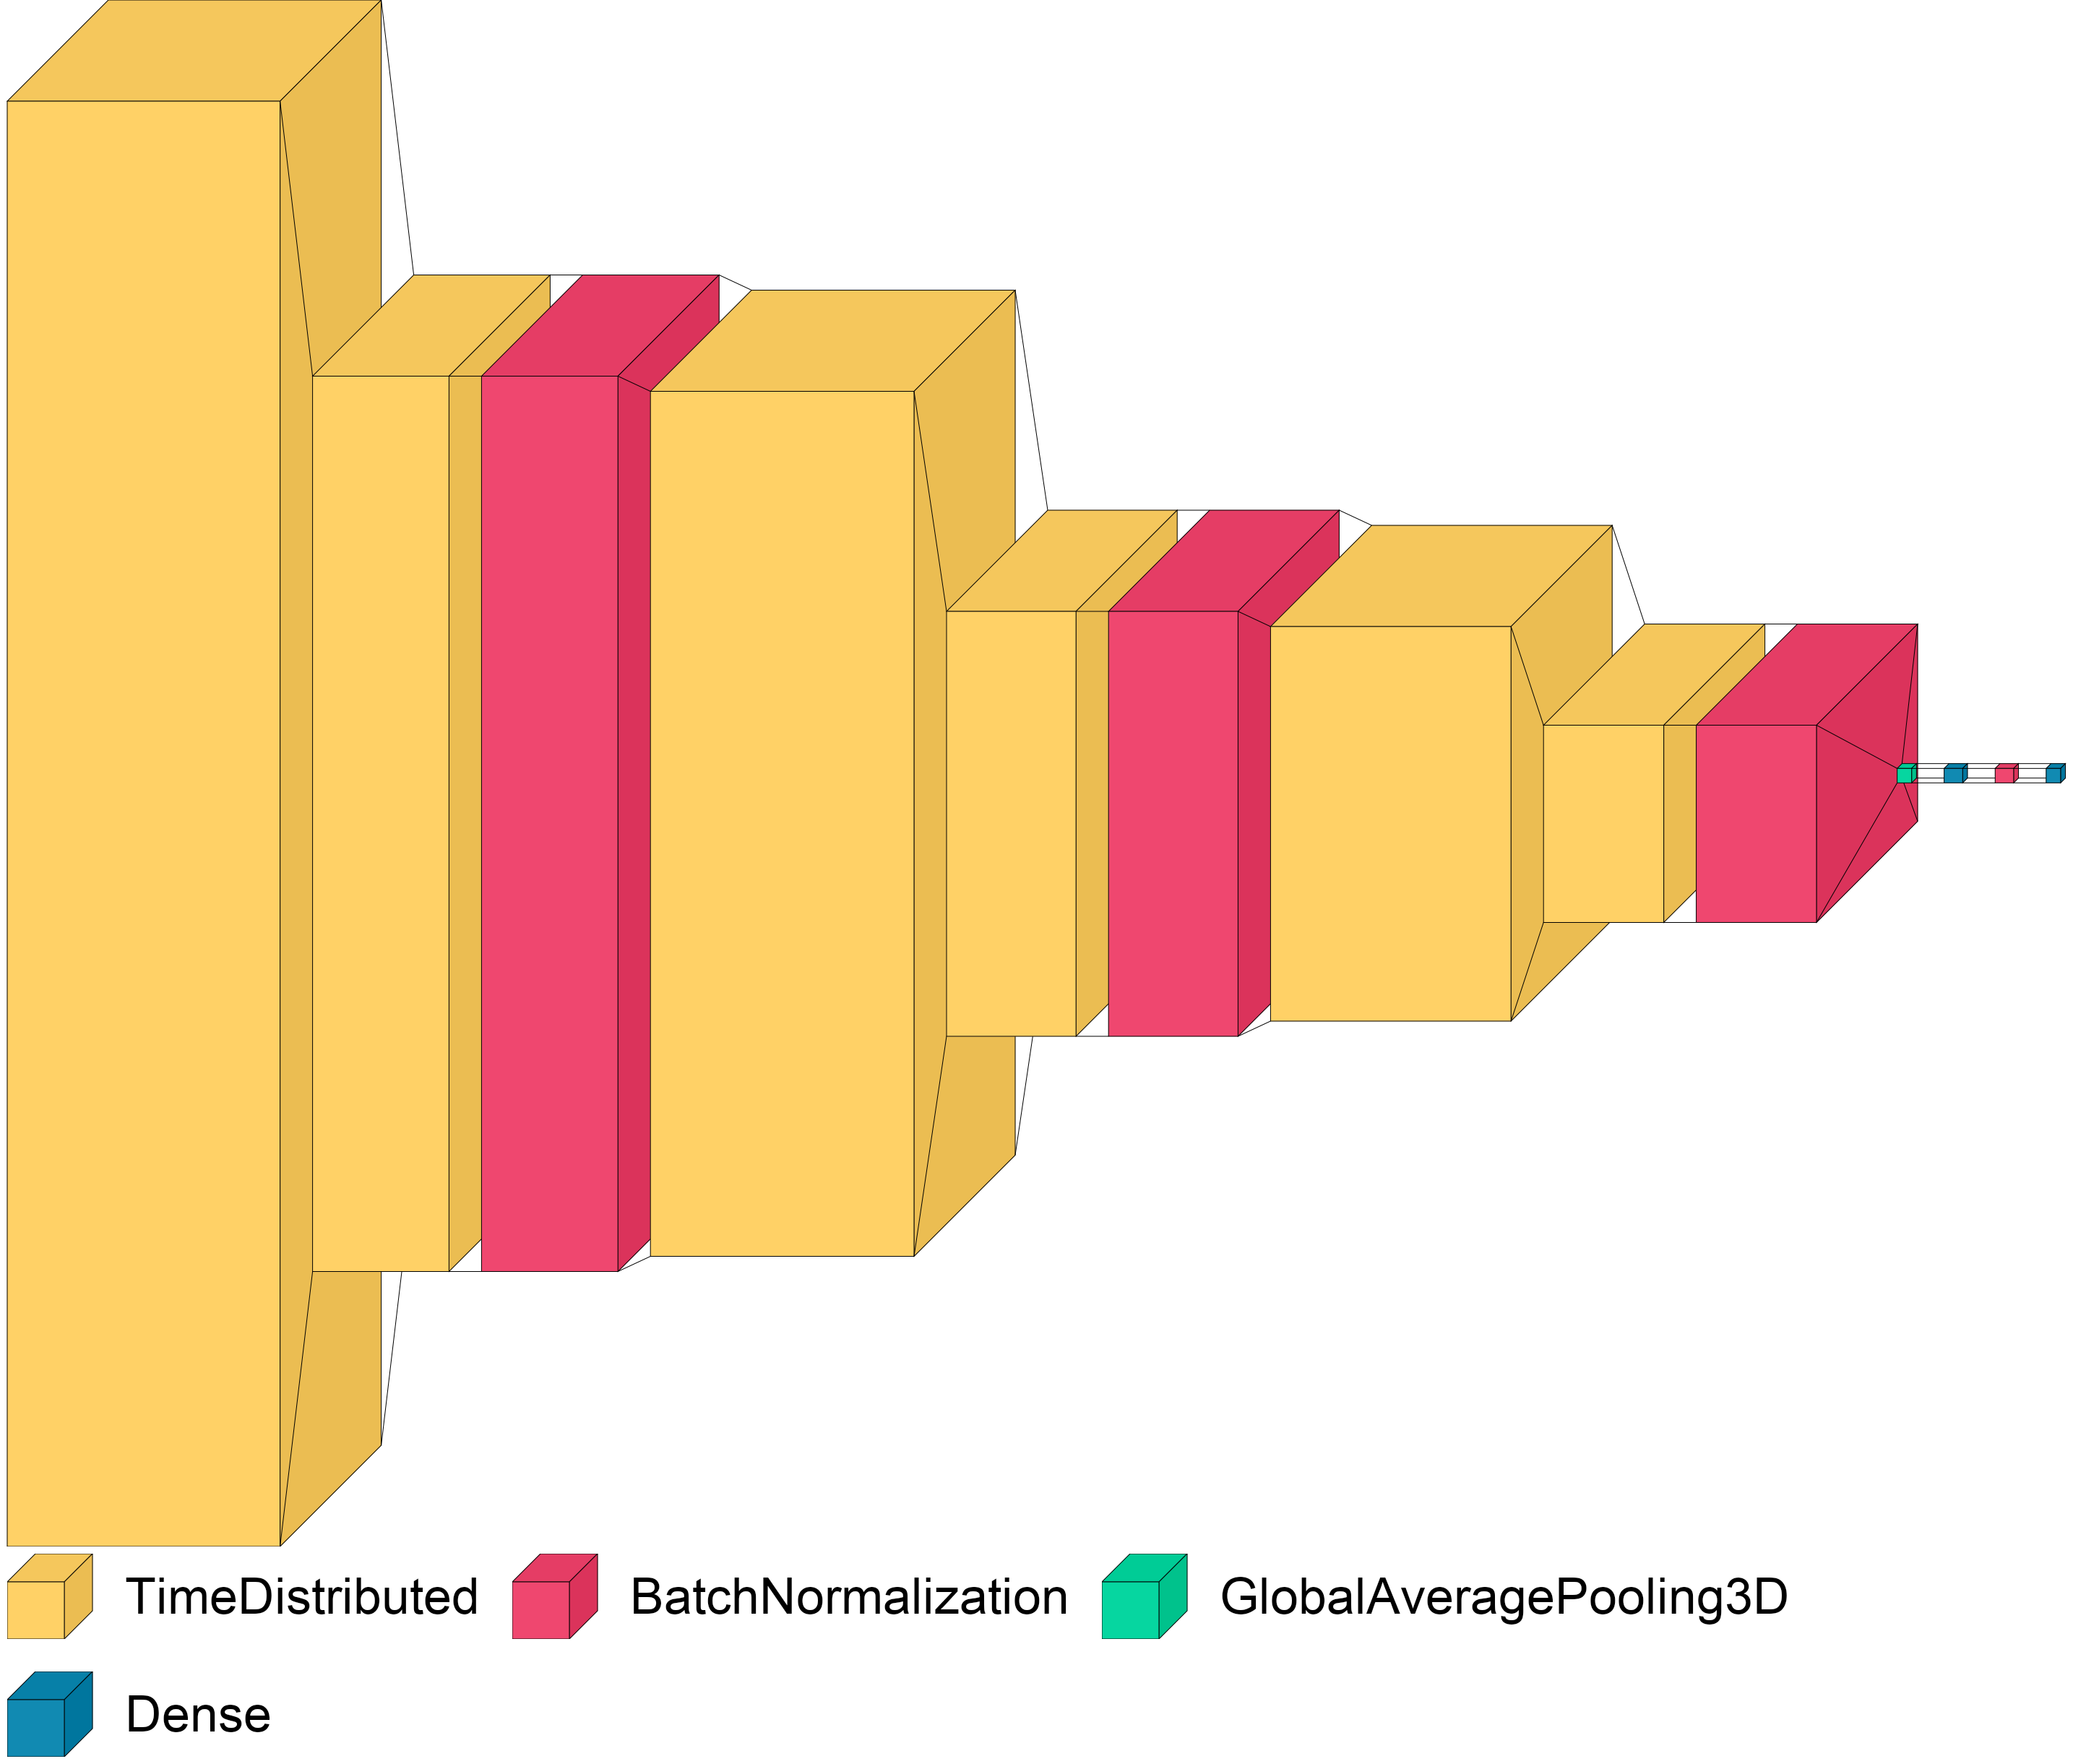

In [59]:
visualkeras.layered_view(model_21, spacing=45, legend=True, font=font, scale_xy=21)

### Model-21 diagram in 2D

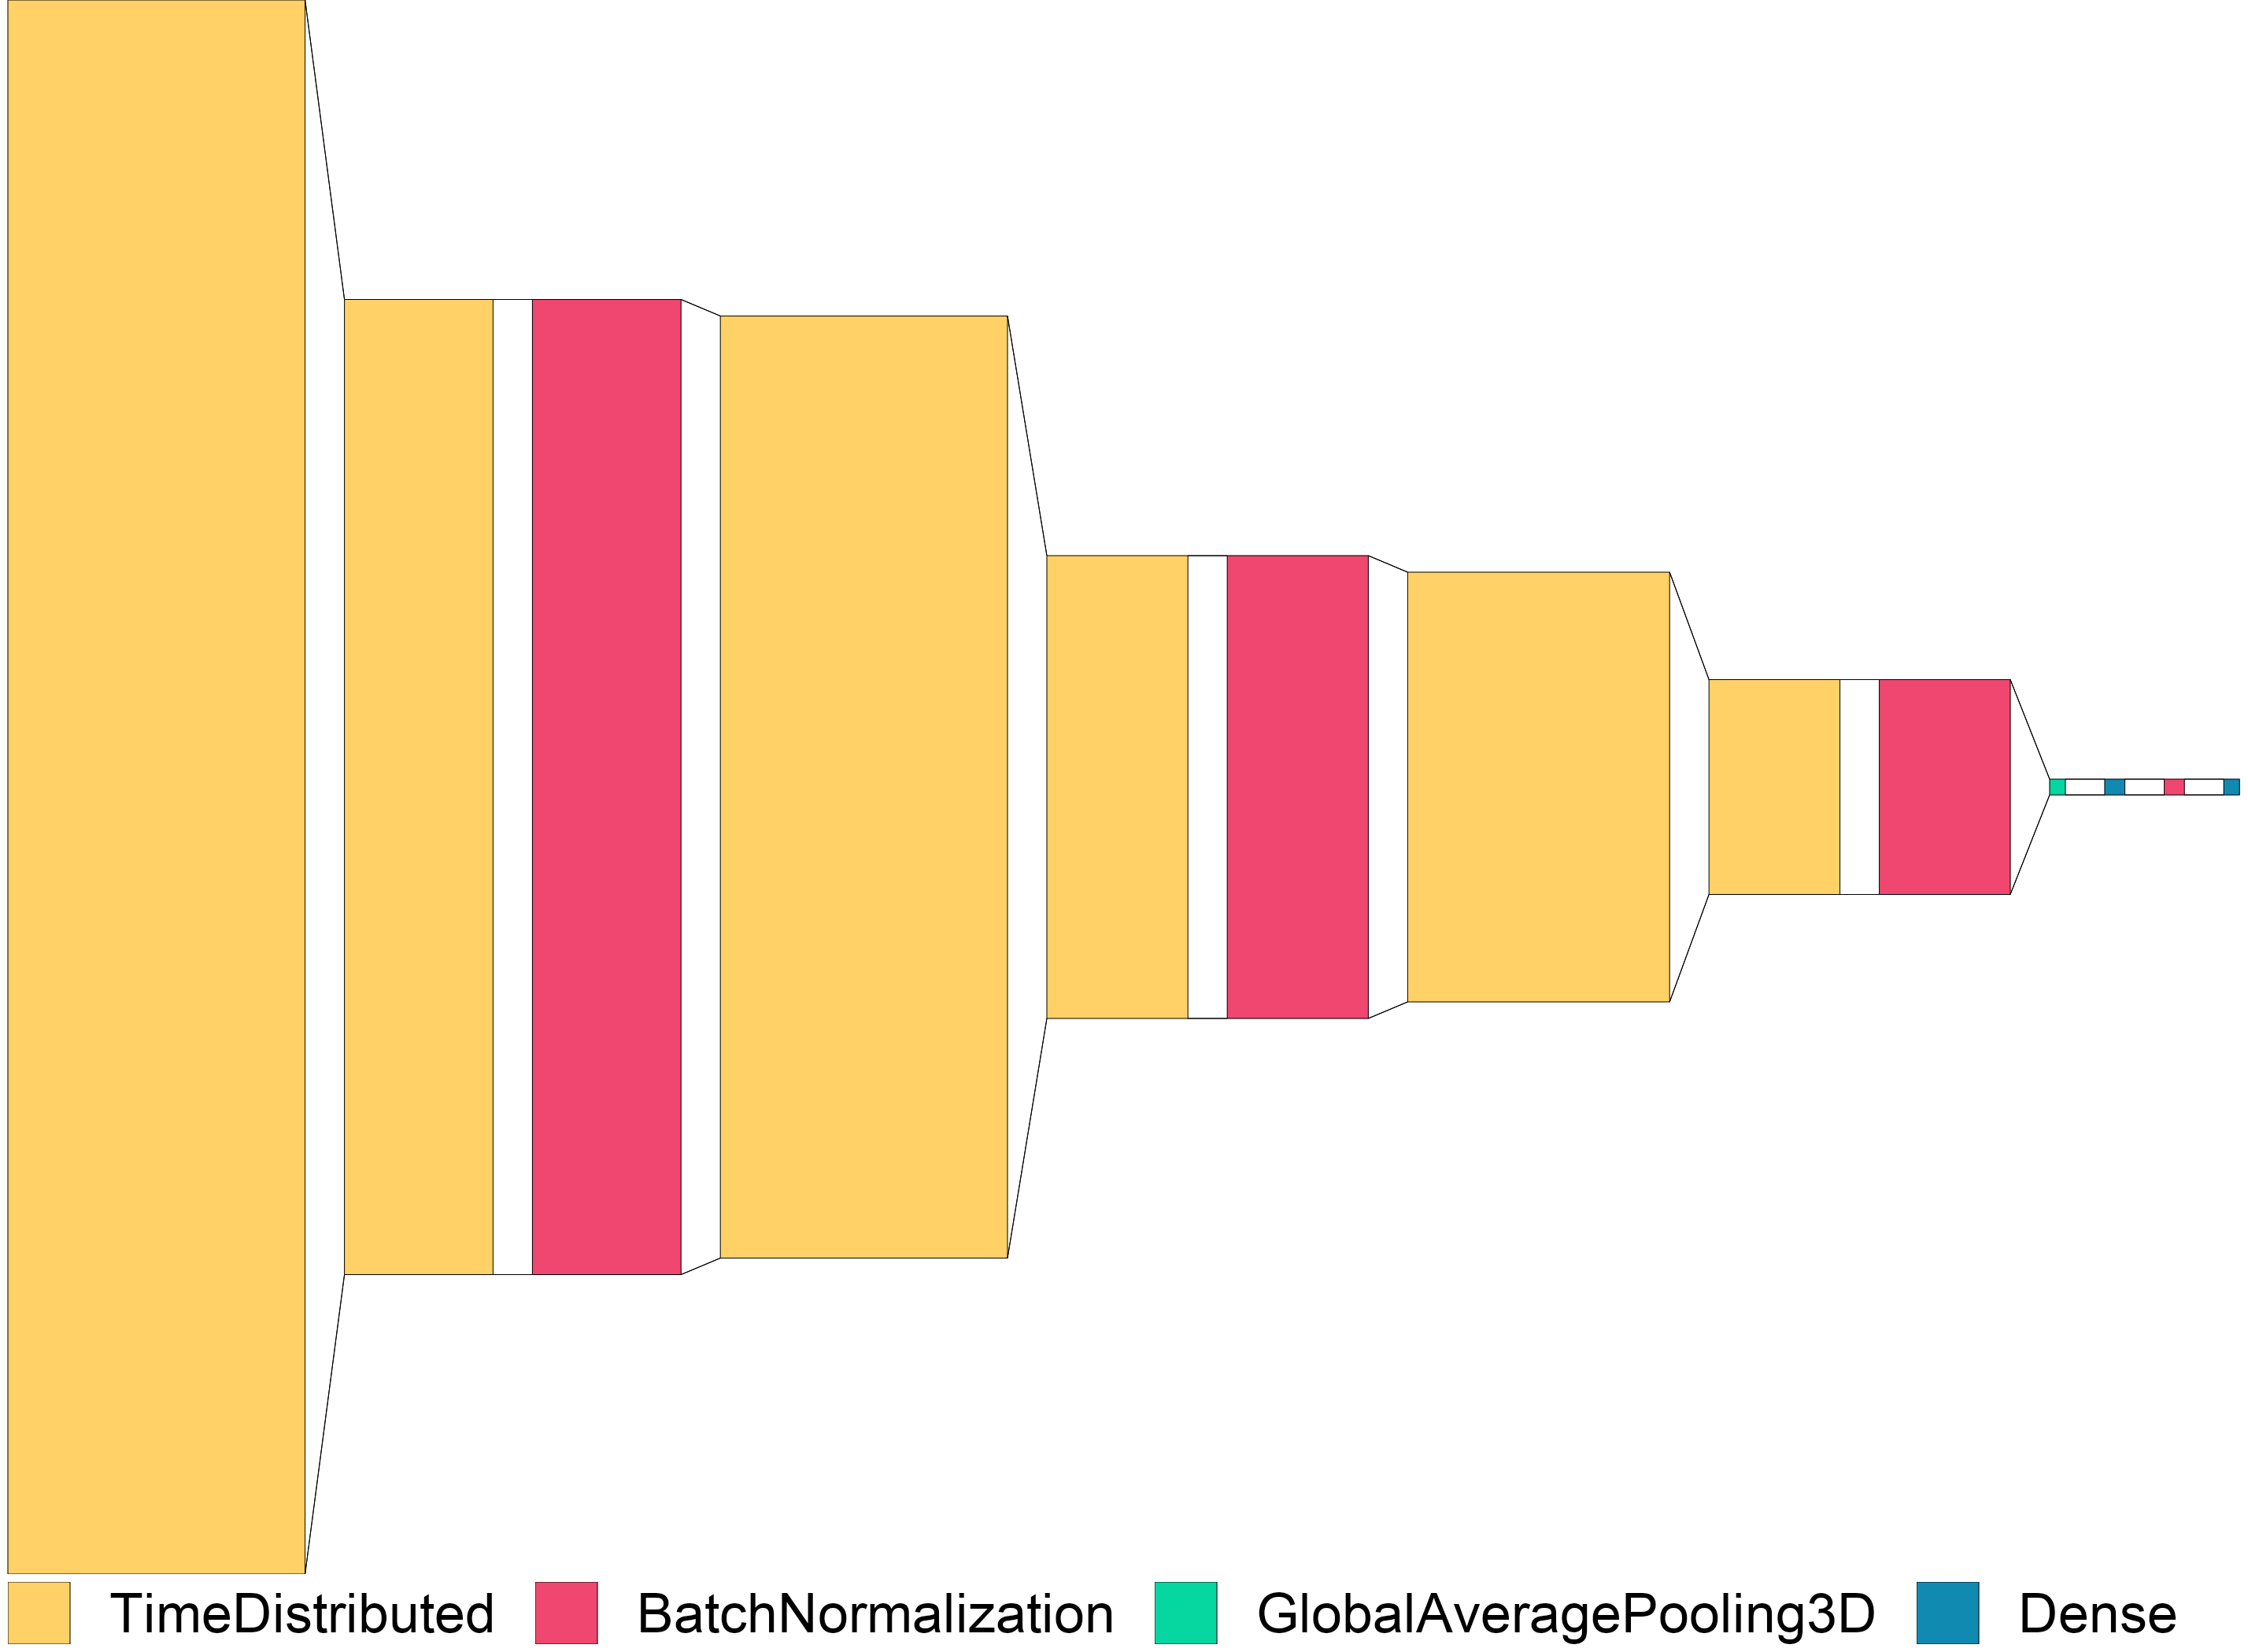

In [60]:
visualkeras.layered_view(model_21, spacing=50, legend=True, font=font, draw_volume=False, scale_xy=21)

In [61]:
history = model_21.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=15, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.3514 - categorical_accuracy: 0.4781
Epoch 00001: saving model to Model-21_2024-01-0721_06_33.138633/model-00001-1.35140-0.47813-1.64503-0.23000.h5
67/67 [==============================] - 133s 2s/step - loss: 1.3514 - categorical_accuracy: 0.4781 - val_loss: 1.6450 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.0151 - categorical_accuracy: 0.5897
Epoch 00002: saving model to Model-21_2024-01-0721_06_33.138633/model-00002-1.01509-0.58974-1.84814-0.29000.h5
67/67 [==============================] - 128s 2s/step - loss: 1.0151 - categorical_accuracy: 0.5897 - val_loss: 1.8481 - val_categorical_accuracy: 0.2900 - lr: 0.0010
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 0.9589 - categorical_accuracy: 0.5852
Epoch 00003: saving model to Model-21_2024-01-0721_06_33.138633/model-00003-0.95890-0.58522-1.87047-0.23000.h5
67/67 [========

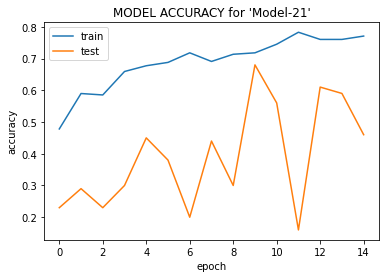

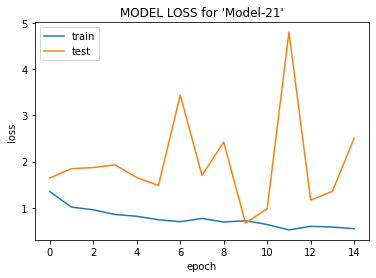

In [62]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [63]:
# Fetch statistics for populating model statistics workbook
total_params = model_21.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_21.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_21.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [64]:
write_model_details_worksheet(model_name, "TimeDistributed Conv2D with Dense layers, without dropouts using GlobalAveragePooling3D",
                              total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3)", 20,
                             120, 120, 15, 32, "Adam", False, 0.001)

In [65]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-22: TimeDistributed ConvLSTM2D with no dropout layer using GlobalAveragePooling3D</center>

| Hidden Layer Count | CONV2D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 2 | (8, 16, 8) | (3,3) | (1,1) | 1 | 64 | - | 20 | 120 | 120 | same | 12 | 32 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.001

In [66]:
model_name = "Model-22"

model_22 = Sequential()
model_22.add(TimeDistributed(Conv2D(8, (3,3), activation='relu'),
                          input_shape=(default_num_images, default_image_height, default_image_width, default_channel_value)))
model_22.add(BatchNormalization())
model_22.add(TimeDistributed(Conv2D(16, (3,3), activation='relu')))
model_22.add(BatchNormalization())
model_22.add(ConvLSTM2D(8, kernel_size = 3, return_sequences=False))
model_22.add(BatchNormalization())
model_22.add(TimeDistributed(Dense(64, activation='relu')))
model_22.add(BatchNormalization())
model_22.add(GlobalAveragePooling2D())
model_22.add(Dense(64, activation='relu'))
model_22.add(Dense(num_classes, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.001) #write your optimizer
model_22.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model_22.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_30 (TimeDi  (None, 20, 118, 118, 8)  224       
 stributed)                                                      
                                                                 
 batch_normalization_24 (Bat  (None, 20, 118, 118, 8)  32        
 chNormalization)                                                
                                                                 
 time_distributed_31 (TimeDi  (None, 20, 116, 116, 16)  1168     
 stributed)                                                      
                                                                 
 batch_normalization_25 (Bat  (None, 20, 116, 116, 16)  64       
 chNormalization)                                                
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 114, 114, 8)      

In [67]:
callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size)

train_generator = generate(image_height=120, image_width=120)

val_generator   = generate(image_height=120, image_width=120, is_validation=True)

print (model_22.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_30 (TimeDi  (None, 20, 118, 118, 8)  224       
 stributed)                                                      
                                                                 
 batch_normalization_24 (Bat  (None, 20, 118, 118, 8)  32        
 chNormalization)                                                
                                                                 
 time_distributed_31 (TimeDi  (None, 20, 116, 116, 16)  1168     
 stributed)                                                      
                                                                 
 batch_normalization_25 (Bat  (None, 20, 116, 116, 16)  64       
 chNormalization)                                                
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 114, 114, 8)      

### Model-22 layer representation

In [68]:
# plot_model(model_22, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

### Model-22 diagram in 3D

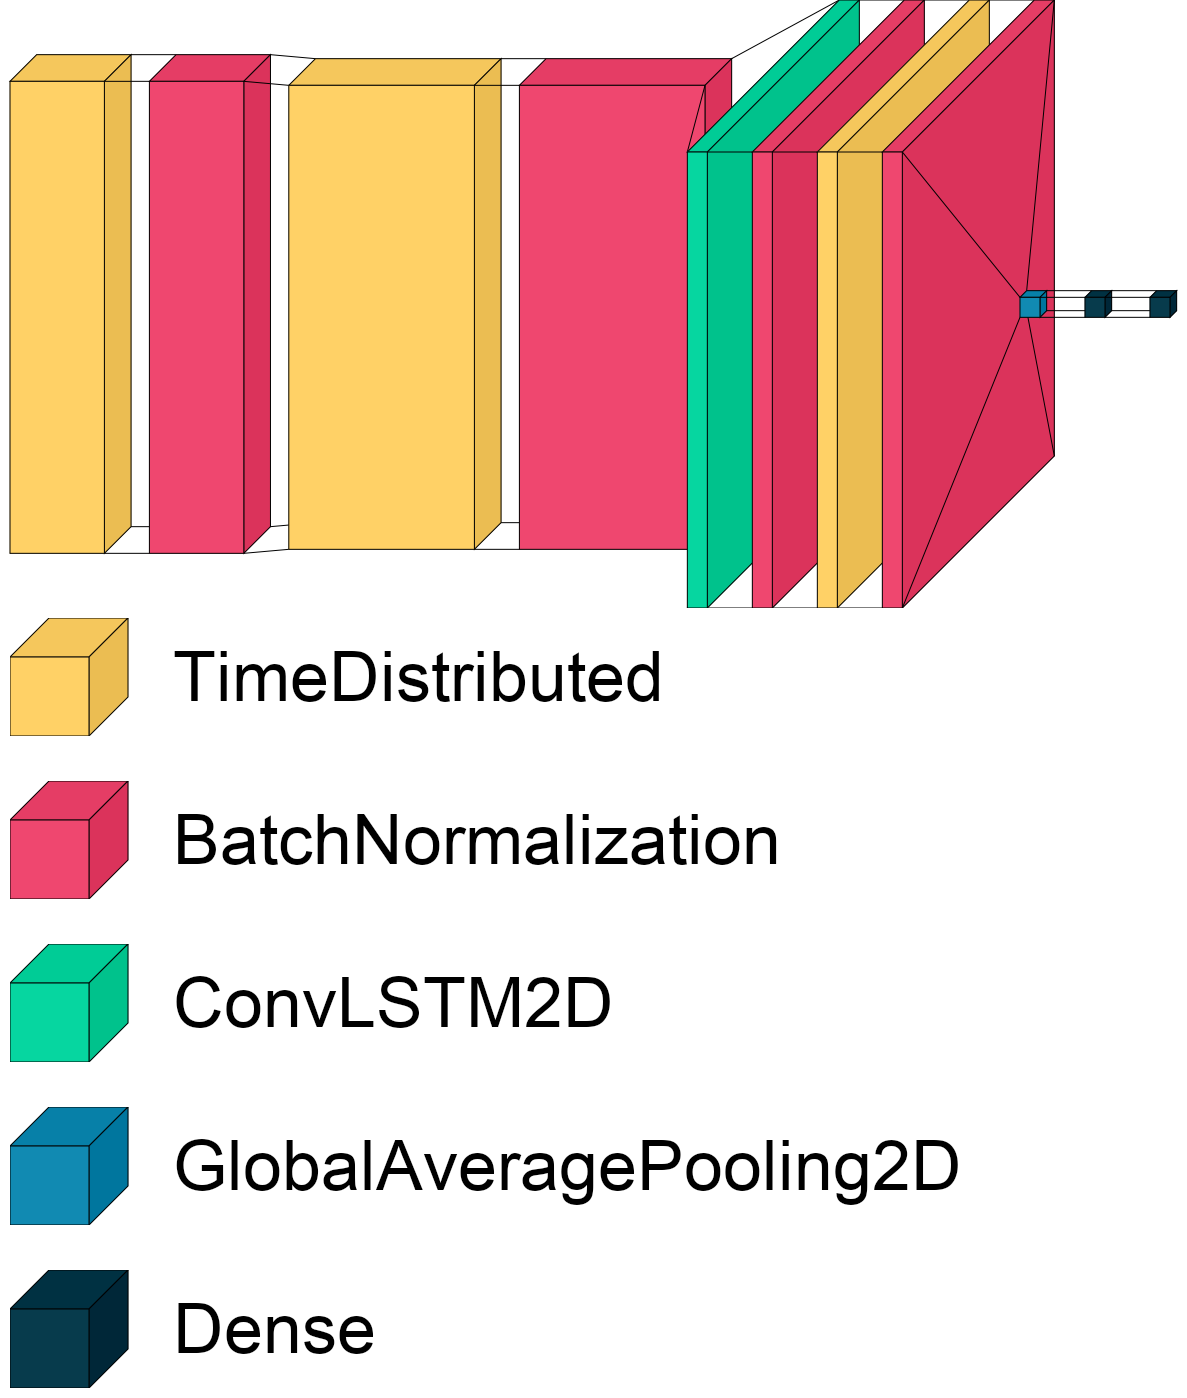

In [69]:
visualkeras.layered_view(model_22, spacing=45, legend=True, font=font)

### Model-22 diagram in 2D

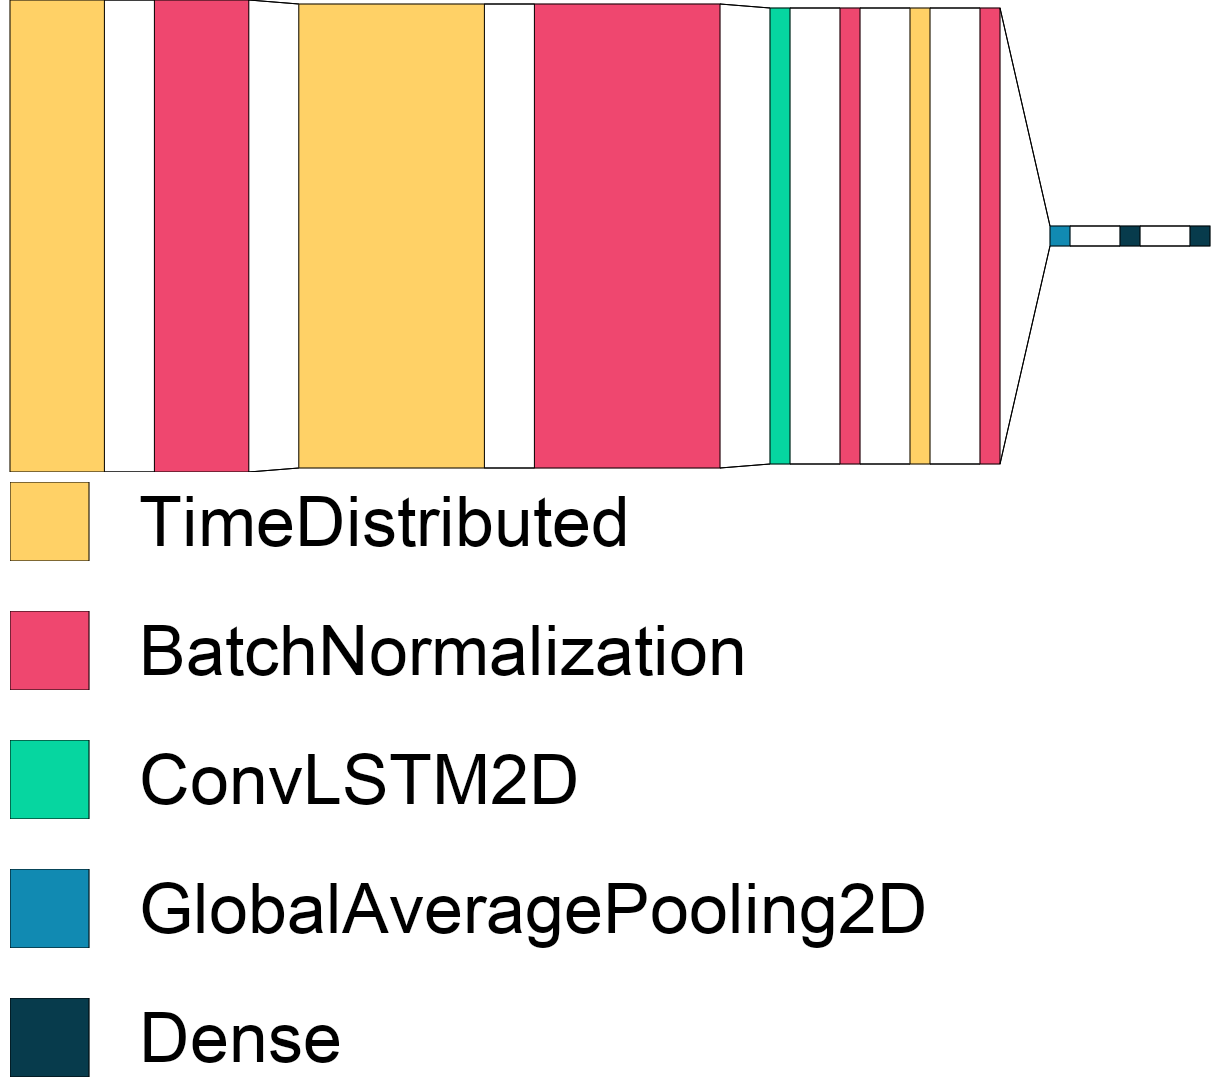

In [70]:
visualkeras.layered_view(model_22, spacing=50, legend=True, font=font, draw_volume=False)

In [71]:
history = model_22.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=12, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/12
67/67 [==============================] - ETA: 0s - loss: 1.3677 - categorical_accuracy: 0.4299
Epoch 00001: saving model to Model-22_2024-01-0721_06_33.138633/model-00001-1.36765-0.42986-1.61481-0.21000.h5
67/67 [==============================] - 136s 2s/step - loss: 1.3677 - categorical_accuracy: 0.4299 - val_loss: 1.6148 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 2/12
67/67 [==============================] - ETA: 0s - loss: 1.0677 - categorical_accuracy: 0.5596
Epoch 00002: saving model to Model-22_2024-01-0721_06_33.138633/model-00002-1.06772-0.55958-1.72056-0.19000.h5
67/67 [==============================] - 129s 2s/step - loss: 1.0677 - categorical_accuracy: 0.5596 - val_loss: 1.7206 - val_categorical_accuracy: 0.1900 - lr: 0.0010
Epoch 3/12
67/67 [==============================] - ETA: 0s - loss: 0.9527 - categorical_accuracy: 0.6109
Epoch 00003: saving model to Model-22_2024-01-0721_06_33.138633/model-00003-0.95273-0.61086-1.89158-0.16000.h5
67/67 [========

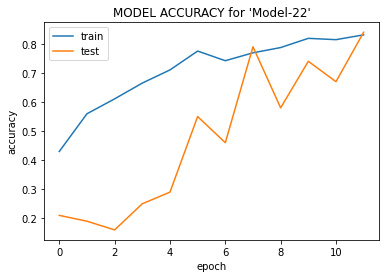

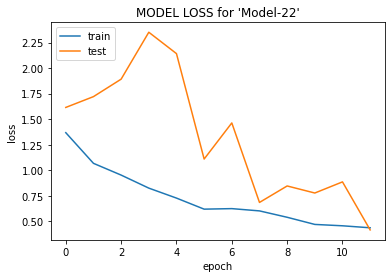

In [72]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [73]:
# Fetch statistics for populating model statistics workbook
total_params = model_22.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_22.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_22.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [74]:
write_model_details_worksheet(model_name, "TimeDistributed ConvLSTM2D with no dropout layer using GlobalAveragePooling3D",
                              total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "(3,3)", 20,
                             120, 120, 12, 32, "Adam", False, 0.001)

In [75]:
print_worksheet_full()

+----------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-------+---------+---------+---------+---------+
|  Model   |  Model  | Total P | Trainab | Non-Tra | Best Ac |  Best   |  Best   |  Best   | Kernel  | Frames  |  Image  |  Image  | Epoch |  Batch  | Optimiz | Is Augm | Learnin |
|   Name   | Details | aramete | le Para | inable  | curacy  | Val Acc |  Loss   |   Val   |  Size   |   Per   | Height  |  Width  |       |  Size   |   er    |  ented  | g Rate  |
|          |         |   rs    | meters  | Paramet |         |  uracy  |         |  Loss   |         |  Video  |         |         |       |         |         |         |         |
|          |         |         |         |   ers   |         |         |         |         |         |         |         |         |       |         |         |         |         |
+==========+=========+=========+=========+=========+=========+=========+=========+=========+===

## <center>Model-23: Transfer Learning Using MobileNet for GRU type and training all weights</center>

| Hidden Layer Count | CONV2D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | (64) | - | 1 | 1 | 128 | 0.25 | 20 | 120 | 120 | same | 20 | 20 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.001

In [76]:
mobilenet_transfer = mobilenet.MobileNet(weights="imagenet", include_top=False)

class RNNCNN_MobileNet_GRU_All_Wts():
    
    def define_model(self,gru_cells=default_rnn_cell_count, 
                     dense_neurons=default_dense_neuron_count, 
                     dropout=0.25):
        
        model = Sequential()
        model.add(TimeDistributed(mobilenet_transfer,input_shape=(default_num_images, default_image_height, default_image_width, default_channel_value)))
 
        
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
        model.add(TimeDistributed(Flatten()))

        model.add(GRU(gru_cells))
        model.add(Dropout(dropout))
        
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
        
        model.add(Dense(num_classes, activation='softmax'))
        
        
        optimiser = tf.keras.optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

17235968/17225924 [==============================] - 2s 0us/step


In [77]:
model_name = "Model-23"

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size=20)

train_generator = generate(batch_size=20, image_height=120, image_width=120)

val_generator   = generate(batch_size=20, image_height=120, image_width=120, is_validation=True)

In [78]:
model_23=RNNCNN_MobileNet_GRU_All_Wts()
model_23=model_23.define_model(gru_cells=128,dense_neurons=128,dropout=0.25)
model_23.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_33 (TimeDi  (None, 20, 3, 3, 1024)   3228864   
 stributed)                                                      
                                                                 
 time_distributed_34 (TimeDi  (None, 20, 3, 3, 1024)   4096      
 stributed)                                                      
                                                                 
 time_distributed_35 (TimeDi  (None, 20, 1, 1, 1024)   0         
 stributed)                                                      
                                                                 
 time_distributed_36 (TimeDi  (None, 20, 1024)         0         
 stributed)                                                      
                                                                 
 gru_3 (GRU)                 (None, 128)              

### Model-23 layer representation

In [79]:
# plot_model(model_23, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

In [ ]:
history = model_23.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=20, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Epoch 1/20
24/34 [====================>.........] - ETA: 33s - loss: 1.0913 - categorical_accuracy: 0.5667

In [ ]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [ ]:
# Fetch statistics for populating model statistics workbook
total_params = model_23.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_23.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_23.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Transfer Learning Using MobileNet for GRU type and training all weights",
                              total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "-", 20,
                             120, 120, 20, 20, "Adam", False, 0.001)

In [ ]:
print_worksheet_full()

## <center>Model-24: Transfer Learning Using MobileNet for LSTM type and training all weights</center>

| Hidden Layer Count | CONV2D Filter | Kernel Size | Stride | Dense layer Count | Dense Layer Filter | Dropout Value | Frames per Video considered | Image Height | Image Width | Padding | Epochs | Batch Size | Augmentation | Optimizer | Loss | Metric | Learning Rate |
| --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | (64) | - | 1 | 1 | 128 | 0.25 | 20 | 120 | 120 | same | 20 | 20 | False | Adam | categorical_crossentropy | categorical_accuracy | 0.001

In [ ]:
mobilenet_transfer = mobilenet.MobileNet(weights="imagenet", include_top=False)

class RNNCNN_MobileNet_LSTM_All_Wts():
    
    def define_model(self,lstm_cells=default_rnn_cell_count, 
                     dense_neurons=default_dense_neuron_count, 
                     dropout=0.25):
        
        model = Sequential()
        model.add(TimeDistributed(mobilenet_transfer,input_shape=(default_num_images, default_image_height, default_image_width, default_channel_value)))
 
        
        model.add(TimeDistributed(BatchNormalization()))
        model.add(TimeDistributed(MaxPooling2D((2, 2))))
        model.add(TimeDistributed(Flatten()))

        model.add(LSTM(lstm_cells))
        model.add(Dropout(dropout))
        
        model.add(Dense(dense_neurons,activation='relu'))
        model.add(Dropout(dropout))
        
        model.add(Dense(num_classes, activation='softmax'))
        
        
        optimiser = tf.keras.optimizers.Adam()
        model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
        return model

In [ ]:
model_name = "Model-24"

callback_list = initialise_model_callbacks(model_name)

steps_per_epoch, validation_steps = calculate_steps(batch_size=20)

train_generator = generate(batch_size=20, image_height=120, image_width=120)

val_generator   = generate(batch_size=20, image_height=120, image_width=120, is_validation=True)

In [ ]:
model_24=RNNCNN_MobileNet_LSTM_All_Wts()
model_24=model_24.define_model(lstm_cells=128,dense_neurons=128,dropout=0.25)
model_24.summary()

### Model-24 layer representation

In [ ]:
# plot_model(model_24, to_file=model_name+".png", show_shapes=True, show_layer_names=True, show_layer_activations=True, show_trainable=True)

In [ ]:
history = model_24.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=20, verbose=1, 
                             callbacks=callback_list, validation_data=val_generator, 
                             validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
plot_model_accuracy(model_name, history)
plot_model_loss(model_name, history)

In [ ]:
# Fetch statistics for populating model statistics workbook
total_params = model_23.count_params()
trainable_params = np.sum([K.count_params(w) for w in model_23.trainable_weights])
non_trainable_params = np.sum([K.count_params(w) for w in model_23.non_trainable_weights])

best_model_loss = min(history.history["loss"])
index_best_model_loss = history.history["loss"].index(best_model_loss)
best_model_cat_acc = history.history["categorical_accuracy"][index_best_model_loss]
best_model_val_cat_acc = history.history["val_categorical_accuracy"][index_best_model_loss]
# best_model_loss = history.history['loss'][index_best_acc_model]
best_model_val_loss = history.history["val_loss"][index_best_model_loss]

In [ ]:
write_model_details_worksheet(model_name, "Transfer Learning Using MobileNet for LSTM type and training all weights",
                              total_params, trainable_params, non_trainable_params, best_model_cat_acc,
                             best_model_val_cat_acc, best_model_loss, best_model_val_loss, "-", 20,
                             120, 120, 20, 20, "Adam", False, 0.001)

In [ ]:
print_worksheet_full()